<a href="https://colab.research.google.com/github/mjstanek/PythonPractice/blob/main/DataVisualization_CanadianImmigration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

 Three Tenets of Data Visualization


1.   Less is more effective
2.   Less is more attractive
3.   Less is more impactive

Data Background:

The data comes from the United Nations. It displays the immigration data of immigrants moving from countries to Canada from 1980 to 2013.

# Project Set up

Includes installation and import of tools and dataframe

In [83]:
# Install Block
!pip install skillsnetwork

In [217]:
# Import Block

import openpyxl
import requests
import numpy as np
import pandas as pd
import skillsnetwork
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import folium
from folium import plugins
import json

In [85]:
colors = []

for name, hex in mpl.colors.cnames.items():
  colors.append((name, hex))

print(colors)

[('aliceblue', '#F0F8FF'), ('antiquewhite', '#FAEBD7'), ('aqua', '#00FFFF'), ('aquamarine', '#7FFFD4'), ('azure', '#F0FFFF'), ('beige', '#F5F5DC'), ('bisque', '#FFE4C4'), ('black', '#000000'), ('blanchedalmond', '#FFEBCD'), ('blue', '#0000FF'), ('blueviolet', '#8A2BE2'), ('brown', '#A52A2A'), ('burlywood', '#DEB887'), ('cadetblue', '#5F9EA0'), ('chartreuse', '#7FFF00'), ('chocolate', '#D2691E'), ('coral', '#FF7F50'), ('cornflowerblue', '#6495ED'), ('cornsilk', '#FFF8DC'), ('crimson', '#DC143C'), ('cyan', '#00FFFF'), ('darkblue', '#00008B'), ('darkcyan', '#008B8B'), ('darkgoldenrod', '#B8860B'), ('darkgray', '#A9A9A9'), ('darkgreen', '#006400'), ('darkgrey', '#A9A9A9'), ('darkkhaki', '#BDB76B'), ('darkmagenta', '#8B008B'), ('darkolivegreen', '#556B2F'), ('darkorange', '#FF8C00'), ('darkorchid', '#9932CC'), ('darkred', '#8B0000'), ('darksalmon', '#E9967A'), ('darkseagreen', '#8FBC8F'), ('darkslateblue', '#483D8B'), ('darkslategray', '#2F4F4F'), ('darkslategrey', '#2F4F4F'), ('darkturquoi

In [86]:
# Fetch and save data set

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv'
df = pd.read_csv(url)

In [87]:
df

Country Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  \
0      39    39    47    71   340  ...  3436  3009  2652  2111  1746  1758   
1       0     0     0     0     0  ...  1223   856   702   560   716   561   
2      67    71    69    63    44  ...  3626  4807  3623  4005  5393  4752   
3       1     0     0     0     0  ...     0     1     0     0     0     0   
4       0     0     0     0     0  ...     0     1     1     0     0     0   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
190  1829  2162  3404  7583  5907  ...  1852  3153  2574  1784  2171  1942   
191     0     0     0     0     0  ...     0     1     0     0     0     0   
192     2     1     6     0    18  ...   161   140   122   133   128   211   
193    17    11     7    16     9  ...    91    77    71    64    60   102   
194   114   102    44    32    29  ...   615   454   663   611   508   494   

     2011  2012  2013  Total  
0    2203  2635  2004  58639  
1     539   620   603  15699  
2    4325  3774  4331  69439  
3       0     0     0      6  
4       0     1     1     15  
..    ...   ...   ...    ...  
190  1723  1731  2112  97146  
191     0     0     0      2  
192   160   174   217   2985  
193    69    46    59   1677  
194   434   437   407   8598  

[195 rows x 39 columns]

Exploring the Dataframe

In [88]:
print(df.head())
print(df.tail())

          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  1

In [89]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 39 entries, Country to Total
dtypes: int64(35), object(4)
memory usage: 59.5+ KB


In [90]:
df.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [91]:
df.index

RangeIndex(start=0, stop=195, step=1)

In [92]:
df.shape

(195, 39)

In [93]:
# Clean the dataframe to make it usable

df.drop(['DevName'], axis=1, inplace=True)
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [94]:
# Check to see what columns contain missing information

df.isnull().sum()

Country      0
Continent    0
Region       0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [95]:
df.describe()

1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.606788   2555.048874   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.500000      0.500000      1.000000      1.000000   
50%      17.000000    18.000000     26.000000     34.000000     44.000000   
75%     197.000000   254.000000    434.000000    409.000000    508.500000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

       ...          2005          2006          2007          2008  \
count  ...    195.000000    195.000000    195.000000    195.000000   
mean   ...   1320.292308   1266.958974   1191.820513   1246.394872   
std    ...   4425.957828   3926.717747   3443.542409   3694.573544   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     28.500000     25.000000     31.000000     31.000000   
50%    ...    210.000000    218.000000    198.000000    205.000000   
75%    ...    832.000000    842.000000    899.000000    934.500000   
max    ...  42584.000000  33848.000000  28742.000000  30037.000000   

               2009          2010          2011          2012          2013  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean    1275.733333   1420.287179   1262.533333   1313.958974   1320.702564   
std     3829.630424   4462.946328   4030.084313   4247.555161   4237.951988   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       36.000000     40.500000     37.500000     42.500000     45.000000   
50%      214.000000    211.000000    179.000000    233.000000    213.000000   
75%      888.000000    932.000000    772.000000    783.000000    796.000000   
max    29622.000000  38617.000000  36765.000000  34315.000000  34129.000000   

               Total  
count     195.000000  
mean    32867.451282  
std     91785.498686  
min         1.000000  
25%       952.000000  
50%      5018.000000  
75%     22239.500000  
max    691904.000000  

[8 rows x 35 columns]

Data Selection

In [96]:
# df.column vs df[['column']]

# df.column will return a series

df.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [97]:
# df['column'] will also return a series

df['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [98]:
# df[[]'column1', 'column2']] will return a dataframe

df[['Country', '1980', '1981', '1982', '1983', '1984', '1985']]

Country  1980  1981  1982  1983  1984  1985
0       Afghanistan    16    39    39    47    71   340
1           Albania     1     0     0     0     0     0
2           Algeria    80    67    71    69    63    44
3    American Samoa     0     1     0     0     0     0
4           Andorra     0     0     0     0     0     0
..              ...   ...   ...   ...   ...   ...   ...
190        Viet Nam  1191  1829  2162  3404  7583  5907
191  Western Sahara     0     0     0     0     0     0
192           Yemen     1     2     1     6     0    18
193          Zambia    11    17    11     7    16     9
194        Zimbabwe    72   114   102    44    32    29

[195 rows x 7 columns]

In [99]:
# Set the index column to the Country name instead of number

df.set_index('Country', inplace=True)

In [100]:
df.head()

Continent           Region  1980  1981  1982  1983  1984  1985  \
Country                                                                         
Afghanistan         Asia    Southern Asia    16    39    39    47    71   340   
Albania           Europe  Southern Europe     1     0     0     0     0     0   
Algeria           Africa  Northern Africa    80    67    71    69    63    44   
American Samoa   Oceania        Polynesia     0     1     0     0     0     0   
Andorra           Europe  Southern Europe     0     0     0     0     0     0   

                1986  1987  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                     ...                                             
Afghanistan      496   741  ...  3436  3009  2652  2111  1746  1758  2203   
Albania            1     2  ...  1223   856   702   560   716   561   539   
Algeria           69   132  ...  3626  4807  3623  4005  5393  4752  4325   
American Samoa     0     1  ...     0     1     0     0     0     0     0   
Andorra            2     0  ...     0     1     1     0     0     0     0   

                2012  2013  Total  
Country                            
Afghanistan     2635  2004  58639  
Albania          620   603  15699  
Algeria         3774  4331  69439  
American Samoa     0     0      6  
Andorra            1     1     15  

[5 rows x 37 columns]

In [101]:
# df.loc[label] vs df.iloc[index]

df.loc['Japan']

Continent            Asia
Region       Eastern Asia
1980                  701
1981                  756
1982                  598
1983                  309
1984                  246
1985                  198
1986                  248
1987                  422
1988                  324
1989                  494
1990                  379
1991                  506
1992                  605
1993                  907
1994                  956
1995                  826
1996                  994
1997                  924
1998                  897
1999                 1083
2000                 1010
2001                 1092
2002                  806
2003                  817
2004                  973
2005                 1067
2006                 1212
2007                 1250
2008                 1284
2009                 1194
2010                 1168
2011                 1265
2012                 1214
2013                  982
Total               27707
Name: Japan, dtype: object

In [102]:
df.iloc[87]

Continent            Asia
Region       Eastern Asia
1980                  701
1981                  756
1982                  598
1983                  309
1984                  246
1985                  198
1986                  248
1987                  422
1988                  324
1989                  494
1990                  379
1991                  506
1992                  605
1993                  907
1994                  956
1995                  826
1996                  994
1997                  924
1998                  897
1999                 1083
2000                 1010
2001                 1092
2002                  806
2003                  817
2004                  973
2005                 1067
2006                 1212
2007                 1250
2008                 1284
2009                 1194
2010                 1168
2011                 1265
2012                 1214
2013                  982
Total               27707
Name: Japan, dtype: object

In [103]:
df[df.index == 'Japan']

Continent        Region  1980  1981  1982  1983  1984  1985  1986  \
Country                                                                     
Japan        Asia  Eastern Asia   701   756   598   309   246   198   248   

         1987  ...  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
Country        ...                                                         
Japan     422  ...  1067  1212  1250  1284  1194  1168  1265  1214   982   

         Total  
Country         
Japan    27707  

[1 rows x 37 columns]

In [104]:
# Both can select single cells

df.loc['Japan', '2013']

np.int64(982)

In [105]:
df.iloc[87, 35]

np.int64(982)

In [106]:
# Both can be used to create dataframes

df.loc['Japan', ['1980', '1981', '1982', '1983', '1984', '1985']]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [107]:
df.iloc[87, [2, 3, 4, 5, 6, 7]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [108]:
# If the column names (years) were being read as integers, we could map them as strings

# df.columns = list(map(str, df.columns))

In [109]:
# Creating a variable to hold the list of years for plotting

years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Criteria-based Filtering

In [110]:
# We can create conditions and pass them to return data

asiancountries = df['Continent'] == 'Asia'
print(asiancountries)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [111]:
df[asiancountries]

Continent              Region  \
Country                                                                        
Afghanistan                                         Asia       Southern Asia   
Armenia                                             Asia        Western Asia   
Azerbaijan                                          Asia        Western Asia   
Bahrain                                             Asia        Western Asia   
Bangladesh                                          Asia       Southern Asia   
Bhutan                                              Asia       Southern Asia   
Brunei Darussalam                                   Asia  South-Eastern Asia   
Cambodia                                            Asia  South-Eastern Asia   
China                                               Asia        Eastern Asia   
China, Hong Kong Special Administrative Region      Asia        Eastern Asia   
China, Macao Special Administrative Region          Asia        Eastern Asia   
Cyprus                                              Asia        Western Asia   
Democratic People's Republic of Korea               Asia        Eastern Asia   
Georgia                                             Asia        Western Asia   
India                                               Asia       Southern Asia   
Indonesia                                           Asia  South-Eastern Asia   
Iran (Islamic Republic of)                          Asia       Southern Asia   
Iraq                                                Asia        Western Asia   
Israel                                              Asia        Western Asia   
Japan                                               Asia        Eastern Asia   
Jordan                                              Asia        Western Asia   
Kazakhstan                                          Asia        Central Asia   
Kuwait                                              Asia        Western Asia   
Kyrgyzstan                                          Asia        Central Asia   
Lao People's Democratic Republic                    Asia  South-Eastern Asia   
Lebanon                                             Asia        Western Asia   
Malaysia                                            Asia  South-Eastern Asia   
Maldives                                            Asia       Southern Asia   
Mongolia                                            Asia        Eastern Asia   
Myanmar                                             Asia  South-Eastern Asia   
Nepal                                               Asia       Southern Asia   
Oman                                                Asia        Western Asia   
Pakistan                                            Asia       Southern Asia   
Philippines                                         Asia  South-Eastern Asia   
Qatar                                               Asia        Western Asia   
Republic of Korea                                   Asia        Eastern Asia   
Saudi Arabia                                        Asia        Western Asia   
Singapore                                           Asia  South-Eastern Asia   
Sri Lanka                                           Asia       Southern Asia   
State of Palestine                                  Asia        Western Asia   
Syrian Arab Republic                                Asia        Western Asia   
Tajikistan                                          Asia        Central Asia   
Thailand                                            Asia  South-Eastern Asia   
Turkey                                              Asia        Western Asia   
Turkmenistan                                        Asia        Central Asia   
United Arab Emirates                                Asia        Western Asia   
Uzbekistan                                          Asia        Central Asia   
Viet Nam                                            Asia  South-Eastern Asia   
Yemen                                          

In [112]:
# We can also pass multiple conditions at once and also in the df[condition] format

df[(df['Continent'] == 'Asia') & (df['Region'] == 'Southern Asia')]

Continent         Region  1980  1981  1982  1983  \
Country                                                                       
Afghanistan                     Asia  Southern Asia    16    39    39    47   
Bangladesh                      Asia  Southern Asia    83    84    86    81   
Bhutan                          Asia  Southern Asia     0     0     0     0   
India                           Asia  Southern Asia  8880  8670  8147  7338   
Iran (Islamic Republic of)      Asia  Southern Asia  1172  1429  1822  1592   
Maldives                        Asia  Southern Asia     0     0     0     1   
Nepal                           Asia  Southern Asia     1     1     6     1   
Pakistan                        Asia  Southern Asia   978   972  1201   900   
Sri Lanka                       Asia  Southern Asia   185   371   290   197   

                            1984  1985  1986   1987  ...   2005   2006   2007  \
Country                                              ...                        
Afghanistan                   71   340   496    741  ...   3436   3009   2652   
Bangladesh                    98    92   486    503  ...   4171   4014   2897   
Bhutan                         1     0     0      0  ...      5     10      7   
India                       5704  4211  7150  10189  ...  36210  33848  28742   
Iran (Islamic Republic of)  1977  1648  1794   2989  ...   5837   7480   6974   
Maldives                       0     0     0      0  ...      0      0      2   
Nepal                          2     4    13      6  ...    607    540    511   
Pakistan                     668   514   691   1072  ...  14314  13127  10124   
Sri Lanka                   1086   845  1838   4447  ...   4930   4714   4123   

                             2008   2009   2010   2011   2012   2013   Total  
Country                                                                       
Afghanistan                  2111   1746   1758   2203   2635   2004   58639  
Bangladesh                   2939   2104   4721   2694   2640   3789   65568  
Bhutan                         36    865   1464   1879   1075    487    5876  
India                       28261  29456  34235  27509  30933  33087  691904  
Iran (Islamic Republic of)   6475   6580   7477   7479   7534  11291  175923  
Maldives                        1      7      4      3      1      1      30  
Nepal                         581    561   1392   1129   1185   1308   10222  
Pakistan                     8994   7217   6811   7468  11227  12603  241600  
Sri Lanka                    4756   4547   4422   3309   3338   2394  148358  

[9 rows x 37 columns]

# Matplotlib Overview

In [113]:
# Matplotlib is the standard data visualization library in Python
# pyplot is the scripting layer for Matplotlib

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.10.0


In [114]:
# Add a default style

print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


bar for vertical bar plots
barh for horizontal bar plots
hist for histogram
box for boxplot
kde or density for density plots
area for area plots
pie for pie plots
scatter for scatter plots
hexbin for hexbin plot

In [115]:
# Annotation
# We can add text into a graph with plt.annotate()
# Parameters:
# s: string, the text
# rotation: the angle to rotate the text (counter clockwise)
# va: vertical alignment of the text (center, top, bottom, baseline)
# ha: horizontal alignment of the text (center, right, left)
# xy: tuple to specify the (x,y) point being annotated
# xytext: tuple to specify the (x,y) point to place the textbox
# xycoords: coordinate system used to define the xy tuples
# arrowprops: dictionary of the following keys
# # arrowstyle: '->' is default
# # connectionstyle: 'arc3' a straight line
# # color: color of the arrow
# # lw: is the line width

# Line Plots

Line plots are great tools for visualizing the data points as a trend. For example, we could see the trend of immigration numbers over time.

In [116]:
# Creating an object to hold the dataframe of Haiti's immigration
# numbers through the years

haiti = df.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<Axes: >

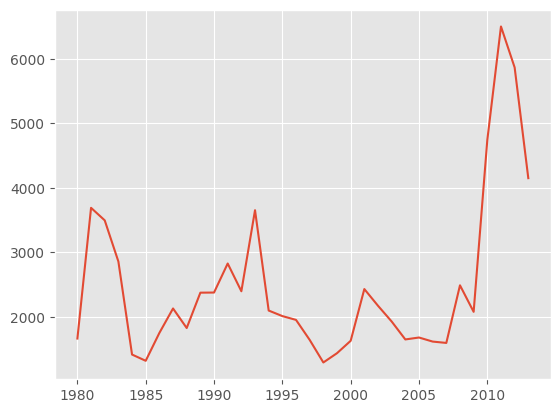

In [117]:
# Plot the data automatically using pandas

haiti.plot()

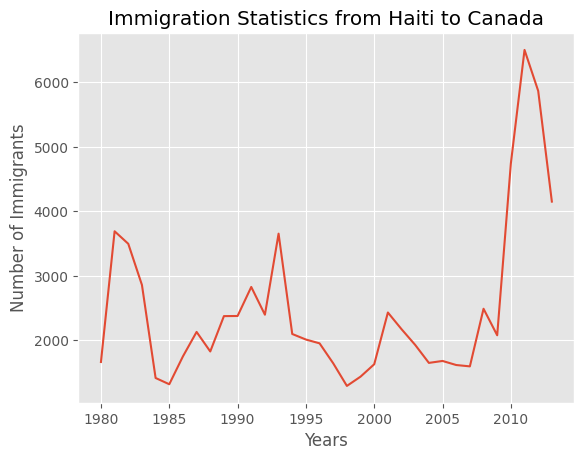

In [118]:
# We can make the graph better by doing the following

# Change the index values to both be integers
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

# Add labels
plt.title('Immigration Statistics from Haiti to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

# Display the updates
plt.show()

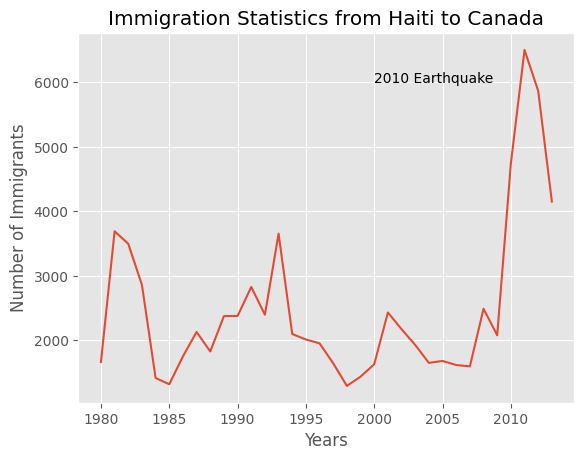

In [119]:
# The spike around 2010 was likely related to the earthquake, so we can annotate that

# Change the index values to both be integers
haiti.plot(kind='line')

# Add labels
plt.title('Immigration Statistics from Haiti to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

# Add annotation
plt.text(2000, 6000, '2010 Earthquake')

# Display the updates
plt.show()

In [120]:
# Comparing China's and India's immigration numbers

df_CI = df.loc[['China', 'India'], years]
df_CI

1980  1981  1982  1983  1984  1985  1986   1987   1988   1989  ...  \
Country                                                                 ...   
China    5123  6682  3308  1863  1527  1816  1960   2643   2758   4323  ...   
India    8880  8670  8147  7338  5704  4211  7150  10189  11522  10343  ...   

          2004   2005   2006   2007   2008   2009   2010   2011   2012   2013  
Country                                                                        
China    36619  42584  33518  27642  30037  29622  30391  28502  33024  34129  
India    28235  36210  33848  28742  28261  29456  34235  27509  30933  33087  

[2 rows x 34 columns]

<Axes: xlabel='Country'>

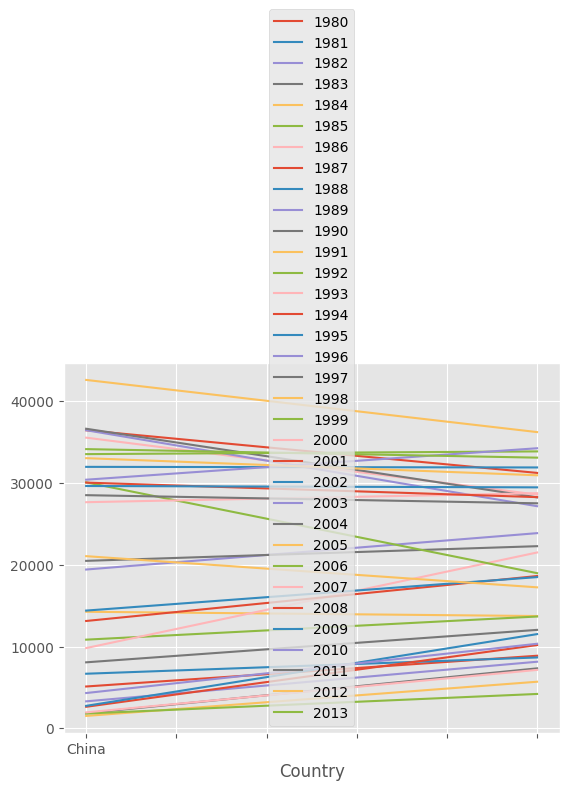

In [121]:
# Plot a line graph of the data

df_CI.plot(kind='line')

In [122]:
# The Graph is a mess, so if we swap columns and rows around, we
# can get a better visualization of the data

df_CI = df_CI.transpose()
df_CI.head()

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704

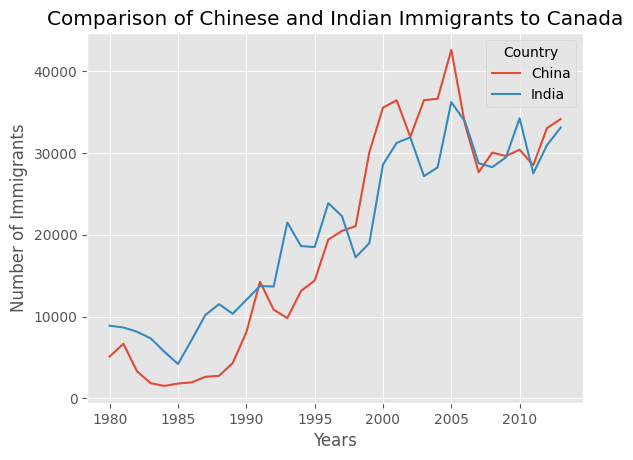

In [123]:
# Plot the data with meaningful labels

df_CI.plot(kind='line')

plt.title('Comparison of Chinese and Indian Immigrants to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

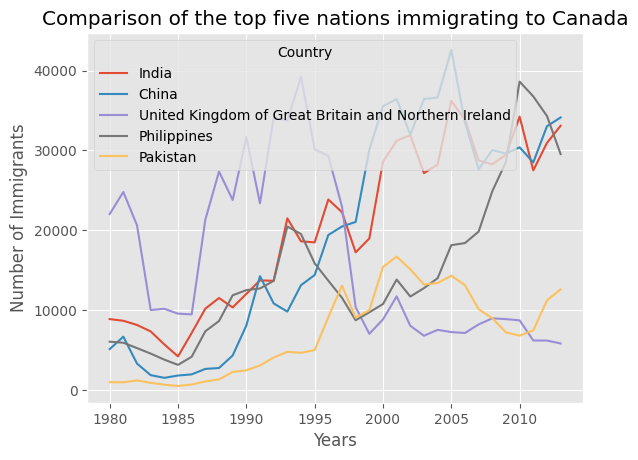

In [124]:
# Comparing the immigration trends of the top five countries based on the
# number of immigrants moving to Canada


#Generate a new dataframe for the top five countries moving to Canada
df.sort_values('Total', axis=0, ascending=False, inplace=True)
df_top5 = df.head(5)

df_top5 = df_top5.transpose()
df_top5.drop(['Continent', 'Region', 'Total'], axis=0, inplace=True)

# df_top5

df_top5.plot(kind='line')

plt.title('Comparison of the top five nations immigrating to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()


# Area Plots

Area Plots are like a line plot, but help show a cumulative total instead of a single point in time. They are stacked by default.

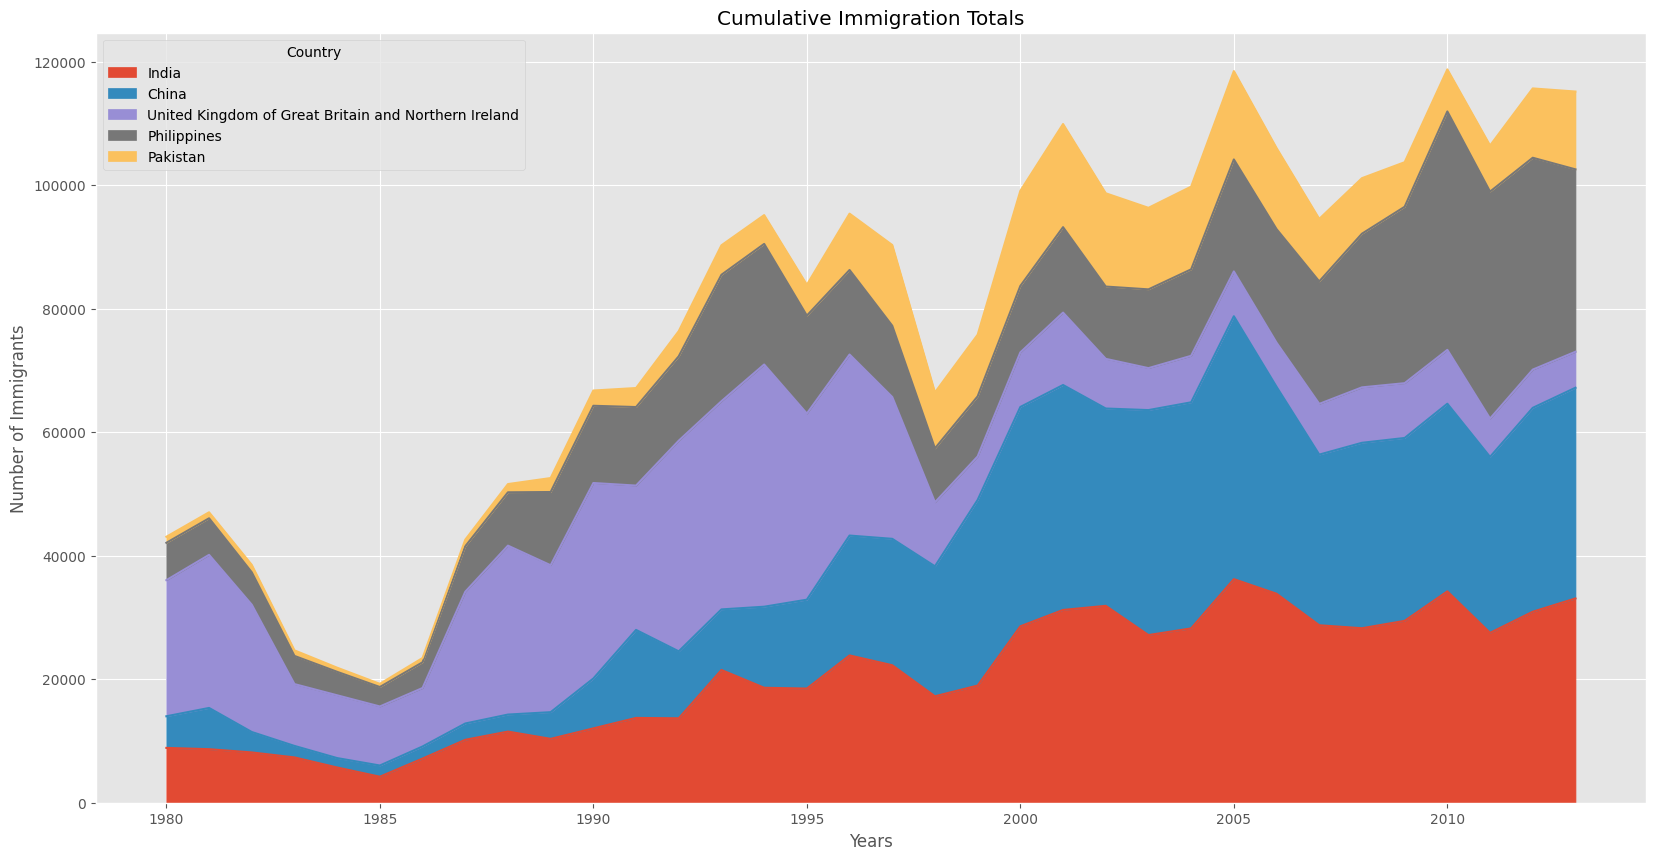

In [125]:
# The above chart tells a good story as to the trends over time
# An area plot would demonstrate the cumulative volume of immigrants

df_top5.plot(kind='area', figsize=(20, 10))

plt.title('Cumulative Immigration Totals')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

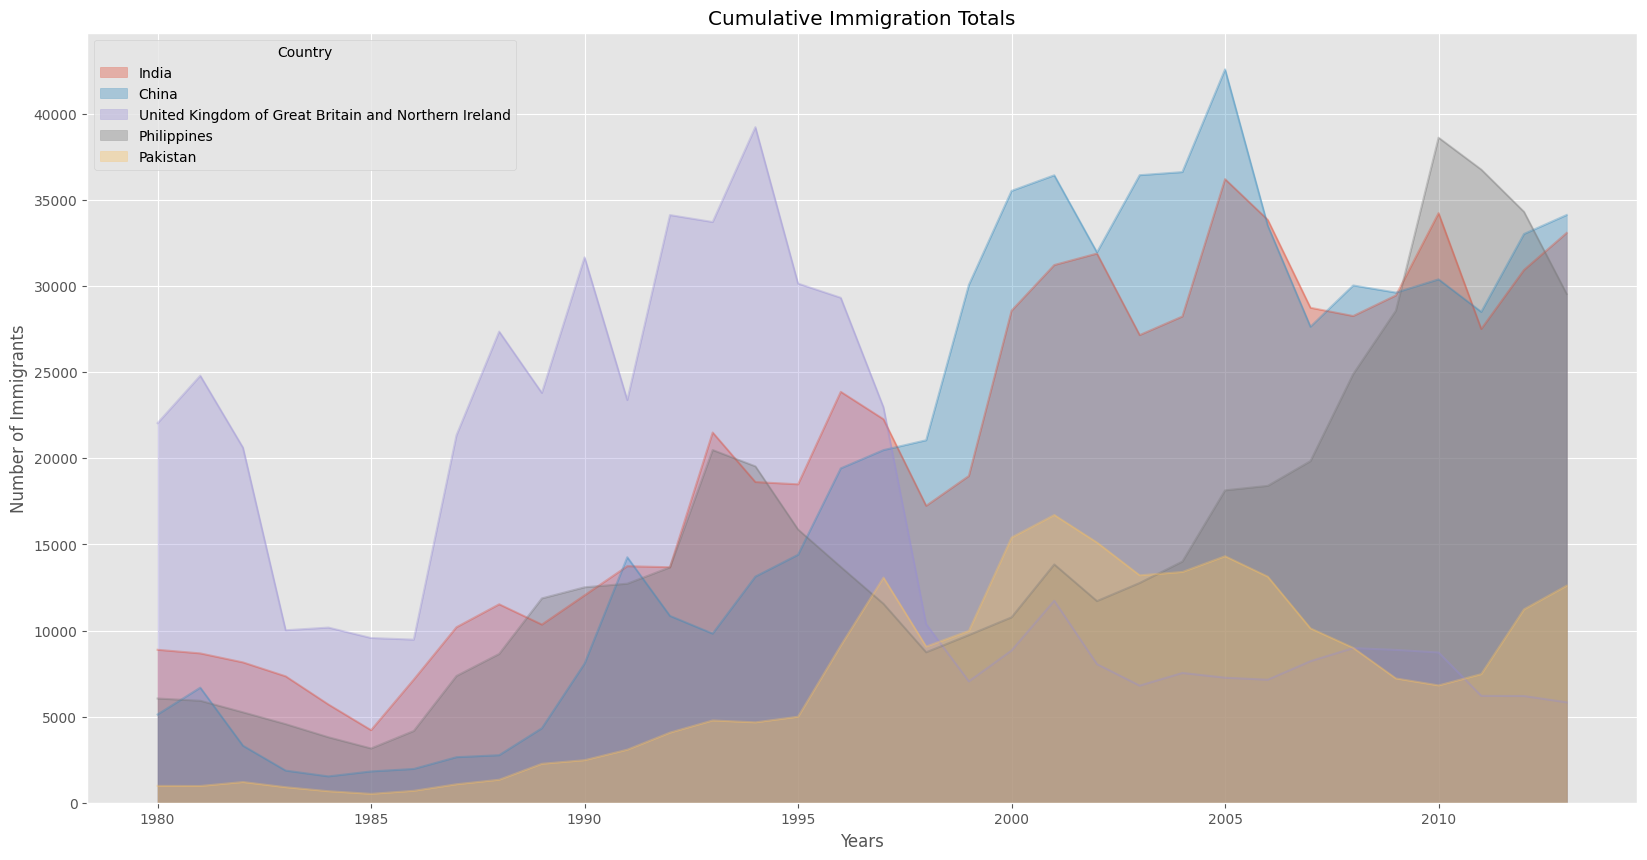

In [126]:
# To unstack, we add in a False for the stacked parameter.
# We can also adjust the opacity of the area charts by adjusting "alpha"

df_top5.plot(kind='area', stacked=False, alpha=0.35, figsize=(20,10))

plt.title('Cumulative Immigration Totals')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

Text(0, 0.5, 'Number of Immigrants')

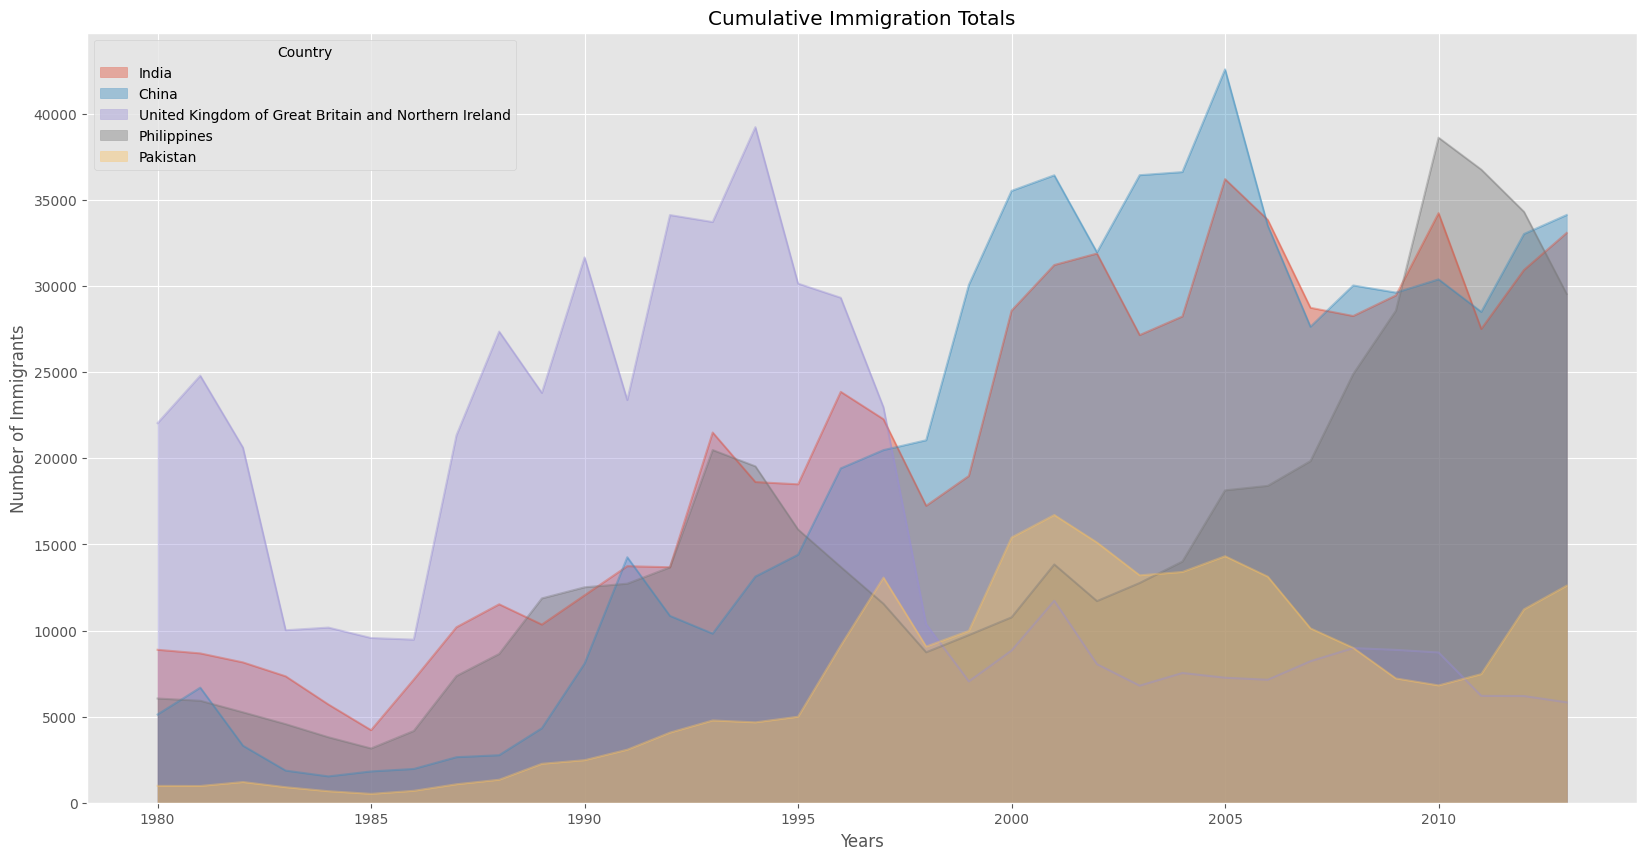

In [127]:
# This same chart can be created in the artist layer instead of the scriptint layer

ax = df_top5.plot(kind='area', stacked=False, alpha=0.4, figsize=(20,10))

ax.set_title('Cumulative Immigration Totals')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

# Histograms

Histograms display the frequency distribution of a numeric dataset. The key difference between histograms and bar charts is the bins. Histograms chunk the data into equal segments called bins. The bars are a representation of how many values fell within that bin.

In [128]:
# Display the immigration figures for 2013

df_2013 = df['2013']

df_2013.head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [129]:
# Numpy's histogram method will create bins given a set of data

count, bin_edges = np.histogram(df_2013)

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


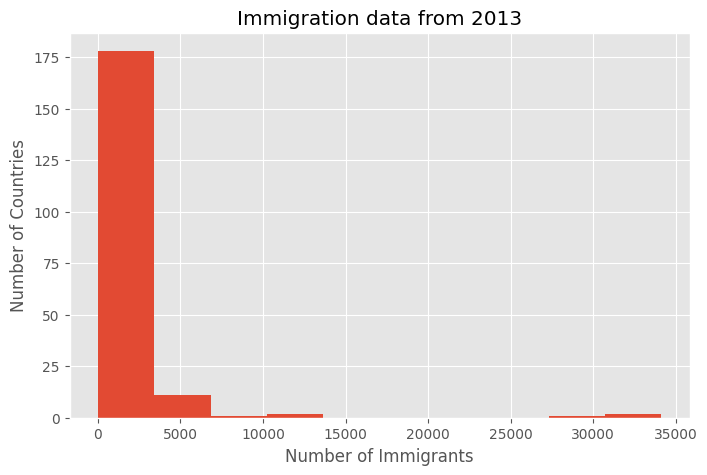

In [130]:
# Plotting and interpreting the data

df_2013.plot(kind='hist', figsize=(8,5))

plt.title('Immigration data from 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

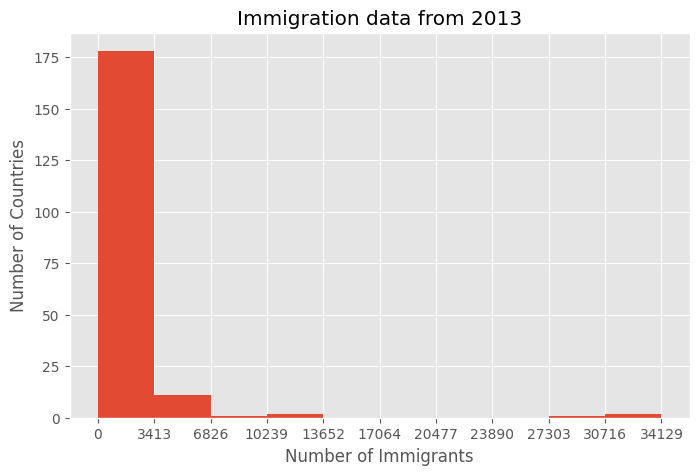

In [131]:
# The most frustrating part of the above chart is that the X axis
# is not divided into the bins, but we can fix that
# By aliging the X axis divisions with the bin edges, we get the
# full effect of a histogram

df_2013.plot(kind='hist', figsize=(8,5), xticks=bin_edges)

plt.title('Immigration data from 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

<Axes: ylabel='Frequency'>

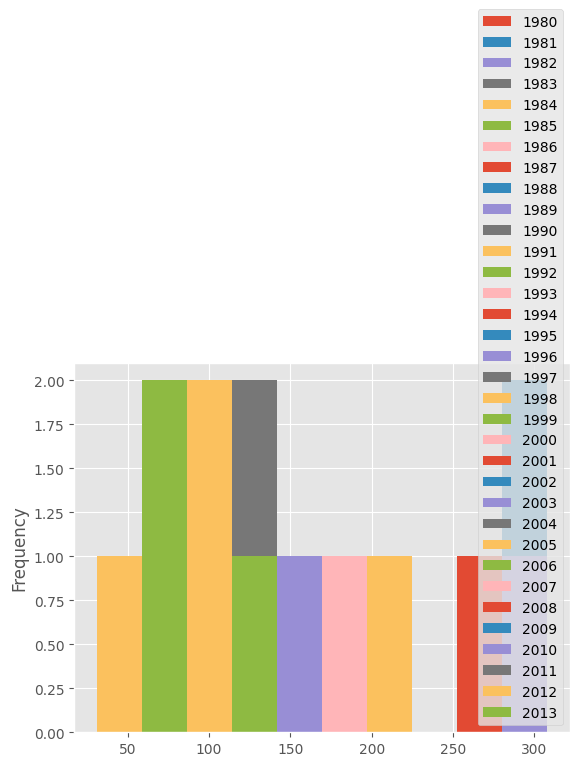

In [132]:
# Multiple histograms
# the dataframe.plot.kind() syntax is used interchangably with df.plot(kind)

df_DNS = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_DNS.plot.hist()

In [133]:
# Once again, we need to transpose the data

df_DNS = df_DNS.transpose()
df_DNS.head()

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128

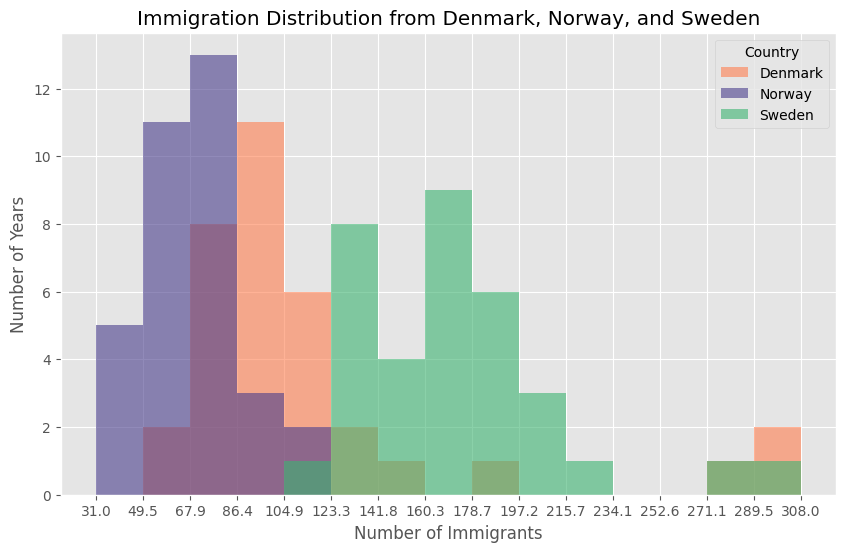

In [134]:
# Let's plot the above dataframe, but across 15 bins

count, bin_edges = np.histogram(df_DNS, 15)

df_DNS.plot(kind='hist', bins=15, xticks=bin_edges, figsize=(10,6),
            color=['coral', 'darkslateblue', 'mediumseagreen'], alpha = 0.6)

plt.title('Immigration Distribution from Denmark, Norway, and Sweden')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

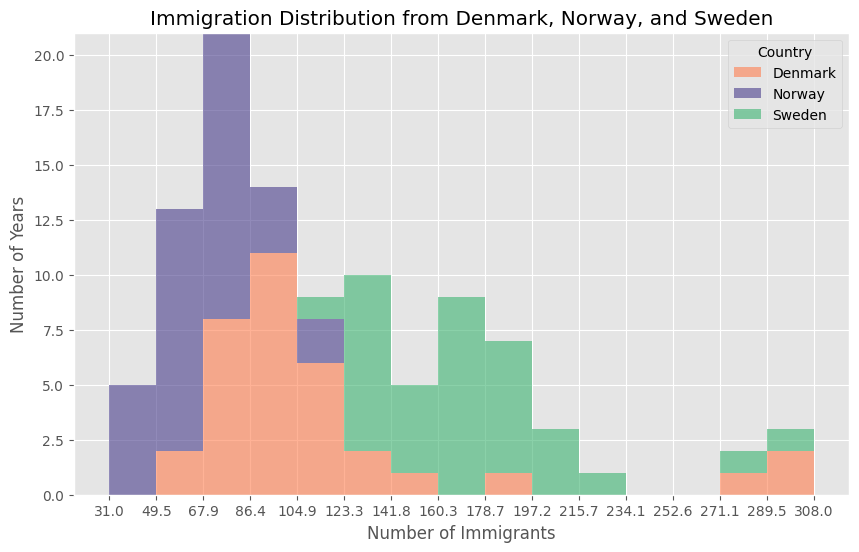

In [135]:
# Much like area plots, histograms can also be stacked

count, bin_edges = np.histogram(df_DNS, 15)

df_DNS.plot(kind='hist', bins=15, xticks=bin_edges, figsize=(10,6), stacked=True,
            color=['coral', 'darkslateblue', 'mediumseagreen'], alpha = 0.6)

plt.title('Immigration Distribution from Denmark, Norway, and Sweden')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

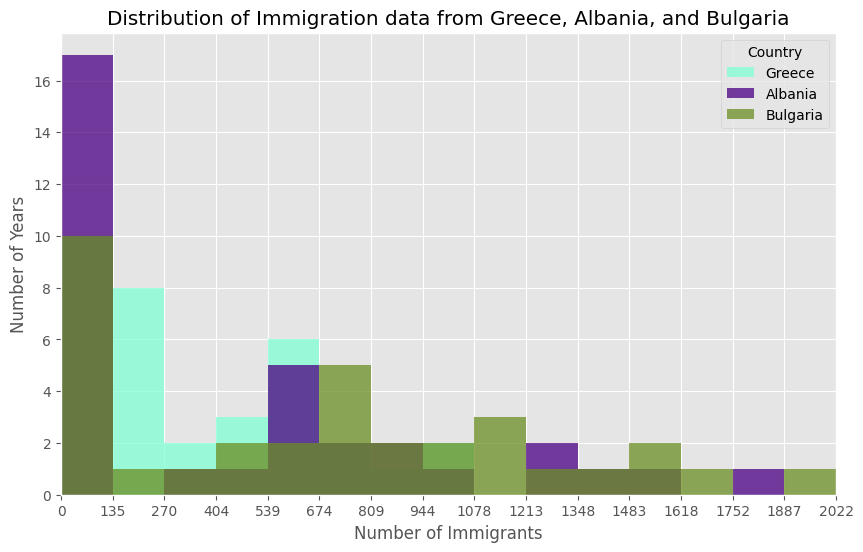

In [136]:
# Display the same information for Greece, Albania, and Bulgaria

df_GAB = df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
# df_GAB

count, bin_edges = np.histogram(df_GAB, 15)
xmin = bin_edges[0]
xmax = bin_edges[-1]

df_GAB.plot(kind='hist',
            bins=15,
            xticks=bin_edges,
            figsize=(10,6),
            xlim=(xmin, xmax),
            color=['aquamarine', 'indigo', 'olivedrab'],
            alpha=0.75
            )

plt.title('Distribution of Immigration data from Greece, Albania, and Bulgaria')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

# Bar Charts

While similar to histograms at a glance, the length of the barsin a bar chart represent the magnitude of the feature.Therefore a bar of size 20 should be twice as big as a bar of size 10. These bars also indicate single values, not the frequency of data within bins

In [137]:
# kind='bar' is vertical
# kind='barh' is horizontal

In [138]:
# Plotting the impact of the Icelandic financial crisis on immigration to Canada

df_iceland = df.loc['Iceland', years]
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

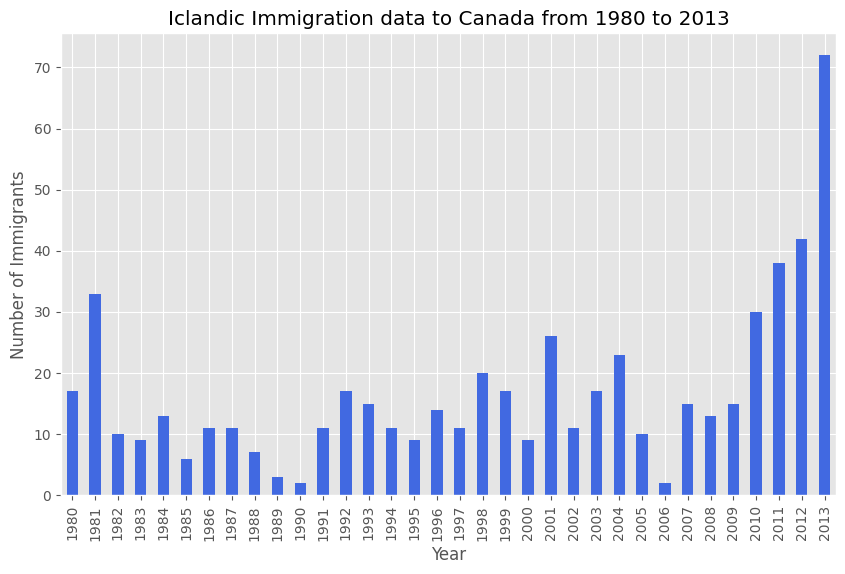

In [139]:
df_iceland.plot(kind='bar', figsize=(10,6), color='royalblue')

plt.title('Iclandic Immigration data to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

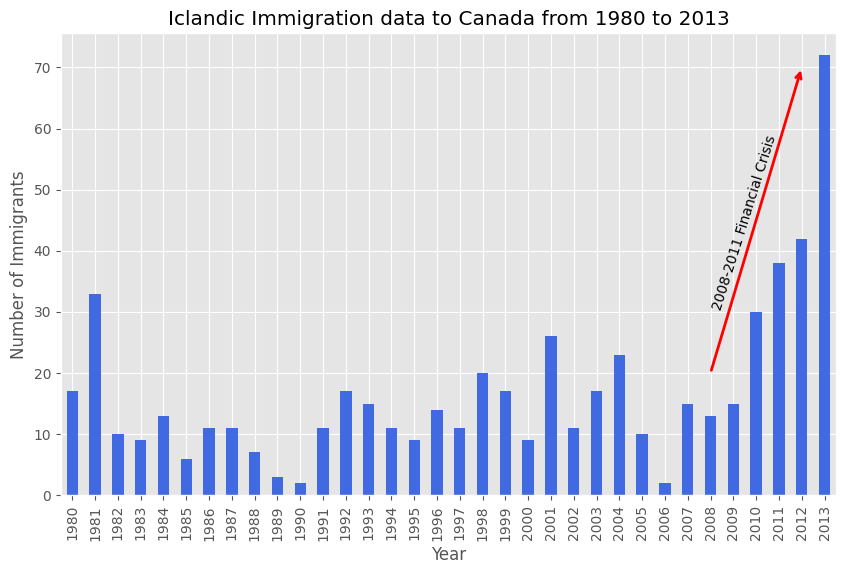

In [140]:
# If we want to point out the beginning of the financial crisis

df_iceland.plot(kind='bar', figsize=(10,6), color='royalblue')

plt.title('Iclandic Immigration data to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Annotation Arrow
plt.annotate('',
             xy=(32, 70),
             xytext=(28,20),
             xycoords='data',
             arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3', 'color': 'red', 'lw':2})

# Annotation Text
# This will likely take some trial and error to get it to look pretty
plt.annotate('2008-2011 Financial Crisis',
             xy=(28, 30),
             rotation=72.5,
             va='bottom',
             ha='left')

plt.show()

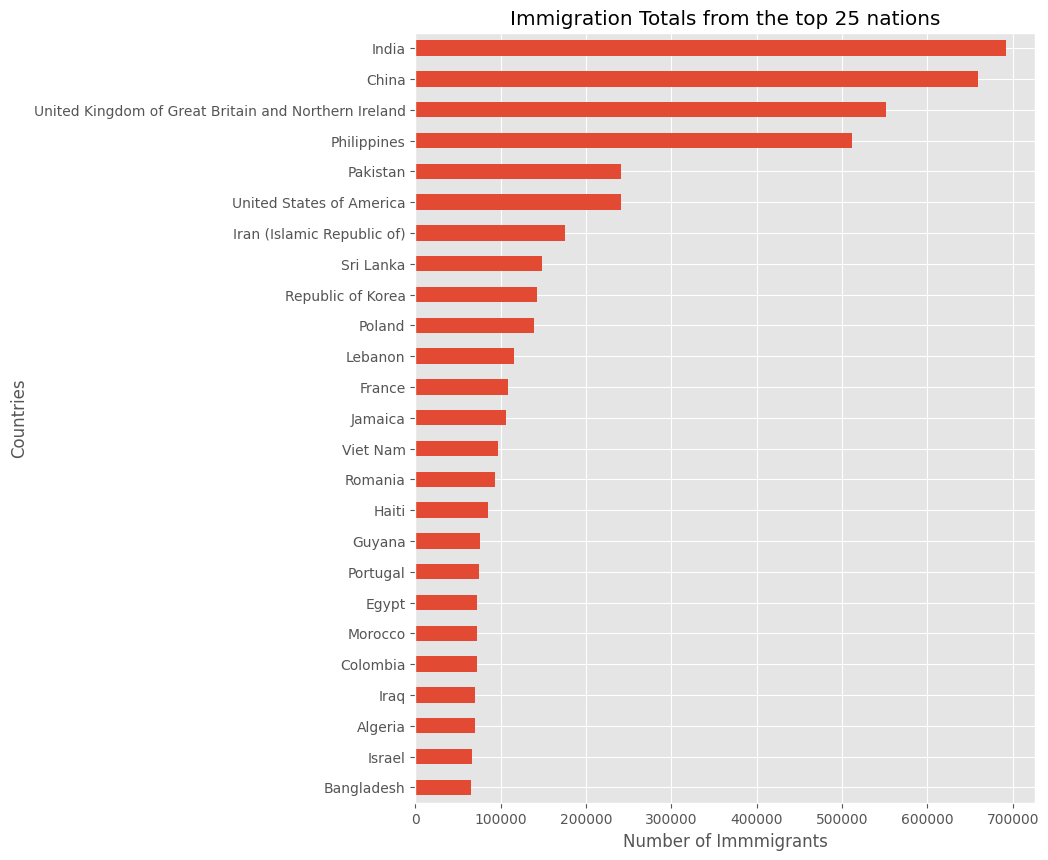

In [141]:
# Horizontal bar graph showing total immigrants from top 25 countries

df.sort_values('Total', axis=0, ascending=True, inplace=True)
df_top25 = df['Total'].tail(25)

df_top25.plot(kind='barh',
              figsize=(8, 10))

plt.title('Immigration Totals from the top 25 nations')
plt.xlabel('Number of Immmigrants')
plt.ylabel('Countries')

plt.show()

# Pie Charts

Pie charts are becoming controversial, it might just be best to stick with bar charts. I still like them though.

In [142]:
# Display the immigration totals by continent in a pie chart

# Create a dataframe for continents
df_continents = df.groupby('Continent', axis=0).sum()
df_continents

/tmp/ipython-input-142-1791018011.py:4: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df.groupby('Continent', axis=0).sum()


Region  \
Continent                                                                            
Africa                           Northern AfricaMiddle AfricaMiddle AfricaWeste...   
Asia                             Southern AsiaWestern AsiaWestern AsiaEastern A...   
Europe                           Southern EuropeSouthern EuropeWestern EuropeWe...   
Latin America and the Caribbean  CaribbeanSouth AmericaCaribbeanCaribbeanCentra...   
Northern America                                  Northern AmericaNorthern America   
Oceania                          MicronesiaMicronesiaMelanesiaPolynesiaPolynesi...   

                                  1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   
Oceania                           1942   1839   1675   1018    878    920   

                                  1986   1987   1988  ...    2005    2006  \
Continent                                             ...                   
Africa                            3782   7494   7552  ...   27523   29188   
Asia                             28739  43203  47454  ...  159253  149054   
Europe                           24370  46698  54726  ...   35955   33053   
Latin America and the Caribbean  21179  28471  21924  ...   24747   24676   
Northern America                  7074   7705   6469  ...    8394    9613   
Oceania                            904   1200   1181  ...    1585    1473   

                                   2007    2008    2009    2010    2011  \
Continent                                                                 
Africa                            28284   29890   34534   40892   35441   
Asia                             133459  139894  141434  163845  146894   
Europe                            33495   34692   35078   33425   26778   
Latin America and the Caribbean   26011   26547   26867   28818   27856   
Northern America                   9463   10190    8995    8142    7677   
Oceania                            1693    1834    1860    1834    1548   

                                   2012    2013    Total  
Continent                                                 
Africa                            38083   38543   618948  
Asia                             152218  155075  3317794  
Europe                            29177   28691  1410947  
Latin America and the Caribbean   27173   24950   765148  
Northern America                   7892    8503   241142  
Oceania                            1679    1775    55174  

[6 rows x 36 columns]

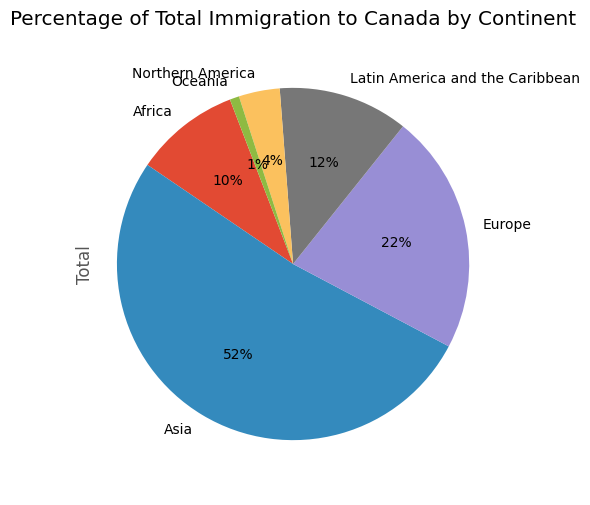

In [143]:
# Create a pie chart using the continent data

df_continents['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct='%1.f%%',
                            startangle=111)

plt.title('Percentage of Total Immigration to Canada by Continent')
plt.axis('equal')

plt.show()

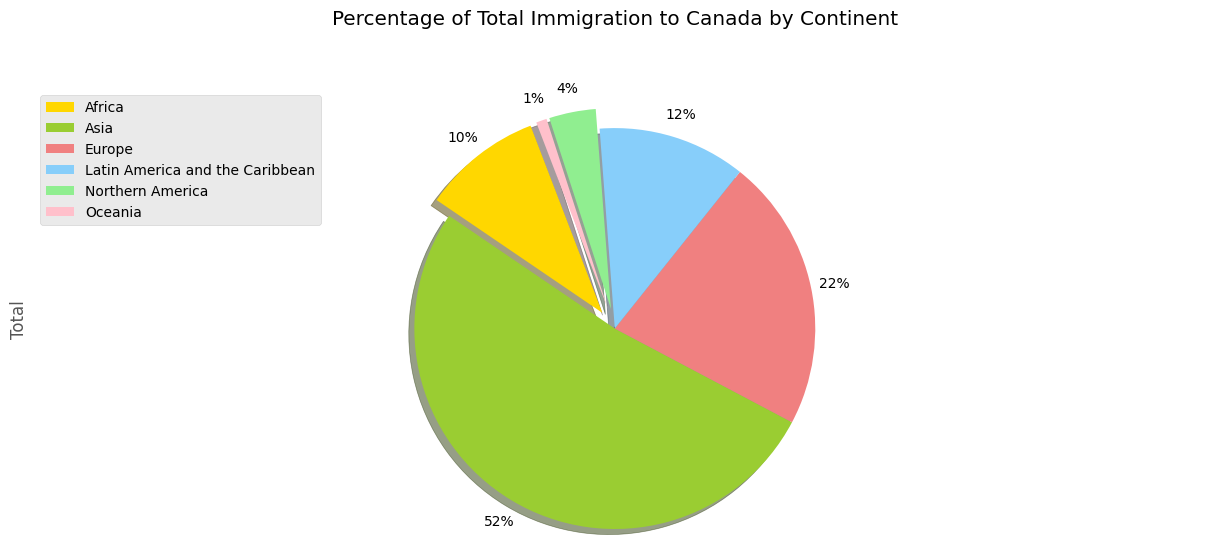

In [144]:
# We can make this prettier

color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.f%%',
                            startangle=111,
                            labels=None,
                            pctdistance=1.12,
                            colors=color_list,
                            shadow=True,
                            explode=explode_list)

plt.title('Percentage of Total Immigration to Canada by Continent', y=1.12)
plt.axis('equal')

plt.legend(labels=df_continents.index,
           loc='upper left',
           fancybox=True,
           )

plt.show()

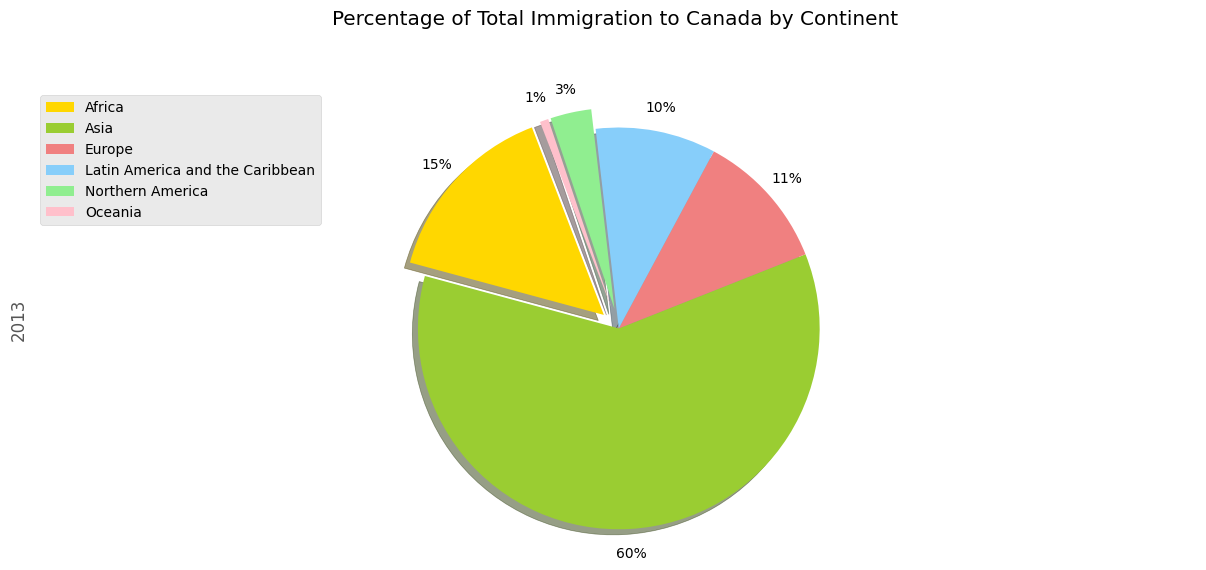

In [145]:
# Same data, but specifically for 2013

color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['2013'].plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.f%%',
                            startangle=111,
                            labels=None,
                            pctdistance=1.12,
                            colors=color_list,
                            shadow=True,
                            explode=explode_list)

plt.title('Percentage of Total Immigration to Canada by Continent', y=1.12)
plt.axis('equal')

plt.legend(labels=df_continents.index,
           loc='upper left',
           fancybox=True,
           )

plt.show()

# Box Plots

Box Plots show the distribution of the data. The box is broken into three parts.

1.   The Upper Bound of the box is the third quartile data, meaning 75% of the data falls below that line
2.   The middle line is the median
3.   The Lower Bound is the first quartile, meaning 25% of data falls below that line

That means that the box itself is the Inter Quartile Range, where 50% of the data lies.

On the whiskers, the upper line is the maximum and the lower line is the minimum. Any extreme outliers are plotted as individual points.



In [146]:
# Display a box plot showing the data distribution of immigration statistics
# for people emmigrating from Japan to Canada

df_japan = df.loc[['Japan'], years]
df_japan

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Japan     701   756   598   309   246   198   248   422   324   494  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Japan     973  1067  1212  1250  1284  1194  1168  1265  1214   982  

[1 rows x 34 columns]

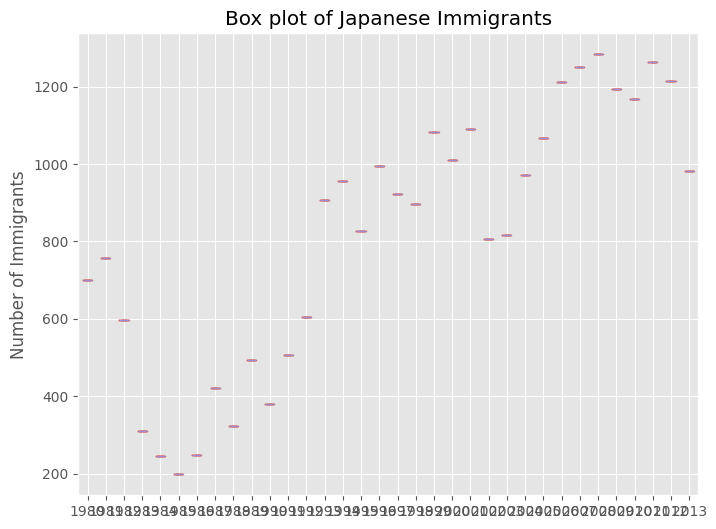

In [147]:
# Plot the box plot

df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanese Immigrants')
plt.ylabel('Number of Immigrants')

plt.show()

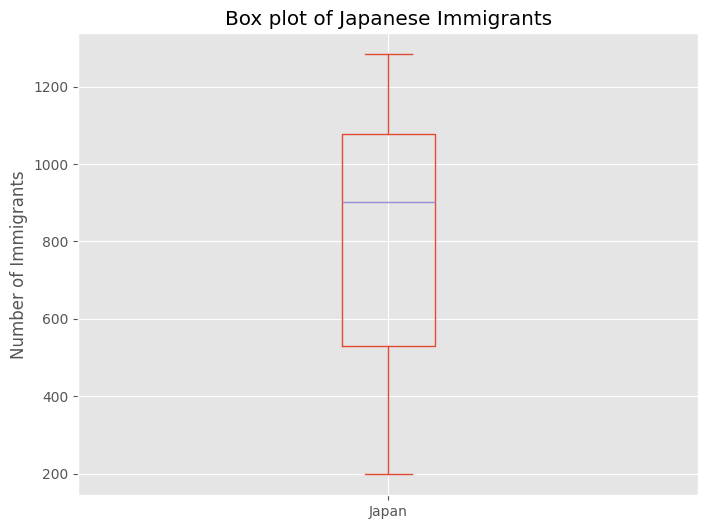

In [148]:
# Unlike Line Plots, box Plots must be transposed from this dataframe

df_japan = df_japan.transpose()

df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanese Immigrants')
plt.ylabel('Number of Immigrants')

plt.show()

In [149]:
# The statistics in the boxplot can be identified and verified
# by calling the describe method

df_japan.describe()

Country        Japan
count      34.000000
mean      814.911765
std       337.219771
min       198.000000
25%       529.000000
50%       902.000000
75%      1079.000000
max      1284.000000

Country         China         India
count       34.000000     34.000000
mean     19410.647059  20350.117647
std      13568.230790  10007.342579
min       1527.000000   4211.000000
25%       5512.750000  10637.750000
50%      19945.000000  20235.000000
75%      31568.500000  28699.500000
max      42584.000000  36210.000000


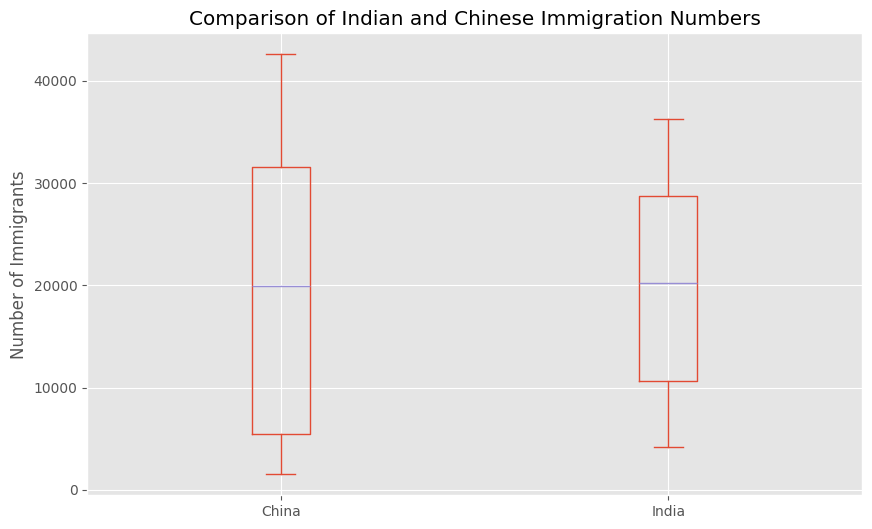

In [150]:
# We can plot multiple box plots on one chart

print(df_CI.describe())

df_CI.plot(kind='box', figsize=(10,6))

plt.title('Comparison of Indian and Chinese Immigration Numbers')
plt.ylabel('Number of Immigrants')

plt.show()

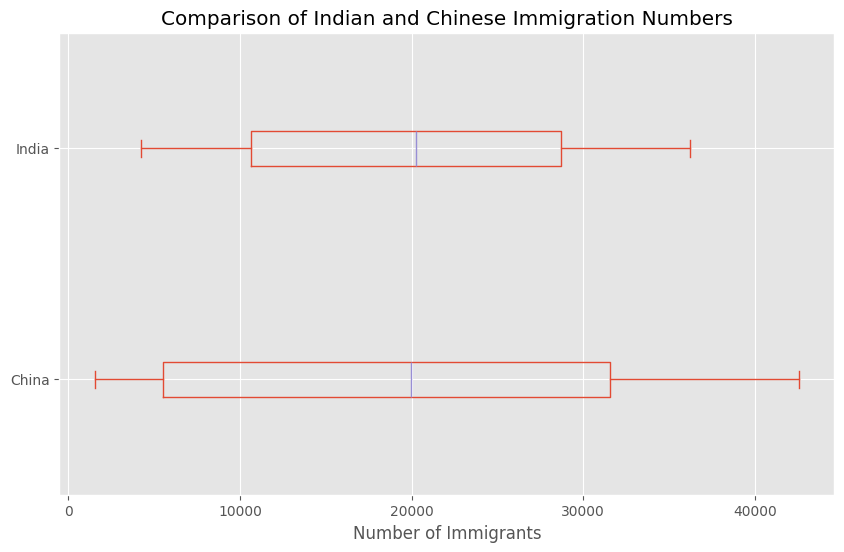

In [151]:
# We can also print box plots horizontally

df_CI.plot(kind='box', figsize=(10,6), vert=False)

plt.title('Comparison of Indian and Chinese Immigration Numbers')
plt.xlabel('Number of Immigrants')

plt.show()

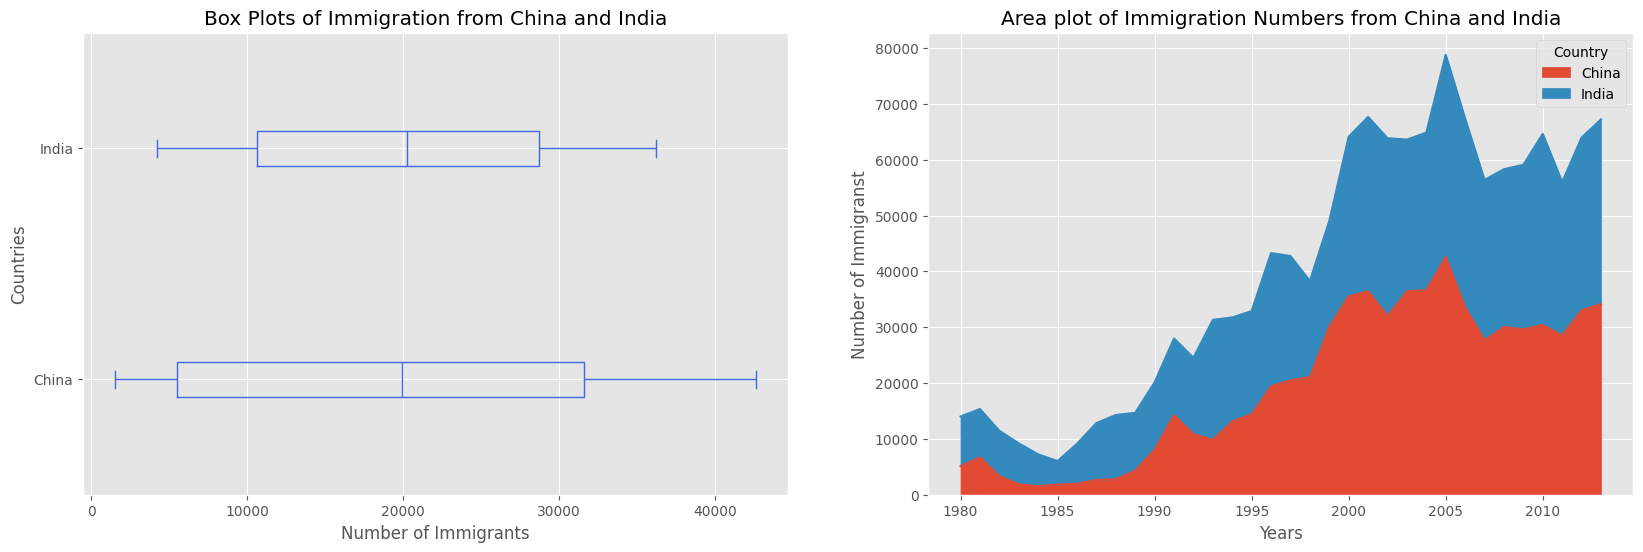

In [152]:
# Subplots
# We can divide a figure into subplots

fig = plt.figure()

# First Row, Two Columns, First Column
ax0 = fig.add_subplot(1, 2, 1)
# First Row, Two Columns, Second Column
# This notation only works where each number is less than 10
ax1 = fig.add_subplot(122)

df_CI.plot(kind='box', color='royalblue', vert=False, figsize=(20,6), ax=ax0)
ax0.set_title('Box Plots of Immigration from China and India')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='area', figsize=(20,6), ax=ax1)
ax1.set_title('Area plot of Immigration Numbers from China and India')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigranst')

plt.show()

/tmp/ipython-input-153-1305783631.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10.drop(['Continent', 'Region'], axis=1, inplace=True)


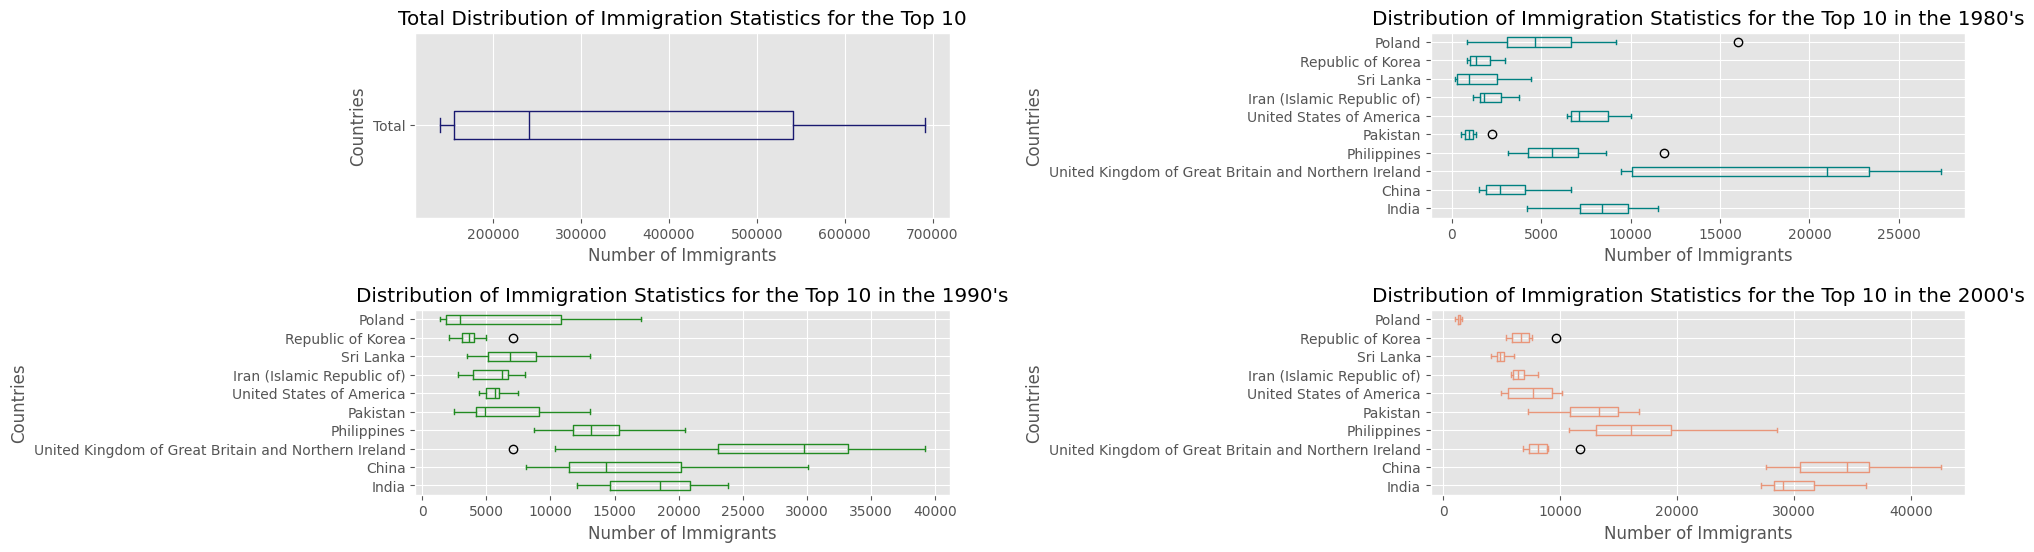

In [153]:
# Box Plots and Subplots for the Top 10 countries by decade and total

eighties = []
ninties = []
aughts = []

for year in years:
  if year[2] == '8':
    eighties.append(year)
  elif year[2] == '9':
    ninties.append(year)
  elif year[2] == '0':
    aughts.append(year)

# print(eighties)
# print(ninties)
# print(aughts)

df.sort_values('Total', axis=0, ascending=False, inplace=True)
df_top10 = df.head(10)
df_top10.drop(['Continent', 'Region'], axis=1, inplace=True)
df_top10_80 = df_top10[eighties].transpose()
df_top10_90 = df_top10[ninties].transpose()
df_top10_00 = df_top10[aughts].transpose()
df_top10 = df_top10['Total'].transpose()
# df_top10_80
# df_top10

fig = plt.figure()

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

df_top10.plot(kind='box', color='midnightblue', vert=False, figsize=(20,6), ax=ax0)
ax0.set_title('Total Distribution of Immigration Statistics for the Top 10')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_top10_80.plot(kind='box', color='teal', vert=False, figsize=(20,6), ax=ax1)
ax1.set_title('Distribution of Immigration Statistics for the Top 10 in the 1980\'s')
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Countries')

df_top10_90.plot(kind='box', color='forestgreen', vert=False, figsize=(20,6), ax=ax2)
ax2.set_title('Distribution of Immigration Statistics for the Top 10 in the 1990\'s')
ax2.set_xlabel('Number of Immigrants')
ax2.set_ylabel('Countries')

df_top10_00.plot(kind='box', color='darksalmon', vert=False, figsize=(20,6), ax=ax3)
ax3.set_title('Distribution of Immigration Statistics for the Top 10 in the 2000\'s')
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Countries')

plt.subplots_adjust(wspace=0.9, hspace=0.5)

plt.show()



# Scatter Plots

Scatter plots are a good way of plotting points of data in order to analyze a trend. This plot is often used with an independent variable on the X axis and the dependent variabl, or target, on the Y axis.

In [154]:
# Plot the total immigration numbers to Canada over the years

# Create a dataframe just containing the years and total immigrants to Canada

df_totals = pd.DataFrame(df[years].sum(axis=0))
df_totals.index = map(int, df_totals.index)
df_totals.reset_index(inplace=True)
df_totals.columns = ['Year', 'Total']

df_totals.head()

Year   Total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

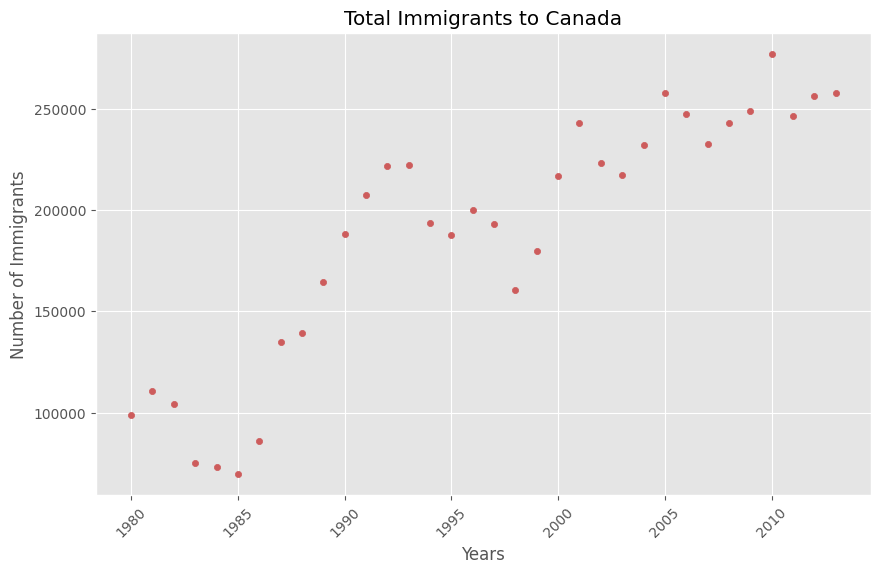

In [155]:
# Create a Scatter plot

df_totals.plot(kind='scatter',
               x='Year',
               y='Total',
               figsize=(10,6),
               color='indianred')

plt.title('Total Immigrants to Canada')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Number of Immigrants')

plt.show()

In [156]:
# Performing Linear Regression on the data

x = df_totals['Year']
y = df_totals['Total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

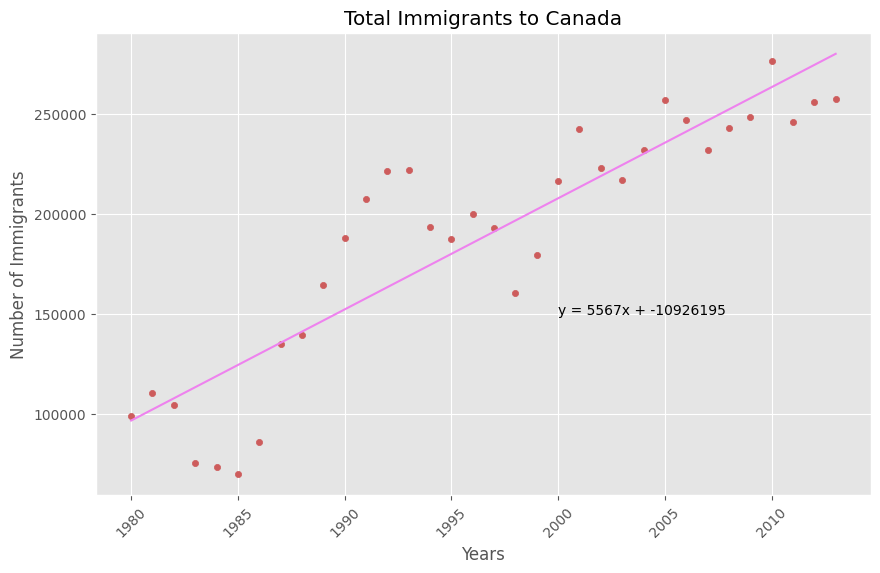

In [157]:
# Plot the regression line with the scatter plot

df_totals.plot(kind='scatter',
               x='Year',
               y='Total',
               figsize=(10,6),
               color='indianred')

plt.title('Total Immigrants to Canada')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='violet')
plt.annotate('y = {0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

In [158]:
# Plot the same data for Denmark, Sweden, and Norway

df_DNS_total = pd.DataFrame(df_DNS.sum(axis=1))
df_DNS_total.reset_index(inplace=True)
df_DNS_total.columns = ['Years', 'Total']
df_DNS_total['Years'] = df_DNS_total['Years'].astype(int)

df_DNS_total.head()

Years  Total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252

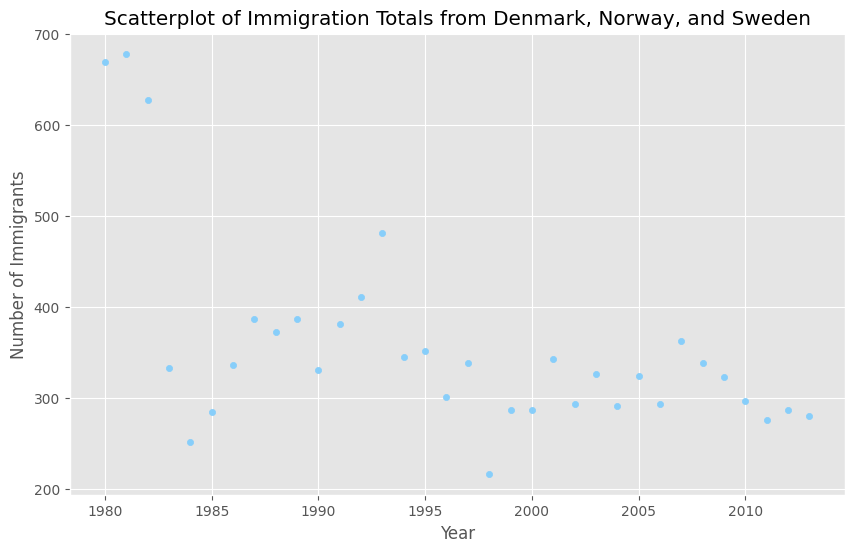

In [159]:
# Plot the data

df_DNS_total.plot(kind='scatter',
                  x='Years',
                  y='Total',
                  figsize=(10,6),
                  color='lightskyblue')

plt.title('Scatterplot of Immigration Totals from Denmark, Norway, and Sweden')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


# Bubble Plots


Bubble Plots show the scatter plot in three dimensions.

In [160]:
# Analyze the impact of the Argentine Great Depression from 1998 to 2002

# Create the dataframe
df_transposed = df[years].transpose()
df_transposed.index = map(int, df_transposed.index)
df_transposed.index.name = "Year"
df_transposed.reset_index(inplace=True)

df_transposed.head()

Country  Year  India  China  \
0        1980   8880   5123   
1        1981   8670   6682   
2        1982   8147   3308   
3        1983   7338   1863   
4        1984   5704   1527   

Country  United Kingdom of Great Britain and Northern Ireland  Philippines  \
0                                                    22045            6051   
1                                                    24796            5921   
2                                                    20620            5249   
3                                                    10015            4562   
4                                                    10170            3801   

Country  Pakistan  United States of America  Iran (Islamic Republic of)  \
0             978                      9378                        1172   
1             972                     10030                        1429   
2            1201                      9074                        1822   
3             900                      7100                        1592   
4             668                      6661                        1977   

Country  Sri Lanka  Republic of Korea  ...  Kiribati  Vanuatu  \
0              185               1011  ...         0        0   
1              371               1456  ...         0        0   
2              290               1572  ...         0        0   
3              197               1081  ...         1        0   
4             1086                847  ...         0        0   

Country  Sao Tome and Principe  Tuvalu  American Samoa  New Caledonia  \
0                            0       0               0              0   
1                            0       1               1              0   
2                            0       0               0              0   
3                            0       0               0              0   
4                            0       1               0              0   

Country  San Marino  Marshall Islands  Western Sahara  Palau  
0                 1                 0               0      0  
1                 0                 0               0      0  
2                 0                 0               0      0  
3                 0                 0               0      0  
4                 0                 0               0      0  

[5 rows x 196 columns]

In [161]:
# Min-Max the Brazil and Argentina Data

brazil = (df_transposed['Brazil'] - df_transposed['Brazil'].min()) / (df_transposed['Brazil'].max() - df_transposed['Brazil'].min())

argentina = (df_transposed['Argentina'] - df_transposed['Argentina'].min()) / (df_transposed['Argentina'].max() - df_transposed['Argentina'].min())

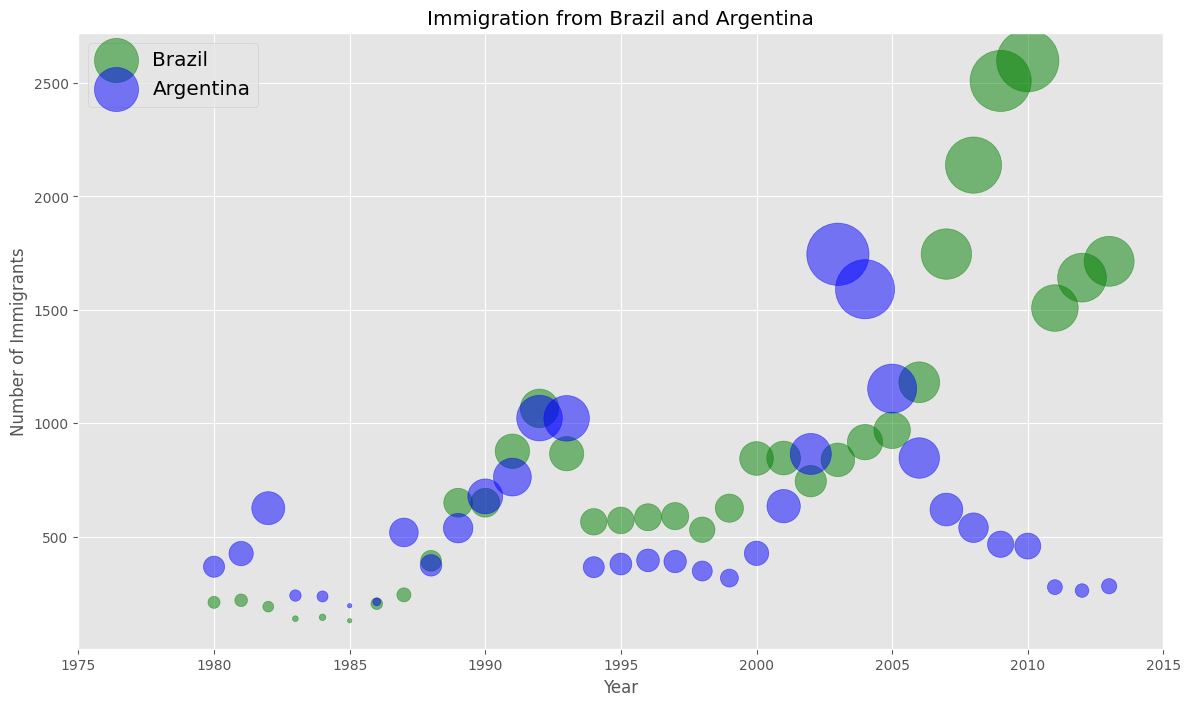

In [162]:
# Plot the data

# Brazil
ax0 = df_transposed.plot(kind='scatter',
                         x='Year',
                         y='Brazil',
                         figsize=(14,8),
                         alpha=0.5,
                         color='green',
                         s=brazil * 2000 + 10,
                         xlim=(1975,2015))

# Agentina
ax1 = df_transposed.plot(kind='scatter',
                         x='Year',
                         y='Argentina',
                         figsize=(14,8),
                         alpha=0.5,
                         color='blue',
                         s=argentina * 2000 + 10,
                         ax=ax0)

ax0.set_title('Immigration from Brazil and Argentina')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['Brazil','Argentina'], loc='upper left', fontsize='x-large')

# Waffle Charts

Waffle charts look like a waffle iron and are a collection of colored cells to indicate the percentage of a whole. MatPlotLib does not have a native Waffle Chart tool, so we have to make it on our own.

In [163]:
# Create a Waffle Chart for to display the Denmark, Norway, and Sweden immigration totals

# Create a dataframe to hold the countries and the total column
df_scandanavia = df.loc[['Denmark', 'Sweden', 'Norway'], 'Total']

# Create Variables to hold total squares and squares per country
total_squares = df_scandanavia.sum()
proportions = []
for i in range(3):
  values = df_scandanavia.iloc[i] / total_squares
  proportions.append(values)

print(proportions)


[np.float64(0.32255663965602777), np.float64(0.48503390110798744), np.float64(0.1924094592359848)]


In [164]:
# Create a grid and determine how many boxes are to be assigned per Country

width = 40
height = 10

total_tiles = width * height

tiles_per_category = []
for value in proportions:
  tiles = (value * total_tiles).round().astype(int)
  tiles_per_category.append(tiles)

print(total_tiles)
print(tiles_per_category)

400
[np.int64(129), np.int64(194), np.int64(77)]


In [165]:
tiles_per_category[2]

np.int64(77)

In [166]:
# Create the waffle chart

# Begin as an empty matrix
waffle_chart = np.zeros((height, width), dtype=int)

# Create indicies to loop through
category = 0
tiles = 0

# Populate the waffle chart
for col in range(width):
  for row in range(height):
    tiles += 1
    if tiles > sum(tiles_per_category[:category]):
      category += 1
    waffle_chart[row, col] = category
    print(tiles, category)

waffle_chart

1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 2
131 2
132 2
133 2
134 2
135 2
136 2
137 2
138 2
139 2
140 2
141 2
142 2
143 2
144 2
145 2
146 2
147 2
148 2
149 2
150 2
151 2
152 2
153 2
154 2
155 2
156 2
157 2
158 2
159 2
160 2
161 2
162 2
163 2
164 2
165 2
166 2
167 2
168 2
169 2
170 2
171 2
172 2
173 2
174 2
175 2
176 2
177 2
178 2
179 2
180 2
181 2
182 2
183 2
184 2
185 

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

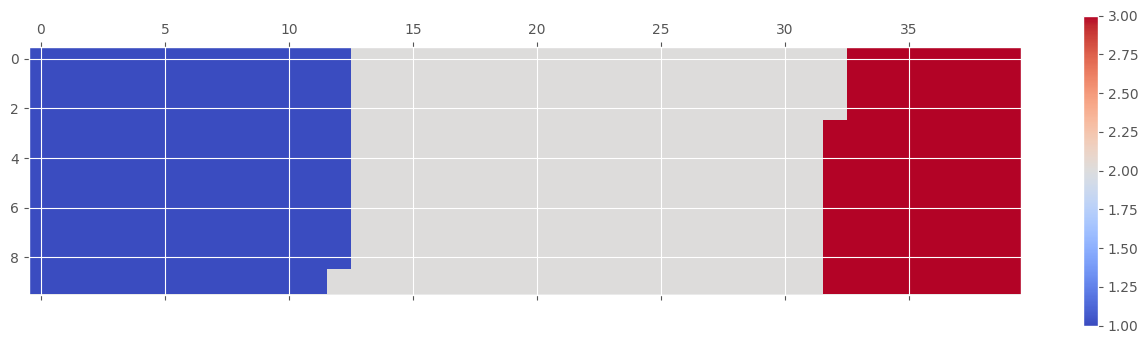

In [167]:
# Turn the matrix into a visual object

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

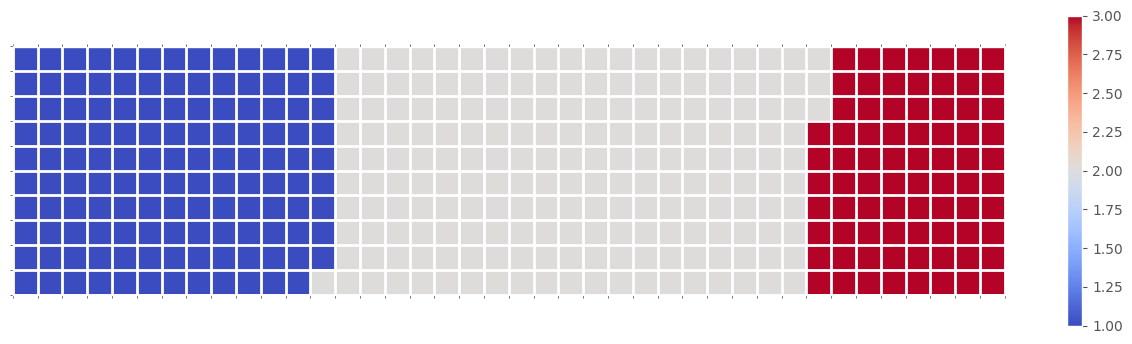

In [168]:
# Expand upon the code to make the chart prettier

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

In [176]:
df_scandanavia

Country
Denmark    3901
Sweden     5866
Norway     2327
Name: Total, dtype: int64

<Figure size 640x480 with 0 Axes>

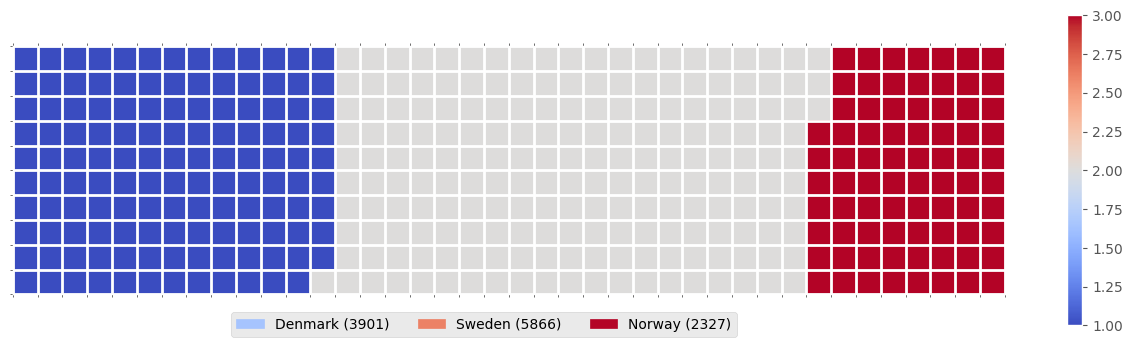

In [183]:
# Expand upon to above code to add a legend

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

cumulative_values = np.cumsum(df_scandanavia)
total_values = cumulative_values[len(cumulative_values) - 1]

legend_handles = []
for i, category in enumerate(df_scandanavia.index.values):
  label = category + ' (' + str(df_scandanavia[category]) + ')'
  color = colormap(float(cumulative_values[i]/total_values))
  legend_handles.append(patches.Patch(color=color, label=label))

plt.legend(handles = legend_handles,
           loc = 'lower center',
           ncol=len(df_scandanavia.index.values),
           bbox_to_anchor = (0, -0.2, 0.95, .1))
plt.show()

In [188]:
# Mash all that together into a singular function

def create_waffle_chart(categories, values, height, width, colormap = plt.cm.coolwarm, value_sign=''):

  # Proportions
  total_values = sum(values)
  category_proportions = [(float(value) / total_values) for value in values]

  # Tiles
  total_tiles = width * height

  # Tiles per category
  tiles_per_category = [round(proportion * total_tiles) for proportion in category_proportions]

  # Initialize the waffle chart
  waffle_chart = np.zeros((height, width))

  # Looping indicies
  category_index = 0
  tile_index = 0

  # Fill the waffle chart
  for col in range(width):
    for row in range(height):
      tile_index += 1
      if tile_index > sum(tiles_per_category[:category_index]):
       category_index += 1
      waffle_chart[row, col] = category_index

  # Create a new figure object
  fig = plt.figure()

  # Display the chart
  plt.matshow(waffle_chart, cmap=colormap)
  plt.colorbar()

  # Create axis and set ticks/grid
  ax = plt.gca()
  ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
  ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
  ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
  plt.xticks([])
  plt.yticks([])

  # Calculate cumulative sums
  cumulative_values = np.cumsum(values)
  total_values = cumulative_values[len(cumulative_values) - 1]

  # Create Legend
  legend_handles = []
  for i, category in enumerate(categories):
    if value_sign == '%':
      label = category + '(' + str(values[i]) + value_sign + ')'
    else:
      label = category + '(' + str(values[i]) + ')'
    color = colormap(float(cumulative_values[i]) / total_values)
    legend_handles.append(patches.Patch(color=color, label=label))

  # Add Legend to chart
  plt.legend(
      handles=legend_handles,
      loc='lower center',
      ncol=len(categories),
      bbox_to_anchor=(0.0, -0.2, 0.95, 0.1)
  )

  # Display the masterpiece
  plt.show()


<Figure size 640x480 with 0 Axes>

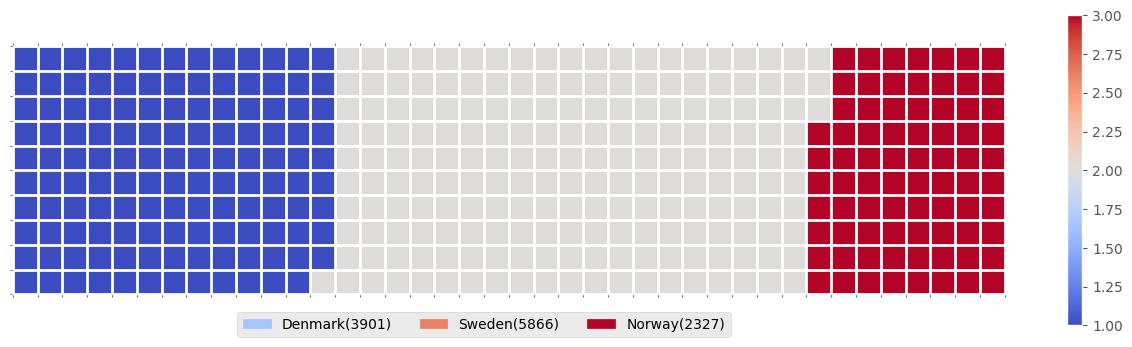

In [190]:
# Test the function

width = 40
height = 10
category = df_scandanavia.index.values
values = df_scandanavia

create_waffle_chart(category, values, height, width)

# Word Clouds

The wordcloud portion of the lab is under construction and unavailable at the time I went through the course.

# Regression Plots

<Axes: xlabel='Year', ylabel='Total'>

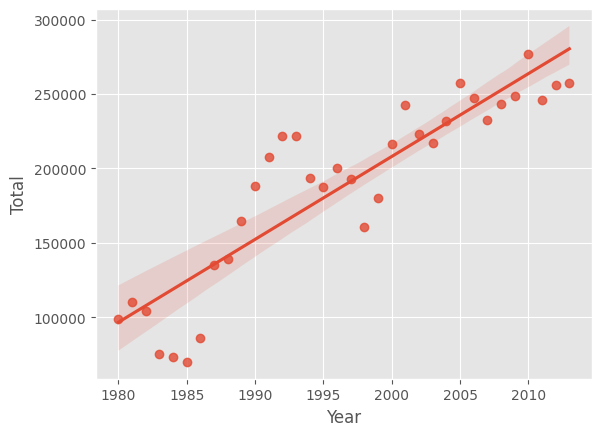

In [192]:
# Use Seaborn to create a regression plot similar to what
# we did in the Scatter plot portion of the lab

sns.regplot(x='Year', y='Total', data=df_totals)

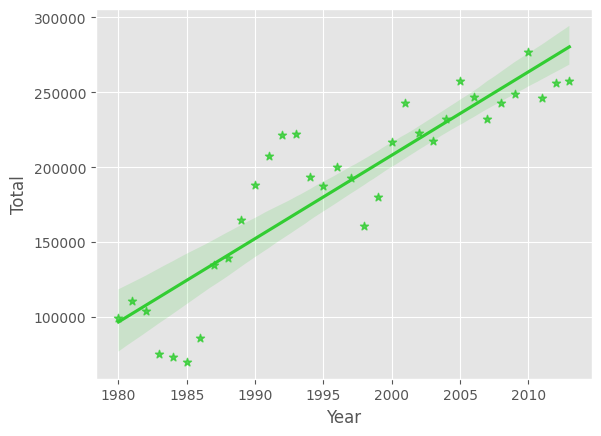

In [193]:
# Basic customization

ax = sns.regplot(x='Year',
                 y='Total',
                 data=df_totals,
                 color='limegreen',
                 marker='*')
plt.show()

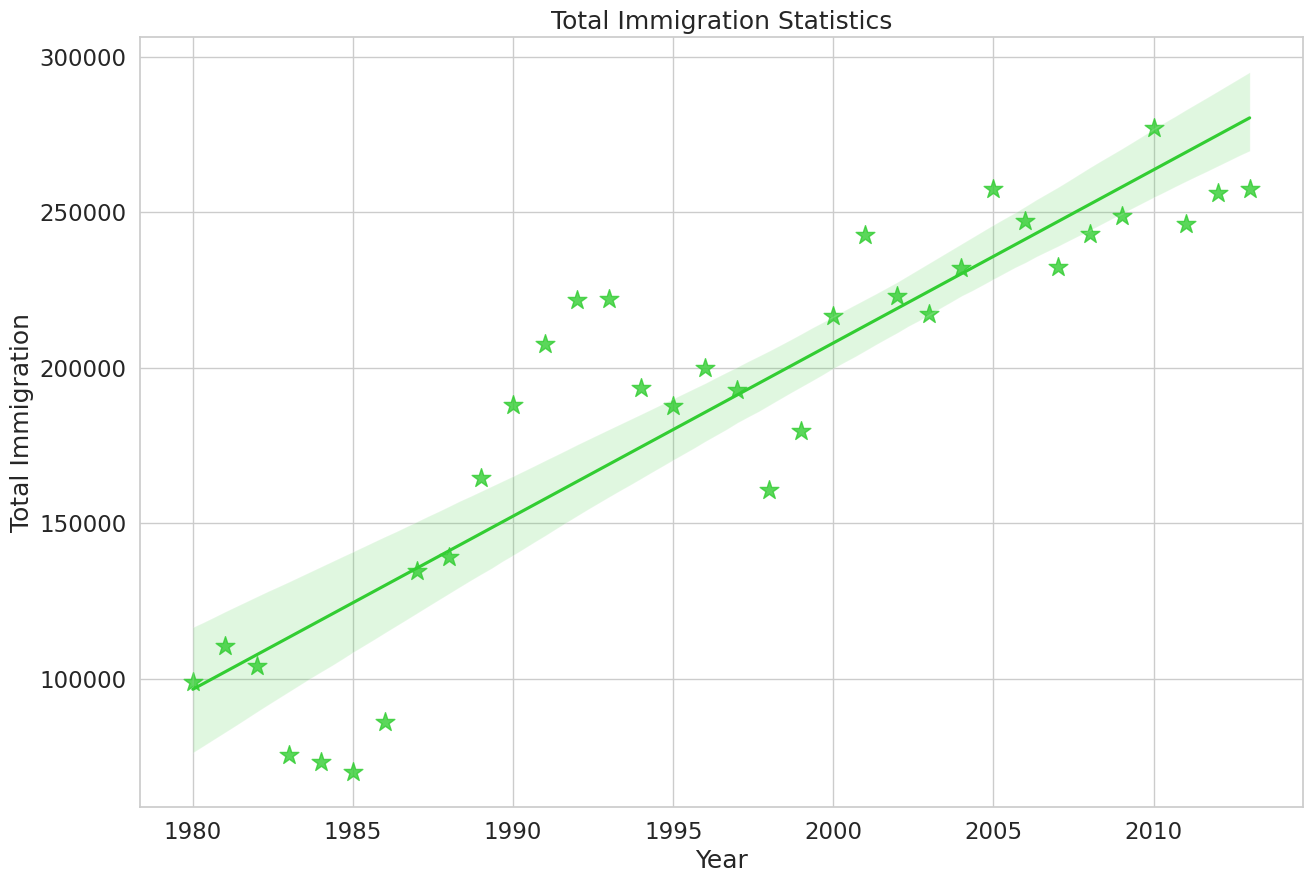

In [199]:
# Bigger and badder
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.5)
# sns.set_style('ticks')
sns.set_style('whitegrid')
ax = sns.regplot(x='Year',
                 y='Total',
                 data=df_totals,
                 color='limegreen',
                 marker='*',
                 scatter_kws={'s': 200})
ax.set(xlabel='Year',
       ylabel='Total Immigration')
ax.set_title('Total Immigration Statistics')
plt.show()

# Folium and Mapping Visualizations

In [202]:
# Display a map

world = folium.Map()
world

In [203]:
# Display a Map centered on Canada
world = folium.Map(location=[56.130, -106.35], zoom_start=4)
world

In [208]:
# Stamen Toner type is for rivers and coasts
# Stamen Terrain shows the hills and mountains
# Stamen is no longer hosting these

# world = folium.Map(location=[56.130, -106.35], zoom_start=4, attr='Stamen Terrain')
# world

In [214]:
# Import Crime Statistics CSV

url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv'
df_crime = pd.read_csv(url2)
df_crime.head()
# df_crime

IncidntNum        Category  \
0        120058272     WEAPON LAWS   
1        120058272     WEAPON LAWS   
2        141059263        WARRANTS   
3        160013662    NON-CRIMINAL   
4        160002740    NON-CRIMINAL   
...            ...             ...   
150495   161061000         ASSAULT   
150496   176000742    NON-CRIMINAL   
150497   176000758   LARCENY/THEFT   
150498   176000764   LARCENY/THEFT   
150499   179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495                                            BATTERY    Friday   
150496                                      LOST PROPERTY    Friday   
150497                            PETTY THEFT OF PROPERTY  Thursday   
150498                            GRAND THEFT OF PROPERTY    Friday   
150499  FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...    Friday   

                          Date   Time  PdDistrict      Resolution  \
0       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2       04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3       01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4       01/01/2016 12:00:00 AM  00:30     MISSION            NONE   
...                        ...    ...         ...             ...   
150495  12/30/2016 12:00:00 AM  21:01        PARK            NONE   
150496  12/30/2016 12:00:00 AM  08:00     CENTRAL            NONE   
150497  12/29/2016 12:00:00 AM  20:00     CENTRAL            NONE   
150498  12/30/2016 12:00:00 AM  10:00     CENTRAL            NONE   
150499  12/02/2016 12:00:00 AM  14:00    SOUTHERN            NONE   

                         Address           X          Y  \
0         800 Block of BRYANT ST -122.403405  37.775421   
1         800 Block of BRYANT ST -122.403405  37.775421   
2          KEITH ST / SHAFTER AV -122.388856  37.729981   
3         JONES ST / OFARRELL ST -122.412971  37.785788   
4           16TH ST / MISSION ST -122.419672  37.765050   
...                          ...         ...        ...   
150495       OAK ST / STANYAN ST -122.453982  37.771428   
150496   JACKSON ST / SANSOME ST -122.401857  37.796626   
150497       PINE ST / TAYLOR ST -122.412269  37.790673   
150498  200 Block of STOCKTON ST -122.406659  37.788275   
150499    800 Block of BRYANT ST -122.403405  37.775421   

                                     Location            PdId  
0        (37.775420706711, -122.403404791479)  12005827212120  
1        (37.775420706711, -122.403404791479)  12005827212168  
2       (37.7299809672996, -122.388856204292)  14105926363010  
3       (37.7857883766888, -122.412970537591)  16001366271000  
4       (37.7650501214668, -122.419671780296)  16000274071000  
...                                       ...             ...  
150495  (37.7714278595913, -122.453981622365)  16106100004134  
150496  (37.7966261239618, -122.401857374739)  17600074271000  
150497   (37.7906727649886, -122.41226909106)  17600075806372  
150498  (37.7882745285785, -122.406658711008)  17600076406374  
150499   (37.775420706711, -122.403404791479)  17900286809024  

[150500 rows x 13 columns]

In [211]:
# Lat/Lon of SFCA
latitude = 37.77
longitude = -122.42

In [222]:
# Map based on SF

sf_map = folium.Map(location=[latitude,longitude], zoom_start=13)
sf_map

In [216]:
# For speed, we will only use the top 100 incidents

df_crime100 = df_crime.head(101)
df_crime100.shape

(101, 13)

In [223]:
# Loop through and add incidents to map using feature group

incidents = folium.map.FeatureGroup()

for lat, lon in zip(df_crime100.Y, df_crime100.X):
  incidents.add_child(
      folium.features.CircleMarker(
          [lat, lon],
          radius=5,
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6
      )
  )

sf_map.add_child(incidents)

In [225]:
# Add popups to the markers

incidents = folium.map.FeatureGroup()

for lat, lon in zip(df_crime100.Y, df_crime100.X):
  incidents.add_child(
      folium.features.CircleMarker(
          [lat, lon],
          radius=5,
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6
      )
  )

lats = list(df_crime100.Y)
lons = list(df_crime100.X)
labels = list(df_crime100.Category)

for lat, lon, label in zip(lats, lons, labels):
  folium.Marker([lat, lon], popup=label).add_to(sf_map)

sf_map.add_child(incidents)

In [226]:
# Clean the code up - version 1

incidents = folium.map.FeatureGroup()

for lat, lon, label in zip(df_crime100.Y, df_crime100.X, df_crime100.Category):
  incidents.add_child(
      folium.features.CircleMarker(
          [lat, lon],
          radius=5,
          color='yellow',
          fill=True,
          popup=label,
          fill_color='blue',
          fill_opacity=0.6
      )
  ).add_to(sf_map)

sf_map

In [227]:
# Clean code version 2 - Cluster Markers

incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lon, label in zip(df_crime100.Y, df_crime100.X, df_crime100.Category):
  folium.Marker(
      location=[lat, lon],
      icon=None,
      popup=label
  ).add_to(incidents)

sf_map

In [232]:
# Choropleth maps are heatmaps but on actual maps
# We are going to create a choropleth to show total immigration into Canada

# First we need the geojson
geourl = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
response = requests.get(geourl)
geojson = response.content
# geojson

In [236]:
# Generate the base map

# immigration_map = folium.Choropleth(location=[0,0], zoom_start=3)

TypeError: Choropleth.__init__() missing 1 required positional argument: 'geo_data'

In [240]:
# The choropleth method needs 4 main arguments
# A JSON file for the map
# The dataframe information
# The columns within the df that will be used
# Key on which is the JSON key or variable of interest



folium.Choropleth(
    geo_data=geojson,
    data=df,
    columns=[df.index.values,'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.4,
    legend_name='Immigration to Canada from 1980 - 2013'
)



ValueError: Cannot render objects with any missing geometries: b'{"type":"FeatureCollection","features":[\n{"type":"Feature","properties":{"name":"Afghanistan"},"geometry":{"type":"Polygon","coordinates":[[[61.210817,35.650072],[62.230651,35.270664],[62.984662,35.404041],[63.193538,35.857166],[63.982896,36.007957],[64.546479,36.312073],[64.746105,37.111818],[65.588948,37.305217],[65.745631,37.661164],[66.217385,37.39379],[66.518607,37.362784],[67.075782,37.356144],[67.83,37.144994],[68.135562,37.023115],[68.859446,37.344336],[69.196273,37.151144],[69.518785,37.608997],[70.116578,37.588223],[70.270574,37.735165],[70.376304,38.138396],[70.806821,38.486282],[71.348131,38.258905],[71.239404,37.953265],[71.541918,37.905774],[71.448693,37.065645],[71.844638,36.738171],[72.193041,36.948288],[72.63689,37.047558],[73.260056,37.495257],[73.948696,37.421566],[74.980002,37.41999],[75.158028,37.133031],[74.575893,37.020841],[74.067552,36.836176],[72.920025,36.720007],[71.846292,36.509942],[71.262348,36.074388],[71.498768,35.650563],[71.613076,35.153203],[71.115019,34.733126],[71.156773,34.348911],[70.881803,33.988856],[69.930543,34.02012],[70.323594,33.358533],[69.687147,33.105499],[69.262522,32.501944],[69.317764,31.901412],[68.926677,31.620189],[68.556932,31.71331],[67.792689,31.58293],[67.683394,31.303154],[66.938891,31.304911],[66.381458,30.738899],[66.346473,29.887943],[65.046862,29.472181],[64.350419,29.560031],[64.148002,29.340819],[63.550261,29.468331],[62.549857,29.318572],[60.874248,29.829239],[61.781222,30.73585],[61.699314,31.379506],[60.941945,31.548075],[60.863655,32.18292],[60.536078,32.981269],[60.9637,33.528832],[60.52843,33.676446],[60.803193,34.404102],[61.210817,35.650072]]]},"id":"AFG"},\n{"type":"Feature","properties":{"name":"Angola"},"geometry":{"type":"MultiPolygon","coordinates":[[[[16.326528,-5.87747],[16.57318,-6.622645],[16.860191,-7.222298],[17.089996,-7.545689],[17.47297,-8.068551],[18.134222,-7.987678],[18.464176,-7.847014],[19.016752,-7.988246],[19.166613,-7.738184],[19.417502,-7.155429],[20.037723,-7.116361],[20.091622,-6.94309],[20.601823,-6.939318],[20.514748,-7.299606],[21.728111,-7.290872],[21.746456,-7.920085],[21.949131,-8.305901],[21.801801,-8.908707],[21.875182,-9.523708],[22.208753,-9.894796],[22.155268,-11.084801],[22.402798,-10.993075],[22.837345,-11.017622],[23.456791,-10.867863],[23.912215,-10.926826],[24.017894,-11.237298],[23.904154,-11.722282],[24.079905,-12.191297],[23.930922,-12.565848],[24.016137,-12.911046],[21.933886,-12.898437],[21.887843,-16.08031],[22.562478,-16.898451],[23.215048,-17.523116],[21.377176,-17.930636],[18.956187,-17.789095],[18.263309,-17.309951],[14.209707,-17.353101],[14.058501,-17.423381],[13.462362,-16.971212],[12.814081,-16.941343],[12.215461,-17.111668],[11.734199,-17.301889],[11.640096,-16.673142],[11.778537,-15.793816],[12.123581,-14.878316],[12.175619,-14.449144],[12.500095,-13.5477],[12.738479,-13.137906],[13.312914,-12.48363],[13.633721,-12.038645],[13.738728,-11.297863],[13.686379,-10.731076],[13.387328,-10.373578],[13.120988,-9.766897],[12.87537,-9.166934],[12.929061,-8.959091],[13.236433,-8.562629],[12.93304,-7.596539],[12.728298,-6.927122],[12.227347,-6.294448],[12.322432,-6.100092],[12.735171,-5.965682],[13.024869,-5.984389],[13.375597,-5.864241],[16.326528,-5.87747]]],[[[12.436688,-5.684304],[12.182337,-5.789931],[11.914963,-5.037987],[12.318608,-4.60623],[12.62076,-4.438023],[12.995517,-4.781103],[12.631612,-4.991271],[12.468004,-5.248362],[12.436688,-5.684304]]]]},"id":"AGO"},\n{"type":"Feature","properties":{"name":"Albania"},"geometry":{"type":"Polygon","coordinates":[[[20.590247,41.855404],[20.463175,41.515089],[20.605182,41.086226],[21.02004,40.842727],[20.99999,40.580004],[20.674997,40.435],[20.615,40.110007],[20.150016,39.624998],[19.98,39.694993],[19.960002,39.915006],[19.406082,40.250773],[19.319059,40.72723],[19.40355,41.409566],[19.540027,41.719986],[19.371769,41.877548],[19.304486,42.195745],[19.738051,42.688247],[19.801613,42.500093],[20.0707,42.58863],[20.283755,42.32026],[20.52295,42.21787],[20.590247,41.855404]]]},"id":"ALB"},\n{"type":"Feature","properties":{"name":"United Arab Emirates"},"geometry":{"type":"Polygon","coordinates":[[[51.579519,24.245497],[51.757441,24.294073],[51.794389,24.019826],[52.577081,24.177439],[53.404007,24.151317],[54.008001,24.121758],[54.693024,24.797892],[55.439025,25.439145],[56.070821,26.055464],[56.261042,25.714606],[56.396847,24.924732],[55.886233,24.920831],[55.804119,24.269604],[55.981214,24.130543],[55.528632,23.933604],[55.525841,23.524869],[55.234489,23.110993],[55.208341,22.70833],[55.006803,22.496948],[52.000733,23.001154],[51.617708,24.014219],[51.579519,24.245497]]]},"id":"ARE"},\n{"type":"Feature","properties":{"name":"Argentina"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-65.5,-55.2],[-66.45,-55.25],[-66.95992,-54.89681],[-67.56244,-54.87001],[-68.63335,-54.8695],[-68.63401,-52.63637],[-68.25,-53.1],[-67.75,-53.85],[-66.45,-54.45],[-65.05,-54.7],[-65.5,-55.2]]],[[[-64.964892,-22.075862],[-64.377021,-22.798091],[-63.986838,-21.993644],[-62.846468,-22.034985],[-62.685057,-22.249029],[-60.846565,-23.880713],[-60.028966,-24.032796],[-58.807128,-24.771459],[-57.777217,-25.16234],[-57.63366,-25.603657],[-58.618174,-27.123719],[-57.60976,-27.395899],[-56.486702,-27.548499],[-55.695846,-27.387837],[-54.788795,-26.621786],[-54.625291,-25.739255],[-54.13005,-25.547639],[-53.628349,-26.124865],[-53.648735,-26.923473],[-54.490725,-27.474757],[-55.162286,-27.881915],[-56.2909,-28.852761],[-57.625133,-30.216295],[-57.874937,-31.016556],[-58.14244,-32.044504],[-58.132648,-33.040567],[-58.349611,-33.263189],[-58.427074,-33.909454],[-58.495442,-34.43149],[-57.22583,-35.288027],[-57.362359,-35.97739],[-56.737487,-36.413126],[-56.788285,-36.901572],[-57.749157,-38.183871],[-59.231857,-38.72022],[-61.237445,-38.928425],[-62.335957,-38.827707],[-62.125763,-39.424105],[-62.330531,-40.172586],[-62.145994,-40.676897],[-62.745803,-41.028761],[-63.770495,-41.166789],[-64.73209,-40.802677],[-65.118035,-41.064315],[-64.978561,-42.058001],[-64.303408,-42.359016],[-63.755948,-42.043687],[-63.458059,-42.563138],[-64.378804,-42.873558],[-65.181804,-43.495381],[-65.328823,-44.501366],[-65.565269,-45.036786],[-66.509966,-45.039628],[-67.293794,-45.551896],[-67.580546,-46.301773],[-66.597066,-47.033925],[-65.641027,-47.236135],[-65.985088,-48.133289],[-67.166179,-48.697337],[-67.816088,-49.869669],[-68.728745,-50.264218],[-69.138539,-50.73251],[-68.815561,-51.771104],[-68.149995,-52.349983],[-68.571545,-52.299444],[-69.498362,-52.142761],[-71.914804,-52.009022],[-72.329404,-51.425956],[-72.309974,-50.67701],[-72.975747,-50.74145],[-73.328051,-50.378785],[-73.415436,-49.318436],[-72.648247,-48.878618],[-72.331161,-48.244238],[-72.447355,-47.738533],[-71.917258,-46.884838],[-71.552009,-45.560733],[-71.659316,-44.973689],[-71.222779,-44.784243],[-71.329801,-44.407522],[-71.793623,-44.207172],[-71.464056,-43.787611],[-71.915424,-43.408565],[-72.148898,-42.254888],[-71.746804,-42.051386],[-71.915734,-40.832339],[-71.680761,-39.808164],[-71.413517,-38.916022],[-70.814664,-38.552995],[-71.118625,-37.576827],[-71.121881,-36.658124],[-70.364769,-36.005089],[-70.388049,-35.169688],[-69.817309,-34.193571],[-69.814777,-33.273886],[-70.074399,-33.09121],[-70.535069,-31.36501],[-69.919008,-30.336339],[-70.01355,-29.367923],[-69.65613,-28.459141],[-69.001235,-27.521214],[-68.295542,-26.89934],[-68.5948,-26.506909],[-68.386001,-26.185016],[-68.417653,-24.518555],[-67.328443,-24.025303],[-66.985234,-22.986349],[-67.106674,-22.735925],[-66.273339,-21.83231],[-64.964892,-22.075862]]]]},"id":"ARG"},\n{"type":"Feature","properties":{"name":"Armenia"},"geometry":{"type":"Polygon","coordinates":[[[43.582746,41.092143],[44.97248,41.248129],[45.179496,40.985354],[45.560351,40.81229],[45.359175,40.561504],[45.891907,40.218476],[45.610012,39.899994],[46.034534,39.628021],[46.483499,39.464155],[46.50572,38.770605],[46.143623,38.741201],[45.735379,39.319719],[45.739978,39.473999],[45.298145,39.471751],[45.001987,39.740004],[44.79399,39.713003],[44.400009,40.005],[43.656436,40.253564],[43.752658,40.740201],[43.582746,41.092143]]]},"id":"ARM"},\n{"type":"Feature","properties":{"name":"Antarctica"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-59.572095,-80.040179],[-59.865849,-80.549657],[-60.159656,-81.000327],[-62.255393,-80.863178],[-64.488125,-80.921934],[-65.741666,-80.588827],[-65.741666,-80.549657],[-66.290031,-80.255773],[-64.037688,-80.294944],[-61.883246,-80.39287],[-61.138976,-79.981371],[-60.610119,-79.628679],[-59.572095,-80.040179]]],[[[-159.208184,-79.497059],[-161.127601,-79.634209],[-162.439847,-79.281465],[-163.027408,-78.928774],[-163.066604,-78.869966],[-163.712896,-78.595667],[-163.712896,-78.595667],[-163.105801,-78.223338],[-161.245113,-78.380176],[-160.246208,-78.693645],[-159.482405,-79.046338],[-159.208184,-79.497059]]],[[[-45.154758,-78.04707],[-43.920828,-78.478103],[-43.48995,-79.08556],[-43.372438,-79.516645],[-43.333267,-80.026123],[-44.880537,-80.339644],[-46.506174,-80.594357],[-48.386421,-80.829485],[-50.482107,-81.025442],[-52.851988,-80.966685],[-54.164259,-80.633528],[-53.987991,-80.222028],[-51.853134,-79.94773],[-50.991326,-79.614623],[-50.364595,-79.183487],[-49.914131,-78.811209],[-49.306959,-78.458569],[-48.660616,-78.047018],[-48.660616,-78.047019],[-48.151396,-78.04707],[-46.662857,-77.831476],[-45.154758,-78.04707]]],[[[-121.211511,-73.50099],[-119.918851,-73.657725],[-118.724143,-73.481353],[-119.292119,-73.834097],[-120.232217,-74.08881],[-121.62283,-74.010468],[-122.621735,-73.657778],[-122.621735,-73.657777],[-122.406245,-73.324619],[-121.211511,-73.50099]]],[[[-125.559566,-73.481353],[-124.031882,-73.873268],[-124.619469,-73.834097],[-125.912181,-73.736118],[-127.28313,-73.461769],[-127.28313,-73.461768],[-126.558472,-73.246226],[-125.559566,-73.481353]]],[[[-98.98155,-71.933334],[-97.884743,-72.070535],[-96.787937,-71.952971],[-96.20035,-72.521205],[-96.983765,-72.442864],[-98.198083,-72.482035],[-99.432013,-72.442864],[-100.783455,-72.50162],[-101.801868,-72.305663],[-102.330725,-71.894164],[-102.330725,-71.894164],[-101.703967,-71.717792],[-100.430919,-71.854993],[-98.98155,-71.933334]]],[[[-68.451346,-70.955823],[-68.333834,-71.406493],[-68.510128,-71.798407],[-68.784297,-72.170736],[-69.959471,-72.307885],[-71.075889,-72.503842],[-72.388134,-72.484257],[-71.8985,-72.092343],[-73.073622,-72.229492],[-74.19004,-72.366693],[-74.953895,-72.072757],[-75.012625,-71.661258],[-73.915819,-71.269345],[-73.915819,-71.269344],[-73.230331,-71.15178],[-72.074717,-71.190951],[-71.780962,-70.681473],[-71.72218,-70.309196],[-71.741791,-69.505782],[-71.173815,-69.035475],[-70.253252,-68.87874],[-69.724447,-69.251017],[-69.489422,-69.623346],[-69.058518,-70.074016],[-68.725541,-70.505153],[-68.451346,-70.955823]]],[[[-58.614143,-64.152467],[-59.045073,-64.36801],[-59.789342,-64.211223],[-60.611928,-64.309202],[-61.297416,-64.54433],[-62.0221,-64.799094],[-62.51176,-65.09303],[-62.648858,-65.484942],[-62.590128,-65.857219],[-62.120079,-66.190326],[-62.805567,-66.425505],[-63.74569,-66.503847],[-64.294106,-66.837004],[-64.881693,-67.150474],[-65.508425,-67.58161],[-65.665082,-67.953887],[-65.312545,-68.365335],[-64.783715,-68.678908],[-63.961103,-68.913984],[-63.1973,-69.227556],[-62.785955,-69.619419],[-62.570516,-69.991747],[-62.276736,-70.383661],[-61.806661,-70.716768],[-61.512906,-71.089045],[-61.375809,-72.010074],[-61.081977,-72.382351],[-61.003661,-72.774265],[-60.690269,-73.166179],[-60.827367,-73.695242],[-61.375809,-74.106742],[-61.96337,-74.439848],[-63.295201,-74.576997],[-63.74569,-74.92974],[-64.352836,-75.262847],[-65.860987,-75.635124],[-67.192818,-75.79191],[-68.446282,-76.007452],[-69.797724,-76.222995],[-70.600724,-76.634494],[-72.206776,-76.673665],[-73.969536,-76.634494],[-75.555977,-76.712887],[-77.24037,-76.712887],[-76.926979,-77.104802],[-75.399294,-77.28107],[-74.282876,-77.55542],[-73.656119,-77.908112],[-74.772536,-78.221633],[-76.4961,-78.123654],[-77.925858,-78.378419],[-77.984666,-78.789918],[-78.023785,-79.181833],[-76.848637,-79.514939],[-76.633224,-79.887216],[-75.360097,-80.259545],[-73.244852,-80.416331],[-71.442946,-80.69063],[-70.013163,-81.004151],[-68.191646,-81.317672],[-65.704279,-81.474458],[-63.25603,-81.748757],[-61.552026,-82.042692],[-59.691416,-82.37585],[-58.712121,-82.846106],[-58.222487,-83.218434],[-57.008117,-82.865691],[-55.362894,-82.571755],[-53.619771,-82.258235],[-51.543644,-82.003521],[-49.76135,-81.729171],[-47.273931,-81.709586],[-44.825708,-81.846735],[-42.808363,-82.081915],[-42.16202,-81.65083],[-40.771433,-81.356894],[-38.244818,-81.337309],[-36.26667,-81.121715],[-34.386397,-80.906172],[-32.310296,-80.769023],[-30.097098,-80.592651],[-28.549802,-80.337938],[-29.254901,-79.985195],[-29.685805,-79.632503],[-29.685805,-79.260226],[-31.624808,-79.299397],[-33.681324,-79.456132],[-35.639912,-79.456132],[-35.914107,-79.083855],[-35.77701,-78.339248],[-35.326546,-78.123654],[-33.896763,-77.888526],[-32.212369,-77.65345],[-30.998051,-77.359515],[-29.783732,-77.065579],[-28.882779,-76.673665],[-27.511752,-76.497345],[-26.160336,-76.360144],[-25.474822,-76.281803],[-23.927552,-76.24258],[-22.458598,-76.105431],[-21.224694,-75.909474],[-20.010375,-75.674346],[-18.913543,-75.439218],[-17.522982,-75.125698],[-16.641589,-74.79254],[-15.701491,-74.498604],[-15.40771,-74.106742],[-16.46532,-73.871614],[-16.112784,-73.460114],[-15.446855,-73.146542],[-14.408805,-72.950585],[-13.311973,-72.715457],[-12.293508,-72.401936],[-11.510067,-72.010074],[-11.020433,-71.539767],[-10.295774,-71.265416],[-9.101015,-71.324224],[-8.611381,-71.65733],[-7.416622,-71.696501],[-7.377451,-71.324224],[-6.868232,-70.93231],[-5.790985,-71.030289],[-5.536375,-71.402617],[-4.341667,-71.461373],[-3.048981,-71.285053],[-1.795492,-71.167438],[-0.659489,-71.226246],[-0.228637,-71.637745],[0.868195,-71.304639],[1.886686,-71.128267],[3.022638,-70.991118],[4.139055,-70.853917],[5.157546,-70.618789],[6.273912,-70.462055],[7.13572,-70.246512],[7.742866,-69.893769],[8.48711,-70.148534],[9.525135,-70.011333],[10.249845,-70.48164],[10.817821,-70.834332],[11.953824,-70.638375],[12.404287,-70.246512],[13.422778,-69.972162],[14.734998,-70.030918],[15.126757,-70.403247],[15.949342,-70.030918],[17.026589,-69.913354],[18.201711,-69.874183],[19.259373,-69.893769],[20.375739,-70.011333],[21.452985,-70.07014],[21.923034,-70.403247],[22.569403,-70.697182],[23.666184,-70.520811],[24.841357,-70.48164],[25.977309,-70.48164],[27.093726,-70.462055],[28.09258,-70.324854],[29.150242,-70.20729],[30.031583,-69.93294],[30.971733,-69.75662],[31.990172,-69.658641],[32.754053,-69.384291],[33.302443,-68.835642],[33.870419,-68.502588],[34.908495,-68.659271],[35.300202,-69.012014],[36.16201,-69.247142],[37.200035,-69.168748],[37.905108,-69.52144],[38.649404,-69.776205],[39.667894,-69.541077],[40.020431,-69.109941],[40.921358,-68.933621],[41.959434,-68.600514],[42.938702,-68.463313],[44.113876,-68.267408],[44.897291,-68.051866],[45.719928,-67.816738],[46.503343,-67.601196],[47.44344,-67.718759],[48.344419,-67.366068],[48.990736,-67.091718],[49.930885,-67.111303],[50.753471,-66.876175],[50.949325,-66.523484],[51.791547,-66.249133],[52.614133,-66.053176],[53.613038,-65.89639],[54.53355,-65.818049],[55.414943,-65.876805],[56.355041,-65.974783],[57.158093,-66.249133],[57.255968,-66.680218],[58.137361,-67.013324],[58.744508,-67.287675],[59.939318,-67.405239],[60.605221,-67.679589],[61.427806,-67.953887],[62.387489,-68.012695],[63.19049,-67.816738],[64.052349,-67.405239],[64.992447,-67.620729],[65.971715,-67.738345],[66.911864,-67.855909],[67.891133,-67.934302],[68.890038,-67.934302],[69.712624,-68.972791],[69.673453,-69.227556],[69.555941,-69.678226],[68.596258,-69.93294],[67.81274,-70.305268],[67.949889,-70.697182],[69.066307,-70.677545],[68.929157,-71.069459],[68.419989,-71.441788],[67.949889,-71.853287],[68.71377,-72.166808],[69.869307,-72.264787],[71.024895,-72.088415],[71.573285,-71.696501],[71.906288,-71.324224],[72.454627,-71.010703],[73.08141,-70.716768],[73.33602,-70.364024],[73.864877,-69.874183],[74.491557,-69.776205],[75.62756,-69.737034],[76.626465,-69.619419],[77.644904,-69.462684],[78.134539,-69.07077],[78.428371,-68.698441],[79.113859,-68.326216],[80.093127,-68.071503],[80.93535,-67.875546],[81.483792,-67.542388],[82.051767,-67.366068],[82.776426,-67.209282],[83.775331,-67.30726],[84.676206,-67.209282],[85.655527,-67.091718],[86.752359,-67.150474],[87.477017,-66.876175],[87.986289,-66.209911],[88.358411,-66.484261],[88.828408,-66.954568],[89.67063,-67.150474],[90.630365,-67.228867],[91.5901,-67.111303],[92.608539,-67.189696],[93.548637,-67.209282],[94.17542,-67.111303],[95.017591,-67.170111],[95.781472,-67.385653],[96.682399,-67.248504],[97.759646,-67.248504],[98.68021,-67.111303],[99.718182,-67.248504],[100.384188,-66.915346],[100.893356,-66.58224],[101.578896,-66.30789],[102.832411,-65.563284],[103.478676,-65.700485],[104.242557,-65.974783],[104.90846,-66.327527],[106.181561,-66.934931],[107.160881,-66.954568],[108.081393,-66.954568],[109.15864,-66.837004],[110.235835,-66.699804],[111.058472,-66.425505],[111.74396,-66.13157],[112.860378,-66.092347],[113.604673,-65.876805],[114.388088,-66.072762],[114.897308,-66.386283],[115.602381,-66.699804],[116.699161,-66.660633],[117.384701,-66.915346],[118.57946,-67.170111],[119.832924,-67.268089],[120.871,-67.189696],[121.654415,-66.876175],[122.320369,-66.562654],[123.221296,-66.484261],[124.122274,-66.621462],[125.160247,-66.719389],[126.100396,-66.562654],[127.001427,-66.562654],[127.882768,-66.660633],[128.80328,-66.758611],[129.704259,-66.58224],[130.781454,-66.425505],[131.799945,-66.386283],[132.935896,-66.386283],[133.85646,-66.288304],[134.757387,-66.209963],[135.031582,-65.72007],[135.070753,-65.308571],[135.697485,-65.582869],[135.873805,-66.033591],[136.206705,-66.44509],[136.618049,-66.778197],[137.460271,-66.954568],[138.596223,-66.895761],[139.908442,-66.876175],[140.809421,-66.817367],[142.121692,-66.817367],[143.061842,-66.797782],[144.374061,-66.837004],[145.490427,-66.915346],[146.195552,-67.228867],[145.999699,-67.601196],[146.646067,-67.895131],[147.723263,-68.130259],[148.839629,-68.385024],[150.132314,-68.561292],[151.483705,-68.71813],[152.502247,-68.874813],[153.638199,-68.894502],[154.284567,-68.561292],[155.165857,-68.835642],[155.92979,-69.149215],[156.811132,-69.384291],[158.025528,-69.482269],[159.181013,-69.599833],[159.670699,-69.991747],[160.80665,-70.226875],[161.570479,-70.579618],[162.686897,-70.736353],[163.842434,-70.716768],[164.919681,-70.775524],[166.11444,-70.755938],[167.309095,-70.834332],[168.425616,-70.971481],[169.463589,-71.20666],[170.501665,-71.402617],[171.20679,-71.696501],[171.089227,-72.088415],[170.560422,-72.441159],[170.109958,-72.891829],[169.75737,-73.24452],[169.287321,-73.65602],[167.975101,-73.812806],[167.387489,-74.165498],[166.094803,-74.38104],[165.644391,-74.772954],[164.958851,-75.145283],[164.234193,-75.458804],[163.822797,-75.870303],[163.568239,-76.24258],[163.47026,-76.693302],[163.489897,-77.065579],[164.057873,-77.457442],[164.273363,-77.82977],[164.743464,-78.182514],[166.604126,-78.319611],[166.995781,-78.750748],[165.193876,-78.907483],[163.666217,-79.123025],[161.766385,-79.162248],[160.924162,-79.730482],[160.747894,-80.200737],[160.316964,-80.573066],[159.788211,-80.945395],[161.120016,-81.278501],[161.629287,-81.690001],[162.490992,-82.062278],[163.705336,-82.395435],[165.095949,-82.708956],[166.604126,-83.022477],[168.895665,-83.335998],[169.404782,-83.825891],[172.283934,-84.041433],[172.477049,-84.117914],[173.224083,-84.41371],[175.985672,-84.158997],[178.277212,-84.472518],[180,-84.71338],[-179.942499,-84.721443],[-179.058677,-84.139412],[-177.256772,-84.452933],[-177.140807,-84.417941],[-176.084673,-84.099259],[-175.947235,-84.110449],[-175.829882,-84.117914],[-174.382503,-84.534323],[-173.116559,-84.117914],[-172.889106,-84.061019],[-169.951223,-83.884647],[-168.999989,-84.117914],[-168.530199,-84.23739],[-167.022099,-84.570497],[-164.182144,-84.82521],[-161.929775,-85.138731],[-158.07138,-85.37391],[-155.192253,-85.09956],[-150.942099,-85.295517],[-148.533073,-85.609038],[-145.888918,-85.315102],[-143.107718,-85.040752],[-142.892279,-84.570497],[-146.829068,-84.531274],[-150.060732,-84.296146],[-150.902928,-83.904232],[-153.586201,-83.68869],[-153.409907,-83.23802],[-153.037759,-82.82652],[-152.665637,-82.454192],[-152.861517,-82.042692],[-154.526299,-81.768394],[-155.29018,-81.41565],[-156.83745,-81.102129],[-154.408787,-81.160937],[-152.097662,-81.004151],[-150.648293,-81.337309],[-148.865998,-81.043373],[-147.22075,-80.671045],[-146.417749,-80.337938],[-146.770286,-79.926439],[-148.062947,-79.652089],[-149.531901,-79.358205],[-151.588416,-79.299397],[-153.390322,-79.162248],[-155.329376,-79.064269],[-155.975668,-78.69194],[-157.268302,-78.378419],[-158.051768,-78.025676],[-158.365134,-76.889207],[-157.875474,-76.987238],[-156.974573,-77.300759],[-155.329376,-77.202728],[-153.742832,-77.065579],[-152.920247,-77.496664],[-151.33378,-77.398737],[-150.00195,-77.183143],[-148.748486,-76.908845],[-147.612483,-76.575738],[-146.104409,-76.47776],[-146.143528,-76.105431],[-146.496091,-75.733154],[-146.20231,-75.380411],[-144.909624,-75.204039],[-144.322037,-75.537197],[-142.794353,-75.34124],[-141.638764,-75.086475],[-140.209007,-75.06689],[-138.85759,-74.968911],[-137.5062,-74.733783],[-136.428901,-74.518241],[-135.214583,-74.302699],[-134.431194,-74.361455],[-133.745654,-74.439848],[-132.257168,-74.302699],[-130.925311,-74.479019],[-129.554284,-74.459433],[-128.242038,-74.322284],[-126.890622,-74.420263],[-125.402082,-74.518241],[-124.011496,-74.479019],[-122.562152,-74.498604],[-121.073613,-74.518241],[-119.70256,-74.479019],[-118.684145,-74.185083],[-117.469801,-74.028348],[-116.216312,-74.243891],[-115.021552,-74.067519],[-113.944331,-73.714828],[-113.297988,-74.028348],[-112.945452,-74.38104],[-112.299083,-74.714198],[-111.261059,-74.420263],[-110.066325,-74.79254],[-108.714909,-74.910103],[-107.559346,-75.184454],[-106.149148,-75.125698],[-104.876074,-74.949326],[-103.367949,-74.988497],[-102.016507,-75.125698],[-100.645531,-75.302018],[-100.1167,-74.870933],[-100.763043,-74.537826],[-101.252703,-74.185083],[-102.545337,-74.106742],[-103.113313,-73.734413],[-103.328752,-73.362084],[-103.681289,-72.61753],[-102.917485,-72.754679],[-101.60524,-72.813436],[-100.312528,-72.754679],[-99.13738,-72.911414],[-98.118889,-73.20535],[-97.688037,-73.558041],[-96.336595,-73.616849],[-95.043961,-73.4797],[-93.672907,-73.283743],[-92.439003,-73.166179],[-91.420564,-73.401307],[-90.088733,-73.322914],[-89.226951,-72.558722],[-88.423951,-73.009393],[-87.268337,-73.185764],[-86.014822,-73.087786],[-85.192236,-73.4797],[-83.879991,-73.518871],[-82.665646,-73.636434],[-81.470913,-73.851977],[-80.687447,-73.4797],[-80.295791,-73.126956],[-79.296886,-73.518871],[-77.925858,-73.420892],[-76.907367,-73.636434],[-76.221879,-73.969541],[-74.890049,-73.871614],[-73.852024,-73.65602],[-72.833533,-73.401307],[-71.619215,-73.264157],[-70.209042,-73.146542],[-68.935916,-73.009393],[-67.956622,-72.79385],[-67.369061,-72.480329],[-67.134036,-72.049244],[-67.251548,-71.637745],[-67.56494,-71.245831],[-67.917477,-70.853917],[-68.230843,-70.462055],[-68.485452,-70.109311],[-68.544209,-69.717397],[-68.446282,-69.325535],[-67.976233,-68.953206],[-67.5845,-68.541707],[-67.427843,-68.149844],[-67.62367,-67.718759],[-67.741183,-67.326845],[-67.251548,-66.876175],[-66.703184,-66.58224],[-66.056815,-66.209963],[-65.371327,-65.89639],[-64.568276,-65.602506],[-64.176542,-65.171423],[-63.628152,-64.897073],[-63.001394,-64.642308],[-62.041686,-64.583552],[-61.414928,-64.270031],[-60.709855,-64.074074],[-59.887269,-63.95651],[-59.162585,-63.701745],[-58.594557,-63.388224],[-57.811143,-63.27066],[-57.223582,-63.525425],[-57.59573,-63.858532],[-58.614143,-64.152467]]]]},"id":"ATA"},\n{"type":"Feature","properties":{"name":"French Southern and Antarctic Lands"},"geometry":{"type":"Polygon","coordinates":[[[68.935,-48.625],[69.58,-48.94],[70.525,-49.065],[70.56,-49.255],[70.28,-49.71],[68.745,-49.775],[68.72,-49.2425],[68.8675,-48.83],[68.935,-48.625]]]},"id":"ATF"},\n{"type":"Feature","properties":{"name":"Australia"},"geometry":{"type":"MultiPolygon","coordinates":[[[[145.397978,-40.792549],[146.364121,-41.137695],[146.908584,-41.000546],[147.689259,-40.808258],[148.289068,-40.875438],[148.359865,-42.062445],[148.017301,-42.407024],[147.914052,-43.211522],[147.564564,-42.937689],[146.870343,-43.634597],[146.663327,-43.580854],[146.048378,-43.549745],[145.43193,-42.693776],[145.29509,-42.03361],[144.718071,-41.162552],[144.743755,-40.703975],[145.397978,-40.792549]]],[[[143.561811,-13.763656],[143.922099,-14.548311],[144.563714,-14.171176],[144.894908,-14.594458],[145.374724,-14.984976],[145.271991,-15.428205],[145.48526,-16.285672],[145.637033,-16.784918],[145.888904,-16.906926],[146.160309,-17.761655],[146.063674,-18.280073],[146.387478,-18.958274],[147.471082,-19.480723],[148.177602,-19.955939],[148.848414,-20.39121],[148.717465,-20.633469],[149.28942,-21.260511],[149.678337,-22.342512],[150.077382,-22.122784],[150.482939,-22.556142],[150.727265,-22.402405],[150.899554,-23.462237],[151.609175,-24.076256],[152.07354,-24.457887],[152.855197,-25.267501],[153.136162,-26.071173],[153.161949,-26.641319],[153.092909,-27.2603],[153.569469,-28.110067],[153.512108,-28.995077],[153.339095,-29.458202],[153.069241,-30.35024],[153.089602,-30.923642],[152.891578,-31.640446],[152.450002,-32.550003],[151.709117,-33.041342],[151.343972,-33.816023],[151.010555,-34.31036],[150.714139,-35.17346],[150.32822,-35.671879],[150.075212,-36.420206],[149.946124,-37.109052],[149.997284,-37.425261],[149.423882,-37.772681],[148.304622,-37.809061],[147.381733,-38.219217],[146.922123,-38.606532],[146.317922,-39.035757],[145.489652,-38.593768],[144.876976,-38.417448],[145.032212,-37.896188],[144.485682,-38.085324],[143.609974,-38.809465],[142.745427,-38.538268],[142.17833,-38.380034],[141.606582,-38.308514],[140.638579,-38.019333],[139.992158,-37.402936],[139.806588,-36.643603],[139.574148,-36.138362],[139.082808,-35.732754],[138.120748,-35.612296],[138.449462,-35.127261],[138.207564,-34.384723],[137.71917,-35.076825],[136.829406,-35.260535],[137.352371,-34.707339],[137.503886,-34.130268],[137.890116,-33.640479],[137.810328,-32.900007],[136.996837,-33.752771],[136.372069,-34.094766],[135.989043,-34.890118],[135.208213,-34.47867],[135.239218,-33.947953],[134.613417,-33.222778],[134.085904,-32.848072],[134.273903,-32.617234],[132.990777,-32.011224],[132.288081,-31.982647],[131.326331,-31.495803],[129.535794,-31.590423],[128.240938,-31.948489],[127.102867,-32.282267],[126.148714,-32.215966],[125.088623,-32.728751],[124.221648,-32.959487],[124.028947,-33.483847],[123.659667,-33.890179],[122.811036,-33.914467],[122.183064,-34.003402],[121.299191,-33.821036],[120.580268,-33.930177],[119.893695,-33.976065],[119.298899,-34.509366],[119.007341,-34.464149],[118.505718,-34.746819],[118.024972,-35.064733],[117.295507,-35.025459],[116.625109,-35.025097],[115.564347,-34.386428],[115.026809,-34.196517],[115.048616,-33.623425],[115.545123,-33.487258],[115.714674,-33.259572],[115.679379,-32.900369],[115.801645,-32.205062],[115.689611,-31.612437],[115.160909,-30.601594],[114.997043,-30.030725],[115.040038,-29.461095],[114.641974,-28.810231],[114.616498,-28.516399],[114.173579,-28.118077],[114.048884,-27.334765],[113.477498,-26.543134],[113.338953,-26.116545],[113.778358,-26.549025],[113.440962,-25.621278],[113.936901,-25.911235],[114.232852,-26.298446],[114.216161,-25.786281],[113.721255,-24.998939],[113.625344,-24.683971],[113.393523,-24.384764],[113.502044,-23.80635],[113.706993,-23.560215],[113.843418,-23.059987],[113.736552,-22.475475],[114.149756,-21.755881],[114.225307,-22.517488],[114.647762,-21.82952],[115.460167,-21.495173],[115.947373,-21.068688],[116.711615,-20.701682],[117.166316,-20.623599],[117.441545,-20.746899],[118.229559,-20.374208],[118.836085,-20.263311],[118.987807,-20.044203],[119.252494,-19.952942],[119.805225,-19.976506],[120.85622,-19.683708],[121.399856,-19.239756],[121.655138,-18.705318],[122.241665,-18.197649],[122.286624,-17.798603],[122.312772,-17.254967],[123.012574,-16.4052],[123.433789,-17.268558],[123.859345,-17.069035],[123.503242,-16.596506],[123.817073,-16.111316],[124.258287,-16.327944],[124.379726,-15.56706],[124.926153,-15.0751],[125.167275,-14.680396],[125.670087,-14.51007],[125.685796,-14.230656],[126.125149,-14.347341],[126.142823,-14.095987],[126.582589,-13.952791],[127.065867,-13.817968],[127.804633,-14.276906],[128.35969,-14.86917],[128.985543,-14.875991],[129.621473,-14.969784],[129.4096,-14.42067],[129.888641,-13.618703],[130.339466,-13.357376],[130.183506,-13.10752],[130.617795,-12.536392],[131.223495,-12.183649],[131.735091,-12.302453],[132.575298,-12.114041],[132.557212,-11.603012],[131.824698,-11.273782],[132.357224,-11.128519],[133.019561,-11.376411],[133.550846,-11.786515],[134.393068,-12.042365],[134.678632,-11.941183],[135.298491,-12.248606],[135.882693,-11.962267],[136.258381,-12.049342],[136.492475,-11.857209],[136.95162,-12.351959],[136.685125,-12.887223],[136.305407,-13.29123],[135.961758,-13.324509],[136.077617,-13.724278],[135.783836,-14.223989],[135.428664,-14.715432],[135.500184,-14.997741],[136.295175,-15.550265],[137.06536,-15.870762],[137.580471,-16.215082],[138.303217,-16.807604],[138.585164,-16.806622],[139.108543,-17.062679],[139.260575,-17.371601],[140.215245,-17.710805],[140.875463,-17.369069],[141.07111,-16.832047],[141.274095,-16.38887],[141.398222,-15.840532],[141.702183,-15.044921],[141.56338,-14.561333],[141.63552,-14.270395],[141.519869,-13.698078],[141.65092,-12.944688],[141.842691,-12.741548],[141.68699,-12.407614],[141.928629,-11.877466],[142.118488,-11.328042],[142.143706,-11.042737],[142.51526,-10.668186],[142.79731,-11.157355],[142.866763,-11.784707],[143.115947,-11.90563],[143.158632,-12.325656],[143.522124,-12.834358],[143.597158,-13.400422],[143.561811,-13.763656]]]]},"id":"AUS"},\n{"type":"Feature","properties":{"name":"Austria"},"geometry":{"type":"Polygon","coordinates":[[[16.979667,48.123497],[16.903754,47.714866],[16.340584,47.712902],[16.534268,47.496171],[16.202298,46.852386],[16.011664,46.683611],[15.137092,46.658703],[14.632472,46.431817],[13.806475,46.509306],[12.376485,46.767559],[12.153088,47.115393],[11.164828,46.941579],[11.048556,46.751359],[10.442701,46.893546],[9.932448,46.920728],[9.47997,47.10281],[9.632932,47.347601],[9.594226,47.525058],[9.896068,47.580197],[10.402084,47.302488],[10.544504,47.566399],[11.426414,47.523766],[12.141357,47.703083],[12.62076,47.672388],[12.932627,47.467646],[13.025851,47.637584],[12.884103,48.289146],[13.243357,48.416115],[13.595946,48.877172],[14.338898,48.555305],[14.901447,48.964402],[15.253416,49.039074],[16.029647,48.733899],[16.499283,48.785808],[16.960288,48.596982],[16.879983,48.470013],[16.979667,48.123497]]]},"id":"AUT"},\n{"type":"Feature","properties":{"name":"Azerbaijan"},"geometry":{"type":"MultiPolygon","coordinates":[[[[45.001987,39.740004],[45.298145,39.471751],[45.739978,39.473999],[45.735379,39.319719],[46.143623,38.741201],[45.457722,38.874139],[44.952688,39.335765],[44.79399,39.713003],[45.001987,39.740004]]],[[[47.373315,41.219732],[47.815666,41.151416],[47.987283,41.405819],[48.584353,41.80887],[49.110264,41.282287],[49.618915,40.572924],[50.08483,40.526157],[50.392821,40.256561],[49.569202,40.176101],[49.395259,39.399482],[49.223228,39.049219],[48.856532,38.815486],[48.883249,38.320245],[48.634375,38.270378],[48.010744,38.794015],[48.355529,39.288765],[48.060095,39.582235],[47.685079,39.508364],[46.50572,38.770605],[46.483499,39.464155],[46.034534,39.628021],[45.610012,39.899994],[45.891907,40.218476],[45.359175,40.561504],[45.560351,40.81229],[45.179496,40.985354],[44.97248,41.248129],[45.217426,41.411452],[45.962601,41.123873],[46.501637,41.064445],[46.637908,41.181673],[46.145432,41.722802],[46.404951,41.860675],[46.686071,41.827137],[47.373315,41.219732]]]]},"id":"AZE"},\n{"type":"Feature","properties":{"name":"Burundi"},"geometry":{"type":"Polygon","coordinates":[[[29.339998,-4.499983],[29.276384,-3.293907],[29.024926,-2.839258],[29.632176,-2.917858],[29.938359,-2.348487],[30.469696,-2.413858],[30.527677,-2.807632],[30.743013,-3.034285],[30.752263,-3.35933],[30.50556,-3.568567],[30.116333,-4.090138],[29.753512,-4.452389],[29.339998,-4.499983]]]},"id":"BDI"},\n{"type":"Feature","properties":{"name":"Belgium"},"geometry":{"type":"Polygon","coordinates":[[[3.314971,51.345781],[4.047071,51.267259],[4.973991,51.475024],[5.606976,51.037298],[6.156658,50.803721],[6.043073,50.128052],[5.782417,50.090328],[5.674052,49.529484],[4.799222,49.985373],[4.286023,49.907497],[3.588184,50.378992],[3.123252,50.780363],[2.658422,50.796848],[2.513573,51.148506],[3.314971,51.345781]]]},"id":"BEL"},\n{"type":"Feature","properties":{"name":"Benin"},"geometry":{"type":"Polygon","coordinates":[[[2.691702,6.258817],[1.865241,6.142158],[1.618951,6.832038],[1.664478,9.12859],[1.463043,9.334624],[1.425061,9.825395],[1.077795,10.175607],[0.772336,10.470808],[0.899563,10.997339],[1.24347,11.110511],[1.447178,11.547719],[1.935986,11.64115],[2.154474,11.94015],[2.490164,12.233052],[2.848643,12.235636],[3.61118,11.660167],[3.572216,11.327939],[3.797112,10.734746],[3.60007,10.332186],[3.705438,10.06321],[3.220352,9.444153],[2.912308,9.137608],[2.723793,8.506845],[2.749063,7.870734],[2.691702,6.258817]]]},"id":"BEN"},\n{"type":"Feature","properties":{"name":"Burkina Faso"},"geometry":{"type":"Polygon","coordinates":[[[-2.827496,9.642461],[-3.511899,9.900326],[-3.980449,9.862344],[-4.330247,9.610835],[-4.779884,9.821985],[-4.954653,10.152714],[-5.404342,10.370737],[-5.470565,10.95127],[-5.197843,11.375146],[-5.220942,11.713859],[-4.427166,12.542646],[-4.280405,13.228444],[-4.006391,13.472485],[-3.522803,13.337662],[-3.103707,13.541267],[-2.967694,13.79815],[-2.191825,14.246418],[-2.001035,14.559008],[-1.066363,14.973815],[-0.515854,15.116158],[-0.266257,14.924309],[0.374892,14.928908],[0.295646,14.444235],[0.429928,13.988733],[0.993046,13.33575],[1.024103,12.851826],[2.177108,12.625018],[2.154474,11.94015],[1.935986,11.64115],[1.447178,11.547719],[1.24347,11.110511],[0.899563,10.997339],[0.023803,11.018682],[-0.438702,11.098341],[-0.761576,10.93693],[-1.203358,11.009819],[-2.940409,10.96269],[-2.963896,10.395335],[-2.827496,9.642461]]]},"id":"BFA"},\n{"type":"Feature","properties":{"name":"Bangladesh"},"geometry":{"type":"Polygon","coordinates":[[[92.672721,22.041239],[92.652257,21.324048],[92.303234,21.475485],[92.368554,20.670883],[92.082886,21.192195],[92.025215,21.70157],[91.834891,22.182936],[91.417087,22.765019],[90.496006,22.805017],[90.586957,22.392794],[90.272971,21.836368],[89.847467,22.039146],[89.70205,21.857116],[89.418863,21.966179],[89.031961,22.055708],[88.876312,22.879146],[88.52977,23.631142],[88.69994,24.233715],[88.084422,24.501657],[88.306373,24.866079],[88.931554,25.238692],[88.209789,25.768066],[88.563049,26.446526],[89.355094,26.014407],[89.832481,25.965082],[89.920693,25.26975],[90.872211,25.132601],[91.799596,25.147432],[92.376202,24.976693],[91.915093,24.130414],[91.46773,24.072639],[91.158963,23.503527],[91.706475,22.985264],[91.869928,23.624346],[92.146035,23.627499],[92.672721,22.041239]]]},"id":"BGD"},\n{"type":"Feature","properties":{"name":"Bulgaria"},"geometry":{"type":"Polygon","coordinates":[[[22.65715,44.234923],[22.944832,43.823785],[23.332302,43.897011],[24.100679,43.741051],[25.569272,43.688445],[26.065159,43.943494],[27.2424,44.175986],[27.970107,43.812468],[28.558081,43.707462],[28.039095,43.293172],[27.673898,42.577892],[27.99672,42.007359],[27.135739,42.141485],[26.117042,41.826905],[26.106138,41.328899],[25.197201,41.234486],[24.492645,41.583896],[23.692074,41.309081],[22.952377,41.337994],[22.881374,41.999297],[22.380526,42.32026],[22.545012,42.461362],[22.436595,42.580321],[22.604801,42.898519],[22.986019,43.211161],[22.500157,43.642814],[22.410446,44.008063],[22.65715,44.234923]]]},"id":"BGR"},\n{"type":"Feature","properties":{"name":"The Bahamas"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-77.53466,23.75975],[-77.78,23.71],[-78.03405,24.28615],[-78.40848,24.57564],[-78.19087,25.2103],[-77.89,25.17],[-77.54,24.34],[-77.53466,23.75975]]],[[[-77.82,26.58],[-78.91,26.42],[-78.98,26.79],[-78.51,26.87],[-77.85,26.84],[-77.82,26.58]]],[[[-77,26.59],[-77.17255,25.87918],[-77.35641,26.00735],[-77.34,26.53],[-77.78802,26.92516],[-77.79,27.04],[-77,26.59]]]]},"id":"BHS"},\n{"type":"Feature","properties":{"name":"Bosnia and Herzegovina"},"geometry":{"type":"Polygon","coordinates":[[[19.005486,44.860234],[19.36803,44.863],[19.11761,44.42307],[19.59976,44.03847],[19.454,43.5681],[19.21852,43.52384],[19.03165,43.43253],[18.70648,43.20011],[18.56,42.65],[17.674922,43.028563],[17.297373,43.446341],[16.916156,43.667722],[16.456443,44.04124],[16.23966,44.351143],[15.750026,44.818712],[15.959367,45.233777],[16.318157,45.004127],[16.534939,45.211608],[17.002146,45.233777],[17.861783,45.06774],[18.553214,45.08159],[19.005486,44.860234]]]},"id":"BIH"},\n{"type":"Feature","properties":{"name":"Belarus"},"geometry":{"type":"Polygon","coordinates":[[[23.484128,53.912498],[24.450684,53.905702],[25.536354,54.282423],[25.768433,54.846963],[26.588279,55.167176],[26.494331,55.615107],[27.10246,55.783314],[28.176709,56.16913],[29.229513,55.918344],[29.371572,55.670091],[29.896294,55.789463],[30.873909,55.550976],[30.971836,55.081548],[30.757534,54.811771],[31.384472,54.157056],[31.791424,53.974639],[31.731273,53.794029],[32.405599,53.618045],[32.693643,53.351421],[32.304519,53.132726],[31.497644,53.167427],[31.305201,53.073996],[31.540018,52.742052],[31.785998,52.101678],[30.927549,52.042353],[30.619454,51.822806],[30.555117,51.319503],[30.157364,51.416138],[29.254938,51.368234],[28.992835,51.602044],[28.617613,51.427714],[28.241615,51.572227],[27.454066,51.592303],[26.337959,51.832289],[25.327788,51.910656],[24.553106,51.888461],[24.005078,51.617444],[23.527071,51.578454],[23.508002,52.023647],[23.199494,52.486977],[23.799199,52.691099],[23.804935,53.089731],[23.527536,53.470122],[23.484128,53.912498]]]},"id":"BLR"},\n{"type":"Feature","properties":{"name":"Belize"},"geometry":{"type":"Polygon","coordinates":[[[-89.14308,17.808319],[-89.150909,17.955468],[-89.029857,18.001511],[-88.848344,17.883198],[-88.490123,18.486831],[-88.300031,18.499982],[-88.296336,18.353273],[-88.106813,18.348674],[-88.123479,18.076675],[-88.285355,17.644143],[-88.197867,17.489475],[-88.302641,17.131694],[-88.239518,17.036066],[-88.355428,16.530774],[-88.551825,16.265467],[-88.732434,16.233635],[-88.930613,15.887273],[-89.229122,15.886938],[-89.150806,17.015577],[-89.14308,17.808319]]]},"id":"BLZ"},\n{"type":"Feature","properties":{"name":"Bolivia"},"geometry":{"type":"Polygon","coordinates":[[[-62.846468,-22.034985],[-63.986838,-21.993644],[-64.377021,-22.798091],[-64.964892,-22.075862],[-66.273339,-21.83231],[-67.106674,-22.735925],[-67.82818,-22.872919],[-68.219913,-21.494347],[-68.757167,-20.372658],[-68.442225,-19.405068],[-68.966818,-18.981683],[-69.100247,-18.260125],[-69.590424,-17.580012],[-68.959635,-16.500698],[-69.389764,-15.660129],[-69.160347,-15.323974],[-69.339535,-14.953195],[-68.948887,-14.453639],[-68.929224,-13.602684],[-68.88008,-12.899729],[-68.66508,-12.5613],[-69.529678,-10.951734],[-68.786158,-11.03638],[-68.271254,-11.014521],[-68.048192,-10.712059],[-67.173801,-10.306812],[-66.646908,-9.931331],[-65.338435,-9.761988],[-65.444837,-10.511451],[-65.321899,-10.895872],[-65.402281,-11.56627],[-64.316353,-12.461978],[-63.196499,-12.627033],[-62.80306,-13.000653],[-62.127081,-13.198781],[-61.713204,-13.489202],[-61.084121,-13.479384],[-60.503304,-13.775955],[-60.459198,-14.354007],[-60.264326,-14.645979],[-60.251149,-15.077219],[-60.542966,-15.09391],[-60.15839,-16.258284],[-58.24122,-16.299573],[-58.388058,-16.877109],[-58.280804,-17.27171],[-57.734558,-17.552468],[-57.498371,-18.174188],[-57.676009,-18.96184],[-57.949997,-19.400004],[-57.853802,-19.969995],[-58.166392,-20.176701],[-58.183471,-19.868399],[-59.115042,-19.356906],[-60.043565,-19.342747],[-61.786326,-19.633737],[-62.265961,-20.513735],[-62.291179,-21.051635],[-62.685057,-22.249029],[-62.846468,-22.034985]]]},"id":"BOL"},\n{"type":"Feature","properties":{"name":"Brazil"},"geometry":{"type":"Polygon","coordinates":[[[-57.625133,-30.216295],[-56.2909,-28.852761],[-55.162286,-27.881915],[-54.490725,-27.474757],[-53.648735,-26.923473],[-53.628349,-26.124865],[-54.13005,-25.547639],[-54.625291,-25.739255],[-54.428946,-25.162185],[-54.293476,-24.5708],[-54.29296,-24.021014],[-54.652834,-23.839578],[-55.027902,-24.001274],[-55.400747,-23.956935],[-55.517639,-23.571998],[-55.610683,-22.655619],[-55.797958,-22.35693],[-56.473317,-22.0863],[-56.88151,-22.282154],[-57.937156,-22.090176],[-57.870674,-20.732688],[-58.166392,-20.176701],[-57.853802,-19.969995],[-57.949997,-19.400004],[-57.676009,-18.96184],[-57.498371,-18.174188],[-57.734558,-17.552468],[-58.280804,-17.27171],[-58.388058,-16.877109],[-58.24122,-16.299573],[-60.15839,-16.258284],[-60.542966,-15.09391],[-60.251149,-15.077219],[-60.264326,-14.645979],[-60.459198,-14.354007],[-60.503304,-13.775955],[-61.084121,-13.479384],[-61.713204,-13.489202],[-62.127081,-13.198781],[-62.80306,-13.000653],[-63.196499,-12.627033],[-64.316353,-12.461978],[-65.402281,-11.56627],[-65.321899,-10.895872],[-65.444837,-10.511451],[-65.338435,-9.761988],[-66.646908,-9.931331],[-67.173801,-10.306812],[-68.048192,-10.712059],[-68.271254,-11.014521],[-68.786158,-11.03638],[-69.529678,-10.951734],[-70.093752,-11.123972],[-70.548686,-11.009147],[-70.481894,-9.490118],[-71.302412,-10.079436],[-72.184891,-10.053598],[-72.563033,-9.520194],[-73.226713,-9.462213],[-73.015383,-9.032833],[-73.571059,-8.424447],[-73.987235,-7.52383],[-73.723401,-7.340999],[-73.724487,-6.918595],[-73.120027,-6.629931],[-73.219711,-6.089189],[-72.964507,-5.741251],[-72.891928,-5.274561],[-71.748406,-4.593983],[-70.928843,-4.401591],[-70.794769,-4.251265],[-69.893635,-4.298187],[-69.444102,-1.556287],[-69.420486,-1.122619],[-69.577065,-0.549992],[-70.020656,-0.185156],[-70.015566,0.541414],[-69.452396,0.706159],[-69.252434,0.602651],[-69.218638,0.985677],[-69.804597,1.089081],[-69.816973,1.714805],[-67.868565,1.692455],[-67.53781,2.037163],[-67.259998,1.719999],[-67.065048,1.130112],[-66.876326,1.253361],[-66.325765,0.724452],[-65.548267,0.789254],[-65.354713,1.095282],[-64.611012,1.328731],[-64.199306,1.492855],[-64.083085,1.916369],[-63.368788,2.2009],[-63.422867,2.411068],[-64.269999,2.497006],[-64.408828,3.126786],[-64.368494,3.79721],[-64.816064,4.056445],[-64.628659,4.148481],[-63.888343,4.02053],[-63.093198,3.770571],[-62.804533,4.006965],[-62.08543,4.162124],[-60.966893,4.536468],[-60.601179,4.918098],[-60.733574,5.200277],[-60.213683,5.244486],[-59.980959,5.014061],[-60.111002,4.574967],[-59.767406,4.423503],[-59.53804,3.958803],[-59.815413,3.606499],[-59.974525,2.755233],[-59.718546,2.24963],[-59.646044,1.786894],[-59.030862,1.317698],[-58.540013,1.268088],[-58.429477,1.463942],[-58.11345,1.507195],[-57.660971,1.682585],[-57.335823,1.948538],[-56.782704,1.863711],[-56.539386,1.899523],[-55.995698,1.817667],[-55.9056,2.021996],[-56.073342,2.220795],[-55.973322,2.510364],[-55.569755,2.421506],[-55.097587,2.523748],[-54.524754,2.311849],[-54.088063,2.105557],[-53.778521,2.376703],[-53.554839,2.334897],[-53.418465,2.053389],[-52.939657,2.124858],[-52.556425,2.504705],[-52.249338,3.241094],[-51.657797,4.156232],[-51.317146,4.203491],[-51.069771,3.650398],[-50.508875,1.901564],[-49.974076,1.736483],[-49.947101,1.04619],[-50.699251,0.222984],[-50.388211,-0.078445],[-48.620567,-0.235489],[-48.584497,-1.237805],[-47.824956,-0.581618],[-46.566584,-0.941028],[-44.905703,-1.55174],[-44.417619,-2.13775],[-44.581589,-2.691308],[-43.418791,-2.38311],[-41.472657,-2.912018],[-39.978665,-2.873054],[-38.500383,-3.700652],[-37.223252,-4.820946],[-36.452937,-5.109404],[-35.597796,-5.149504],[-35.235389,-5.464937],[-34.89603,-6.738193],[-34.729993,-7.343221],[-35.128212,-8.996401],[-35.636967,-9.649282],[-37.046519,-11.040721],[-37.683612,-12.171195],[-38.423877,-13.038119],[-38.673887,-13.057652],[-38.953276,-13.79337],[-38.882298,-15.667054],[-39.161092,-17.208407],[-39.267339,-17.867746],[-39.583521,-18.262296],[-39.760823,-19.599113],[-40.774741,-20.904512],[-40.944756,-21.937317],[-41.754164,-22.370676],[-41.988284,-22.97007],[-43.074704,-22.967693],[-44.647812,-23.351959],[-45.352136,-23.796842],[-46.472093,-24.088969],[-47.648972,-24.885199],[-48.495458,-25.877025],[-48.641005,-26.623698],[-48.474736,-27.175912],[-48.66152,-28.186135],[-48.888457,-28.674115],[-49.587329,-29.224469],[-50.696874,-30.984465],[-51.576226,-31.777698],[-52.256081,-32.24537],[-52.7121,-33.196578],[-53.373662,-33.768378],[-53.650544,-33.202004],[-53.209589,-32.727666],[-53.787952,-32.047243],[-54.572452,-31.494511],[-55.60151,-30.853879],[-55.973245,-30.883076],[-56.976026,-30.109686],[-57.625133,-30.216295]]]},"id":"BRA"},\n{"type":"Feature","properties":{"name":"Brunei"},"geometry":{"type":"Polygon","coordinates":[[[114.204017,4.525874],[114.599961,4.900011],[115.45071,5.44773],[115.4057,4.955228],[115.347461,4.316636],[114.869557,4.348314],[114.659596,4.007637],[114.204017,4.525874]]]},"id":"BRN"},\n{"type":"Feature","properties":{"name":"Bhutan"},"geometry":{"type":"Polygon","coordinates":[[[91.696657,27.771742],[92.103712,27.452614],[92.033484,26.83831],[91.217513,26.808648],[90.373275,26.875724],[89.744528,26.719403],[88.835643,27.098966],[88.814248,27.299316],[89.47581,28.042759],[90.015829,28.296439],[90.730514,28.064954],[91.258854,28.040614],[91.696657,27.771742]]]},"id":"BTN"},\n{"type":"Feature","properties":{"name":"Botswana"},"geometry":{"type":"Polygon","coordinates":[[[25.649163,-18.536026],[25.850391,-18.714413],[26.164791,-19.293086],[27.296505,-20.39152],[27.724747,-20.499059],[27.727228,-20.851802],[28.02137,-21.485975],[28.794656,-21.639454],[29.432188,-22.091313],[28.017236,-22.827754],[27.11941,-23.574323],[26.786407,-24.240691],[26.485753,-24.616327],[25.941652,-24.696373],[25.765849,-25.174845],[25.664666,-25.486816],[25.025171,-25.71967],[24.211267,-25.670216],[23.73357,-25.390129],[23.312097,-25.26869],[22.824271,-25.500459],[22.579532,-25.979448],[22.105969,-26.280256],[21.605896,-26.726534],[20.889609,-26.828543],[20.66647,-26.477453],[20.758609,-25.868136],[20.165726,-24.917962],[19.895768,-24.76779],[19.895458,-21.849157],[20.881134,-21.814327],[20.910641,-18.252219],[21.65504,-18.219146],[23.196858,-17.869038],[23.579006,-18.281261],[24.217365,-17.889347],[24.520705,-17.887125],[25.084443,-17.661816],[25.264226,-17.73654],[25.649163,-18.536026]]]},"id":"BWA"},\n{"type":"Feature","properties":{"name":"Central African Republic"},"geometry":{"type":"Polygon","coordinates":[[[15.27946,7.421925],[16.106232,7.497088],[16.290562,7.754307],[16.456185,7.734774],[16.705988,7.508328],[17.96493,7.890914],[18.389555,8.281304],[18.911022,8.630895],[18.81201,8.982915],[19.094008,9.074847],[20.059685,9.012706],[21.000868,9.475985],[21.723822,10.567056],[22.231129,10.971889],[22.864165,11.142395],[22.977544,10.714463],[23.554304,10.089255],[23.55725,9.681218],[23.394779,9.265068],[23.459013,8.954286],[23.805813,8.666319],[24.567369,8.229188],[25.114932,7.825104],[25.124131,7.500085],[25.796648,6.979316],[26.213418,6.546603],[26.465909,5.946717],[27.213409,5.550953],[27.374226,5.233944],[27.044065,5.127853],[26.402761,5.150875],[25.650455,5.256088],[25.278798,5.170408],[25.128833,4.927245],[24.805029,4.897247],[24.410531,5.108784],[23.297214,4.609693],[22.84148,4.710126],[22.704124,4.633051],[22.405124,4.02916],[21.659123,4.224342],[20.927591,4.322786],[20.290679,4.691678],[19.467784,5.031528],[18.932312,4.709506],[18.542982,4.201785],[18.453065,3.504386],[17.8099,3.560196],[17.133042,3.728197],[16.537058,3.198255],[16.012852,2.26764],[15.907381,2.557389],[15.862732,3.013537],[15.405396,3.335301],[15.03622,3.851367],[14.950953,4.210389],[14.478372,4.732605],[14.558936,5.030598],[14.459407,5.451761],[14.53656,6.226959],[14.776545,6.408498],[15.27946,7.421925]]]},"id":"CAF"},\n{"type":"Feature","properties":{"name":"Canada"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-63.6645,46.55001],[-62.9393,46.41587],[-62.01208,46.44314],[-62.50391,46.03339],[-62.87433,45.96818],[-64.1428,46.39265],[-64.39261,46.72747],[-64.01486,47.03601],[-63.6645,46.55001]]],[[[-61.806305,49.10506],[-62.29318,49.08717],[-63.58926,49.40069],[-64.51912,49.87304],[-64.17322,49.95718],[-62.85829,49.70641],[-61.835585,49.28855],[-61.806305,49.10506]]],[[[-123.510002,48.510011],[-124.012891,48.370846],[-125.655013,48.825005],[-125.954994,49.179996],[-126.850004,49.53],[-127.029993,49.814996],[-128.059336,49.994959],[-128.444584,50.539138],[-128.358414,50.770648],[-127.308581,50.552574],[-126.695001,50.400903],[-125.755007,50.295018],[-125.415002,49.950001],[-124.920768,49.475275],[-123.922509,49.062484],[-123.510002,48.510011]]],[[[-56.134036,50.68701],[-56.795882,49.812309],[-56.143105,50.150117],[-55.471492,49.935815],[-55.822401,49.587129],[-54.935143,49.313011],[-54.473775,49.556691],[-53.476549,49.249139],[-53.786014,48.516781],[-53.086134,48.687804],[-52.958648,48.157164],[-52.648099,47.535548],[-53.069158,46.655499],[-53.521456,46.618292],[-54.178936,46.807066],[-53.961869,47.625207],[-54.240482,47.752279],[-55.400773,46.884994],[-55.997481,46.91972],[-55.291219,47.389562],[-56.250799,47.632545],[-57.325229,47.572807],[-59.266015,47.603348],[-59.419494,47.899454],[-58.796586,48.251525],[-59.231625,48.523188],[-58.391805,49.125581],[-57.35869,50.718274],[-56.73865,51.287438],[-55.870977,51.632094],[-55.406974,51.588273],[-55.600218,51.317075],[-56.134036,50.68701]]],[[[-132.710008,54.040009],[-132.710009,54.040009],[-132.710008,54.040009],[-132.710008,54.040009],[-131.74999,54.120004],[-132.04948,52.984621],[-131.179043,52.180433],[-131.57783,52.182371],[-132.180428,52.639707],[-132.549992,53.100015],[-133.054611,53.411469],[-133.239664,53.85108],[-133.180004,54.169975],[-132.710008,54.040009]]],[[[-79.26582,62.158675],[-79.65752,61.63308],[-80.09956,61.7181],[-80.36215,62.01649],[-80.315395,62.085565],[-79.92939,62.3856],[-79.52002,62.36371],[-79.26582,62.158675]]],[[[-81.89825,62.7108],[-83.06857,62.15922],[-83.77462,62.18231],[-83.99367,62.4528],[-83.25048,62.91409],[-81.87699,62.90458],[-81.89825,62.7108]]],[[[-85.161308,65.657285],[-84.975764,65.217518],[-84.464012,65.371772],[-83.882626,65.109618],[-82.787577,64.766693],[-81.642014,64.455136],[-81.55344,63.979609],[-80.817361,64.057486],[-80.103451,63.725981],[-80.99102,63.411246],[-82.547178,63.651722],[-83.108798,64.101876],[-84.100417,63.569712],[-85.523405,63.052379],[-85.866769,63.637253],[-87.221983,63.541238],[-86.35276,64.035833],[-86.224886,64.822917],[-85.883848,65.738778],[-85.161308,65.657285]]],[[[-75.86588,67.14886],[-76.98687,67.09873],[-77.2364,67.58809],[-76.81166,68.14856],[-75.89521,68.28721],[-75.1145,68.01036],[-75.10333,67.58202],[-75.21597,67.44425],[-75.86588,67.14886]]],[[[-95.647681,69.10769],[-96.269521,68.75704],[-97.617401,69.06003],[-98.431801,68.9507],[-99.797401,69.40003],[-98.917401,69.71003],[-98.218261,70.14354],[-97.157401,69.86003],[-96.557401,69.68003],[-96.257401,69.49003],[-95.647681,69.10769]]],[[[-90.5471,69.49766],[-90.55151,68.47499],[-89.21515,69.25873],[-88.01966,68.61508],[-88.31749,67.87338],[-87.35017,67.19872],[-86.30607,67.92146],[-85.57664,68.78456],[-85.52197,69.88211],[-84.10081,69.80539],[-82.62258,69.65826],[-81.28043,69.16202],[-81.2202,68.66567],[-81.96436,68.13253],[-81.25928,67.59716],[-81.38653,67.11078],[-83.34456,66.41154],[-84.73542,66.2573],[-85.76943,66.55833],[-86.0676,66.05625],[-87.03143,65.21297],[-87.32324,64.77563],[-88.48296,64.09897],[-89.91444,64.03273],[-90.70398,63.61017],[-90.77004,62.96021],[-91.93342,62.83508],[-93.15698,62.02469],[-94.24153,60.89865],[-94.62931,60.11021],[-94.6846,58.94882],[-93.21502,58.78212],[-92.76462,57.84571],[-92.29703,57.08709],[-90.89769,57.28468],[-89.03953,56.85172],[-88.03978,56.47162],[-87.32421,55.99914],[-86.07121,55.72383],[-85.01181,55.3026],[-83.36055,55.24489],[-82.27285,55.14832],[-82.4362,54.28227],[-82.12502,53.27703],[-81.40075,52.15788],[-79.91289,51.20842],[-79.14301,51.53393],[-78.60191,52.56208],[-79.12421,54.14145],[-79.82958,54.66772],[-78.22874,55.13645],[-77.0956,55.83741],[-76.54137,56.53423],[-76.62319,57.20263],[-77.30226,58.05209],[-78.51688,58.80458],[-77.33676,59.85261],[-77.77272,60.75788],[-78.10687,62.31964],[-77.41067,62.55053],[-75.69621,62.2784],[-74.6682,62.18111],[-73.83988,62.4438],[-72.90853,62.10507],[-71.67708,61.52535],[-71.37369,61.13717],[-69.59042,61.06141],[-69.62033,60.22125],[-69.2879,58.95736],[-68.37455,58.80106],[-67.64976,58.21206],[-66.20178,58.76731],[-65.24517,59.87071],[-64.58352,60.33558],[-63.80475,59.4426],[-62.50236,58.16708],[-61.39655,56.96745],[-61.79866,56.33945],[-60.46853,55.77548],[-59.56962,55.20407],[-57.97508,54.94549],[-57.3332,54.6265],[-56.93689,53.78032],[-56.15811,53.64749],[-55.75632,53.27036],[-55.68338,52.14664],[-56.40916,51.7707],[-57.12691,51.41972],[-58.77482,51.0643],[-60.03309,50.24277],[-61.72366,50.08046],[-63.86251,50.29099],[-65.36331,50.2982],[-66.39905,50.22897],[-67.23631,49.51156],[-68.51114,49.06836],[-69.95362,47.74488],[-71.10458,46.82171],[-70.25522,46.98606],[-68.65,48.3],[-66.55243,49.1331],[-65.05626,49.23278],[-64.17099,48.74248],[-65.11545,48.07085],[-64.79854,46.99297],[-64.47219,46.23849],[-63.17329,45.73902],[-61.52072,45.88377],[-60.51815,47.00793],[-60.4486,46.28264],[-59.80287,45.9204],[-61.03988,45.26525],[-63.25471,44.67014],[-64.24656,44.26553],[-65.36406,43.54523],[-66.1234,43.61867],[-66.16173,44.46512],[-64.42549,45.29204],[-66.02605,45.25931],[-67.13741,45.13753],[-67.79134,45.70281],[-67.79046,47.06636],[-68.23444,47.35486],[-68.905,47.185],[-69.237216,47.447781],[-69.99997,46.69307],[-70.305,45.915],[-70.66,45.46],[-71.08482,45.30524],[-71.405,45.255],[-71.50506,45.0082],[-73.34783,45.00738],[-74.867,45.00048],[-75.31821,44.81645],[-76.375,44.09631],[-76.5,44.018459],[-76.820034,43.628784],[-77.737885,43.629056],[-78.72028,43.625089],[-79.171674,43.466339],[-79.01,43.27],[-78.92,42.965],[-78.939362,42.863611],[-80.247448,42.3662],[-81.277747,42.209026],[-82.439278,41.675105],[-82.690089,41.675105],[-83.02981,41.832796],[-83.142,41.975681],[-83.12,42.08],[-82.9,42.43],[-82.43,42.98],[-82.137642,43.571088],[-82.337763,44.44],[-82.550925,45.347517],[-83.592851,45.816894],[-83.469551,45.994686],[-83.616131,46.116927],[-83.890765,46.116927],[-84.091851,46.275419],[-84.14212,46.512226],[-84.3367,46.40877],[-84.6049,46.4396],[-84.543749,46.538684],[-84.779238,46.637102],[-84.87608,46.900083],[-85.652363,47.220219],[-86.461991,47.553338],[-87.439793,47.94],[-88.378114,48.302918],[-89.272917,48.019808],[-89.6,48.01],[-90.83,48.27],[-91.64,48.14],[-92.61,48.45],[-93.63087,48.60926],[-94.32914,48.67074],[-94.64,48.84],[-94.81758,49.38905],[-95.15609,49.38425],[-95.15907,49],[-97.22872,49.0007],[-100.65,49],[-104.04826,48.99986],[-107.05,49],[-110.05,49],[-113,49],[-116.04818,49],[-117.03121,49],[-120,49],[-122.84,49],[-122.97421,49.002538],[-124.91024,49.98456],[-125.62461,50.41656],[-127.43561,50.83061],[-127.99276,51.71583],[-127.85032,52.32961],[-129.12979,52.75538],[-129.30523,53.56159],[-130.51497,54.28757],[-130.53611,54.80278],[-129.98,55.285],[-130.00778,55.91583],[-131.70781,56.55212],[-132.73042,57.69289],[-133.35556,58.41028],[-134.27111,58.86111],[-134.945,59.27056],[-135.47583,59.78778],[-136.47972,59.46389],[-137.4525,58.905],[-138.34089,59.56211],[-139.039,60],[-140.013,60.27682],[-140.99778,60.30639],[-140.9925,66.00003],[-140.986,69.712],[-139.12052,69.47102],[-137.54636,68.99002],[-136.50358,68.89804],[-135.62576,69.31512],[-134.41464,69.62743],[-132.92925,69.50534],[-131.43136,69.94451],[-129.79471,70.19369],[-129.10773,69.77927],[-128.36156,70.01286],[-128.13817,70.48384],[-127.44712,70.37721],[-125.75632,69.48058],[-124.42483,70.1584],[-124.28968,69.39969],[-123.06108,69.56372],[-122.6835,69.85553],[-121.47226,69.79778],[-119.94288,69.37786],[-117.60268,69.01128],[-116.22643,68.84151],[-115.2469,68.90591],[-113.89794,68.3989],[-115.30489,67.90261],[-113.49727,67.68815],[-110.798,67.80612],[-109.94619,67.98104],[-108.8802,67.38144],[-107.79239,67.88736],[-108.81299,68.31164],[-108.16721,68.65392],[-106.95,68.7],[-106.15,68.8],[-105.34282,68.56122],[-104.33791,68.018],[-103.22115,68.09775],[-101.45433,67.64689],[-99.90195,67.80566],[-98.4432,67.78165],[-98.5586,68.40394],[-97.66948,68.57864],[-96.11991,68.23939],[-96.12588,67.29338],[-95.48943,68.0907],[-94.685,68.06383],[-94.23282,69.06903],[-95.30408,69.68571],[-96.47131,70.08976],[-96.39115,71.19482],[-95.2088,71.92053],[-93.88997,71.76015],[-92.87818,71.31869],[-91.51964,70.19129],[-92.40692,69.69997],[-90.5471,69.49766]]],[[[-114.16717,73.12145],[-114.66634,72.65277],[-112.44102,72.9554],[-111.05039,72.4504],[-109.92035,72.96113],[-109.00654,72.63335],[-108.18835,71.65089],[-107.68599,72.06548],[-108.39639,73.08953],[-107.51645,73.23598],[-106.52259,73.07601],[-105.40246,72.67259],[-104.77484,71.6984],[-104.46476,70.99297],[-102.78537,70.49776],[-100.98078,70.02432],[-101.08929,69.58447],[-102.73116,69.50402],[-102.09329,69.11962],[-102.43024,68.75282],[-104.24,68.91],[-105.96,69.18],[-107.12254,69.11922],[-109,68.78],[-111.534149,68.630059],[-113.3132,68.53554],[-113.85496,69.00744],[-115.22,69.28],[-116.10794,69.16821],[-117.34,69.96],[-116.67473,70.06655],[-115.13112,70.2373],[-113.72141,70.19237],[-112.4161,70.36638],[-114.35,70.6],[-116.48684,70.52045],[-117.9048,70.54056],[-118.43238,70.9092],[-116.11311,71.30918],[-117.65568,71.2952],[-119.40199,71.55859],[-118.56267,72.30785],[-117.86642,72.70594],[-115.18909,73.31459],[-114.16717,73.12145]]],[[[-104.5,73.42],[-105.38,72.76],[-106.94,73.46],[-106.6,73.6],[-105.26,73.64],[-104.5,73.42]]],[[[-76.34,73.102685],[-76.251404,72.826385],[-77.314438,72.855545],[-78.39167,72.876656],[-79.486252,72.742203],[-79.775833,72.802902],[-80.876099,73.333183],[-80.833885,73.693184],[-80.353058,73.75972],[-78.064438,73.651932],[-76.34,73.102685]]],[[[-86.562179,73.157447],[-85.774371,72.534126],[-84.850112,73.340278],[-82.31559,73.750951],[-80.600088,72.716544],[-80.748942,72.061907],[-78.770639,72.352173],[-77.824624,72.749617],[-75.605845,72.243678],[-74.228616,71.767144],[-74.099141,71.33084],[-72.242226,71.556925],[-71.200015,70.920013],[-68.786054,70.525024],[-67.91497,70.121948],[-66.969033,69.186087],[-68.805123,68.720198],[-66.449866,68.067163],[-64.862314,67.847539],[-63.424934,66.928473],[-61.851981,66.862121],[-62.163177,66.160251],[-63.918444,64.998669],[-65.14886,65.426033],[-66.721219,66.388041],[-68.015016,66.262726],[-68.141287,65.689789],[-67.089646,65.108455],[-65.73208,64.648406],[-65.320168,64.382737],[-64.669406,63.392927],[-65.013804,62.674185],[-66.275045,62.945099],[-68.783186,63.74567],[-67.369681,62.883966],[-66.328297,62.280075],[-66.165568,61.930897],[-68.877367,62.330149],[-71.023437,62.910708],[-72.235379,63.397836],[-71.886278,63.679989],[-73.378306,64.193963],[-74.834419,64.679076],[-74.818503,64.389093],[-77.70998,64.229542],[-78.555949,64.572906],[-77.897281,65.309192],[-76.018274,65.326969],[-73.959795,65.454765],[-74.293883,65.811771],[-73.944912,66.310578],[-72.651167,67.284576],[-72.92606,67.726926],[-73.311618,68.069437],[-74.843307,68.554627],[-76.869101,68.894736],[-76.228649,69.147769],[-77.28737,69.76954],[-78.168634,69.826488],[-78.957242,70.16688],[-79.492455,69.871808],[-81.305471,69.743185],[-84.944706,69.966634],[-87.060003,70.260001],[-88.681713,70.410741],[-89.51342,70.762038],[-88.467721,71.218186],[-89.888151,71.222552],[-90.20516,72.235074],[-89.436577,73.129464],[-88.408242,73.537889],[-85.826151,73.803816],[-86.562179,73.157447]]],[[[-100.35642,73.84389],[-99.16387,73.63339],[-97.38,73.76],[-97.12,73.47],[-98.05359,72.99052],[-96.54,72.56],[-96.72,71.66],[-98.35966,71.27285],[-99.32286,71.35639],[-100.01482,71.73827],[-102.5,72.51],[-102.48,72.83],[-100.43836,72.70588],[-101.54,73.36],[-100.35642,73.84389]]],[[[-93.196296,72.771992],[-94.269047,72.024596],[-95.409856,72.061881],[-96.033745,72.940277],[-96.018268,73.43743],[-95.495793,73.862417],[-94.503658,74.134907],[-92.420012,74.100025],[-90.509793,73.856732],[-92.003965,72.966244],[-93.196296,72.771992]]],[[[-120.46,71.383602],[-123.09219,70.90164],[-123.62,71.34],[-125.928949,71.868688],[-125.5,72.292261],[-124.80729,73.02256],[-123.94,73.68],[-124.91775,74.29275],[-121.53788,74.44893],[-120.10978,74.24135],[-117.55564,74.18577],[-116.58442,73.89607],[-115.51081,73.47519],[-116.76794,73.22292],[-119.22,72.52],[-120.46,71.82],[-120.46,71.383602]]],[[[-93.612756,74.979997],[-94.156909,74.592347],[-95.608681,74.666864],[-96.820932,74.927623],[-96.288587,75.377828],[-94.85082,75.647218],[-93.977747,75.29649],[-93.612756,74.979997]]],[[[-98.5,76.72],[-97.735585,76.25656],[-97.704415,75.74344],[-98.16,75],[-99.80874,74.89744],[-100.88366,75.05736],[-100.86292,75.64075],[-102.50209,75.5638],[-102.56552,76.3366],[-101.48973,76.30537],[-99.98349,76.64634],[-98.57699,76.58859],[-98.5,76.72]]],[[[-108.21141,76.20168],[-107.81943,75.84552],[-106.92893,76.01282],[-105.881,75.9694],[-105.70498,75.47951],[-106.31347,75.00527],[-109.7,74.85],[-112.22307,74.41696],[-113.74381,74.39427],[-113.87135,74.72029],[-111.79421,75.1625],[-116.31221,75.04343],[-117.7104,75.2222],[-116.34602,76.19903],[-115.40487,76.47887],[-112.59056,76.14134],[-110.81422,75.54919],[-109.0671,75.47321],[-110.49726,76.42982],[-109.5811,76.79417],[-108.54859,76.67832],[-108.21141,76.20168]]],[[[-94.684086,77.097878],[-93.573921,76.776296],[-91.605023,76.778518],[-90.741846,76.449597],[-90.969661,76.074013],[-89.822238,75.847774],[-89.187083,75.610166],[-87.838276,75.566189],[-86.379192,75.482421],[-84.789625,75.699204],[-82.753445,75.784315],[-81.128531,75.713983],[-80.057511,75.336849],[-79.833933,74.923127],[-80.457771,74.657304],[-81.948843,74.442459],[-83.228894,74.564028],[-86.097452,74.410032],[-88.15035,74.392307],[-89.764722,74.515555],[-92.422441,74.837758],[-92.768285,75.38682],[-92.889906,75.882655],[-93.893824,76.319244],[-95.962457,76.441381],[-97.121379,76.751078],[-96.745123,77.161389],[-94.684086,77.097878]]],[[[-116.198587,77.645287],[-116.335813,76.876962],[-117.106051,76.530032],[-118.040412,76.481172],[-119.899318,76.053213],[-121.499995,75.900019],[-122.854924,76.116543],[-122.854925,76.116543],[-121.157535,76.864508],[-119.103939,77.51222],[-117.570131,77.498319],[-116.198587,77.645287]]],[[[-93.840003,77.519997],[-94.295608,77.491343],[-96.169654,77.555111],[-96.436304,77.834629],[-94.422577,77.820005],[-93.720656,77.634331],[-93.840003,77.519997]]],[[[-110.186938,77.697015],[-112.051191,77.409229],[-113.534279,77.732207],[-112.724587,78.05105],[-111.264443,78.152956],[-109.854452,77.996325],[-110.186938,77.697015]]],[[[-109.663146,78.601973],[-110.881314,78.40692],[-112.542091,78.407902],[-112.525891,78.550555],[-111.50001,78.849994],[-110.963661,78.804441],[-109.663146,78.601973]]],[[[-95.830295,78.056941],[-97.309843,77.850597],[-98.124289,78.082857],[-98.552868,78.458105],[-98.631984,78.87193],[-97.337231,78.831984],[-96.754399,78.765813],[-95.559278,78.418315],[-95.830295,78.056941]]],[[[-100.060192,78.324754],[-99.670939,77.907545],[-101.30394,78.018985],[-102.949809,78.343229],[-105.176133,78.380332],[-104.210429,78.67742],[-105.41958,78.918336],[-105.492289,79.301594],[-103.529282,79.165349],[-100.825158,78.800462],[-100.060192,78.324754]]],[[[-87.02,79.66],[-85.81435,79.3369],[-87.18756,79.0393],[-89.03535,78.28723],[-90.80436,78.21533],[-92.87669,78.34333],[-93.95116,78.75099],[-93.93574,79.11373],[-93.14524,79.3801],[-94.974,79.37248],[-96.07614,79.70502],[-96.70972,80.15777],[-96.01644,80.60233],[-95.32345,80.90729],[-94.29843,80.97727],[-94.73542,81.20646],[-92.40984,81.25739],[-91.13289,80.72345],[-89.45,80.509322],[-87.81,80.32],[-87.02,79.66]]],[[[-68.5,83.106322],[-65.82735,83.02801],[-63.68,82.9],[-61.85,82.6286],[-61.89388,82.36165],[-64.334,81.92775],[-66.75342,81.72527],[-67.65755,81.50141],[-65.48031,81.50657],[-67.84,80.9],[-69.4697,80.61683],[-71.18,79.8],[-73.2428,79.63415],[-73.88,79.430162],[-76.90773,79.32309],[-75.52924,79.19766],[-76.22046,79.01907],[-75.39345,78.52581],[-76.34354,78.18296],[-77.88851,77.89991],[-78.36269,77.50859],[-79.75951,77.20968],[-79.61965,76.98336],[-77.91089,77.022045],[-77.88911,76.777955],[-80.56125,76.17812],[-83.17439,76.45403],[-86.11184,76.29901],[-87.6,76.42],[-89.49068,76.47239],[-89.6161,76.95213],[-87.76739,77.17833],[-88.26,77.9],[-87.65,77.970222],[-84.97634,77.53873],[-86.34,78.18],[-87.96192,78.37181],[-87.15198,78.75867],[-85.37868,78.9969],[-85.09495,79.34543],[-86.50734,79.73624],[-86.93179,80.25145],[-84.19844,80.20836],[-83.408696,80.1],[-81.84823,80.46442],[-84.1,80.58],[-87.59895,80.51627],[-89.36663,80.85569],[-90.2,81.26],[-91.36786,81.5531],[-91.58702,81.89429],[-90.1,82.085],[-88.93227,82.11751],[-86.97024,82.27961],[-85.5,82.652273],[-84.260005,82.6],[-83.18,82.32],[-82.42,82.86],[-81.1,83.02],[-79.30664,83.13056],[-76.25,83.172059],[-75.71878,83.06404],[-72.83153,83.23324],[-70.665765,83.169781],[-68.5,83.106322]]]]},"id":"CAN"},\n{"type":"Feature","properties":{"name":"Switzerland"},"geometry":{"type":"Polygon","coordinates":[[[9.594226,47.525058],[9.632932,47.347601],[9.47997,47.10281],[9.932448,46.920728],[10.442701,46.893546],[10.363378,46.483571],[9.922837,46.314899],[9.182882,46.440215],[8.966306,46.036932],[8.489952,46.005151],[8.31663,46.163642],[7.755992,45.82449],[7.273851,45.776948],[6.843593,45.991147],[6.5001,46.429673],[6.022609,46.27299],[6.037389,46.725779],[6.768714,47.287708],[6.736571,47.541801],[7.192202,47.449766],[7.466759,47.620582],[8.317301,47.61358],[8.522612,47.830828],[9.594226,47.525058]]]},"id":"CHE"},\n{"type":"Feature","properties":{"name":"Chile"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-68.63401,-52.63637],[-68.63335,-54.8695],[-67.56244,-54.87001],[-66.95992,-54.89681],[-67.29103,-55.30124],[-68.14863,-55.61183],[-68.639991,-55.580018],[-69.2321,-55.49906],[-69.95809,-55.19843],[-71.00568,-55.05383],[-72.2639,-54.49514],[-73.2852,-53.95752],[-74.66253,-52.83749],[-73.8381,-53.04743],[-72.43418,-53.7154],[-71.10773,-54.07433],[-70.59178,-53.61583],[-70.26748,-52.93123],[-69.34565,-52.5183],[-68.63401,-52.63637]]],[[[-68.219913,-21.494347],[-67.82818,-22.872919],[-67.106674,-22.735925],[-66.985234,-22.986349],[-67.328443,-24.025303],[-68.417653,-24.518555],[-68.386001,-26.185016],[-68.5948,-26.506909],[-68.295542,-26.89934],[-69.001235,-27.521214],[-69.65613,-28.459141],[-70.01355,-29.367923],[-69.919008,-30.336339],[-70.535069,-31.36501],[-70.074399,-33.09121],[-69.814777,-33.273886],[-69.817309,-34.193571],[-70.388049,-35.169688],[-70.364769,-36.005089],[-71.121881,-36.658124],[-71.118625,-37.576827],[-70.814664,-38.552995],[-71.413517,-38.916022],[-71.680761,-39.808164],[-71.915734,-40.832339],[-71.746804,-42.051386],[-72.148898,-42.254888],[-71.915424,-43.408565],[-71.464056,-43.787611],[-71.793623,-44.207172],[-71.329801,-44.407522],[-71.222779,-44.784243],[-71.659316,-44.973689],[-71.552009,-45.560733],[-71.917258,-46.884838],[-72.447355,-47.738533],[-72.331161,-48.244238],[-72.648247,-48.878618],[-73.415436,-49.318436],[-73.328051,-50.378785],[-72.975747,-50.74145],[-72.309974,-50.67701],[-72.329404,-51.425956],[-71.914804,-52.009022],[-69.498362,-52.142761],[-68.571545,-52.299444],[-69.461284,-52.291951],[-69.94278,-52.537931],[-70.845102,-52.899201],[-71.006332,-53.833252],[-71.429795,-53.856455],[-72.557943,-53.53141],[-73.702757,-52.835069],[-73.702757,-52.83507],[-74.946763,-52.262754],[-75.260026,-51.629355],[-74.976632,-51.043396],[-75.479754,-50.378372],[-75.608015,-48.673773],[-75.18277,-47.711919],[-74.126581,-46.939253],[-75.644395,-46.647643],[-74.692154,-45.763976],[-74.351709,-44.103044],[-73.240356,-44.454961],[-72.717804,-42.383356],[-73.3889,-42.117532],[-73.701336,-43.365776],[-74.331943,-43.224958],[-74.017957,-41.794813],[-73.677099,-39.942213],[-73.217593,-39.258689],[-73.505559,-38.282883],[-73.588061,-37.156285],[-73.166717,-37.12378],[-72.553137,-35.50884],[-71.861732,-33.909093],[-71.43845,-32.418899],[-71.668721,-30.920645],[-71.370083,-30.095682],[-71.489894,-28.861442],[-70.905124,-27.64038],[-70.724954,-25.705924],[-70.403966,-23.628997],[-70.091246,-21.393319],[-70.16442,-19.756468],[-70.372572,-18.347975],[-69.858444,-18.092694],[-69.590424,-17.580012],[-69.100247,-18.260125],[-68.966818,-18.981683],[-68.442225,-19.405068],[-68.757167,-20.372658],[-68.219913,-21.494347]]]]},"id":"CHL"},\n{"type":"Feature","properties":{"name":"China"},"geometry":{"type":"MultiPolygon","coordinates":[[[[110.339188,18.678395],[109.47521,18.197701],[108.655208,18.507682],[108.626217,19.367888],[109.119056,19.821039],[110.211599,20.101254],[110.786551,20.077534],[111.010051,19.69593],[110.570647,19.255879],[110.339188,18.678395]]],[[[127.657407,49.76027],[129.397818,49.4406],[130.582293,48.729687],[130.987282,47.790132],[132.506672,47.78897],[133.373596,48.183442],[135.026311,48.47823],[134.500814,47.57844],[134.112362,47.212467],[133.769644,46.116927],[133.097127,45.144066],[131.883454,45.321162],[131.025212,44.967953],[131.288555,44.11152],[131.144688,42.92999],[130.633866,42.903015],[130.640016,42.395009],[129.994267,42.985387],[129.596669,42.424982],[128.052215,41.994285],[128.208433,41.466772],[127.343783,41.503152],[126.869083,41.816569],[126.182045,41.107336],[125.079942,40.569824],[124.265625,39.928493],[122.86757,39.637788],[122.131388,39.170452],[121.054554,38.897471],[121.585995,39.360854],[121.376757,39.750261],[122.168595,40.422443],[121.640359,40.94639],[120.768629,40.593388],[119.639602,39.898056],[119.023464,39.252333],[118.042749,39.204274],[117.532702,38.737636],[118.059699,38.061476],[118.87815,37.897325],[118.911636,37.448464],[119.702802,37.156389],[120.823457,37.870428],[121.711259,37.481123],[122.357937,37.454484],[122.519995,36.930614],[121.104164,36.651329],[120.637009,36.11144],[119.664562,35.609791],[119.151208,34.909859],[120.227525,34.360332],[120.620369,33.376723],[121.229014,32.460319],[121.908146,31.692174],[121.891919,30.949352],[121.264257,30.676267],[121.503519,30.142915],[122.092114,29.83252],[121.938428,29.018022],[121.684439,28.225513],[121.125661,28.135673],[120.395473,27.053207],[119.585497,25.740781],[118.656871,24.547391],[117.281606,23.624501],[115.890735,22.782873],[114.763827,22.668074],[114.152547,22.22376],[113.80678,22.54834],[113.241078,22.051367],[111.843592,21.550494],[110.785466,21.397144],[110.444039,20.341033],[109.889861,20.282457],[109.627655,21.008227],[109.864488,21.395051],[108.522813,21.715212],[108.05018,21.55238],[107.04342,21.811899],[106.567273,22.218205],[106.725403,22.794268],[105.811247,22.976892],[105.329209,23.352063],[104.476858,22.81915],[103.504515,22.703757],[102.706992,22.708795],[102.170436,22.464753],[101.652018,22.318199],[101.80312,21.174367],[101.270026,21.201652],[101.180005,21.436573],[101.150033,21.849984],[100.416538,21.558839],[99.983489,21.742937],[99.240899,22.118314],[99.531992,22.949039],[98.898749,23.142722],[98.660262,24.063286],[97.60472,23.897405],[97.724609,25.083637],[98.671838,25.918703],[98.712094,26.743536],[98.68269,27.508812],[98.246231,27.747221],[97.911988,28.335945],[97.327114,28.261583],[96.248833,28.411031],[96.586591,28.83098],[96.117679,29.452802],[95.404802,29.031717],[94.56599,29.277438],[93.413348,28.640629],[92.503119,27.896876],[91.696657,27.771742],[91.258854,28.040614],[90.730514,28.064954],[90.015829,28.296439],[89.47581,28.042759],[88.814248,27.299316],[88.730326,28.086865],[88.120441,27.876542],[86.954517,27.974262],[85.82332,28.203576],[85.011638,28.642774],[84.23458,28.839894],[83.898993,29.320226],[83.337115,29.463732],[82.327513,30.115268],[81.525804,30.422717],[81.111256,30.183481],[79.721367,30.882715],[78.738894,31.515906],[78.458446,32.618164],[79.176129,32.48378],[79.208892,32.994395],[78.811086,33.506198],[78.912269,34.321936],[77.837451,35.49401],[76.192848,35.898403],[75.896897,36.666806],[75.158028,37.133031],[74.980002,37.41999],[74.829986,37.990007],[74.864816,38.378846],[74.257514,38.606507],[73.928852,38.505815],[73.675379,39.431237],[73.960013,39.660008],[73.822244,39.893973],[74.776862,40.366425],[75.467828,40.562072],[76.526368,40.427946],[76.904484,41.066486],[78.187197,41.185316],[78.543661,41.582243],[80.11943,42.123941],[80.25999,42.349999],[80.18015,42.920068],[80.866206,43.180362],[79.966106,44.917517],[81.947071,45.317027],[82.458926,45.53965],[83.180484,47.330031],[85.16429,47.000956],[85.720484,47.452969],[85.768233,48.455751],[86.598776,48.549182],[87.35997,49.214981],[87.751264,49.297198],[88.013832,48.599463],[88.854298,48.069082],[90.280826,47.693549],[90.970809,46.888146],[90.585768,45.719716],[90.94554,45.286073],[92.133891,45.115076],[93.480734,44.975472],[94.688929,44.352332],[95.306875,44.241331],[95.762455,43.319449],[96.349396,42.725635],[97.451757,42.74889],[99.515817,42.524691],[100.845866,42.663804],[101.83304,42.514873],[103.312278,41.907468],[104.522282,41.908347],[104.964994,41.59741],[106.129316,42.134328],[107.744773,42.481516],[109.243596,42.519446],[110.412103,42.871234],[111.129682,43.406834],[111.829588,43.743118],[111.667737,44.073176],[111.348377,44.457442],[111.873306,45.102079],[112.436062,45.011646],[113.463907,44.808893],[114.460332,45.339817],[115.985096,45.727235],[116.717868,46.388202],[117.421701,46.672733],[118.874326,46.805412],[119.66327,46.69268],[119.772824,47.048059],[118.866574,47.74706],[118.064143,48.06673],[117.295507,47.697709],[116.308953,47.85341],[115.742837,47.726545],[115.485282,48.135383],[116.191802,49.134598],[116.678801,49.888531],[117.879244,49.510983],[119.288461,50.142883],[119.279366,50.582908],[120.18205,51.643566],[120.738191,51.964115],[120.725789,52.516226],[120.177089,52.753886],[121.003085,53.251401],[122.245748,53.431726],[123.571507,53.458804],[125.068211,53.161045],[125.946349,52.792799],[126.564399,51.784255],[126.939157,51.353894],[127.287456,50.739797],[127.657407,49.76027]]]]},"id":"CHN"},\n{"type":"Feature","properties":{"name":"Ivory Coast"},"geometry":{"type":"Polygon","coordinates":[[[-2.856125,4.994476],[-3.311084,4.984296],[-4.00882,5.179813],[-4.649917,5.168264],[-5.834496,4.993701],[-6.528769,4.705088],[-7.518941,4.338288],[-7.712159,4.364566],[-7.635368,5.188159],[-7.539715,5.313345],[-7.570153,5.707352],[-7.993693,6.12619],[-8.311348,6.193033],[-8.60288,6.467564],[-8.385452,6.911801],[-8.485446,7.395208],[-8.439298,7.686043],[-8.280703,7.68718],[-8.221792,8.123329],[-8.299049,8.316444],[-8.203499,8.455453],[-7.8321,8.575704],[-8.079114,9.376224],[-8.309616,9.789532],[-8.229337,10.12902],[-8.029944,10.206535],[-7.89959,10.297382],[-7.622759,10.147236],[-6.850507,10.138994],[-6.666461,10.430811],[-6.493965,10.411303],[-6.205223,10.524061],[-6.050452,10.096361],[-5.816926,10.222555],[-5.404342,10.370737],[-4.954653,10.152714],[-4.779884,9.821985],[-4.330247,9.610835],[-3.980449,9.862344],[-3.511899,9.900326],[-2.827496,9.642461],[-2.56219,8.219628],[-2.983585,7.379705],[-3.24437,6.250472],[-2.810701,5.389051],[-2.856125,4.994476]]]},"id":"CIV"},\n{"type":"Feature","properties":{"name":"Cameroon"},"geometry":{"type":"Polygon","coordinates":[[[13.075822,2.267097],[12.951334,2.321616],[12.35938,2.192812],[11.751665,2.326758],[11.276449,2.261051],[9.649158,2.283866],[9.795196,3.073404],[9.404367,3.734527],[8.948116,3.904129],[8.744924,4.352215],[8.488816,4.495617],[8.500288,4.771983],[8.757533,5.479666],[9.233163,6.444491],[9.522706,6.453482],[10.118277,7.03877],[10.497375,7.055358],[11.058788,6.644427],[11.745774,6.981383],[11.839309,7.397042],[12.063946,7.799808],[12.218872,8.305824],[12.753672,8.717763],[12.955468,9.417772],[13.1676,9.640626],[13.308676,10.160362],[13.57295,10.798566],[14.415379,11.572369],[14.468192,11.904752],[14.577178,12.085361],[14.181336,12.483657],[14.213531,12.802035],[14.495787,12.859396],[14.893386,12.219048],[14.960152,11.555574],[14.923565,10.891325],[15.467873,9.982337],[14.909354,9.992129],[14.627201,9.920919],[14.171466,10.021378],[13.954218,9.549495],[14.544467,8.965861],[14.979996,8.796104],[15.120866,8.38215],[15.436092,7.692812],[15.27946,7.421925],[14.776545,6.408498],[14.53656,6.226959],[14.459407,5.451761],[14.558936,5.030598],[14.478372,4.732605],[14.950953,4.210389],[15.03622,3.851367],[15.405396,3.335301],[15.862732,3.013537],[15.907381,2.557389],[16.012852,2.26764],[15.940919,1.727673],[15.146342,1.964015],[14.337813,2.227875],[13.075822,2.267097]]]},"id":"CMR"},\n{"type":"Feature","properties":{"name":"Democratic Republic of the Congo"},"geometry":{"type":"Polygon","coordinates":[[[30.83386,3.509166],[30.773347,2.339883],[31.174149,2.204465],[30.85267,1.849396],[30.468508,1.583805],[30.086154,1.062313],[29.875779,0.59738],[29.819503,-0.20531],[29.587838,-0.587406],[29.579466,-1.341313],[29.291887,-1.620056],[29.254835,-2.21511],[29.117479,-2.292211],[29.024926,-2.839258],[29.276384,-3.293907],[29.339998,-4.499983],[29.519987,-5.419979],[29.419993,-5.939999],[29.620032,-6.520015],[30.199997,-7.079981],[30.740015,-8.340007],[30.346086,-8.238257],[29.002912,-8.407032],[28.734867,-8.526559],[28.449871,-9.164918],[28.673682,-9.605925],[28.49607,-10.789884],[28.372253,-11.793647],[28.642417,-11.971569],[29.341548,-12.360744],[29.616001,-12.178895],[29.699614,-13.257227],[28.934286,-13.248958],[28.523562,-12.698604],[28.155109,-12.272481],[27.388799,-12.132747],[27.16442,-11.608748],[26.553088,-11.92444],[25.75231,-11.784965],[25.418118,-11.330936],[24.78317,-11.238694],[24.314516,-11.262826],[24.257155,-10.951993],[23.912215,-10.926826],[23.456791,-10.867863],[22.837345,-11.017622],[22.402798,-10.993075],[22.155268,-11.084801],[22.208753,-9.894796],[21.875182,-9.523708],[21.801801,-8.908707],[21.949131,-8.305901],[21.746456,-7.920085],[21.728111,-7.290872],[20.514748,-7.299606],[20.601823,-6.939318],[20.091622,-6.94309],[20.037723,-7.116361],[19.417502,-7.155429],[19.166613,-7.738184],[19.016752,-7.988246],[18.464176,-7.847014],[18.134222,-7.987678],[17.47297,-8.068551],[17.089996,-7.545689],[16.860191,-7.222298],[16.57318,-6.622645],[16.326528,-5.87747],[13.375597,-5.864241],[13.024869,-5.984389],[12.735171,-5.965682],[12.322432,-6.100092],[12.182337,-5.789931],[12.436688,-5.684304],[12.468004,-5.248362],[12.631612,-4.991271],[12.995517,-4.781103],[13.25824,-4.882957],[13.600235,-4.500138],[14.144956,-4.510009],[14.209035,-4.793092],[14.582604,-4.970239],[15.170992,-4.343507],[15.75354,-3.855165],[16.00629,-3.535133],[15.972803,-2.712392],[16.407092,-1.740927],[16.865307,-1.225816],[17.523716,-0.74383],[17.638645,-0.424832],[17.663553,-0.058084],[17.82654,0.288923],[17.774192,0.855659],[17.898835,1.741832],[18.094276,2.365722],[18.393792,2.900443],[18.453065,3.504386],[18.542982,4.201785],[18.932312,4.709506],[19.467784,5.031528],[20.290679,4.691678],[20.927591,4.322786],[21.659123,4.224342],[22.405124,4.02916],[22.704124,4.633051],[22.84148,4.710126],[23.297214,4.609693],[24.410531,5.108784],[24.805029,4.897247],[25.128833,4.927245],[25.278798,5.170408],[25.650455,5.256088],[26.402761,5.150875],[27.044065,5.127853],[27.374226,5.233944],[27.979977,4.408413],[28.428994,4.287155],[28.696678,4.455077],[29.159078,4.389267],[29.715995,4.600805],[29.9535,4.173699],[30.83386,3.509166]]]},"id":"COD"},\n{"type":"Feature","properties":{"name":"Republic of the Congo"},"geometry":{"type":"Polygon","coordinates":[[[12.995517,-4.781103],[12.62076,-4.438023],[12.318608,-4.60623],[11.914963,-5.037987],[11.093773,-3.978827],[11.855122,-3.426871],[11.478039,-2.765619],[11.820964,-2.514161],[12.495703,-2.391688],[12.575284,-1.948511],[13.109619,-2.42874],[13.992407,-2.470805],[14.29921,-1.998276],[14.425456,-1.333407],[14.316418,-0.552627],[13.843321,0.038758],[14.276266,1.19693],[14.026669,1.395677],[13.282631,1.314184],[13.003114,1.830896],[13.075822,2.267097],[14.337813,2.227875],[15.146342,1.964015],[15.940919,1.727673],[16.012852,2.26764],[16.537058,3.198255],[17.133042,3.728197],[17.8099,3.560196],[18.453065,3.504386],[18.393792,2.900443],[18.094276,2.365722],[17.898835,1.741832],[17.774192,0.855659],[17.82654,0.288923],[17.663553,-0.058084],[17.638645,-0.424832],[17.523716,-0.74383],[16.865307,-1.225816],[16.407092,-1.740927],[15.972803,-2.712392],[16.00629,-3.535133],[15.75354,-3.855165],[15.170992,-4.343507],[14.582604,-4.970239],[14.209035,-4.793092],[14.144956,-4.510009],[13.600235,-4.500138],[13.25824,-4.882957],[12.995517,-4.781103]]]},"id":"COG"},\n{"type":"Feature","properties":{"name":"Colombia"},"geometry":{"type":"Polygon","coordinates":[[[-75.373223,-0.152032],[-75.801466,0.084801],[-76.292314,0.416047],[-76.57638,0.256936],[-77.424984,0.395687],[-77.668613,0.825893],[-77.855061,0.809925],[-78.855259,1.380924],[-78.990935,1.69137],[-78.617831,1.766404],[-78.662118,2.267355],[-78.42761,2.629556],[-77.931543,2.696606],[-77.510431,3.325017],[-77.12769,3.849636],[-77.496272,4.087606],[-77.307601,4.667984],[-77.533221,5.582812],[-77.318815,5.845354],[-77.476661,6.691116],[-77.881571,7.223771],[-77.753414,7.70984],[-77.431108,7.638061],[-77.242566,7.935278],[-77.474723,8.524286],[-77.353361,8.670505],[-76.836674,8.638749],[-76.086384,9.336821],[-75.6746,9.443248],[-75.664704,9.774003],[-75.480426,10.61899],[-74.906895,11.083045],[-74.276753,11.102036],[-74.197223,11.310473],[-73.414764,11.227015],[-72.627835,11.731972],[-72.238195,11.95555],[-71.75409,12.437303],[-71.399822,12.376041],[-71.137461,12.112982],[-71.331584,11.776284],[-71.973922,11.608672],[-72.227575,11.108702],[-72.614658,10.821975],[-72.905286,10.450344],[-73.027604,9.73677],[-73.304952,9.152],[-72.78873,9.085027],[-72.660495,8.625288],[-72.439862,8.405275],[-72.360901,8.002638],[-72.479679,7.632506],[-72.444487,7.423785],[-72.198352,7.340431],[-71.960176,6.991615],[-70.674234,7.087785],[-70.093313,6.960376],[-69.38948,6.099861],[-68.985319,6.206805],[-68.265052,6.153268],[-67.695087,6.267318],[-67.34144,6.095468],[-67.521532,5.55687],[-67.744697,5.221129],[-67.823012,4.503937],[-67.621836,3.839482],[-67.337564,3.542342],[-67.303173,3.318454],[-67.809938,2.820655],[-67.447092,2.600281],[-67.181294,2.250638],[-66.876326,1.253361],[-67.065048,1.130112],[-67.259998,1.719999],[-67.53781,2.037163],[-67.868565,1.692455],[-69.816973,1.714805],[-69.804597,1.089081],[-69.218638,0.985677],[-69.252434,0.602651],[-69.452396,0.706159],[-70.015566,0.541414],[-70.020656,-0.185156],[-69.577065,-0.549992],[-69.420486,-1.122619],[-69.444102,-1.556287],[-69.893635,-4.298187],[-70.394044,-3.766591],[-70.692682,-3.742872],[-70.047709,-2.725156],[-70.813476,-2.256865],[-71.413646,-2.342802],[-71.774761,-2.16979],[-72.325787,-2.434218],[-73.070392,-2.308954],[-73.659504,-1.260491],[-74.122395,-1.002833],[-74.441601,-0.53082],[-75.106625,-0.057205],[-75.373223,-0.152032]]]},"id":"COL"},\n{"type":"Feature","properties":{"name":"Costa Rica"},"geometry":{"type":"Polygon","coordinates":[[[-82.965783,8.225028],[-83.508437,8.446927],[-83.711474,8.656836],[-83.596313,8.830443],[-83.632642,9.051386],[-83.909886,9.290803],[-84.303402,9.487354],[-84.647644,9.615537],[-84.713351,9.908052],[-84.97566,10.086723],[-84.911375,9.795992],[-85.110923,9.55704],[-85.339488,9.834542],[-85.660787,9.933347],[-85.797445,10.134886],[-85.791709,10.439337],[-85.659314,10.754331],[-85.941725,10.895278],[-85.71254,11.088445],[-85.561852,11.217119],[-84.903003,10.952303],[-84.673069,11.082657],[-84.355931,10.999226],[-84.190179,10.79345],[-83.895054,10.726839],[-83.655612,10.938764],[-83.40232,10.395438],[-83.015677,9.992982],[-82.546196,9.566135],[-82.932891,9.476812],[-82.927155,9.07433],[-82.719183,8.925709],[-82.868657,8.807266],[-82.829771,8.626295],[-82.913176,8.423517],[-82.965783,8.225028]]]},"id":"CRI"},\n{"type":"Feature","properties":{"name":"Cuba"},"geometry":{"type":"Polygon","coordinates":[[[-82.268151,23.188611],[-81.404457,23.117271],[-80.618769,23.10598],[-79.679524,22.765303],[-79.281486,22.399202],[-78.347434,22.512166],[-77.993296,22.277194],[-77.146422,21.657851],[-76.523825,21.20682],[-76.19462,21.220565],[-75.598222,21.016624],[-75.67106,20.735091],[-74.933896,20.693905],[-74.178025,20.284628],[-74.296648,20.050379],[-74.961595,19.923435],[-75.63468,19.873774],[-76.323656,19.952891],[-77.755481,19.855481],[-77.085108,20.413354],[-77.492655,20.673105],[-78.137292,20.739949],[-78.482827,21.028613],[-78.719867,21.598114],[-79.285,21.559175],[-80.217475,21.827324],[-80.517535,22.037079],[-81.820943,22.192057],[-82.169992,22.387109],[-81.795002,22.636965],[-82.775898,22.68815],[-83.494459,22.168518],[-83.9088,22.154565],[-84.052151,21.910575],[-84.54703,21.801228],[-84.974911,21.896028],[-84.447062,22.20495],[-84.230357,22.565755],[-83.77824,22.788118],[-83.267548,22.983042],[-82.510436,23.078747],[-82.268151,23.188611]]]},"id":"CUB"},\n{"type":"Feature","properties":{"name":"Northern Cyprus"},"geometry":{"type":"Polygon","coordinates":[[[32.73178,35.140026],[32.802474,35.145504],[32.946961,35.386703],[33.667227,35.373216],[34.576474,35.671596],[33.900804,35.245756],[33.973617,35.058506],[33.86644,35.093595],[33.675392,35.017863],[33.525685,35.038688],[33.475817,35.000345],[33.455922,35.101424],[33.383833,35.162712],[33.190977,35.173125],[32.919572,35.087833],[32.73178,35.140026]]]},"id":"-99"},\n{"type":"Feature","properties":{"name":"Cyprus"},"geometry":{"type":"Polygon","coordinates":[[[33.973617,35.058506],[34.004881,34.978098],[32.979827,34.571869],[32.490296,34.701655],[32.256667,35.103232],[32.73178,35.140026],[32.919572,35.087833],[33.190977,35.173125],[33.383833,35.162712],[33.455922,35.101424],[33.475817,35.000345],[33.525685,35.038688],[33.675392,35.017863],[33.86644,35.093595],[33.973617,35.058506]]]},"id":"CYP"},\n{"type":"Feature","properties":{"name":"Czech Republic"},"geometry":{"type":"Polygon","coordinates":[[[16.960288,48.596982],[16.499283,48.785808],[16.029647,48.733899],[15.253416,49.039074],[14.901447,48.964402],[14.338898,48.555305],[13.595946,48.877172],[13.031329,49.307068],[12.521024,49.547415],[12.415191,49.969121],[12.240111,50.266338],[12.966837,50.484076],[13.338132,50.733234],[14.056228,50.926918],[14.307013,51.117268],[14.570718,51.002339],[15.016996,51.106674],[15.490972,50.78473],[16.238627,50.697733],[16.176253,50.422607],[16.719476,50.215747],[16.868769,50.473974],[17.554567,50.362146],[17.649445,50.049038],[18.392914,49.988629],[18.853144,49.49623],[18.554971,49.495015],[18.399994,49.315001],[18.170498,49.271515],[18.104973,49.043983],[17.913512,48.996493],[17.886485,48.903475],[17.545007,48.800019],[17.101985,48.816969],[16.960288,48.596982]]]},"id":"CZE"},\n{"type":"Feature","properties":{"name":"Germany"},"geometry":{"type":"Polygon","coordinates":[[[9.921906,54.983104],[9.93958,54.596642],[10.950112,54.363607],[10.939467,54.008693],[11.956252,54.196486],[12.51844,54.470371],[13.647467,54.075511],[14.119686,53.757029],[14.353315,53.248171],[14.074521,52.981263],[14.4376,52.62485],[14.685026,52.089947],[14.607098,51.745188],[15.016996,51.106674],[14.570718,51.002339],[14.307013,51.117268],[14.056228,50.926918],[13.338132,50.733234],[12.966837,50.484076],[12.240111,50.266338],[12.415191,49.969121],[12.521024,49.547415],[13.031329,49.307068],[13.595946,48.877172],[13.243357,48.416115],[12.884103,48.289146],[13.025851,47.637584],[12.932627,47.467646],[12.62076,47.672388],[12.141357,47.703083],[11.426414,47.523766],[10.544504,47.566399],[10.402084,47.302488],[9.896068,47.580197],[9.594226,47.525058],[8.522612,47.830828],[8.317301,47.61358],[7.466759,47.620582],[7.593676,48.333019],[8.099279,49.017784],[6.65823,49.201958],[6.18632,49.463803],[6.242751,49.902226],[6.043073,50.128052],[6.156658,50.803721],[5.988658,51.851616],[6.589397,51.852029],[6.84287,52.22844],[7.092053,53.144043],[6.90514,53.482162],[7.100425,53.693932],[7.936239,53.748296],[8.121706,53.527792],[8.800734,54.020786],[8.572118,54.395646],[8.526229,54.962744],[9.282049,54.830865],[9.921906,54.983104]]]},"id":"DEU"},\n{"type":"Feature","properties":{"name":"Djibouti"},"geometry":{"type":"Polygon","coordinates":[[[43.081226,12.699639],[43.317852,12.390148],[43.286381,11.974928],[42.715874,11.735641],[43.145305,11.46204],[42.776852,10.926879],[42.55493,11.10511],[42.31414,11.0342],[41.75557,11.05091],[41.73959,11.35511],[41.66176,11.6312],[42,12.1],[42.35156,12.54223],[42.779642,12.455416],[43.081226,12.699639]]]},"id":"DJI"},\n{"type":"Feature","properties":{"name":"Denmark"},"geometry":{"type":"MultiPolygon","coordinates":[[[[12.690006,55.609991],[12.089991,54.800015],[11.043543,55.364864],[10.903914,55.779955],[12.370904,56.111407],[12.690006,55.609991]]],[[[10.912182,56.458621],[10.667804,56.081383],[10.369993,56.190007],[9.649985,55.469999],[9.921906,54.983104],[9.282049,54.830865],[8.526229,54.962744],[8.120311,55.517723],[8.089977,56.540012],[8.256582,56.809969],[8.543438,57.110003],[9.424469,57.172066],[9.775559,57.447941],[10.580006,57.730017],[10.546106,57.215733],[10.25,56.890016],[10.369993,56.609982],[10.912182,56.458621]]]]},"id":"DNK"},\n{"type":"Feature","properties":{"name":"Dominican Republic"},"geometry":{"type":"Polygon","coordinates":[[[-71.712361,19.714456],[-71.587304,19.884911],[-70.806706,19.880286],[-70.214365,19.622885],[-69.950815,19.648],[-69.76925,19.293267],[-69.222126,19.313214],[-69.254346,19.015196],[-68.809412,18.979074],[-68.317943,18.612198],[-68.689316,18.205142],[-69.164946,18.422648],[-69.623988,18.380713],[-69.952934,18.428307],[-70.133233,18.245915],[-70.517137,18.184291],[-70.669298,18.426886],[-70.99995,18.283329],[-71.40021,17.598564],[-71.657662,17.757573],[-71.708305,18.044997],[-71.687738,18.31666],[-71.945112,18.6169],[-71.701303,18.785417],[-71.624873,19.169838],[-71.712361,19.714456]]]},"id":"DOM"},\n{"type":"Feature","properties":{"name":"Algeria"},"geometry":{"type":"Polygon","coordinates":[[[11.999506,23.471668],[8.572893,21.565661],[5.677566,19.601207],[4.267419,19.155265],[3.158133,19.057364],[3.146661,19.693579],[2.683588,19.85623],[2.060991,20.142233],[1.823228,20.610809],[-1.550055,22.792666],[-4.923337,24.974574],[-8.6844,27.395744],[-8.665124,27.589479],[-8.66559,27.656426],[-8.674116,28.841289],[-7.059228,29.579228],[-6.060632,29.7317],[-5.242129,30.000443],[-4.859646,30.501188],[-3.690441,30.896952],[-3.647498,31.637294],[-3.06898,31.724498],[-2.616605,32.094346],[-1.307899,32.262889],[-1.124551,32.651522],[-1.388049,32.864015],[-1.733455,33.919713],[-1.792986,34.527919],[-2.169914,35.168396],[-1.208603,35.714849],[-0.127454,35.888662],[0.503877,36.301273],[1.466919,36.605647],[3.161699,36.783905],[4.815758,36.865037],[5.32012,36.716519],[6.26182,37.110655],[7.330385,37.118381],[7.737078,36.885708],[8.420964,36.946427],[8.217824,36.433177],[8.376368,35.479876],[8.140981,34.655146],[7.524482,34.097376],[7.612642,33.344115],[8.430473,32.748337],[8.439103,32.506285],[9.055603,32.102692],[9.48214,30.307556],[9.805634,29.424638],[9.859998,28.95999],[9.683885,28.144174],[9.756128,27.688259],[9.629056,27.140953],[9.716286,26.512206],[9.319411,26.094325],[9.910693,25.365455],[9.948261,24.936954],[10.303847,24.379313],[10.771364,24.562532],[11.560669,24.097909],[11.999506,23.471668]]]},"id":"DZA"},\n{"type":"Feature","properties":{"name":"Ecuador"},"geometry":{"type":"Polygon","coordinates":[[[-80.302561,-3.404856],[-79.770293,-2.657512],[-79.986559,-2.220794],[-80.368784,-2.685159],[-80.967765,-2.246943],[-80.764806,-1.965048],[-80.933659,-1.057455],[-80.58337,-0.906663],[-80.399325,-0.283703],[-80.020898,0.36034],[-80.09061,0.768429],[-79.542762,0.982938],[-78.855259,1.380924],[-77.855061,0.809925],[-77.668613,0.825893],[-77.424984,0.395687],[-76.57638,0.256936],[-76.292314,0.416047],[-75.801466,0.084801],[-75.373223,-0.152032],[-75.233723,-0.911417],[-75.544996,-1.56161],[-76.635394,-2.608678],[-77.837905,-3.003021],[-78.450684,-3.873097],[-78.639897,-4.547784],[-79.205289,-4.959129],[-79.624979,-4.454198],[-80.028908,-4.346091],[-80.442242,-4.425724],[-80.469295,-4.059287],[-80.184015,-3.821162],[-80.302561,-3.404856]]]},"id":"ECU"},\n{"type":"Feature","properties":{"name":"Egypt"},"geometry":{"type":"Polygon","coordinates":[[[34.9226,29.50133],[34.64174,29.09942],[34.42655,28.34399],[34.15451,27.8233],[33.92136,27.6487],[33.58811,27.97136],[33.13676,28.41765],[32.42323,29.85108],[32.32046,29.76043],[32.73482,28.70523],[33.34876,27.69989],[34.10455,26.14227],[34.47387,25.59856],[34.79507,25.03375],[35.69241,23.92671],[35.49372,23.75237],[35.52598,23.10244],[36.69069,22.20485],[36.86623,22],[32.9,22],[29.02,22],[25,22],[25,25.6825],[25,29.238655],[24.70007,30.04419],[24.95762,30.6616],[24.80287,31.08929],[25.16482,31.56915],[26.49533,31.58568],[27.45762,31.32126],[28.45048,31.02577],[28.91353,30.87005],[29.68342,31.18686],[30.09503,31.4734],[30.97693,31.55586],[31.68796,31.4296],[31.96041,30.9336],[32.19247,31.26034],[32.99392,31.02407],[33.7734,30.96746],[34.26544,31.21936],[34.9226,29.50133]]]},"id":"EGY"},\n{"type":"Feature","properties":{"name":"Eritrea"},"geometry":{"type":"Polygon","coordinates":[[[42.35156,12.54223],[42.00975,12.86582],[41.59856,13.45209],[41.155194,13.77332],[40.8966,14.11864],[40.026219,14.519579],[39.34061,14.53155],[39.0994,14.74064],[38.51295,14.50547],[37.90607,14.95943],[37.59377,14.2131],[36.42951,14.42211],[36.323189,14.822481],[36.75386,16.291874],[36.85253,16.95655],[37.16747,17.26314],[37.904,17.42754],[38.41009,17.998307],[38.990623,16.840626],[39.26611,15.922723],[39.814294,15.435647],[41.179275,14.49108],[41.734952,13.921037],[42.276831,13.343992],[42.589576,13.000421],[43.081226,12.699639],[42.779642,12.455416],[42.35156,12.54223]]]},"id":"ERI"},\n{"type":"Feature","properties":{"name":"Spain"},"geometry":{"type":"Polygon","coordinates":[[[-9.034818,41.880571],[-8.984433,42.592775],[-9.392884,43.026625],[-7.97819,43.748338],[-6.754492,43.567909],[-5.411886,43.57424],[-4.347843,43.403449],[-3.517532,43.455901],[-1.901351,43.422802],[-1.502771,43.034014],[0.338047,42.579546],[0.701591,42.795734],[1.826793,42.343385],[2.985999,42.473015],[3.039484,41.89212],[2.091842,41.226089],[0.810525,41.014732],[0.721331,40.678318],[0.106692,40.123934],[-0.278711,39.309978],[0.111291,38.738514],[-0.467124,38.292366],[-0.683389,37.642354],[-1.438382,37.443064],[-2.146453,36.674144],[-3.415781,36.6589],[-4.368901,36.677839],[-4.995219,36.324708],[-5.37716,35.94685],[-5.866432,36.029817],[-6.236694,36.367677],[-6.520191,36.942913],[-7.453726,37.097788],[-7.537105,37.428904],[-7.166508,37.803894],[-7.029281,38.075764],[-7.374092,38.373059],[-7.098037,39.030073],[-7.498632,39.629571],[-7.066592,39.711892],[-7.026413,40.184524],[-6.86402,40.330872],[-6.851127,41.111083],[-6.389088,41.381815],[-6.668606,41.883387],[-7.251309,41.918346],[-7.422513,41.792075],[-8.013175,41.790886],[-8.263857,42.280469],[-8.671946,42.134689],[-9.034818,41.880571]]]},"id":"ESP"},\n{"type":"Feature","properties":{"name":"Estonia"},"geometry":{"type":"Polygon","coordinates":[[[24.312863,57.793424],[24.428928,58.383413],[24.061198,58.257375],[23.42656,58.612753],[23.339795,59.18724],[24.604214,59.465854],[25.864189,59.61109],[26.949136,59.445803],[27.981114,59.475388],[28.131699,59.300825],[27.420166,58.724581],[27.716686,57.791899],[27.288185,57.474528],[26.463532,57.476389],[25.60281,57.847529],[25.164594,57.970157],[24.312863,57.793424]]]},"id":"EST"},\n{"type":"Feature","properties":{"name":"Ethiopia"},"geometry":{"type":"Polygon","coordinates":[[[37.90607,14.95943],[38.51295,14.50547],[39.0994,14.74064],[39.34061,14.53155],[40.02625,14.51959],[40.8966,14.11864],[41.1552,13.77333],[41.59856,13.45209],[42.00975,12.86582],[42.35156,12.54223],[42,12.1],[41.66176,11.6312],[41.73959,11.35511],[41.75557,11.05091],[42.31414,11.0342],[42.55493,11.10511],[42.776852,10.926879],[42.55876,10.57258],[42.92812,10.02194],[43.29699,9.54048],[43.67875,9.18358],[46.94834,7.99688],[47.78942,8.003],[44.9636,5.00162],[43.66087,4.95755],[42.76967,4.25259],[42.12861,4.23413],[41.855083,3.918912],[41.1718,3.91909],[40.76848,4.25702],[39.85494,3.83879],[39.559384,3.42206],[38.89251,3.50074],[38.67114,3.61607],[38.43697,3.58851],[38.120915,3.598605],[36.855093,4.447864],[36.159079,4.447864],[35.817448,4.776966],[35.817448,5.338232],[35.298007,5.506],[34.70702,6.59422],[34.25032,6.82607],[34.0751,7.22595],[33.56829,7.71334],[32.95418,7.78497],[33.2948,8.35458],[33.8255,8.37916],[33.97498,8.68456],[33.96162,9.58358],[34.25745,10.63009],[34.73115,10.91017],[34.83163,11.31896],[35.26049,12.08286],[35.86363,12.57828],[36.27022,13.56333],[36.42951,14.42211],[37.59377,14.2131],[37.90607,14.95943]]]},"id":"ETH"},\n{"type":"Feature","properties":{"name":"Finland"},"geometry":{"type":"Polygon","coordinates":[[[28.59193,69.064777],[28.445944,68.364613],[29.977426,67.698297],[29.054589,66.944286],[30.21765,65.80598],[29.54443,64.948672],[30.444685,64.204453],[30.035872,63.552814],[31.516092,62.867687],[31.139991,62.357693],[30.211107,61.780028],[28.069998,60.503517],[26.255173,60.423961],[24.496624,60.057316],[22.869695,59.846373],[22.290764,60.391921],[21.322244,60.72017],[21.544866,61.705329],[21.059211,62.607393],[21.536029,63.189735],[22.442744,63.81781],[24.730512,64.902344],[25.398068,65.111427],[25.294043,65.534346],[23.903379,66.006927],[23.56588,66.396051],[23.539473,67.936009],[21.978535,68.616846],[20.645593,69.106247],[21.244936,69.370443],[22.356238,68.841741],[23.66205,68.891247],[24.735679,68.649557],[25.689213,69.092114],[26.179622,69.825299],[27.732292,70.164193],[29.015573,69.766491],[28.59193,69.064777]]]},"id":"FIN"},\n{"type":"Feature","properties":{"name":"Fiji"},"geometry":{"type":"MultiPolygon","coordinates":[[[[178.3736,-17.33992],[178.71806,-17.62846],[178.55271,-18.15059],[177.93266,-18.28799],[177.38146,-18.16432],[177.28504,-17.72465],[177.67087,-17.38114],[178.12557,-17.50481],[178.3736,-17.33992]]],[[[179.364143,-16.801354],[178.725059,-17.012042],[178.596839,-16.63915],[179.096609,-16.433984],[179.413509,-16.379054],[180,-16.067133],[180,-16.555217],[179.364143,-16.801354]]],[[[-179.917369,-16.501783],[-180,-16.555217],[-180,-16.067133],[-179.79332,-16.020882],[-179.917369,-16.501783]]]]},"id":"FJI"},\n{"type":"Feature","properties":{"name":"Falkland Islands"},"geometry":{"type":"Polygon","coordinates":[[[-61.2,-51.85],[-60,-51.25],[-59.15,-51.5],[-58.55,-51.1],[-57.75,-51.55],[-58.05,-51.9],[-59.4,-52.2],[-59.85,-51.85],[-60.7,-52.3],[-61.2,-51.85]]]},"id":"FLK"},\n{"type":"Feature","properties":{"name":"France"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-52.556425,2.504705],[-52.939657,2.124858],[-53.418465,2.053389],[-53.554839,2.334897],[-53.778521,2.376703],[-54.088063,2.105557],[-54.524754,2.311849],[-54.27123,2.738748],[-54.184284,3.194172],[-54.011504,3.62257],[-54.399542,4.212611],[-54.478633,4.896756],[-53.958045,5.756548],[-53.618453,5.646529],[-52.882141,5.409851],[-51.823343,4.565768],[-51.657797,4.156232],[-52.249338,3.241094],[-52.556425,2.504705]]],[[[9.560016,42.152492],[9.229752,41.380007],[8.775723,41.583612],[8.544213,42.256517],[8.746009,42.628122],[9.390001,43.009985],[9.560016,42.152492]]],[[[3.588184,50.378992],[4.286023,49.907497],[4.799222,49.985373],[5.674052,49.529484],[5.897759,49.442667],[6.18632,49.463803],[6.65823,49.201958],[8.099279,49.017784],[7.593676,48.333019],[7.466759,47.620582],[7.192202,47.449766],[6.736571,47.541801],[6.768714,47.287708],[6.037389,46.725779],[6.022609,46.27299],[6.5001,46.429673],[6.843593,45.991147],[6.802355,45.70858],[7.096652,45.333099],[6.749955,45.028518],[7.007562,44.254767],[7.549596,44.127901],[7.435185,43.693845],[6.529245,43.128892],[4.556963,43.399651],[3.100411,43.075201],[2.985999,42.473015],[1.826793,42.343385],[0.701591,42.795734],[0.338047,42.579546],[-1.502771,43.034014],[-1.901351,43.422802],[-1.384225,44.02261],[-1.193798,46.014918],[-2.225724,47.064363],[-2.963276,47.570327],[-4.491555,47.954954],[-4.59235,48.68416],[-3.295814,48.901692],[-1.616511,48.644421],[-1.933494,49.776342],[-0.989469,49.347376],[1.338761,50.127173],[1.639001,50.946606],[2.513573,51.148506],[2.658422,50.796848],[3.123252,50.780363],[3.588184,50.378992]]]]},"id":"FRA"},\n{"type":"Feature","properties":{"name":"Gabon"},"geometry":{"type":"Polygon","coordinates":[[[11.093773,-3.978827],[10.066135,-2.969483],[9.405245,-2.144313],[8.797996,-1.111301],[8.830087,-0.779074],[9.04842,-0.459351],[9.291351,0.268666],[9.492889,1.01012],[9.830284,1.067894],[11.285079,1.057662],[11.276449,2.261051],[11.751665,2.326758],[12.35938,2.192812],[12.951334,2.321616],[13.075822,2.267097],[13.003114,1.830896],[13.282631,1.314184],[14.026669,1.395677],[14.276266,1.19693],[13.843321,0.038758],[14.316418,-0.552627],[14.425456,-1.333407],[14.29921,-1.998276],[13.992407,-2.470805],[13.109619,-2.42874],[12.575284,-1.948511],[12.495703,-2.391688],[11.820964,-2.514161],[11.478039,-2.765619],[11.855122,-3.426871],[11.093773,-3.978827]]]},"id":"GAB"},\n{"type":"Feature","properties":{"name":"United Kingdom"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-5.661949,54.554603],[-6.197885,53.867565],[-6.95373,54.073702],[-7.572168,54.059956],[-7.366031,54.595841],[-7.572168,55.131622],[-6.733847,55.17286],[-5.661949,54.554603]]],[[[-3.005005,58.635],[-4.073828,57.553025],[-3.055002,57.690019],[-1.959281,57.6848],[-2.219988,56.870017],[-3.119003,55.973793],[-2.085009,55.909998],[-2.005676,55.804903],[-1.114991,54.624986],[-0.430485,54.464376],[0.184981,53.325014],[0.469977,52.929999],[1.681531,52.73952],[1.559988,52.099998],[1.050562,51.806761],[1.449865,51.289428],[0.550334,50.765739],[-0.787517,50.774989],[-2.489998,50.500019],[-2.956274,50.69688],[-3.617448,50.228356],[-4.542508,50.341837],[-5.245023,49.96],[-5.776567,50.159678],[-4.30999,51.210001],[-3.414851,51.426009],[-3.422719,51.426848],[-4.984367,51.593466],[-5.267296,51.9914],[-4.222347,52.301356],[-4.770013,52.840005],[-4.579999,53.495004],[-3.093831,53.404547],[-3.09208,53.404441],[-2.945009,53.985],[-3.614701,54.600937],[-3.630005,54.615013],[-4.844169,54.790971],[-5.082527,55.061601],[-4.719112,55.508473],[-5.047981,55.783986],[-5.586398,55.311146],[-5.644999,56.275015],[-6.149981,56.78501],[-5.786825,57.818848],[-5.009999,58.630013],[-4.211495,58.550845],[-3.005005,58.635]]]]},"id":"GBR"},\n{"type":"Feature","properties":{"name":"Georgia"},"geometry":{"type":"Polygon","coordinates":[[[41.554084,41.535656],[41.703171,41.962943],[41.45347,42.645123],[40.875469,43.013628],[40.321394,43.128634],[39.955009,43.434998],[40.076965,43.553104],[40.922185,43.382159],[42.394395,43.220308],[43.756017,42.740828],[43.9312,42.554974],[44.537623,42.711993],[45.470279,42.502781],[45.77641,42.092444],[46.404951,41.860675],[46.145432,41.722802],[46.637908,41.181673],[46.501637,41.064445],[45.962601,41.123873],[45.217426,41.411452],[44.97248,41.248129],[43.582746,41.092143],[42.619549,41.583173],[41.554084,41.535656]]]},"id":"GEO"},\n{"type":"Feature","properties":{"name":"Ghana"},"geometry":{"type":"Polygon","coordinates":[[[1.060122,5.928837],[-0.507638,5.343473],[-1.063625,5.000548],[-1.964707,4.710462],[-2.856125,4.994476],[-2.810701,5.389051],[-3.24437,6.250472],[-2.983585,7.379705],[-2.56219,8.219628],[-2.827496,9.642461],[-2.963896,10.395335],[-2.940409,10.96269],[-1.203358,11.009819],[-0.761576,10.93693],[-0.438702,11.098341],[0.023803,11.018682],[-0.049785,10.706918],[0.36758,10.191213],[0.365901,9.465004],[0.461192,8.677223],[0.712029,8.312465],[0.490957,7.411744],[0.570384,6.914359],[0.836931,6.279979],[1.060122,5.928837]]]},"id":"GHA"},\n{"type":"Feature","properties":{"name":"Guinea"},"geometry":{"type":"Polygon","coordinates":[[[-8.439298,7.686043],[-8.722124,7.711674],[-8.926065,7.309037],[-9.208786,7.313921],[-9.403348,7.526905],[-9.33728,7.928534],[-9.755342,8.541055],[-10.016567,8.428504],[-10.230094,8.406206],[-10.505477,8.348896],[-10.494315,8.715541],[-10.65477,8.977178],[-10.622395,9.26791],[-10.839152,9.688246],[-11.117481,10.045873],[-11.917277,10.046984],[-12.150338,9.858572],[-12.425929,9.835834],[-12.596719,9.620188],[-12.711958,9.342712],[-13.24655,8.903049],[-13.685154,9.494744],[-14.074045,9.886167],[-14.330076,10.01572],[-14.579699,10.214467],[-14.693232,10.656301],[-14.839554,10.876572],[-15.130311,11.040412],[-14.685687,11.527824],[-14.382192,11.509272],[-14.121406,11.677117],[-13.9008,11.678719],[-13.743161,11.811269],[-13.828272,12.142644],[-13.718744,12.247186],[-13.700476,12.586183],[-13.217818,12.575874],[-12.499051,12.33209],[-12.278599,12.35444],[-12.203565,12.465648],[-11.658301,12.386583],[-11.513943,12.442988],[-11.456169,12.076834],[-11.297574,12.077971],[-11.036556,12.211245],[-10.87083,12.177887],[-10.593224,11.923975],[-10.165214,11.844084],[-9.890993,12.060479],[-9.567912,12.194243],[-9.327616,12.334286],[-9.127474,12.30806],[-8.905265,12.088358],[-8.786099,11.812561],[-8.376305,11.393646],[-8.581305,11.136246],[-8.620321,10.810891],[-8.407311,10.909257],[-8.282357,10.792597],[-8.335377,10.494812],[-8.029944,10.206535],[-8.229337,10.12902],[-8.309616,9.789532],[-8.079114,9.376224],[-7.8321,8.575704],[-8.203499,8.455453],[-8.299049,8.316444],[-8.221792,8.123329],[-8.280703,7.68718],[-8.439298,7.686043]]]},"id":"GIN"},\n{"type":"Feature","properties":{"name":"Gambia"},"geometry":{"type":"Polygon","coordinates":[[[-16.841525,13.151394],[-16.713729,13.594959],[-15.624596,13.623587],[-15.39877,13.860369],[-15.081735,13.876492],[-14.687031,13.630357],[-14.376714,13.62568],[-14.046992,13.794068],[-13.844963,13.505042],[-14.277702,13.280585],[-14.712197,13.298207],[-15.141163,13.509512],[-15.511813,13.27857],[-15.691001,13.270353],[-15.931296,13.130284],[-16.841525,13.151394]]]},"id":"GMB"},\n{"type":"Feature","properties":{"name":"Guinea Bissau"},"geometry":{"type":"Polygon","coordinates":[[[-15.130311,11.040412],[-15.66418,11.458474],[-16.085214,11.524594],[-16.314787,11.806515],[-16.308947,11.958702],[-16.613838,12.170911],[-16.677452,12.384852],[-16.147717,12.547762],[-15.816574,12.515567],[-15.548477,12.62817],[-13.700476,12.586183],[-13.718744,12.247186],[-13.828272,12.142644],[-13.743161,11.811269],[-13.9008,11.678719],[-14.121406,11.677117],[-14.382192,11.509272],[-14.685687,11.527824],[-15.130311,11.040412]]]},"id":"GNB"},\n{"type":"Feature","properties":{"name":"Equatorial Guinea"},"geometry":{"type":"Polygon","coordinates":[[[9.492889,1.01012],[9.305613,1.160911],[9.649158,2.283866],[11.276449,2.261051],[11.285079,1.057662],[9.830284,1.067894],[9.492889,1.01012]]]},"id":"GNQ"},\n{"type":"Feature","properties":{"name":"Greece"},"geometry":{"type":"MultiPolygon","coordinates":[[[[23.69998,35.705004],[24.246665,35.368022],[25.025015,35.424996],[25.769208,35.354018],[25.745023,35.179998],[26.290003,35.29999],[26.164998,35.004995],[24.724982,34.919988],[24.735007,35.084991],[23.514978,35.279992],[23.69998,35.705004]]],[[[26.604196,41.562115],[26.294602,40.936261],[26.056942,40.824123],[25.447677,40.852545],[24.925848,40.947062],[23.714811,40.687129],[24.407999,40.124993],[23.899968,39.962006],[23.342999,39.960998],[22.813988,40.476005],[22.626299,40.256561],[22.849748,39.659311],[23.350027,39.190011],[22.973099,38.970903],[23.530016,38.510001],[24.025025,38.219993],[24.040011,37.655015],[23.115003,37.920011],[23.409972,37.409991],[22.774972,37.30501],[23.154225,36.422506],[22.490028,36.41],[21.670026,36.844986],[21.295011,37.644989],[21.120034,38.310323],[20.730032,38.769985],[20.217712,39.340235],[20.150016,39.624998],[20.615,40.110007],[20.674997,40.435],[20.99999,40.580004],[21.02004,40.842727],[21.674161,40.931275],[22.055378,41.149866],[22.597308,41.130487],[22.76177,41.3048],[22.952377,41.337994],[23.692074,41.309081],[24.492645,41.583896],[25.197201,41.234486],[26.106138,41.328899],[26.117042,41.826905],[26.604196,41.562115]]]]},"id":"GRC"},\n{"type":"Feature","properties":{"name":"Greenland"},"geometry":{"type":"Polygon","coordinates":[[[-46.76379,82.62796],[-43.40644,83.22516],[-39.89753,83.18018],[-38.62214,83.54905],[-35.08787,83.64513],[-27.10046,83.51966],[-20.84539,82.72669],[-22.69182,82.34165],[-26.51753,82.29765],[-31.9,82.2],[-31.39646,82.02154],[-27.85666,82.13178],[-24.84448,81.78697],[-22.90328,82.09317],[-22.07175,81.73449],[-23.16961,81.15271],[-20.62363,81.52462],[-15.76818,81.91245],[-12.77018,81.71885],[-12.20855,81.29154],[-16.28533,80.58004],[-16.85,80.35],[-20.04624,80.17708],[-17.73035,80.12912],[-18.9,79.4],[-19.70499,78.75128],[-19.67353,77.63859],[-18.47285,76.98565],[-20.03503,76.94434],[-21.67944,76.62795],[-19.83407,76.09808],[-19.59896,75.24838],[-20.66818,75.15585],[-19.37281,74.29561],[-21.59422,74.22382],[-20.43454,73.81713],[-20.76234,73.46436],[-22.17221,73.30955],[-23.56593,73.30663],[-22.31311,72.62928],[-22.29954,72.18409],[-24.27834,72.59788],[-24.79296,72.3302],[-23.44296,72.08016],[-22.13281,71.46898],[-21.75356,70.66369],[-23.53603,70.471],[-24.30702,70.85649],[-25.54341,71.43094],[-25.20135,70.75226],[-26.36276,70.22646],[-23.72742,70.18401],[-22.34902,70.12946],[-25.02927,69.2588],[-27.74737,68.47046],[-30.67371,68.12503],[-31.77665,68.12078],[-32.81105,67.73547],[-34.20196,66.67974],[-36.35284,65.9789],[-37.04378,65.93768],[-38.37505,65.69213],[-39.81222,65.45848],[-40.66899,64.83997],[-40.68281,64.13902],[-41.1887,63.48246],[-42.81938,62.68233],[-42.41666,61.90093],[-42.86619,61.07404],[-43.3784,60.09772],[-44.7875,60.03676],[-46.26364,60.85328],[-48.26294,60.85843],[-49.23308,61.40681],[-49.90039,62.38336],[-51.63325,63.62691],[-52.14014,64.27842],[-52.27659,65.1767],[-53.66166,66.09957],[-53.30161,66.8365],[-53.96911,67.18899],[-52.9804,68.35759],[-51.47536,68.72958],[-51.08041,69.14781],[-50.87122,69.9291],[-52.013585,69.574925],[-52.55792,69.42616],[-53.45629,69.283625],[-54.68336,69.61003],[-54.75001,70.28932],[-54.35884,70.821315],[-53.431315,70.835755],[-51.39014,70.56978],[-53.10937,71.20485],[-54.00422,71.54719],[-55,71.406537],[-55.83468,71.65444],[-54.71819,72.58625],[-55.32634,72.95861],[-56.12003,73.64977],[-57.32363,74.71026],[-58.59679,75.09861],[-58.58516,75.51727],[-61.26861,76.10238],[-63.39165,76.1752],[-66.06427,76.13486],[-68.50438,76.06141],[-69.66485,76.37975],[-71.40257,77.00857],[-68.77671,77.32312],[-66.76397,77.37595],[-71.04293,77.63595],[-73.297,78.04419],[-73.15938,78.43271],[-69.37345,78.91388],[-65.7107,79.39436],[-65.3239,79.75814],[-68.02298,80.11721],[-67.15129,80.51582],[-63.68925,81.21396],[-62.23444,81.3211],[-62.65116,81.77042],[-60.28249,82.03363],[-57.20744,82.19074],[-54.13442,82.19962],[-53.04328,81.88833],[-50.39061,82.43883],[-48.00386,82.06481],[-46.59984,81.985945],[-44.523,81.6607],[-46.9007,82.19979],[-46.76379,82.62796]]]},"id":"GRL"},\n{"type":"Feature","properties":{"name":"Guatemala"},"geometry":{"type":"Polygon","coordinates":[[[-90.095555,13.735338],[-90.608624,13.909771],[-91.23241,13.927832],[-91.689747,14.126218],[-92.22775,14.538829],[-92.20323,14.830103],[-92.087216,15.064585],[-92.229249,15.251447],[-91.74796,16.066565],[-90.464473,16.069562],[-90.438867,16.41011],[-90.600847,16.470778],[-90.711822,16.687483],[-91.08167,16.918477],[-91.453921,17.252177],[-91.002269,17.254658],[-91.00152,17.817595],[-90.067934,17.819326],[-89.14308,17.808319],[-89.150806,17.015577],[-89.229122,15.886938],[-88.930613,15.887273],[-88.604586,15.70638],[-88.518364,15.855389],[-88.225023,15.727722],[-88.68068,15.346247],[-89.154811,15.066419],[-89.22522,14.874286],[-89.145535,14.678019],[-89.353326,14.424133],[-89.587343,14.362586],[-89.534219,14.244816],[-89.721934,14.134228],[-90.064678,13.88197],[-90.095555,13.735338]]]},"id":"GTM"},\n{"type":"Feature","properties":{"name":"Guyana"},"geometry":{"type":"Polygon","coordinates":[[[-59.758285,8.367035],[-59.101684,7.999202],[-58.482962,7.347691],[-58.454876,6.832787],[-58.078103,6.809094],[-57.542219,6.321268],[-57.147436,5.97315],[-57.307246,5.073567],[-57.914289,4.812626],[-57.86021,4.576801],[-58.044694,4.060864],[-57.601569,3.334655],[-57.281433,3.333492],[-57.150098,2.768927],[-56.539386,1.899523],[-56.782704,1.863711],[-57.335823,1.948538],[-57.660971,1.682585],[-58.11345,1.507195],[-58.429477,1.463942],[-58.540013,1.268088],[-59.030862,1.317698],[-59.646044,1.786894],[-59.718546,2.24963],[-59.974525,2.755233],[-59.815413,3.606499],[-59.53804,3.958803],[-59.767406,4.423503],[-60.111002,4.574967],[-59.980959,5.014061],[-60.213683,5.244486],[-60.733574,5.200277],[-61.410303,5.959068],[-61.139415,6.234297],[-61.159336,6.696077],[-60.543999,6.856584],[-60.295668,7.043911],[-60.637973,7.415],[-60.550588,7.779603],[-59.758285,8.367035]]]},"id":"GUY"},\n{"type":"Feature","properties":{"name":"Honduras"},"geometry":{"type":"Polygon","coordinates":[[[-87.316654,12.984686],[-87.489409,13.297535],[-87.793111,13.38448],[-87.723503,13.78505],[-87.859515,13.893312],[-88.065343,13.964626],[-88.503998,13.845486],[-88.541231,13.980155],[-88.843073,14.140507],[-89.058512,14.340029],[-89.353326,14.424133],[-89.145535,14.678019],[-89.22522,14.874286],[-89.154811,15.066419],[-88.68068,15.346247],[-88.225023,15.727722],[-88.121153,15.688655],[-87.901813,15.864458],[-87.61568,15.878799],[-87.522921,15.797279],[-87.367762,15.84694],[-86.903191,15.756713],[-86.440946,15.782835],[-86.119234,15.893449],[-86.001954,16.005406],[-85.683317,15.953652],[-85.444004,15.885749],[-85.182444,15.909158],[-84.983722,15.995923],[-84.52698,15.857224],[-84.368256,15.835158],[-84.063055,15.648244],[-83.773977,15.424072],[-83.410381,15.270903],[-83.147219,14.995829],[-83.489989,15.016267],[-83.628585,14.880074],[-83.975721,14.749436],[-84.228342,14.748764],[-84.449336,14.621614],[-84.649582,14.666805],[-84.820037,14.819587],[-84.924501,14.790493],[-85.052787,14.551541],[-85.148751,14.560197],[-85.165365,14.35437],[-85.514413,14.079012],[-85.698665,13.960078],[-85.801295,13.836055],[-86.096264,14.038187],[-86.312142,13.771356],[-86.520708,13.778487],[-86.755087,13.754845],[-86.733822,13.263093],[-86.880557,13.254204],[-87.005769,13.025794],[-87.316654,12.984686]]]},"id":"HND"},\n{"type":"Feature","properties":{"name":"Croatia"},"geometry":{"type":"Polygon","coordinates":[[[18.829838,45.908878],[19.072769,45.521511],[19.390476,45.236516],[19.005486,44.860234],[18.553214,45.08159],[17.861783,45.06774],[17.002146,45.233777],[16.534939,45.211608],[16.318157,45.004127],[15.959367,45.233777],[15.750026,44.818712],[16.23966,44.351143],[16.456443,44.04124],[16.916156,43.667722],[17.297373,43.446341],[17.674922,43.028563],[18.56,42.65],[18.450016,42.479991],[17.50997,42.849995],[16.930006,43.209998],[16.015385,43.507215],[15.174454,44.243191],[15.37625,44.317915],[14.920309,44.738484],[14.901602,45.07606],[14.258748,45.233777],[13.952255,44.802124],[13.656976,45.136935],[13.679403,45.484149],[13.71506,45.500324],[14.411968,45.466166],[14.595109,45.634941],[14.935244,45.471695],[15.327675,45.452316],[15.323954,45.731783],[15.67153,45.834154],[15.768733,46.238108],[16.564808,46.503751],[16.882515,46.380632],[17.630066,45.951769],[18.456062,45.759481],[18.829838,45.908878]]]},"id":"HRV"},\n{"type":"Feature","properties":{"name":"Haiti"},"geometry":{"type":"Polygon","coordinates":[[[-73.189791,19.915684],[-72.579673,19.871501],[-71.712361,19.714456],[-71.624873,19.169838],[-71.701303,18.785417],[-71.945112,18.6169],[-71.687738,18.31666],[-71.708305,18.044997],[-72.372476,18.214961],[-72.844411,18.145611],[-73.454555,18.217906],[-73.922433,18.030993],[-74.458034,18.34255],[-74.369925,18.664908],[-73.449542,18.526053],[-72.694937,18.445799],[-72.334882,18.668422],[-72.79165,19.101625],[-72.784105,19.483591],[-73.415022,19.639551],[-73.189791,19.915684]]]},"id":"HTI"},\n{"type":"Feature","properties":{"name":"Hungary"},"geometry":{"type":"Polygon","coordinates":[[[16.202298,46.852386],[16.534268,47.496171],[16.340584,47.712902],[16.903754,47.714866],[16.979667,48.123497],[17.488473,47.867466],[17.857133,47.758429],[18.696513,47.880954],[18.777025,48.081768],[19.174365,48.111379],[19.661364,48.266615],[19.769471,48.202691],[20.239054,48.327567],[20.473562,48.56285],[20.801294,48.623854],[21.872236,48.319971],[22.085608,48.422264],[22.64082,48.15024],[22.710531,47.882194],[22.099768,47.672439],[21.626515,46.994238],[21.021952,46.316088],[20.220192,46.127469],[19.596045,46.17173],[18.829838,45.908878],[18.456062,45.759481],[17.630066,45.951769],[16.882515,46.380632],[16.564808,46.503751],[16.370505,46.841327],[16.202298,46.852386]]]},"id":"HUN"},\n{"type":"Feature","properties":{"name":"Indonesia"},"geometry":{"type":"MultiPolygon","coordinates":[[[[120.715609,-10.239581],[120.295014,-10.25865],[118.967808,-9.557969],[119.90031,-9.36134],[120.425756,-9.665921],[120.775502,-9.969675],[120.715609,-10.239581]]],[[[124.43595,-10.140001],[123.579982,-10.359987],[123.459989,-10.239995],[123.550009,-9.900016],[123.980009,-9.290027],[124.968682,-8.89279],[125.07002,-9.089987],[125.08852,-9.393173],[124.43595,-10.140001]]],[[[117.900018,-8.095681],[118.260616,-8.362383],[118.87846,-8.280683],[119.126507,-8.705825],[117.970402,-8.906639],[117.277731,-9.040895],[116.740141,-9.032937],[117.083737,-8.457158],[117.632024,-8.449303],[117.900018,-8.095681]]],[[[122.903537,-8.094234],[122.756983,-8.649808],[121.254491,-8.933666],[119.924391,-8.810418],[119.920929,-8.444859],[120.715092,-8.236965],[121.341669,-8.53674],[122.007365,-8.46062],[122.903537,-8.094234]]],[[[108.623479,-6.777674],[110.539227,-6.877358],[110.759576,-6.465186],[112.614811,-6.946036],[112.978768,-7.594213],[114.478935,-7.776528],[115.705527,-8.370807],[114.564511,-8.751817],[113.464734,-8.348947],[112.559672,-8.376181],[111.522061,-8.302129],[110.58615,-8.122605],[109.427667,-7.740664],[108.693655,-7.6416],[108.277763,-7.766657],[106.454102,-7.3549],[106.280624,-6.9249],[105.365486,-6.851416],[106.051646,-5.895919],[107.265009,-5.954985],[108.072091,-6.345762],[108.486846,-6.421985],[108.623479,-6.777674]]],[[[134.724624,-6.214401],[134.210134,-6.895238],[134.112776,-6.142467],[134.290336,-5.783058],[134.499625,-5.445042],[134.727002,-5.737582],[134.724624,-6.214401]]],[[[127.249215,-3.459065],[126.874923,-3.790983],[126.183802,-3.607376],[125.989034,-3.177273],[127.000651,-3.129318],[127.249215,-3.459065]]],[[[130.471344,-3.093764],[130.834836,-3.858472],[129.990547,-3.446301],[129.155249,-3.362637],[128.590684,-3.428679],[127.898891,-3.393436],[128.135879,-2.84365],[129.370998,-2.802154],[130.471344,-3.093764]]],[[[134.143368,-1.151867],[134.422627,-2.769185],[135.457603,-3.367753],[136.293314,-2.307042],[137.440738,-1.703513],[138.329727,-1.702686],[139.184921,-2.051296],[139.926684,-2.409052],[141.00021,-2.600151],[141.017057,-5.859022],[141.033852,-9.117893],[140.143415,-8.297168],[139.127767,-8.096043],[138.881477,-8.380935],[137.614474,-8.411683],[138.039099,-7.597882],[138.668621,-7.320225],[138.407914,-6.232849],[137.92784,-5.393366],[135.98925,-4.546544],[135.164598,-4.462931],[133.66288,-3.538853],[133.367705,-4.024819],[132.983956,-4.112979],[132.756941,-3.746283],[132.753789,-3.311787],[131.989804,-2.820551],[133.066845,-2.460418],[133.780031,-2.479848],[133.696212,-2.214542],[132.232373,-2.212526],[131.836222,-1.617162],[130.94284,-1.432522],[130.519558,-0.93772],[131.867538,-0.695461],[132.380116,-0.369538],[133.985548,-0.78021],[134.143368,-1.151867]]],[[[125.240501,1.419836],[124.437035,0.427881],[123.685505,0.235593],[122.723083,0.431137],[121.056725,0.381217],[120.183083,0.237247],[120.04087,-0.519658],[120.935905,-1.408906],[121.475821,-0.955962],[123.340565,-0.615673],[123.258399,-1.076213],[122.822715,-0.930951],[122.38853,-1.516858],[121.508274,-1.904483],[122.454572,-3.186058],[122.271896,-3.5295],[123.170963,-4.683693],[123.162333,-5.340604],[122.628515,-5.634591],[122.236394,-5.282933],[122.719569,-4.464172],[121.738234,-4.851331],[121.489463,-4.574553],[121.619171,-4.188478],[120.898182,-3.602105],[120.972389,-2.627643],[120.305453,-2.931604],[120.390047,-4.097579],[120.430717,-5.528241],[119.796543,-5.6734],[119.366906,-5.379878],[119.653606,-4.459417],[119.498835,-3.494412],[119.078344,-3.487022],[118.767769,-2.801999],[119.180974,-2.147104],[119.323394,-1.353147],[119.825999,0.154254],[120.035702,0.566477],[120.885779,1.309223],[121.666817,1.013944],[122.927567,0.875192],[124.077522,0.917102],[125.065989,1.643259],[125.240501,1.419836]]],[[[128.688249,1.132386],[128.635952,0.258486],[128.12017,0.356413],[127.968034,-0.252077],[128.379999,-0.780004],[128.100016,-0.899996],[127.696475,-0.266598],[127.39949,1.011722],[127.600512,1.810691],[127.932378,2.174596],[128.004156,1.628531],[128.594559,1.540811],[128.688249,1.132386]]],[[[117.875627,1.827641],[118.996747,0.902219],[117.811858,0.784242],[117.478339,0.102475],[117.521644,-0.803723],[116.560048,-1.487661],[116.533797,-2.483517],[116.148084,-4.012726],[116.000858,-3.657037],[114.864803,-4.106984],[114.468652,-3.495704],[113.755672,-3.43917],[113.256994,-3.118776],[112.068126,-3.478392],[111.703291,-2.994442],[111.04824,-3.049426],[110.223846,-2.934032],[110.070936,-1.592874],[109.571948,-1.314907],[109.091874,-0.459507],[108.952658,0.415375],[109.069136,1.341934],[109.66326,2.006467],[109.830227,1.338136],[110.514061,0.773131],[111.159138,0.976478],[111.797548,0.904441],[112.380252,1.410121],[112.859809,1.49779],[113.80585,1.217549],[114.621355,1.430688],[115.134037,2.821482],[115.519078,3.169238],[115.865517,4.306559],[117.015214,4.306094],[117.882035,4.137551],[117.313232,3.234428],[118.04833,2.28769],[117.875627,1.827641]]],[[[105.817655,-5.852356],[104.710384,-5.873285],[103.868213,-5.037315],[102.584261,-4.220259],[102.156173,-3.614146],[101.399113,-2.799777],[100.902503,-2.050262],[100.141981,-0.650348],[99.26374,0.183142],[98.970011,1.042882],[98.601351,1.823507],[97.699598,2.453184],[97.176942,3.308791],[96.424017,3.86886],[95.380876,4.970782],[95.293026,5.479821],[95.936863,5.439513],[97.484882,5.246321],[98.369169,4.26837],[99.142559,3.59035],[99.693998,3.174329],[100.641434,2.099381],[101.658012,2.083697],[102.498271,1.3987],[103.07684,0.561361],[103.838396,0.104542],[103.437645,-0.711946],[104.010789,-1.059212],[104.369991,-1.084843],[104.53949,-1.782372],[104.887893,-2.340425],[105.622111,-2.428844],[106.108593,-3.061777],[105.857446,-4.305525],[105.817655,-5.852356]]]]},"id":"IDN"},\n{"type":"Feature","properties":{"name":"India"},"geometry":{"type":"Polygon","coordinates":[[[77.837451,35.49401],[78.912269,34.321936],[78.811086,33.506198],[79.208892,32.994395],[79.176129,32.48378],[78.458446,32.618164],[78.738894,31.515906],[79.721367,30.882715],[81.111256,30.183481],[80.476721,29.729865],[80.088425,28.79447],[81.057203,28.416095],[81.999987,27.925479],[83.304249,27.364506],[84.675018,27.234901],[85.251779,26.726198],[86.024393,26.630985],[87.227472,26.397898],[88.060238,26.414615],[88.174804,26.810405],[88.043133,27.445819],[88.120441,27.876542],[88.730326,28.086865],[88.814248,27.299316],[88.835643,27.098966],[89.744528,26.719403],[90.373275,26.875724],[91.217513,26.808648],[92.033484,26.83831],[92.103712,27.452614],[91.696657,27.771742],[92.503119,27.896876],[93.413348,28.640629],[94.56599,29.277438],[95.404802,29.031717],[96.117679,29.452802],[96.586591,28.83098],[96.248833,28.411031],[97.327114,28.261583],[97.402561,27.882536],[97.051989,27.699059],[97.133999,27.083774],[96.419366,27.264589],[95.124768,26.573572],[95.155153,26.001307],[94.603249,25.162495],[94.552658,24.675238],[94.106742,23.850741],[93.325188,24.078556],[93.286327,23.043658],[93.060294,22.703111],[93.166128,22.27846],[92.672721,22.041239],[92.146035,23.627499],[91.869928,23.624346],[91.706475,22.985264],[91.158963,23.503527],[91.46773,24.072639],[91.915093,24.130414],[92.376202,24.976693],[91.799596,25.147432],[90.872211,25.132601],[89.920693,25.26975],[89.832481,25.965082],[89.355094,26.014407],[88.563049,26.446526],[88.209789,25.768066],[88.931554,25.238692],[88.306373,24.866079],[88.084422,24.501657],[88.69994,24.233715],[88.52977,23.631142],[88.876312,22.879146],[89.031961,22.055708],[88.888766,21.690588],[88.208497,21.703172],[86.975704,21.495562],[87.033169,20.743308],[86.499351,20.151638],[85.060266,19.478579],[83.941006,18.30201],[83.189217,17.671221],[82.192792,17.016636],[82.191242,16.556664],[81.692719,16.310219],[80.791999,15.951972],[80.324896,15.899185],[80.025069,15.136415],[80.233274,13.835771],[80.286294,13.006261],[79.862547,12.056215],[79.857999,10.357275],[79.340512,10.308854],[78.885345,9.546136],[79.18972,9.216544],[78.277941,8.933047],[77.941165,8.252959],[77.539898,7.965535],[76.592979,8.899276],[76.130061,10.29963],[75.746467,11.308251],[75.396101,11.781245],[74.864816,12.741936],[74.616717,13.992583],[74.443859,14.617222],[73.534199,15.990652],[73.119909,17.92857],[72.820909,19.208234],[72.824475,20.419503],[72.630533,21.356009],[71.175273,20.757441],[70.470459,20.877331],[69.16413,22.089298],[69.644928,22.450775],[69.349597,22.84318],[68.176645,23.691965],[68.842599,24.359134],[71.04324,24.356524],[70.844699,25.215102],[70.282873,25.722229],[70.168927,26.491872],[69.514393,26.940966],[70.616496,27.989196],[71.777666,27.91318],[72.823752,28.961592],[73.450638,29.976413],[74.42138,30.979815],[74.405929,31.692639],[75.258642,32.271105],[74.451559,32.7649],[74.104294,33.441473],[73.749948,34.317699],[74.240203,34.748887],[75.757061,34.504923],[76.871722,34.653544],[77.837451,35.49401]]]},"id":"IND"},\n{"type":"Feature","properties":{"name":"Ireland"},"geometry":{"type":"Polygon","coordinates":[[[-6.197885,53.867565],[-6.032985,53.153164],[-6.788857,52.260118],[-8.561617,51.669301],[-9.977086,51.820455],[-9.166283,52.864629],[-9.688525,53.881363],[-8.327987,54.664519],[-7.572168,55.131622],[-7.366031,54.595841],[-7.572168,54.059956],[-6.95373,54.073702],[-6.197885,53.867565]]]},"id":"IRL"},\n{"type":"Feature","properties":{"name":"Iran"},"geometry":{"type":"Polygon","coordinates":[[[53.921598,37.198918],[54.800304,37.392421],[55.511578,37.964117],[56.180375,37.935127],[56.619366,38.121394],[57.330434,38.029229],[58.436154,37.522309],[59.234762,37.412988],[60.377638,36.527383],[61.123071,36.491597],[61.210817,35.650072],[60.803193,34.404102],[60.52843,33.676446],[60.9637,33.528832],[60.536078,32.981269],[60.863655,32.18292],[60.941945,31.548075],[61.699314,31.379506],[61.781222,30.73585],[60.874248,29.829239],[61.369309,29.303276],[61.771868,28.699334],[62.72783,28.259645],[62.755426,27.378923],[63.233898,27.217047],[63.316632,26.756532],[61.874187,26.239975],[61.497363,25.078237],[59.616134,25.380157],[58.525761,25.609962],[57.397251,25.739902],[56.970766,26.966106],[56.492139,27.143305],[55.72371,26.964633],[54.71509,26.480658],[53.493097,26.812369],[52.483598,27.580849],[51.520763,27.86569],[50.852948,28.814521],[50.115009,30.147773],[49.57685,29.985715],[48.941333,30.31709],[48.567971,29.926778],[48.014568,30.452457],[48.004698,30.985137],[47.685286,30.984853],[47.849204,31.709176],[47.334661,32.469155],[46.109362,33.017287],[45.416691,33.967798],[45.64846,34.748138],[46.151788,35.093259],[46.07634,35.677383],[45.420618,35.977546],[44.77267,37.17045],[44.225756,37.971584],[44.421403,38.281281],[44.109225,39.428136],[44.79399,39.713003],[44.952688,39.335765],[45.457722,38.874139],[46.143623,38.741201],[46.50572,38.770605],[47.685079,39.508364],[48.060095,39.582235],[48.355529,39.288765],[48.010744,38.794015],[48.634375,38.270378],[48.883249,38.320245],[49.199612,37.582874],[50.147771,37.374567],[50.842354,36.872814],[52.264025,36.700422],[53.82579,36.965031],[53.921598,37.198918]]]},"id":"IRN"},\n{"type":"Feature","properties":{"name":"Iraq"},"geometry":{"type":"Polygon","coordinates":[[[45.420618,35.977546],[46.07634,35.677383],[46.151788,35.093259],[45.64846,34.748138],[45.416691,33.967798],[46.109362,33.017287],[47.334661,32.469155],[47.849204,31.709176],[47.685286,30.984853],[48.004698,30.985137],[48.014568,30.452457],[48.567971,29.926778],[47.974519,29.975819],[47.302622,30.05907],[46.568713,29.099025],[44.709499,29.178891],[41.889981,31.190009],[40.399994,31.889992],[39.195468,32.161009],[38.792341,33.378686],[41.006159,34.419372],[41.383965,35.628317],[41.289707,36.358815],[41.837064,36.605854],[42.349591,37.229873],[42.779126,37.385264],[43.942259,37.256228],[44.293452,37.001514],[44.772699,37.170445],[45.420618,35.977546]]]},"id":"IRQ"},\n{"type":"Feature","properties":{"name":"Iceland"},"geometry":{"type":"Polygon","coordinates":[[[-14.508695,66.455892],[-14.739637,65.808748],[-13.609732,65.126671],[-14.909834,64.364082],[-17.794438,63.678749],[-18.656246,63.496383],[-19.972755,63.643635],[-22.762972,63.960179],[-21.778484,64.402116],[-23.955044,64.89113],[-22.184403,65.084968],[-22.227423,65.378594],[-24.326184,65.611189],[-23.650515,66.262519],[-22.134922,66.410469],[-20.576284,65.732112],[-19.056842,66.276601],[-17.798624,65.993853],[-16.167819,66.526792],[-14.508695,66.455892]]]},"id":"ISL"},\n{"type":"Feature","properties":{"name":"Israel"},"geometry":{"type":"Polygon","coordinates":[[[35.719918,32.709192],[35.545665,32.393992],[35.18393,32.532511],[34.974641,31.866582],[35.225892,31.754341],[34.970507,31.616778],[34.927408,31.353435],[35.397561,31.489086],[35.420918,31.100066],[34.922603,29.501326],[34.265433,31.219361],[34.556372,31.548824],[34.488107,31.605539],[34.752587,32.072926],[34.955417,32.827376],[35.098457,33.080539],[35.126053,33.0909],[35.460709,33.08904],[35.552797,33.264275],[35.821101,33.277426],[35.836397,32.868123],[35.700798,32.716014],[35.719918,32.709192]]]},"id":"ISR"},\n{"type":"Feature","properties":{"name":"Italy"},"geometry":{"type":"MultiPolygon","coordinates":[[[[15.520376,38.231155],[15.160243,37.444046],[15.309898,37.134219],[15.099988,36.619987],[14.335229,36.996631],[13.826733,37.104531],[12.431004,37.61295],[12.570944,38.126381],[13.741156,38.034966],[14.761249,38.143874],[15.520376,38.231155]]],[[[9.210012,41.209991],[9.809975,40.500009],[9.669519,39.177376],[9.214818,39.240473],[8.806936,38.906618],[8.428302,39.171847],[8.388253,40.378311],[8.159998,40.950007],[8.709991,40.899984],[9.210012,41.209991]]],[[[12.376485,46.767559],[13.806475,46.509306],[13.69811,46.016778],[13.93763,45.591016],[13.141606,45.736692],[12.328581,45.381778],[12.383875,44.885374],[12.261453,44.600482],[12.589237,44.091366],[13.526906,43.587727],[14.029821,42.761008],[15.14257,41.95514],[15.926191,41.961315],[16.169897,41.740295],[15.889346,41.541082],[16.785002,41.179606],[17.519169,40.877143],[18.376687,40.355625],[18.480247,40.168866],[18.293385,39.810774],[17.73838,40.277671],[16.869596,40.442235],[16.448743,39.795401],[17.17149,39.4247],[17.052841,38.902871],[16.635088,38.843572],[16.100961,37.985899],[15.684087,37.908849],[15.687963,38.214593],[15.891981,38.750942],[16.109332,38.964547],[15.718814,39.544072],[15.413613,40.048357],[14.998496,40.172949],[14.703268,40.60455],[14.060672,40.786348],[13.627985,41.188287],[12.888082,41.25309],[12.106683,41.704535],[11.191906,42.355425],[10.511948,42.931463],[10.200029,43.920007],[9.702488,44.036279],[8.888946,44.366336],[8.428561,44.231228],[7.850767,43.767148],[7.435185,43.693845],[7.549596,44.127901],[7.007562,44.254767],[6.749955,45.028518],[7.096652,45.333099],[6.802355,45.70858],[6.843593,45.991147],[7.273851,45.776948],[7.755992,45.82449],[8.31663,46.163642],[8.489952,46.005151],[8.966306,46.036932],[9.182882,46.440215],[9.922837,46.314899],[10.363378,46.483571],[10.442701,46.893546],[11.048556,46.751359],[11.164828,46.941579],[12.153088,47.115393],[12.376485,46.767559]]]]},"id":"ITA"},\n{"type":"Feature","properties":{"name":"Jamaica"},"geometry":{"type":"Polygon","coordinates":[[[-77.569601,18.490525],[-76.896619,18.400867],[-76.365359,18.160701],[-76.199659,17.886867],[-76.902561,17.868238],[-77.206341,17.701116],[-77.766023,17.861597],[-78.337719,18.225968],[-78.217727,18.454533],[-77.797365,18.524218],[-77.569601,18.490525]]]},"id":"JAM"},\n{"type":"Feature","properties":{"name":"Jordan"},"geometry":{"type":"Polygon","coordinates":[[[35.545665,32.393992],[35.719918,32.709192],[36.834062,32.312938],[38.792341,33.378686],[39.195468,32.161009],[39.004886,32.010217],[37.002166,31.508413],[37.998849,30.5085],[37.66812,30.338665],[37.503582,30.003776],[36.740528,29.865283],[36.501214,29.505254],[36.068941,29.197495],[34.956037,29.356555],[34.922603,29.501326],[35.420918,31.100066],[35.397561,31.489086],[35.545252,31.782505],[35.545665,32.393992]]]},"id":"JOR"},\n{"type":"Feature","properties":{"name":"Japan"},"geometry":{"type":"MultiPolygon","coordinates":[[[[134.638428,34.149234],[134.766379,33.806335],[134.203416,33.201178],[133.79295,33.521985],[133.280268,33.28957],[133.014858,32.704567],[132.363115,32.989382],[132.371176,33.463642],[132.924373,34.060299],[133.492968,33.944621],[133.904106,34.364931],[134.638428,34.149234]]],[[[140.976388,37.142074],[140.59977,36.343983],[140.774074,35.842877],[140.253279,35.138114],[138.975528,34.6676],[137.217599,34.606286],[135.792983,33.464805],[135.120983,33.849071],[135.079435,34.596545],[133.340316,34.375938],[132.156771,33.904933],[130.986145,33.885761],[132.000036,33.149992],[131.33279,31.450355],[130.686318,31.029579],[130.20242,31.418238],[130.447676,32.319475],[129.814692,32.61031],[129.408463,33.296056],[130.353935,33.604151],[130.878451,34.232743],[131.884229,34.749714],[132.617673,35.433393],[134.608301,35.731618],[135.677538,35.527134],[136.723831,37.304984],[137.390612,36.827391],[138.857602,37.827485],[139.426405,38.215962],[140.05479,39.438807],[139.883379,40.563312],[140.305783,41.195005],[141.368973,41.37856],[141.914263,39.991616],[141.884601,39.180865],[140.959489,38.174001],[140.976388,37.142074]]],[[[143.910162,44.1741],[144.613427,43.960883],[145.320825,44.384733],[145.543137,43.262088],[144.059662,42.988358],[143.18385,41.995215],[141.611491,42.678791],[141.067286,41.584594],[139.955106,41.569556],[139.817544,42.563759],[140.312087,43.333273],[141.380549,43.388825],[141.671952,44.772125],[141.967645,45.551483],[143.14287,44.510358],[143.910162,44.1741]]]]},"id":"JPN"},\n{"type":"Feature","properties":{"name":"Kazakhstan"},"geometry":{"type":"Polygon","coordinates":[[[70.962315,42.266154],[70.388965,42.081308],[69.070027,41.384244],[68.632483,40.668681],[68.259896,40.662325],[67.985856,41.135991],[66.714047,41.168444],[66.510649,41.987644],[66.023392,41.994646],[66.098012,42.99766],[64.900824,43.728081],[63.185787,43.650075],[62.0133,43.504477],[61.05832,44.405817],[60.239972,44.784037],[58.689989,45.500014],[58.503127,45.586804],[55.928917,44.995858],[55.968191,41.308642],[55.455251,41.259859],[54.755345,42.043971],[54.079418,42.324109],[52.944293,42.116034],[52.50246,41.783316],[52.446339,42.027151],[52.692112,42.443895],[52.501426,42.792298],[51.342427,43.132975],[50.891292,44.031034],[50.339129,44.284016],[50.305643,44.609836],[51.278503,44.514854],[51.316899,45.245998],[52.16739,45.408391],[53.040876,45.259047],[53.220866,46.234646],[53.042737,46.853006],[52.042023,46.804637],[51.191945,47.048705],[50.034083,46.60899],[49.10116,46.39933],[48.593241,46.561034],[48.694734,47.075628],[48.057253,47.743753],[47.315231,47.715847],[46.466446,48.394152],[47.043672,49.152039],[46.751596,49.356006],[47.54948,50.454698],[48.577841,49.87476],[48.702382,50.605128],[50.766648,51.692762],[52.328724,51.718652],[54.532878,51.02624],[55.716941,50.621717],[56.777961,51.043551],[58.363291,51.063653],[59.642282,50.545442],[59.932807,50.842194],[61.337424,50.79907],[61.588003,51.272659],[59.967534,51.96042],[60.927269,52.447548],[60.739993,52.719986],[61.699986,52.979996],[60.978066,53.664993],[61.436591,54.006265],[65.178534,54.354228],[65.666876,54.601267],[68.1691,54.970392],[69.068167,55.38525],[70.865267,55.169734],[71.180131,54.133285],[72.22415,54.376655],[73.508516,54.035617],[73.425679,53.48981],[74.384845,53.546861],[76.8911,54.490524],[76.525179,54.177003],[77.800916,53.404415],[80.03556,50.864751],[80.568447,51.388336],[81.945986,50.812196],[83.383004,51.069183],[83.935115,50.889246],[84.416377,50.3114],[85.11556,50.117303],[85.54127,49.692859],[86.829357,49.826675],[87.35997,49.214981],[86.598776,48.549182],[85.768233,48.455751],[85.720484,47.452969],[85.16429,47.000956],[83.180484,47.330031],[82.458926,45.53965],[81.947071,45.317027],[79.966106,44.917517],[80.866206,43.180362],[80.18015,42.920068],[80.25999,42.349999],[79.643645,42.496683],[79.142177,42.856092],[77.658392,42.960686],[76.000354,42.988022],[75.636965,42.8779],[74.212866,43.298339],[73.645304,43.091272],[73.489758,42.500894],[71.844638,42.845395],[71.186281,42.704293],[70.962315,42.266154]]]},"id":"KAZ"},\n{"type":"Feature","properties":{"name":"Kenya"},"geometry":{"type":"Polygon","coordinates":[[[40.993,-0.85829],[41.58513,-1.68325],[40.88477,-2.08255],[40.63785,-2.49979],[40.26304,-2.57309],[40.12119,-3.27768],[39.80006,-3.68116],[39.60489,-4.34653],[39.20222,-4.67677],[37.7669,-3.67712],[37.69869,-3.09699],[34.07262,-1.05982],[33.903711,-0.95],[33.893569,0.109814],[34.18,0.515],[34.6721,1.17694],[35.03599,1.90584],[34.59607,3.05374],[34.47913,3.5556],[34.005,4.249885],[34.620196,4.847123],[35.298007,5.506],[35.817448,5.338232],[35.817448,4.776966],[36.159079,4.447864],[36.855093,4.447864],[38.120915,3.598605],[38.43697,3.58851],[38.67114,3.61607],[38.89251,3.50074],[39.559384,3.42206],[39.85494,3.83879],[40.76848,4.25702],[41.1718,3.91909],[41.855083,3.918912],[40.98105,2.78452],[40.993,-0.85829]]]},"id":"KEN"},\n{"type":"Feature","properties":{"name":"Kyrgyzstan"},"geometry":{"type":"Polygon","coordinates":[[[70.962315,42.266154],[71.186281,42.704293],[71.844638,42.845395],[73.489758,42.500894],[73.645304,43.091272],[74.212866,43.298339],[75.636965,42.8779],[76.000354,42.988022],[77.658392,42.960686],[79.142177,42.856092],[79.643645,42.496683],[80.25999,42.349999],[80.11943,42.123941],[78.543661,41.582243],[78.187197,41.185316],[76.904484,41.066486],[76.526368,40.427946],[75.467828,40.562072],[74.776862,40.366425],[73.822244,39.893973],[73.960013,39.660008],[73.675379,39.431237],[71.784694,39.279463],[70.549162,39.604198],[69.464887,39.526683],[69.55961,40.103211],[70.648019,39.935754],[71.014198,40.244366],[71.774875,40.145844],[73.055417,40.866033],[71.870115,41.3929],[71.157859,41.143587],[70.420022,41.519998],[71.259248,42.167711],[70.962315,42.266154]]]},"id":"KGZ"},\n{"type":"Feature","properties":{"name":"Cambodia"},"geometry":{"type":"Polygon","coordinates":[[[103.49728,10.632555],[103.09069,11.153661],[102.584932,12.186595],[102.348099,13.394247],[102.988422,14.225721],[104.281418,14.416743],[105.218777,14.273212],[106.043946,13.881091],[106.496373,14.570584],[107.382727,14.202441],[107.614548,13.535531],[107.491403,12.337206],[105.810524,11.567615],[106.24967,10.961812],[105.199915,10.88931],[104.334335,10.486544],[103.49728,10.632555]]]},"id":"KHM"},\n{"type":"Feature","properties":{"name":"South Korea"},"geometry":{"type":"Polygon","coordinates":[[[128.349716,38.612243],[129.21292,37.432392],[129.46045,36.784189],[129.468304,35.632141],[129.091377,35.082484],[128.18585,34.890377],[127.386519,34.475674],[126.485748,34.390046],[126.37392,34.93456],[126.559231,35.684541],[126.117398,36.725485],[126.860143,36.893924],[126.174759,37.749686],[126.237339,37.840378],[126.68372,37.804773],[127.073309,38.256115],[127.780035,38.304536],[128.205746,38.370397],[128.349716,38.612243]]]},"id":"KOR"},\n{"type":"Feature","properties":{"name":"Kosovo"},"geometry":{"type":"Polygon","coordinates":[[[20.76216,42.05186],[20.71731,41.84711],[20.59023,41.85541],[20.52295,42.21787],[20.28374,42.32025],[20.0707,42.58863],[20.25758,42.81275],[20.49679,42.88469],[20.63508,43.21671],[20.81448,43.27205],[20.95651,43.13094],[21.143395,43.068685],[21.27421,42.90959],[21.43866,42.86255],[21.63302,42.67717],[21.77505,42.6827],[21.66292,42.43922],[21.54332,42.32025],[21.576636,42.245224],[21.3527,42.2068],[20.76216,42.05186]]]},"id":"-99"},\n{"type":"Feature","properties":{"name":"Kuwait"},"geometry":{"type":"Polygon","coordinates":[[[47.974519,29.975819],[48.183189,29.534477],[48.093943,29.306299],[48.416094,28.552004],[47.708851,28.526063],[47.459822,29.002519],[46.568713,29.099025],[47.302622,30.05907],[47.974519,29.975819]]]},"id":"KWT"},\n{"type":"Feature","properties":{"name":"Laos"},"geometry":{"type":"Polygon","coordinates":[[[105.218777,14.273212],[105.544338,14.723934],[105.589039,15.570316],[104.779321,16.441865],[104.716947,17.428859],[103.956477,18.240954],[103.200192,18.309632],[102.998706,17.961695],[102.413005,17.932782],[102.113592,18.109102],[101.059548,17.512497],[101.035931,18.408928],[101.282015,19.462585],[100.606294,19.508344],[100.548881,20.109238],[100.115988,20.41785],[100.329101,20.786122],[101.180005,21.436573],[101.270026,21.201652],[101.80312,21.174367],[101.652018,22.318199],[102.170436,22.464753],[102.754896,21.675137],[103.203861,20.766562],[104.435,20.758733],[104.822574,19.886642],[104.183388,19.624668],[103.896532,19.265181],[105.094598,18.666975],[105.925762,17.485315],[106.556008,16.604284],[107.312706,15.908538],[107.564525,15.202173],[107.382727,14.202441],[106.496373,14.570584],[106.043946,13.881091],[105.218777,14.273212]]]},"id":"LAO"},\n{"type":"Feature","properties":{"name":"Lebanon"},"geometry":{"type":"Polygon","coordinates":[[[35.821101,33.277426],[35.552797,33.264275],[35.460709,33.08904],[35.126053,33.0909],[35.482207,33.90545],[35.979592,34.610058],[35.998403,34.644914],[36.448194,34.593935],[36.61175,34.201789],[36.06646,33.824912],[35.821101,33.277426]]]},"id":"LBN"},\n{"type":"Feature","properties":{"name":"Liberia"},"geometry":{"type":"Polygon","coordinates":[[[-7.712159,4.364566],[-7.974107,4.355755],[-9.004794,4.832419],[-9.91342,5.593561],[-10.765384,6.140711],[-11.438779,6.785917],[-11.199802,7.105846],[-11.146704,7.396706],[-10.695595,7.939464],[-10.230094,8.406206],[-10.016567,8.428504],[-9.755342,8.541055],[-9.33728,7.928534],[-9.403348,7.526905],[-9.208786,7.313921],[-8.926065,7.309037],[-8.722124,7.711674],[-8.439298,7.686043],[-8.485446,7.395208],[-8.385452,6.911801],[-8.60288,6.467564],[-8.311348,6.193033],[-7.993693,6.12619],[-7.570153,5.707352],[-7.539715,5.313345],[-7.635368,5.188159],[-7.712159,4.364566]]]},"id":"LBR"},\n{"type":"Feature","properties":{"name":"Libya"},"geometry":{"type":"Polygon","coordinates":[[[14.8513,22.86295],[14.143871,22.491289],[13.581425,23.040506],[11.999506,23.471668],[11.560669,24.097909],[10.771364,24.562532],[10.303847,24.379313],[9.948261,24.936954],[9.910693,25.365455],[9.319411,26.094325],[9.716286,26.512206],[9.629056,27.140953],[9.756128,27.688259],[9.683885,28.144174],[9.859998,28.95999],[9.805634,29.424638],[9.48214,30.307556],[9.970017,30.539325],[10.056575,30.961831],[9.950225,31.37607],[10.636901,31.761421],[10.94479,32.081815],[11.432253,32.368903],[11.488787,33.136996],[12.66331,32.79278],[13.08326,32.87882],[13.91868,32.71196],[15.24563,32.26508],[15.71394,31.37626],[16.61162,31.18218],[18.02109,30.76357],[19.08641,30.26639],[19.57404,30.52582],[20.05335,30.98576],[19.82033,31.75179],[20.13397,32.2382],[20.85452,32.7068],[21.54298,32.8432],[22.89576,32.63858],[23.2368,32.19149],[23.60913,32.18726],[23.9275,32.01667],[24.92114,31.89936],[25.16482,31.56915],[24.80287,31.08929],[24.95762,30.6616],[24.70007,30.04419],[25,29.238655],[25,25.6825],[25,22],[25,20.00304],[23.85,20],[23.83766,19.58047],[19.84926,21.49509],[15.86085,23.40972],[14.8513,22.86295]]]},"id":"LBY"},\n{"type":"Feature","properties":{"name":"Sri Lanka"},"geometry":{"type":"Polygon","coordinates":[[[81.787959,7.523055],[81.637322,6.481775],[81.21802,6.197141],[80.348357,5.96837],[79.872469,6.763463],[79.695167,8.200843],[80.147801,9.824078],[80.838818,9.268427],[81.304319,8.564206],[81.787959,7.523055]]]},"id":"LKA"},\n{"type":"Feature","properties":{"name":"Lesotho"},"geometry":{"type":"Polygon","coordinates":[[[28.978263,-28.955597],[29.325166,-29.257387],[29.018415,-29.743766],[28.8484,-30.070051],[28.291069,-30.226217],[28.107205,-30.545732],[27.749397,-30.645106],[26.999262,-29.875954],[27.532511,-29.242711],[28.074338,-28.851469],[28.5417,-28.647502],[28.978263,-28.955597]]]},"id":"LSO"},\n{"type":"Feature","properties":{"name":"Lithuania"},"geometry":{"type":"Polygon","coordinates":[[[22.731099,54.327537],[22.651052,54.582741],[22.757764,54.856574],[22.315724,55.015299],[21.268449,55.190482],[21.0558,56.031076],[22.201157,56.337802],[23.878264,56.273671],[24.860684,56.372528],[25.000934,56.164531],[25.533047,56.100297],[26.494331,55.615107],[26.588279,55.167176],[25.768433,54.846963],[25.536354,54.282423],[24.450684,53.905702],[23.484128,53.912498],[23.243987,54.220567],[22.731099,54.327537]]]},"id":"LTU"},\n{"type":"Feature","properties":{"name":"Luxembourg"},"geometry":{"type":"Polygon","coordinates":[[[6.043073,50.128052],[6.242751,49.902226],[6.18632,49.463803],[5.897759,49.442667],[5.674052,49.529484],[5.782417,50.090328],[6.043073,50.128052]]]},"id":"LUX"},\n{"type":"Feature","properties":{"name":"Latvia"},"geometry":{"type":"Polygon","coordinates":[[[21.0558,56.031076],[21.090424,56.783873],[21.581866,57.411871],[22.524341,57.753374],[23.318453,57.006236],[24.12073,57.025693],[24.312863,57.793424],[25.164594,57.970157],[25.60281,57.847529],[26.463532,57.476389],[27.288185,57.474528],[27.770016,57.244258],[27.855282,56.759326],[28.176709,56.16913],[27.10246,55.783314],[26.494331,55.615107],[25.533047,56.100297],[25.000934,56.164531],[24.860684,56.372528],[23.878264,56.273671],[22.201157,56.337802],[21.0558,56.031076]]]},"id":"LVA"},\n{"type":"Feature","properties":{"name":"Morocco"},"geometry":{"type":"Polygon","coordinates":[[[-5.193863,35.755182],[-4.591006,35.330712],[-3.640057,35.399855],[-2.604306,35.179093],[-2.169914,35.168396],[-1.792986,34.527919],[-1.733455,33.919713],[-1.388049,32.864015],[-1.124551,32.651522],[-1.307899,32.262889],[-2.616605,32.094346],[-3.06898,31.724498],[-3.647498,31.637294],[-3.690441,30.896952],[-4.859646,30.501188],[-5.242129,30.000443],[-6.060632,29.7317],[-7.059228,29.579228],[-8.674116,28.841289],[-8.66559,27.656426],[-8.817809,27.656426],[-8.817828,27.656426],[-8.794884,27.120696],[-9.413037,27.088476],[-9.735343,26.860945],[-10.189424,26.860945],[-10.551263,26.990808],[-11.392555,26.883424],[-11.71822,26.104092],[-12.030759,26.030866],[-12.500963,24.770116],[-13.89111,23.691009],[-14.221168,22.310163],[-14.630833,21.86094],[-14.750955,21.5006],[-17.002962,21.420734],[-17.020428,21.42231],[-16.973248,21.885745],[-16.589137,22.158234],[-16.261922,22.67934],[-16.326414,23.017768],[-15.982611,23.723358],[-15.426004,24.359134],[-15.089332,24.520261],[-14.824645,25.103533],[-14.800926,25.636265],[-14.43994,26.254418],[-13.773805,26.618892],[-13.139942,27.640148],[-13.121613,27.654148],[-12.618837,28.038186],[-11.688919,28.148644],[-10.900957,28.832142],[-10.399592,29.098586],[-9.564811,29.933574],[-9.814718,31.177736],[-9.434793,32.038096],[-9.300693,32.564679],[-8.657476,33.240245],[-7.654178,33.697065],[-6.912544,34.110476],[-6.244342,35.145865],[-5.929994,35.759988],[-5.193863,35.755182]]]},"id":"MAR"},\n{"type":"Feature","properties":{"name":"Moldova"},"geometry":{"type":"Polygon","coordinates":[[[26.619337,48.220726],[26.857824,48.368211],[27.522537,48.467119],[28.259547,48.155562],[28.670891,48.118149],[29.122698,47.849095],[29.050868,47.510227],[29.415135,47.346645],[29.559674,46.928583],[29.908852,46.674361],[29.83821,46.525326],[30.024659,46.423937],[29.759972,46.349988],[29.170654,46.379262],[29.072107,46.517678],[28.862972,46.437889],[28.933717,46.25883],[28.659987,45.939987],[28.485269,45.596907],[28.233554,45.488283],[28.054443,45.944586],[28.160018,46.371563],[28.12803,46.810476],[27.551166,47.405117],[27.233873,47.826771],[26.924176,48.123264],[26.619337,48.220726]]]},"id":"MDA"},\n{"type":"Feature","properties":{"name":"Madagascar"},"geometry":{"type":"Polygon","coordinates":[[[49.543519,-12.469833],[49.808981,-12.895285],[50.056511,-13.555761],[50.217431,-14.758789],[50.476537,-15.226512],[50.377111,-15.706069],[50.200275,-16.000263],[49.860606,-15.414253],[49.672607,-15.710204],[49.863344,-16.451037],[49.774564,-16.875042],[49.498612,-17.106036],[49.435619,-17.953064],[49.041792,-19.118781],[48.548541,-20.496888],[47.930749,-22.391501],[47.547723,-23.781959],[47.095761,-24.94163],[46.282478,-25.178463],[45.409508,-25.601434],[44.833574,-25.346101],[44.03972,-24.988345],[43.763768,-24.460677],[43.697778,-23.574116],[43.345654,-22.776904],[43.254187,-22.057413],[43.433298,-21.336475],[43.893683,-21.163307],[43.89637,-20.830459],[44.374325,-20.072366],[44.464397,-19.435454],[44.232422,-18.961995],[44.042976,-18.331387],[43.963084,-17.409945],[44.312469,-16.850496],[44.446517,-16.216219],[44.944937,-16.179374],[45.502732,-15.974373],[45.872994,-15.793454],[46.312243,-15.780018],[46.882183,-15.210182],[47.70513,-14.594303],[48.005215,-14.091233],[47.869047,-13.663869],[48.293828,-13.784068],[48.84506,-13.089175],[48.863509,-12.487868],[49.194651,-12.040557],[49.543519,-12.469833]]]},"id":"MDG"},\n{"type":"Feature","properties":{"name":"Mexico"},"geometry":{"type":"Polygon","coordinates":[[[-97.140008,25.869997],[-97.528072,24.992144],[-97.702946,24.272343],[-97.776042,22.93258],[-97.872367,22.444212],[-97.699044,21.898689],[-97.38896,21.411019],[-97.189333,20.635433],[-96.525576,19.890931],[-96.292127,19.320371],[-95.900885,18.828024],[-94.839063,18.562717],[-94.42573,18.144371],[-93.548651,18.423837],[-92.786114,18.524839],[-92.037348,18.704569],[-91.407903,18.876083],[-90.77187,19.28412],[-90.53359,19.867418],[-90.451476,20.707522],[-90.278618,20.999855],[-89.601321,21.261726],[-88.543866,21.493675],[-87.658417,21.458846],[-87.05189,21.543543],[-86.811982,21.331515],[-86.845908,20.849865],[-87.383291,20.255405],[-87.621054,19.646553],[-87.43675,19.472403],[-87.58656,19.04013],[-87.837191,18.259816],[-88.090664,18.516648],[-88.300031,18.499982],[-88.490123,18.486831],[-88.848344,17.883198],[-89.029857,18.001511],[-89.150909,17.955468],[-89.14308,17.808319],[-90.067934,17.819326],[-91.00152,17.817595],[-91.002269,17.254658],[-91.453921,17.252177],[-91.08167,16.918477],[-90.711822,16.687483],[-90.600847,16.470778],[-90.438867,16.41011],[-90.464473,16.069562],[-91.74796,16.066565],[-92.229249,15.251447],[-92.087216,15.064585],[-92.20323,14.830103],[-92.22775,14.538829],[-93.359464,15.61543],[-93.875169,15.940164],[-94.691656,16.200975],[-95.250227,16.128318],[-96.053382,15.752088],[-96.557434,15.653515],[-97.263592,15.917065],[-98.01303,16.107312],[-98.947676,16.566043],[-99.697397,16.706164],[-100.829499,17.171071],[-101.666089,17.649026],[-101.918528,17.91609],[-102.478132,17.975751],[-103.50099,18.292295],[-103.917527,18.748572],[-104.99201,19.316134],[-105.493038,19.946767],[-105.731396,20.434102],[-105.397773,20.531719],[-105.500661,20.816895],[-105.270752,21.076285],[-105.265817,21.422104],[-105.603161,21.871146],[-105.693414,22.26908],[-106.028716,22.773752],[-106.90998,23.767774],[-107.915449,24.548915],[-108.401905,25.172314],[-109.260199,25.580609],[-109.444089,25.824884],[-109.291644,26.442934],[-109.801458,26.676176],[-110.391732,27.162115],[-110.641019,27.859876],[-111.178919,27.941241],[-111.759607,28.467953],[-112.228235,28.954409],[-112.271824,29.266844],[-112.809594,30.021114],[-113.163811,30.786881],[-113.148669,31.170966],[-113.871881,31.567608],[-114.205737,31.524045],[-114.776451,31.799532],[-114.9367,31.393485],[-114.771232,30.913617],[-114.673899,30.162681],[-114.330974,29.750432],[-113.588875,29.061611],[-113.424053,28.826174],[-113.271969,28.754783],[-113.140039,28.411289],[-112.962298,28.42519],[-112.761587,27.780217],[-112.457911,27.525814],[-112.244952,27.171727],[-111.616489,26.662817],[-111.284675,25.73259],[-110.987819,25.294606],[-110.710007,24.826004],[-110.655049,24.298595],[-110.172856,24.265548],[-109.771847,23.811183],[-109.409104,23.364672],[-109.433392,23.185588],[-109.854219,22.818272],[-110.031392,22.823078],[-110.295071,23.430973],[-110.949501,24.000964],[-111.670568,24.484423],[-112.182036,24.738413],[-112.148989,25.470125],[-112.300711,26.012004],[-112.777297,26.32196],[-113.464671,26.768186],[-113.59673,26.63946],[-113.848937,26.900064],[-114.465747,27.14209],[-115.055142,27.722727],[-114.982253,27.7982],[-114.570366,27.741485],[-114.199329,28.115003],[-114.162018,28.566112],[-114.931842,29.279479],[-115.518654,29.556362],[-115.887365,30.180794],[-116.25835,30.836464],[-116.721526,31.635744],[-117.12776,32.53534],[-115.99135,32.61239],[-114.72139,32.72083],[-114.815,32.52528],[-113.30498,32.03914],[-111.02361,31.33472],[-109.035,31.34194],[-108.24194,31.34222],[-108.24,31.754854],[-106.50759,31.75452],[-106.1429,31.39995],[-105.63159,31.08383],[-105.03737,30.64402],[-104.70575,30.12173],[-104.45697,29.57196],[-103.94,29.27],[-103.11,28.97],[-102.48,29.76],[-101.6624,29.7793],[-100.9576,29.38071],[-100.45584,28.69612],[-100.11,28.11],[-99.52,27.54],[-99.3,26.84],[-99.02,26.37],[-98.24,26.06],[-97.53,25.84],[-97.140008,25.869997]]]},"id":"MEX"},\n{"type":"Feature","properties":{"name":"Macedonia"},"geometry":{"type":"Polygon","coordinates":[[[20.59023,41.85541],[20.71731,41.84711],[20.76216,42.05186],[21.3527,42.2068],[21.576636,42.245224],[21.91708,42.30364],[22.380526,42.32026],[22.881374,41.999297],[22.952377,41.337994],[22.76177,41.3048],[22.597308,41.130487],[22.055378,41.149866],[21.674161,40.931275],[21.02004,40.842727],[20.60518,41.08622],[20.46315,41.51509],[20.59023,41.85541]]]},"id":"MKD"},\n{"type":"Feature","properties":{"name":"Mali"},"geometry":{"type":"Polygon","coordinates":[[[-12.17075,14.616834],[-11.834208,14.799097],[-11.666078,15.388208],[-11.349095,15.411256],[-10.650791,15.132746],[-10.086846,15.330486],[-9.700255,15.264107],[-9.550238,15.486497],[-5.537744,15.50169],[-5.315277,16.201854],[-5.488523,16.325102],[-5.971129,20.640833],[-6.453787,24.956591],[-4.923337,24.974574],[-1.550055,22.792666],[1.823228,20.610809],[2.060991,20.142233],[2.683588,19.85623],[3.146661,19.693579],[3.158133,19.057364],[4.267419,19.155265],[4.27021,16.852227],[3.723422,16.184284],[3.638259,15.56812],[2.749993,15.409525],[1.385528,15.323561],[1.015783,14.968182],[0.374892,14.928908],[-0.266257,14.924309],[-0.515854,15.116158],[-1.066363,14.973815],[-2.001035,14.559008],[-2.191825,14.246418],[-2.967694,13.79815],[-3.103707,13.541267],[-3.522803,13.337662],[-4.006391,13.472485],[-4.280405,13.228444],[-4.427166,12.542646],[-5.220942,11.713859],[-5.197843,11.375146],[-5.470565,10.95127],[-5.404342,10.370737],[-5.816926,10.222555],[-6.050452,10.096361],[-6.205223,10.524061],[-6.493965,10.411303],[-6.666461,10.430811],[-6.850507,10.138994],[-7.622759,10.147236],[-7.89959,10.297382],[-8.029944,10.206535],[-8.335377,10.494812],[-8.282357,10.792597],[-8.407311,10.909257],[-8.620321,10.810891],[-8.581305,11.136246],[-8.376305,11.393646],[-8.786099,11.812561],[-8.905265,12.088358],[-9.127474,12.30806],[-9.327616,12.334286],[-9.567912,12.194243],[-9.890993,12.060479],[-10.165214,11.844084],[-10.593224,11.923975],[-10.87083,12.177887],[-11.036556,12.211245],[-11.297574,12.077971],[-11.456169,12.076834],[-11.513943,12.442988],[-11.467899,12.754519],[-11.553398,13.141214],[-11.927716,13.422075],[-12.124887,13.994727],[-12.17075,14.616834]]]},"id":"MLI"},\n{"type":"Feature","properties":{"name":"Myanmar"},"geometry":{"type":"Polygon","coordinates":[[[99.543309,20.186598],[98.959676,19.752981],[98.253724,19.708203],[97.797783,18.62708],[97.375896,18.445438],[97.859123,17.567946],[98.493761,16.837836],[98.903348,16.177824],[98.537376,15.308497],[98.192074,15.123703],[98.430819,14.622028],[99.097755,13.827503],[99.212012,13.269294],[99.196354,12.804748],[99.587286,11.892763],[99.038121,10.960546],[98.553551,9.93296],[98.457174,10.675266],[98.764546,11.441292],[98.428339,12.032987],[98.509574,13.122378],[98.103604,13.64046],[97.777732,14.837286],[97.597072,16.100568],[97.16454,16.928734],[96.505769,16.427241],[95.369352,15.71439],[94.808405,15.803454],[94.188804,16.037936],[94.533486,17.27724],[94.324817,18.213514],[93.540988,19.366493],[93.663255,19.726962],[93.078278,19.855145],[92.368554,20.670883],[92.303234,21.475485],[92.652257,21.324048],[92.672721,22.041239],[93.166128,22.27846],[93.060294,22.703111],[93.286327,23.043658],[93.325188,24.078556],[94.106742,23.850741],[94.552658,24.675238],[94.603249,25.162495],[95.155153,26.001307],[95.124768,26.573572],[96.419366,27.264589],[97.133999,27.083774],[97.051989,27.699059],[97.402561,27.882536],[97.327114,28.261583],[97.911988,28.335945],[98.246231,27.747221],[98.68269,27.508812],[98.712094,26.743536],[98.671838,25.918703],[97.724609,25.083637],[97.60472,23.897405],[98.660262,24.063286],[98.898749,23.142722],[99.531992,22.949039],[99.240899,22.118314],[99.983489,21.742937],[100.416538,21.558839],[101.150033,21.849984],[101.180005,21.436573],[100.329101,20.786122],[100.115988,20.41785],[99.543309,20.186598]]]},"id":"MMR"},\n{"type":"Feature","properties":{"name":"Montenegro"},"geometry":{"type":"Polygon","coordinates":[[[19.801613,42.500093],[19.738051,42.688247],[19.30449,42.19574],[19.37177,41.87755],[19.16246,41.95502],[18.88214,42.28151],[18.45,42.48],[18.56,42.65],[18.70648,43.20011],[19.03165,43.43253],[19.21852,43.52384],[19.48389,43.35229],[19.63,43.21378],[19.95857,43.10604],[20.3398,42.89852],[20.25758,42.81275],[20.0707,42.58863],[19.801613,42.500093]]]},"id":"MNE"},\n{"type":"Feature","properties":{"name":"Mongolia"},"geometry":{"type":"Polygon","coordinates":[[[87.751264,49.297198],[88.805567,49.470521],[90.713667,50.331812],[92.234712,50.802171],[93.104219,50.49529],[94.147566,50.480537],[94.815949,50.013433],[95.814028,49.977467],[97.259728,49.726061],[98.231762,50.422401],[97.82574,51.010995],[98.861491,52.047366],[99.981732,51.634006],[100.88948,51.516856],[102.065223,51.259921],[102.255909,50.510561],[103.676545,50.089966],[104.621552,50.275329],[105.886591,50.406019],[106.888804,50.274296],[107.868176,49.793705],[108.475167,49.282548],[109.402449,49.292961],[110.662011,49.130128],[111.581231,49.377968],[112.89774,49.543565],[114.362456,50.248303],[114.96211,50.140247],[115.485695,49.805177],[116.678801,49.888531],[116.191802,49.134598],[115.485282,48.135383],[115.742837,47.726545],[116.308953,47.85341],[117.295507,47.697709],[118.064143,48.06673],[118.866574,47.74706],[119.772824,47.048059],[119.66327,46.69268],[118.874326,46.805412],[117.421701,46.672733],[116.717868,46.388202],[115.985096,45.727235],[114.460332,45.339817],[113.463907,44.808893],[112.436062,45.011646],[111.873306,45.102079],[111.348377,44.457442],[111.667737,44.073176],[111.829588,43.743118],[111.129682,43.406834],[110.412103,42.871234],[109.243596,42.519446],[107.744773,42.481516],[106.129316,42.134328],[104.964994,41.59741],[104.522282,41.908347],[103.312278,41.907468],[101.83304,42.514873],[100.845866,42.663804],[99.515817,42.524691],[97.451757,42.74889],[96.349396,42.725635],[95.762455,43.319449],[95.306875,44.241331],[94.688929,44.352332],[93.480734,44.975472],[92.133891,45.115076],[90.94554,45.286073],[90.585768,45.719716],[90.970809,46.888146],[90.280826,47.693549],[88.854298,48.069082],[88.013832,48.599463],[87.751264,49.297198]]]},"id":"MNG"},\n{"type":"Feature","properties":{"name":"Mozambique"},"geometry":{"type":"Polygon","coordinates":[[[34.559989,-11.52002],[35.312398,-11.439146],[36.514082,-11.720938],[36.775151,-11.594537],[37.471284,-11.568751],[37.827645,-11.268769],[38.427557,-11.285202],[39.52103,-10.896854],[40.316589,-10.317096],[40.478387,-10.765441],[40.437253,-11.761711],[40.560811,-12.639177],[40.59962,-14.201975],[40.775475,-14.691764],[40.477251,-15.406294],[40.089264,-16.100774],[39.452559,-16.720891],[38.538351,-17.101023],[37.411133,-17.586368],[36.281279,-18.659688],[35.896497,-18.84226],[35.1984,-19.552811],[34.786383,-19.784012],[34.701893,-20.497043],[35.176127,-21.254361],[35.373428,-21.840837],[35.385848,-22.14],[35.562546,-22.09],[35.533935,-23.070788],[35.371774,-23.535359],[35.60747,-23.706563],[35.458746,-24.12261],[35.040735,-24.478351],[34.215824,-24.816314],[33.01321,-25.357573],[32.574632,-25.727318],[32.660363,-26.148584],[32.915955,-26.215867],[32.83012,-26.742192],[32.071665,-26.73382],[31.985779,-26.29178],[31.837778,-25.843332],[31.752408,-25.484284],[31.930589,-24.369417],[31.670398,-23.658969],[31.191409,-22.25151],[32.244988,-21.116489],[32.508693,-20.395292],[32.659743,-20.30429],[32.772708,-19.715592],[32.611994,-19.419383],[32.654886,-18.67209],[32.849861,-17.979057],[32.847639,-16.713398],[32.328239,-16.392074],[31.852041,-16.319417],[31.636498,-16.07199],[31.173064,-15.860944],[30.338955,-15.880839],[30.274256,-15.507787],[30.179481,-14.796099],[33.214025,-13.97186],[33.7897,-14.451831],[34.064825,-14.35995],[34.459633,-14.61301],[34.517666,-15.013709],[34.307291,-15.478641],[34.381292,-16.18356],[35.03381,-16.8013],[35.339063,-16.10744],[35.771905,-15.896859],[35.686845,-14.611046],[35.267956,-13.887834],[34.907151,-13.565425],[34.559989,-13.579998],[34.280006,-12.280025],[34.559989,-11.52002]]]},"id":"MOZ"},\n{"type":"Feature","properties":{"name":"Mauritania"},"geometry":{"type":"Polygon","coordinates":[[[-12.17075,14.616834],[-12.830658,15.303692],[-13.435738,16.039383],[-14.099521,16.304302],[-14.577348,16.598264],[-15.135737,16.587282],[-15.623666,16.369337],[-16.12069,16.455663],[-16.463098,16.135036],[-16.549708,16.673892],[-16.270552,17.166963],[-16.146347,18.108482],[-16.256883,19.096716],[-16.377651,19.593817],[-16.277838,20.092521],[-16.536324,20.567866],[-17.063423,20.999752],[-16.845194,21.333323],[-12.929102,21.327071],[-13.118754,22.77122],[-12.874222,23.284832],[-11.937224,23.374594],[-11.969419,25.933353],[-8.687294,25.881056],[-8.6844,27.395744],[-4.923337,24.974574],[-6.453787,24.956591],[-5.971129,20.640833],[-5.488523,16.325102],[-5.315277,16.201854],[-5.537744,15.50169],[-9.550238,15.486497],[-9.700255,15.264107],[-10.086846,15.330486],[-10.650791,15.132746],[-11.349095,15.411256],[-11.666078,15.388208],[-11.834208,14.799097],[-12.17075,14.616834]]]},"id":"MRT"},\n{"type":"Feature","properties":{"name":"Malawi"},"geometry":{"type":"Polygon","coordinates":[[[34.559989,-11.52002],[34.280006,-12.280025],[34.559989,-13.579998],[34.907151,-13.565425],[35.267956,-13.887834],[35.686845,-14.611046],[35.771905,-15.896859],[35.339063,-16.10744],[35.03381,-16.8013],[34.381292,-16.18356],[34.307291,-15.478641],[34.517666,-15.013709],[34.459633,-14.61301],[34.064825,-14.35995],[33.7897,-14.451831],[33.214025,-13.97186],[32.688165,-13.712858],[32.991764,-12.783871],[33.306422,-12.435778],[33.114289,-11.607198],[33.31531,-10.79655],[33.485688,-10.525559],[33.231388,-9.676722],[32.759375,-9.230599],[33.739729,-9.417151],[33.940838,-9.693674],[34.280006,-10.16],[34.559989,-11.52002]]]},"id":"MWI"},\n{"type":"Feature","properties":{"name":"Malaysia"},"geometry":{"type":"MultiPolygon","coordinates":[[[[101.075516,6.204867],[101.154219,5.691384],[101.814282,5.810808],[102.141187,6.221636],[102.371147,6.128205],[102.961705,5.524495],[103.381215,4.855001],[103.438575,4.181606],[103.332122,3.726698],[103.429429,3.382869],[103.502448,2.791019],[103.854674,2.515454],[104.247932,1.631141],[104.228811,1.293048],[103.519707,1.226334],[102.573615,1.967115],[101.390638,2.760814],[101.27354,3.270292],[100.695435,3.93914],[100.557408,4.76728],[100.196706,5.312493],[100.30626,6.040562],[100.085757,6.464489],[100.259596,6.642825],[101.075516,6.204867]]],[[[118.618321,4.478202],[117.882035,4.137551],[117.015214,4.306094],[115.865517,4.306559],[115.519078,3.169238],[115.134037,2.821482],[114.621355,1.430688],[113.80585,1.217549],[112.859809,1.49779],[112.380252,1.410121],[111.797548,0.904441],[111.159138,0.976478],[110.514061,0.773131],[109.830227,1.338136],[109.66326,2.006467],[110.396135,1.663775],[111.168853,1.850637],[111.370081,2.697303],[111.796928,2.885897],[112.995615,3.102395],[113.712935,3.893509],[114.204017,4.525874],[114.659596,4.007637],[114.869557,4.348314],[115.347461,4.316636],[115.4057,4.955228],[115.45071,5.44773],[116.220741,6.143191],[116.725103,6.924771],[117.129626,6.928053],[117.643393,6.422166],[117.689075,5.98749],[118.347691,5.708696],[119.181904,5.407836],[119.110694,5.016128],[118.439727,4.966519],[118.618321,4.478202]]]]},"id":"MYS"},\n{"type":"Feature","properties":{"name":"Namibia"},"geometry":{"type":"Polygon","coordinates":[[[16.344977,-28.576705],[15.601818,-27.821247],[15.210472,-27.090956],[14.989711,-26.117372],[14.743214,-25.39292],[14.408144,-23.853014],[14.385717,-22.656653],[14.257714,-22.111208],[13.868642,-21.699037],[13.352498,-20.872834],[12.826845,-19.673166],[12.608564,-19.045349],[11.794919,-18.069129],[11.734199,-17.301889],[12.215461,-17.111668],[12.814081,-16.941343],[13.462362,-16.971212],[14.058501,-17.423381],[14.209707,-17.353101],[18.263309,-17.309951],[18.956187,-17.789095],[21.377176,-17.930636],[23.215048,-17.523116],[24.033862,-17.295843],[24.682349,-17.353411],[25.07695,-17.578823],[25.084443,-17.661816],[24.520705,-17.887125],[24.217365,-17.889347],[23.579006,-18.281261],[23.196858,-17.869038],[21.65504,-18.219146],[20.910641,-18.252219],[20.881134,-21.814327],[19.895458,-21.849157],[19.895768,-24.76779],[19.894734,-28.461105],[19.002127,-28.972443],[18.464899,-29.045462],[17.836152,-28.856378],[17.387497,-28.783514],[17.218929,-28.355943],[16.824017,-28.082162],[16.344977,-28.576705]]]},"id":"NAM"},\n{"type":"Feature","properties":{"name":"New Caledonia"},"geometry":{"type":"Polygon","coordinates":[[[165.77999,-21.080005],[166.599991,-21.700019],[167.120011,-22.159991],[166.740035,-22.399976],[166.189732,-22.129708],[165.474375,-21.679607],[164.829815,-21.14982],[164.167995,-20.444747],[164.029606,-20.105646],[164.459967,-20.120012],[165.020036,-20.459991],[165.460009,-20.800022],[165.77999,-21.080005]]]},"id":"NCL"},\n{"type":"Feature","properties":{"name":"Niger"},"geometry":{"type":"Polygon","coordinates":[[[2.154474,11.94015],[2.177108,12.625018],[1.024103,12.851826],[0.993046,13.33575],[0.429928,13.988733],[0.295646,14.444235],[0.374892,14.928908],[1.015783,14.968182],[1.385528,15.323561],[2.749993,15.409525],[3.638259,15.56812],[3.723422,16.184284],[4.27021,16.852227],[4.267419,19.155265],[5.677566,19.601207],[8.572893,21.565661],[11.999506,23.471668],[13.581425,23.040506],[14.143871,22.491289],[14.8513,22.86295],[15.096888,21.308519],[15.471077,21.048457],[15.487148,20.730415],[15.903247,20.387619],[15.685741,19.95718],[15.300441,17.92795],[15.247731,16.627306],[13.972202,15.684366],[13.540394,14.367134],[13.956699,13.996691],[13.954477,13.353449],[14.595781,13.330427],[14.495787,12.859396],[14.213531,12.802035],[14.181336,12.483657],[13.995353,12.461565],[13.318702,13.556356],[13.083987,13.596147],[12.302071,13.037189],[11.527803,13.32898],[10.989593,13.387323],[10.701032,13.246918],[10.114814,13.277252],[9.524928,12.851102],[9.014933,12.826659],[7.804671,13.343527],[7.330747,13.098038],[6.820442,13.115091],[6.445426,13.492768],[5.443058,13.865924],[4.368344,13.747482],[4.107946,13.531216],[3.967283,12.956109],[3.680634,12.552903],[3.61118,11.660167],[2.848643,12.235636],[2.490164,12.233052],[2.154474,11.94015]]]},"id":"NER"},\n{"type":"Feature","properties":{"name":"Nigeria"},"geometry":{"type":"Polygon","coordinates":[[[8.500288,4.771983],[7.462108,4.412108],[7.082596,4.464689],[6.698072,4.240594],[5.898173,4.262453],[5.362805,4.887971],[5.033574,5.611802],[4.325607,6.270651],[3.57418,6.2583],[2.691702,6.258817],[2.749063,7.870734],[2.723793,8.506845],[2.912308,9.137608],[3.220352,9.444153],[3.705438,10.06321],[3.60007,10.332186],[3.797112,10.734746],[3.572216,11.327939],[3.61118,11.660167],[3.680634,12.552903],[3.967283,12.956109],[4.107946,13.531216],[4.368344,13.747482],[5.443058,13.865924],[6.445426,13.492768],[6.820442,13.115091],[7.330747,13.098038],[7.804671,13.343527],[9.014933,12.826659],[9.524928,12.851102],[10.114814,13.277252],[10.701032,13.246918],[10.989593,13.387323],[11.527803,13.32898],[12.302071,13.037189],[13.083987,13.596147],[13.318702,13.556356],[13.995353,12.461565],[14.181336,12.483657],[14.577178,12.085361],[14.468192,11.904752],[14.415379,11.572369],[13.57295,10.798566],[13.308676,10.160362],[13.1676,9.640626],[12.955468,9.417772],[12.753672,8.717763],[12.218872,8.305824],[12.063946,7.799808],[11.839309,7.397042],[11.745774,6.981383],[11.058788,6.644427],[10.497375,7.055358],[10.118277,7.03877],[9.522706,6.453482],[9.233163,6.444491],[8.757533,5.479666],[8.500288,4.771983]]]},"id":"NGA"},\n{"type":"Feature","properties":{"name":"Nicaragua"},"geometry":{"type":"Polygon","coordinates":[[[-85.71254,11.088445],[-86.058488,11.403439],[-86.52585,11.806877],[-86.745992,12.143962],[-87.167516,12.458258],[-87.668493,12.90991],[-87.557467,13.064552],[-87.392386,12.914018],[-87.316654,12.984686],[-87.005769,13.025794],[-86.880557,13.254204],[-86.733822,13.263093],[-86.755087,13.754845],[-86.520708,13.778487],[-86.312142,13.771356],[-86.096264,14.038187],[-85.801295,13.836055],[-85.698665,13.960078],[-85.514413,14.079012],[-85.165365,14.35437],[-85.148751,14.560197],[-85.052787,14.551541],[-84.924501,14.790493],[-84.820037,14.819587],[-84.649582,14.666805],[-84.449336,14.621614],[-84.228342,14.748764],[-83.975721,14.749436],[-83.628585,14.880074],[-83.489989,15.016267],[-83.147219,14.995829],[-83.233234,14.899866],[-83.284162,14.676624],[-83.182126,14.310703],[-83.4125,13.970078],[-83.519832,13.567699],[-83.552207,13.127054],[-83.498515,12.869292],[-83.473323,12.419087],[-83.626104,12.32085],[-83.719613,11.893124],[-83.650858,11.629032],[-83.85547,11.373311],[-83.808936,11.103044],[-83.655612,10.938764],[-83.895054,10.726839],[-84.190179,10.79345],[-84.355931,10.999226],[-84.673069,11.082657],[-84.903003,10.952303],[-85.561852,11.217119],[-85.71254,11.088445]]]},"id":"NIC"},\n{"type":"Feature","properties":{"name":"Netherlands"},"geometry":{"type":"Polygon","coordinates":[[[6.074183,53.510403],[6.90514,53.482162],[7.092053,53.144043],[6.84287,52.22844],[6.589397,51.852029],[5.988658,51.851616],[6.156658,50.803721],[5.606976,51.037298],[4.973991,51.475024],[4.047071,51.267259],[3.314971,51.345755],[3.830289,51.620545],[4.705997,53.091798],[6.074183,53.510403]]]},"id":"NLD"},\n{"type":"Feature","properties":{"name":"Norway"},"geometry":{"type":"MultiPolygon","coordinates":[[[[28.165547,71.185474],[31.293418,70.453788],[30.005435,70.186259],[31.101079,69.55808],[29.399581,69.156916],[28.59193,69.064777],[29.015573,69.766491],[27.732292,70.164193],[26.179622,69.825299],[25.689213,69.092114],[24.735679,68.649557],[23.66205,68.891247],[22.356238,68.841741],[21.244936,69.370443],[20.645593,69.106247],[20.025269,69.065139],[19.87856,68.407194],[17.993868,68.567391],[17.729182,68.010552],[16.768879,68.013937],[16.108712,67.302456],[15.108411,66.193867],[13.55569,64.787028],[13.919905,64.445421],[13.571916,64.049114],[12.579935,64.066219],[11.930569,63.128318],[11.992064,61.800362],[12.631147,61.293572],[12.300366,60.117933],[11.468272,59.432393],[11.027369,58.856149],[10.356557,59.469807],[8.382,58.313288],[7.048748,58.078884],[5.665835,58.588155],[5.308234,59.663232],[4.992078,61.970998],[5.9129,62.614473],[8.553411,63.454008],[10.527709,64.486038],[12.358347,65.879726],[14.761146,67.810642],[16.435927,68.563205],[19.184028,69.817444],[21.378416,70.255169],[23.023742,70.202072],[24.546543,71.030497],[26.37005,70.986262],[28.165547,71.185474]]],[[[24.72412,77.85385],[22.49032,77.44493],[20.72601,77.67704],[21.41611,77.93504],[20.8119,78.25463],[22.88426,78.45494],[23.28134,78.07954],[24.72412,77.85385]]],[[[18.25183,79.70175],[21.54383,78.95611],[19.02737,78.5626],[18.47172,77.82669],[17.59441,77.63796],[17.1182,76.80941],[15.91315,76.77045],[13.76259,77.38035],[14.66956,77.73565],[13.1706,78.02493],[11.22231,78.8693],[10.44453,79.65239],[13.17077,80.01046],[13.71852,79.66039],[15.14282,79.67431],[15.52255,80.01608],[16.99085,80.05086],[18.25183,79.70175]]],[[[25.447625,80.40734],[27.407506,80.056406],[25.924651,79.517834],[23.024466,79.400012],[20.075188,79.566823],[19.897266,79.842362],[18.462264,79.85988],[17.368015,80.318896],[20.455992,80.598156],[21.907945,80.357679],[22.919253,80.657144],[25.447625,80.40734]]]]},"id":"NOR"},\n{"type":"Feature","properties":{"name":"Nepal"},"geometry":{"type":"Polygon","coordinates":[[[88.120441,27.876542],[88.043133,27.445819],[88.174804,26.810405],[88.060238,26.414615],[87.227472,26.397898],[86.024393,26.630985],[85.251779,26.726198],[84.675018,27.234901],[83.304249,27.364506],[81.999987,27.925479],[81.057203,28.416095],[80.088425,28.79447],[80.476721,29.729865],[81.111256,30.183481],[81.525804,30.422717],[82.327513,30.115268],[83.337115,29.463732],[83.898993,29.320226],[84.23458,28.839894],[85.011638,28.642774],[85.82332,28.203576],[86.954517,27.974262],[88.120441,27.876542]]]},"id":"NPL"},\n{"type":"Feature","properties":{"name":"New Zealand"},"geometry":{"type":"MultiPolygon","coordinates":[[[[173.020375,-40.919052],[173.247234,-41.331999],[173.958405,-40.926701],[174.247587,-41.349155],[174.248517,-41.770008],[173.876447,-42.233184],[173.22274,-42.970038],[172.711246,-43.372288],[173.080113,-43.853344],[172.308584,-43.865694],[171.452925,-44.242519],[171.185138,-44.897104],[170.616697,-45.908929],[169.831422,-46.355775],[169.332331,-46.641235],[168.411354,-46.619945],[167.763745,-46.290197],[166.676886,-46.219917],[166.509144,-45.852705],[167.046424,-45.110941],[168.303763,-44.123973],[168.949409,-43.935819],[169.667815,-43.555326],[170.52492,-43.031688],[171.12509,-42.512754],[171.569714,-41.767424],[171.948709,-41.514417],[172.097227,-40.956104],[172.79858,-40.493962],[173.020375,-40.919052]]],[[[174.612009,-36.156397],[175.336616,-37.209098],[175.357596,-36.526194],[175.808887,-36.798942],[175.95849,-37.555382],[176.763195,-37.881253],[177.438813,-37.961248],[178.010354,-37.579825],[178.517094,-37.695373],[178.274731,-38.582813],[177.97046,-39.166343],[177.206993,-39.145776],[176.939981,-39.449736],[177.032946,-39.879943],[176.885824,-40.065978],[176.508017,-40.604808],[176.01244,-41.289624],[175.239567,-41.688308],[175.067898,-41.425895],[174.650973,-41.281821],[175.22763,-40.459236],[174.900157,-39.908933],[173.824047,-39.508854],[173.852262,-39.146602],[174.574802,-38.797683],[174.743474,-38.027808],[174.697017,-37.381129],[174.292028,-36.711092],[174.319004,-36.534824],[173.840997,-36.121981],[173.054171,-35.237125],[172.636005,-34.529107],[173.007042,-34.450662],[173.551298,-35.006183],[174.32939,-35.265496],[174.612009,-36.156397]]]]},"id":"NZL"},\n{"type":"Feature","properties":{"name":"Oman"},"geometry":{"type":"MultiPolygon","coordinates":[[[[58.861141,21.114035],[58.487986,20.428986],[58.034318,20.481437],[57.826373,20.243002],[57.665762,19.736005],[57.7887,19.06757],[57.694391,18.94471],[57.234264,18.947991],[56.609651,18.574267],[56.512189,18.087113],[56.283521,17.876067],[55.661492,17.884128],[55.269939,17.632309],[55.2749,17.228354],[54.791002,16.950697],[54.239253,17.044981],[53.570508,16.707663],[53.108573,16.651051],[52.782184,17.349742],[52.00001,19.000003],[54.999982,19.999994],[55.666659,22.000001],[55.208341,22.70833],[55.234489,23.110993],[55.525841,23.524869],[55.528632,23.933604],[55.981214,24.130543],[55.804119,24.269604],[55.886233,24.920831],[56.396847,24.924732],[56.84514,24.241673],[57.403453,23.878594],[58.136948,23.747931],[58.729211,23.565668],[59.180502,22.992395],[59.450098,22.660271],[59.80806,22.533612],[59.806148,22.310525],[59.442191,21.714541],[59.282408,21.433886],[58.861141,21.114035]]],[[[56.391421,25.895991],[56.261042,25.714606],[56.070821,26.055464],[56.362017,26.395934],[56.485679,26.309118],[56.391421,25.895991]]]]},"id":"OMN"},\n{"type":"Feature","properties":{"name":"Pakistan"},"geometry":{"type":"Polygon","coordinates":[[[75.158028,37.133031],[75.896897,36.666806],[76.192848,35.898403],[77.837451,35.49401],[76.871722,34.653544],[75.757061,34.504923],[74.240203,34.748887],[73.749948,34.317699],[74.104294,33.441473],[74.451559,32.7649],[75.258642,32.271105],[74.405929,31.692639],[74.42138,30.979815],[73.450638,29.976413],[72.823752,28.961592],[71.777666,27.91318],[70.616496,27.989196],[69.514393,26.940966],[70.168927,26.491872],[70.282873,25.722229],[70.844699,25.215102],[71.04324,24.356524],[68.842599,24.359134],[68.176645,23.691965],[67.443667,23.944844],[67.145442,24.663611],[66.372828,25.425141],[64.530408,25.237039],[62.905701,25.218409],[61.497363,25.078237],[61.874187,26.239975],[63.316632,26.756532],[63.233898,27.217047],[62.755426,27.378923],[62.72783,28.259645],[61.771868,28.699334],[61.369309,29.303276],[60.874248,29.829239],[62.549857,29.318572],[63.550261,29.468331],[64.148002,29.340819],[64.350419,29.560031],[65.046862,29.472181],[66.346473,29.887943],[66.381458,30.738899],[66.938891,31.304911],[67.683394,31.303154],[67.792689,31.58293],[68.556932,31.71331],[68.926677,31.620189],[69.317764,31.901412],[69.262522,32.501944],[69.687147,33.105499],[70.323594,33.358533],[69.930543,34.02012],[70.881803,33.988856],[71.156773,34.348911],[71.115019,34.733126],[71.613076,35.153203],[71.498768,35.650563],[71.262348,36.074388],[71.846292,36.509942],[72.920025,36.720007],[74.067552,36.836176],[74.575893,37.020841],[75.158028,37.133031]]]},"id":"PAK"},\n{"type":"Feature","properties":{"name":"Panama"},"geometry":{"type":"Polygon","coordinates":[[[-77.881571,7.223771],[-78.214936,7.512255],[-78.429161,8.052041],[-78.182096,8.319182],[-78.435465,8.387705],[-78.622121,8.718124],[-79.120307,8.996092],[-79.557877,8.932375],[-79.760578,8.584515],[-80.164481,8.333316],[-80.382659,8.298409],[-80.480689,8.090308],[-80.00369,7.547524],[-80.276671,7.419754],[-80.421158,7.271572],[-80.886401,7.220541],[-81.059543,7.817921],[-81.189716,7.647906],[-81.519515,7.70661],[-81.721311,8.108963],[-82.131441,8.175393],[-82.390934,8.292362],[-82.820081,8.290864],[-82.850958,8.073823],[-82.965783,8.225028],[-82.913176,8.423517],[-82.829771,8.626295],[-82.868657,8.807266],[-82.719183,8.925709],[-82.927155,9.07433],[-82.932891,9.476812],[-82.546196,9.566135],[-82.187123,9.207449],[-82.207586,8.995575],[-81.808567,8.950617],[-81.714154,9.031955],[-81.439287,8.786234],[-80.947302,8.858504],[-80.521901,9.111072],[-79.9146,9.312765],[-79.573303,9.61161],[-79.021192,9.552931],[-79.05845,9.454565],[-78.500888,9.420459],[-78.055928,9.24773],[-77.729514,8.946844],[-77.353361,8.670505],[-77.474723,8.524286],[-77.242566,7.935278],[-77.431108,7.638061],[-77.753414,7.70984],[-77.881571,7.223771]]]},"id":"PAN"},\n{"type":"Feature","properties":{"name":"Peru"},"geometry":{"type":"Polygon","coordinates":[[[-69.590424,-17.580012],[-69.858444,-18.092694],[-70.372572,-18.347975],[-71.37525,-17.773799],[-71.462041,-17.363488],[-73.44453,-16.359363],[-75.237883,-15.265683],[-76.009205,-14.649286],[-76.423469,-13.823187],[-76.259242,-13.535039],[-77.106192,-12.222716],[-78.092153,-10.377712],[-79.036953,-8.386568],[-79.44592,-7.930833],[-79.760578,-7.194341],[-80.537482,-6.541668],[-81.249996,-6.136834],[-80.926347,-5.690557],[-81.410943,-4.736765],[-81.09967,-4.036394],[-80.302561,-3.404856],[-80.184015,-3.821162],[-80.469295,-4.059287],[-80.442242,-4.425724],[-80.028908,-4.346091],[-79.624979,-4.454198],[-79.205289,-4.959129],[-78.639897,-4.547784],[-78.450684,-3.873097],[-77.837905,-3.003021],[-76.635394,-2.608678],[-75.544996,-1.56161],[-75.233723,-0.911417],[-75.373223,-0.152032],[-75.106625,-0.057205],[-74.441601,-0.53082],[-74.122395,-1.002833],[-73.659504,-1.260491],[-73.070392,-2.308954],[-72.325787,-2.434218],[-71.774761,-2.16979],[-71.413646,-2.342802],[-70.813476,-2.256865],[-70.047709,-2.725156],[-70.692682,-3.742872],[-70.394044,-3.766591],[-69.893635,-4.298187],[-70.794769,-4.251265],[-70.928843,-4.401591],[-71.748406,-4.593983],[-72.891928,-5.274561],[-72.964507,-5.741251],[-73.219711,-6.089189],[-73.120027,-6.629931],[-73.724487,-6.918595],[-73.723401,-7.340999],[-73.987235,-7.52383],[-73.571059,-8.424447],[-73.015383,-9.032833],[-73.226713,-9.462213],[-72.563033,-9.520194],[-72.184891,-10.053598],[-71.302412,-10.079436],[-70.481894,-9.490118],[-70.548686,-11.009147],[-70.093752,-11.123972],[-69.529678,-10.951734],[-68.66508,-12.5613],[-68.88008,-12.899729],[-68.929224,-13.602684],[-68.948887,-14.453639],[-69.339535,-14.953195],[-69.160347,-15.323974],[-69.389764,-15.660129],[-68.959635,-16.500698],[-69.590424,-17.580012]]]},"id":"PER"},\n{"type":"Feature","properties":{"name":"Philippines"},"geometry":{"type":"MultiPolygon","coordinates":[[[[126.376814,8.414706],[126.478513,7.750354],[126.537424,7.189381],[126.196773,6.274294],[125.831421,7.293715],[125.363852,6.786485],[125.683161,6.049657],[125.396512,5.581003],[124.219788,6.161355],[123.93872,6.885136],[124.243662,7.36061],[123.610212,7.833527],[123.296071,7.418876],[122.825506,7.457375],[122.085499,6.899424],[121.919928,7.192119],[122.312359,8.034962],[122.942398,8.316237],[123.487688,8.69301],[123.841154,8.240324],[124.60147,8.514158],[124.764612,8.960409],[125.471391,8.986997],[125.412118,9.760335],[126.222714,9.286074],[126.306637,8.782487],[126.376814,8.414706]]],[[[123.982438,10.278779],[123.623183,9.950091],[123.309921,9.318269],[122.995883,9.022189],[122.380055,9.713361],[122.586089,9.981045],[122.837081,10.261157],[122.947411,10.881868],[123.49885,10.940624],[123.337774,10.267384],[124.077936,11.232726],[123.982438,10.278779]]],[[[118.504581,9.316383],[117.174275,8.3675],[117.664477,9.066889],[118.386914,9.6845],[118.987342,10.376292],[119.511496,11.369668],[119.689677,10.554291],[119.029458,10.003653],[118.504581,9.316383]]],[[[121.883548,11.891755],[122.483821,11.582187],[123.120217,11.58366],[123.100838,11.165934],[122.637714,10.741308],[122.00261,10.441017],[121.967367,10.905691],[122.03837,11.415841],[121.883548,11.891755]]],[[[125.502552,12.162695],[125.783465,11.046122],[125.011884,11.311455],[125.032761,10.975816],[125.277449,10.358722],[124.801819,10.134679],[124.760168,10.837995],[124.459101,10.88993],[124.302522,11.495371],[124.891013,11.415583],[124.87799,11.79419],[124.266762,12.557761],[125.227116,12.535721],[125.502552,12.162695]]],[[[121.527394,13.06959],[121.26219,12.20556],[120.833896,12.704496],[120.323436,13.466413],[121.180128,13.429697],[121.527394,13.06959]]],[[[121.321308,18.504065],[121.937601,18.218552],[122.246006,18.47895],[122.336957,18.224883],[122.174279,17.810283],[122.515654,17.093505],[122.252311,16.262444],[121.662786,15.931018],[121.50507,15.124814],[121.728829,14.328376],[122.258925,14.218202],[122.701276,14.336541],[123.950295,13.782131],[123.855107,13.237771],[124.181289,12.997527],[124.077419,12.536677],[123.298035,13.027526],[122.928652,13.55292],[122.671355,13.185836],[122.03465,13.784482],[121.126385,13.636687],[120.628637,13.857656],[120.679384,14.271016],[120.991819,14.525393],[120.693336,14.756671],[120.564145,14.396279],[120.070429,14.970869],[119.920929,15.406347],[119.883773,16.363704],[120.286488,16.034629],[120.390047,17.599081],[120.715867,18.505227],[121.321308,18.504065]]]]},"id":"PHL"},\n{"type":"Feature","properties":{"name":"Papua New Guinea"},"geometry":{"type":"MultiPolygon","coordinates":[[[[155.880026,-6.819997],[155.599991,-6.919991],[155.166994,-6.535931],[154.729192,-5.900828],[154.514114,-5.139118],[154.652504,-5.042431],[154.759991,-5.339984],[155.062918,-5.566792],[155.547746,-6.200655],[156.019965,-6.540014],[155.880026,-6.819997]]],[[[151.982796,-5.478063],[151.459107,-5.56028],[151.30139,-5.840728],[150.754447,-6.083763],[150.241197,-6.317754],[149.709963,-6.316513],[148.890065,-6.02604],[148.318937,-5.747142],[148.401826,-5.437756],[149.298412,-5.583742],[149.845562,-5.505503],[149.99625,-5.026101],[150.139756,-5.001348],[150.236908,-5.53222],[150.807467,-5.455842],[151.089672,-5.113693],[151.647881,-4.757074],[151.537862,-4.167807],[152.136792,-4.14879],[152.338743,-4.312966],[152.318693,-4.867661],[151.982796,-5.478063]]],[[[147.191874,-7.388024],[148.084636,-8.044108],[148.734105,-9.104664],[149.306835,-9.071436],[149.266631,-9.514406],[150.038728,-9.684318],[149.738798,-9.872937],[150.801628,-10.293687],[150.690575,-10.582713],[150.028393,-10.652476],[149.78231,-10.393267],[148.923138,-10.280923],[147.913018,-10.130441],[147.135443,-9.492444],[146.567881,-8.942555],[146.048481,-8.067414],[144.744168,-7.630128],[143.897088,-7.91533],[143.286376,-8.245491],[143.413913,-8.983069],[142.628431,-9.326821],[142.068259,-9.159596],[141.033852,-9.117893],[141.017057,-5.859022],[141.00021,-2.600151],[142.735247,-3.289153],[144.583971,-3.861418],[145.27318,-4.373738],[145.829786,-4.876498],[145.981922,-5.465609],[147.648073,-6.083659],[147.891108,-6.614015],[146.970905,-6.721657],[147.191874,-7.388024]]],[[[153.140038,-4.499983],[152.827292,-4.766427],[152.638673,-4.176127],[152.406026,-3.789743],[151.953237,-3.462062],[151.384279,-3.035422],[150.66205,-2.741486],[150.939965,-2.500002],[151.479984,-2.779985],[151.820015,-2.999972],[152.239989,-3.240009],[152.640017,-3.659983],[153.019994,-3.980015],[153.140038,-4.499983]]]]},"id":"PNG"},\n{"type":"Feature","properties":{"name":"Poland"},"geometry":{"type":"Polygon","coordinates":[[[15.016996,51.106674],[14.607098,51.745188],[14.685026,52.089947],[14.4376,52.62485],[14.074521,52.981263],[14.353315,53.248171],[14.119686,53.757029],[14.8029,54.050706],[16.363477,54.513159],[17.622832,54.851536],[18.620859,54.682606],[18.696255,54.438719],[19.66064,54.426084],[20.892245,54.312525],[22.731099,54.327537],[23.243987,54.220567],[23.484128,53.912498],[23.527536,53.470122],[23.804935,53.089731],[23.799199,52.691099],[23.199494,52.486977],[23.508002,52.023647],[23.527071,51.578454],[24.029986,50.705407],[23.922757,50.424881],[23.426508,50.308506],[22.51845,49.476774],[22.776419,49.027395],[22.558138,49.085738],[21.607808,49.470107],[20.887955,49.328772],[20.415839,49.431453],[19.825023,49.217125],[19.320713,49.571574],[18.909575,49.435846],[18.853144,49.49623],[18.392914,49.988629],[17.649445,50.049038],[17.554567,50.362146],[16.868769,50.473974],[16.719476,50.215747],[16.176253,50.422607],[16.238627,50.697733],[15.490972,50.78473],[15.016996,51.106674]]]},"id":"POL"},\n{"type":"Feature","properties":{"name":"Puerto Rico"},"geometry":{"type":"Polygon","coordinates":[[[-66.282434,18.514762],[-65.771303,18.426679],[-65.591004,18.228035],[-65.847164,17.975906],[-66.599934,17.981823],[-67.184162,17.946553],[-67.242428,18.37446],[-67.100679,18.520601],[-66.282434,18.514762]]]},"id":"PRI"},\n{"type":"Feature","properties":{"name":"North Korea"},"geometry":{"type":"Polygon","coordinates":[[[130.640016,42.395009],[130.780007,42.220007],[130.400031,42.280004],[129.965949,41.941368],[129.667362,41.601104],[129.705189,40.882828],[129.188115,40.661808],[129.0104,40.485436],[128.633368,40.189847],[127.967414,40.025413],[127.533436,39.75685],[127.50212,39.323931],[127.385434,39.213472],[127.783343,39.050898],[128.349716,38.612243],[128.205746,38.370397],[127.780035,38.304536],[127.073309,38.256115],[126.68372,37.804773],[126.237339,37.840378],[126.174759,37.749686],[125.689104,37.94001],[125.568439,37.752089],[125.27533,37.669071],[125.240087,37.857224],[124.981033,37.948821],[124.712161,38.108346],[124.985994,38.548474],[125.221949,38.665857],[125.132859,38.848559],[125.38659,39.387958],[125.321116,39.551385],[124.737482,39.660344],[124.265625,39.928493],[125.079942,40.569824],[126.182045,41.107336],[126.869083,41.816569],[127.343783,41.503152],[128.208433,41.466772],[128.052215,41.994285],[129.596669,42.424982],[129.994267,42.985387],[130.640016,42.395009]]]},"id":"PRK"},\n{"type":"Feature","properties":{"name":"Portugal"},"geometry":{"type":"Polygon","coordinates":[[[-9.034818,41.880571],[-8.671946,42.134689],[-8.263857,42.280469],[-8.013175,41.790886],[-7.422513,41.792075],[-7.251309,41.918346],[-6.668606,41.883387],[-6.389088,41.381815],[-6.851127,41.111083],[-6.86402,40.330872],[-7.026413,40.184524],[-7.066592,39.711892],[-7.498632,39.629571],[-7.098037,39.030073],[-7.374092,38.373059],[-7.029281,38.075764],[-7.166508,37.803894],[-7.537105,37.428904],[-7.453726,37.097788],[-7.855613,36.838269],[-8.382816,36.97888],[-8.898857,36.868809],[-8.746101,37.651346],[-8.839998,38.266243],[-9.287464,38.358486],[-9.526571,38.737429],[-9.446989,39.392066],[-9.048305,39.755093],[-8.977353,40.159306],[-8.768684,40.760639],[-8.790853,41.184334],[-8.990789,41.543459],[-9.034818,41.880571]]]},"id":"PRT"},\n{"type":"Feature","properties":{"name":"Paraguay"},"geometry":{"type":"Polygon","coordinates":[[[-62.685057,-22.249029],[-62.291179,-21.051635],[-62.265961,-20.513735],[-61.786326,-19.633737],[-60.043565,-19.342747],[-59.115042,-19.356906],[-58.183471,-19.868399],[-58.166392,-20.176701],[-57.870674,-20.732688],[-57.937156,-22.090176],[-56.88151,-22.282154],[-56.473317,-22.0863],[-55.797958,-22.35693],[-55.610683,-22.655619],[-55.517639,-23.571998],[-55.400747,-23.956935],[-55.027902,-24.001274],[-54.652834,-23.839578],[-54.29296,-24.021014],[-54.293476,-24.5708],[-54.428946,-25.162185],[-54.625291,-25.739255],[-54.788795,-26.621786],[-55.695846,-27.387837],[-56.486702,-27.548499],[-57.60976,-27.395899],[-58.618174,-27.123719],[-57.63366,-25.603657],[-57.777217,-25.16234],[-58.807128,-24.771459],[-60.028966,-24.032796],[-60.846565,-23.880713],[-62.685057,-22.249029]]]},"id":"PRY"},\n{"type":"Feature","properties":{"name":"Qatar"},"geometry":{"type":"Polygon","coordinates":[[[50.810108,24.754743],[50.743911,25.482424],[51.013352,26.006992],[51.286462,26.114582],[51.589079,25.801113],[51.6067,25.21567],[51.389608,24.627386],[51.112415,24.556331],[50.810108,24.754743]]]},"id":"QAT"},\n{"type":"Feature","properties":{"name":"Romania"},"geometry":{"type":"Polygon","coordinates":[[[22.710531,47.882194],[23.142236,48.096341],[23.760958,47.985598],[24.402056,47.981878],[24.866317,47.737526],[25.207743,47.891056],[25.945941,47.987149],[26.19745,48.220881],[26.619337,48.220726],[26.924176,48.123264],[27.233873,47.826771],[27.551166,47.405117],[28.12803,46.810476],[28.160018,46.371563],[28.054443,45.944586],[28.233554,45.488283],[28.679779,45.304031],[29.149725,45.464925],[29.603289,45.293308],[29.626543,45.035391],[29.141612,44.82021],[28.837858,44.913874],[28.558081,43.707462],[27.970107,43.812468],[27.2424,44.175986],[26.065159,43.943494],[25.569272,43.688445],[24.100679,43.741051],[23.332302,43.897011],[22.944832,43.823785],[22.65715,44.234923],[22.474008,44.409228],[22.705726,44.578003],[22.459022,44.702517],[22.145088,44.478422],[21.562023,44.768947],[21.483526,45.18117],[20.874313,45.416375],[20.762175,45.734573],[20.220192,46.127469],[21.021952,46.316088],[21.626515,46.994238],[22.099768,47.672439],[22.710531,47.882194]]]},"id":"ROU"},\n{"type":"Feature","properties":{"name":"Russian Federation"},"geometry":{"type":"MultiPolygon","coordinates":[[[[143.648007,50.7476],[144.654148,48.976391],[143.173928,49.306551],[142.558668,47.861575],[143.533492,46.836728],[143.505277,46.137908],[142.747701,46.740765],[142.09203,45.966755],[141.906925,46.805929],[142.018443,47.780133],[141.904445,48.859189],[142.1358,49.615163],[142.179983,50.952342],[141.594076,51.935435],[141.682546,53.301966],[142.606934,53.762145],[142.209749,54.225476],[142.654786,54.365881],[142.914616,53.704578],[143.260848,52.74076],[143.235268,51.75666],[143.648007,50.7476]]],[[[22.731099,54.327537],[20.892245,54.312525],[19.66064,54.426084],[19.888481,54.86616],[21.268449,55.190482],[22.315724,55.015299],[22.757764,54.856574],[22.651052,54.582741],[22.731099,54.327537]]],[[[-175.01425,66.58435],[-174.33983,66.33556],[-174.57182,67.06219],[-171.85731,66.91308],[-169.89958,65.97724],[-170.89107,65.54139],[-172.53025,65.43791],[-172.555,64.46079],[-172.95533,64.25269],[-173.89184,64.2826],[-174.65392,64.63125],[-175.98353,64.92288],[-176.20716,65.35667],[-177.22266,65.52024],[-178.35993,65.39052],[-178.90332,65.74044],[-178.68611,66.11211],[-179.88377,65.87456],[-179.43268,65.40411],[-180,64.979709],[-180,68.963636],[-177.55,68.2],[-174.92825,67.20589],[-175.01425,66.58435]]],[[[180,70.832199],[178.903425,70.78114],[178.7253,71.0988],[180,71.515714],[180,70.832199]]],[[[-178.69378,70.89302],[-180,70.832199],[-180,71.515714],[-179.871875,71.55762],[-179.02433,71.55553],[-177.577945,71.26948],[-177.663575,71.13277],[-178.69378,70.89302]]],[[[143.60385,73.21244],[142.08763,73.20544],[140.038155,73.31692],[139.86312,73.36983],[140.81171,73.76506],[142.06207,73.85758],[143.48283,73.47525],[143.60385,73.21244]]],[[[150.73167,75.08406],[149.575925,74.68892],[147.977465,74.778355],[146.11919,75.17298],[146.358485,75.49682],[148.22223,75.345845],[150.73167,75.08406]]],[[[145.086285,75.562625],[144.3,74.82],[140.61381,74.84768],[138.95544,74.61148],[136.97439,75.26167],[137.51176,75.94917],[138.831075,76.13676],[141.471615,76.09289],[145.086285,75.562625]]],[[[57.535693,70.720464],[56.944979,70.632743],[53.677375,70.762658],[53.412017,71.206662],[51.601895,71.474759],[51.455754,72.014881],[52.478275,72.229442],[52.444169,72.774731],[54.427614,73.627548],[53.50829,73.749814],[55.902459,74.627486],[55.631933,75.081412],[57.868644,75.60939],[61.170044,76.251883],[64.498368,76.439055],[66.210977,76.809782],[68.15706,76.939697],[68.852211,76.544811],[68.180573,76.233642],[64.637326,75.737755],[61.583508,75.260885],[58.477082,74.309056],[56.986786,73.333044],[55.419336,72.371268],[55.622838,71.540595],[57.535693,70.720464]]],[[[106.97013,76.97419],[107.24,76.48],[108.1538,76.72335],[111.07726,76.71],[113.33151,76.22224],[114.13417,75.84764],[113.88539,75.32779],[112.77918,75.03186],[110.15125,74.47673],[109.4,74.18],[110.64,74.04],[112.11919,73.78774],[113.01954,73.97693],[113.52958,73.33505],[113.96881,73.59488],[115.56782,73.75285],[118.77633,73.58772],[119.02,73.12],[123.20066,72.97122],[123.25777,73.73503],[125.38,73.56],[126.97644,73.56549],[128.59126,73.03871],[129.05157,72.39872],[128.46,71.98],[129.71599,71.19304],[131.28858,70.78699],[132.2535,71.8363],[133.85766,71.38642],[135.56193,71.65525],[137.49755,71.34763],[138.23409,71.62803],[139.86983,71.48783],[139.14791,72.41619],[140.46817,72.84941],[149.5,72.2],[150.35118,71.60643],[152.9689,70.84222],[157.00688,71.03141],[158.99779,70.86672],[159.83031,70.45324],[159.70866,69.72198],[160.94053,69.43728],[162.27907,69.64204],[164.05248,69.66823],[165.94037,69.47199],[167.83567,69.58269],[169.57763,68.6938],[170.81688,69.01363],[170.0082,69.65276],[170.45345,70.09703],[173.64391,69.81743],[175.72403,69.87725],[178.6,69.4],[180,68.963636],[180,64.979709],[179.99281,64.97433],[178.7072,64.53493],[177.41128,64.60821],[178.313,64.07593],[178.90825,63.25197],[179.37034,62.98262],[179.48636,62.56894],[179.22825,62.3041],[177.3643,62.5219],[174.56929,61.76915],[173.68013,61.65261],[172.15,60.95],[170.6985,60.33618],[170.33085,59.88177],[168.90046,60.57355],[166.29498,59.78855],[165.84,60.16],[164.87674,59.7316],[163.53929,59.86871],[163.21711,59.21101],[162.01733,58.24328],[162.05297,57.83912],[163.19191,57.61503],[163.05794,56.15924],[162.12958,56.12219],[161.70146,55.28568],[162.11749,54.85514],[160.36877,54.34433],[160.02173,53.20257],[158.53094,52.95868],[158.23118,51.94269],[156.78979,51.01105],[156.42,51.7],[155.99182,53.15895],[155.43366,55.38103],[155.91442,56.76792],[156.75815,57.3647],[156.81035,57.83204],[158.36433,58.05575],[160.15064,59.31477],[161.87204,60.343],[163.66969,61.1409],[164.47355,62.55061],[163.25842,62.46627],[162.65791,61.6425],[160.12148,60.54423],[159.30232,61.77396],[156.72068,61.43442],[154.21806,59.75818],[155.04375,59.14495],[152.81185,58.88385],[151.26573,58.78089],[151.33815,59.50396],[149.78371,59.65573],[148.54481,59.16448],[145.48722,59.33637],[142.19782,59.03998],[138.95848,57.08805],[135.12619,54.72959],[136.70171,54.60355],[137.19342,53.97732],[138.1647,53.75501],[138.80463,54.25455],[139.90151,54.18968],[141.34531,53.08957],[141.37923,52.23877],[140.59742,51.23967],[140.51308,50.04553],[140.06193,48.44671],[138.55472,46.99965],[138.21971,46.30795],[136.86232,45.1435],[135.51535,43.989],[134.86939,43.39821],[133.53687,42.81147],[132.90627,42.79849],[132.27807,43.28456],[130.93587,42.55274],[130.78,42.22],[130.64,42.395],[130.633866,42.903015],[131.144688,42.92999],[131.288555,44.11152],[131.02519,44.96796],[131.883454,45.321162],[133.09712,45.14409],[133.769644,46.116927],[134.11235,47.21248],[134.50081,47.57845],[135.026311,48.47823],[133.373596,48.183442],[132.50669,47.78896],[130.98726,47.79013],[130.582293,48.729687],[129.397818,49.4406],[127.6574,49.76027],[127.287456,50.739797],[126.939157,51.353894],[126.564399,51.784255],[125.946349,52.792799],[125.068211,53.161045],[123.57147,53.4588],[122.245748,53.431726],[121.003085,53.251401],[120.177089,52.753886],[120.725789,52.516226],[120.7382,51.96411],[120.18208,51.64355],[119.27939,50.58292],[119.288461,50.142883],[117.879244,49.510983],[116.678801,49.888531],[115.485695,49.805177],[114.96211,50.140247],[114.362456,50.248303],[112.89774,49.543565],[111.581231,49.377968],[110.662011,49.130128],[109.402449,49.292961],[108.475167,49.282548],[107.868176,49.793705],[106.888804,50.274296],[105.886591,50.406019],[104.62158,50.27532],[103.676545,50.089966],[102.25589,50.51056],[102.06521,51.25991],[100.88948,51.516856],[99.981732,51.634006],[98.861491,52.047366],[97.82574,51.010995],[98.231762,50.422401],[97.25976,49.72605],[95.81402,49.97746],[94.815949,50.013433],[94.147566,50.480537],[93.10421,50.49529],[92.234712,50.802171],[90.713667,50.331812],[88.805567,49.470521],[87.751264,49.297198],[87.35997,49.214981],[86.829357,49.826675],[85.54127,49.692859],[85.11556,50.117303],[84.416377,50.3114],[83.935115,50.889246],[83.383004,51.069183],[81.945986,50.812196],[80.568447,51.388336],[80.03556,50.864751],[77.800916,53.404415],[76.525179,54.177003],[76.8911,54.490524],[74.38482,53.54685],[73.425679,53.48981],[73.508516,54.035617],[72.22415,54.376655],[71.180131,54.133285],[70.865267,55.169734],[69.068167,55.38525],[68.1691,54.970392],[65.66687,54.60125],[65.178534,54.354228],[61.4366,54.00625],[60.978066,53.664993],[61.699986,52.979996],[60.739993,52.719986],[60.927269,52.447548],[59.967534,51.96042],[61.588003,51.272659],[61.337424,50.79907],[59.932807,50.842194],[59.642282,50.545442],[58.36332,51.06364],[56.77798,51.04355],[55.71694,50.62171],[54.532878,51.02624],[52.328724,51.718652],[50.766648,51.692762],[48.702382,50.605128],[48.577841,49.87476],[47.54948,50.454698],[46.751596,49.356006],[47.043672,49.152039],[46.466446,48.394152],[47.31524,47.71585],[48.05725,47.74377],[48.694734,47.075628],[48.59325,46.56104],[49.10116,46.39933],[48.64541,45.80629],[47.67591,45.64149],[46.68201,44.6092],[47.59094,43.66016],[47.49252,42.98658],[48.58437,41.80888],[47.987283,41.405819],[47.815666,41.151416],[47.373315,41.219732],[46.686071,41.827137],[46.404951,41.860675],[45.7764,42.09244],[45.470279,42.502781],[44.537623,42.711993],[43.93121,42.55496],[43.75599,42.74083],[42.3944,43.2203],[40.92219,43.38215],[40.076965,43.553104],[39.955009,43.434998],[38.68,44.28],[37.53912,44.65721],[36.67546,45.24469],[37.40317,45.40451],[38.23295,46.24087],[37.67372,46.63657],[39.14767,47.04475],[39.1212,47.26336],[38.223538,47.10219],[38.255112,47.5464],[38.77057,47.82562],[39.738278,47.898937],[39.89562,48.23241],[39.67465,48.78382],[40.080789,49.30743],[40.06904,49.60105],[38.594988,49.926462],[38.010631,49.915662],[37.39346,50.383953],[36.626168,50.225591],[35.356116,50.577197],[35.37791,50.77394],[35.022183,51.207572],[34.224816,51.255993],[34.141978,51.566413],[34.391731,51.768882],[33.7527,52.335075],[32.715761,52.238465],[32.412058,52.288695],[32.15944,52.06125],[31.78597,52.10168],[31.540018,52.742052],[31.305201,53.073996],[31.49764,53.16743],[32.304519,53.132726],[32.693643,53.351421],[32.405599,53.618045],[31.731273,53.794029],[31.791424,53.974639],[31.384472,54.157056],[30.757534,54.811771],[30.971836,55.081548],[30.873909,55.550976],[29.896294,55.789463],[29.371572,55.670091],[29.229513,55.918344],[28.176709,56.16913],[27.855282,56.759326],[27.770016,57.244258],[27.288185,57.474528],[27.716686,57.791899],[27.42015,58.72457],[28.131699,59.300825],[27.98112,59.47537],[29.1177,60.02805],[28.07,60.50352],[30.211107,61.780028],[31.139991,62.357693],[31.516092,62.867687],[30.035872,63.552814],[30.444685,64.204453],[29.54443,64.948672],[30.21765,65.80598],[29.054589,66.944286],[29.977426,67.698297],[28.445944,68.364613],[28.59193,69.064777],[29.39955,69.15692],[31.10108,69.55811],[32.13272,69.90595],[33.77547,69.30142],[36.51396,69.06342],[40.29234,67.9324],[41.05987,67.45713],[41.12595,66.79158],[40.01583,66.26618],[38.38295,65.99953],[33.91871,66.75961],[33.18444,66.63253],[34.81477,65.90015],[34.878574,65.436213],[34.94391,64.41437],[36.23129,64.10945],[37.01273,63.84983],[37.14197,64.33471],[36.539579,64.76446],[37.17604,65.14322],[39.59345,64.52079],[40.4356,64.76446],[39.7626,65.49682],[42.09309,66.47623],[43.01604,66.41858],[43.94975,66.06908],[44.53226,66.75634],[43.69839,67.35245],[44.18795,67.95051],[43.45282,68.57079],[46.25,68.25],[46.82134,67.68997],[45.55517,67.56652],[45.56202,67.01005],[46.34915,66.66767],[47.89416,66.88455],[48.13876,67.52238],[50.22766,67.99867],[53.71743,68.85738],[54.47171,68.80815],[53.48582,68.20131],[54.72628,68.09702],[55.44268,68.43866],[57.31702,68.46628],[58.802,68.88082],[59.94142,68.27844],[61.07784,68.94069],[60.03,69.52],[60.55,69.85],[63.504,69.54739],[64.888115,69.234835],[68.51216,68.09233],[69.18068,68.61563],[68.16444,69.14436],[68.13522,69.35649],[66.93008,69.45461],[67.25976,69.92873],[66.72492,70.70889],[66.69466,71.02897],[68.54006,71.9345],[69.19636,72.84336],[69.94,73.04],[72.58754,72.77629],[72.79603,72.22006],[71.84811,71.40898],[72.47011,71.09019],[72.79188,70.39114],[72.5647,69.02085],[73.66787,68.4079],[73.2387,67.7404],[71.28,66.32],[72.42301,66.17267],[72.82077,66.53267],[73.92099,66.78946],[74.18651,67.28429],[75.052,67.76047],[74.46926,68.32899],[74.93584,68.98918],[73.84236,69.07146],[73.60187,69.62763],[74.3998,70.63175],[73.1011,71.44717],[74.89082,72.12119],[74.65926,72.83227],[75.15801,72.85497],[75.68351,72.30056],[75.28898,71.33556],[76.35911,71.15287],[75.90313,71.87401],[77.57665,72.26717],[79.65202,72.32011],[81.5,71.75],[80.61071,72.58285],[80.51109,73.6482],[82.25,73.85],[84.65526,73.80591],[86.8223,73.93688],[86.00956,74.45967],[87.16682,75.11643],[88.31571,75.14393],[90.26,75.64],[92.90058,75.77333],[93.23421,76.0472],[95.86,76.14],[96.67821,75.91548],[98.92254,76.44689],[100.75967,76.43028],[101.03532,76.86189],[101.99084,77.28754],[104.3516,77.69792],[106.06664,77.37389],[104.705,77.1274],[106.97013,76.97419]]],[[[105.07547,78.30689],[99.43814,77.921],[101.2649,79.23399],[102.08635,79.34641],[102.837815,79.28129],[105.37243,78.71334],[105.07547,78.30689]]],[[[51.136187,80.54728],[49.793685,80.415428],[48.894411,80.339567],[48.754937,80.175468],[47.586119,80.010181],[46.502826,80.247247],[47.072455,80.559424],[44.846958,80.58981],[46.799139,80.771918],[48.318477,80.78401],[48.522806,80.514569],[49.09719,80.753986],[50.039768,80.918885],[51.522933,80.699726],[51.136187,80.54728]]],[[[99.93976,78.88094],[97.75794,78.7562],[94.97259,79.044745],[93.31288,79.4265],[92.5454,80.14379],[91.18107,80.34146],[93.77766,81.0246],[95.940895,81.2504],[97.88385,80.746975],[100.186655,79.780135],[99.93976,78.88094]]]]},"id":"RUS"},\n{"type":"Feature","properties":{"name":"Rwanda"},"geometry":{"type":"Polygon","coordinates":[[[30.419105,-1.134659],[30.816135,-1.698914],[30.758309,-2.28725],[30.469696,-2.413858],[29.938359,-2.348487],[29.632176,-2.917858],[29.024926,-2.839258],[29.117479,-2.292211],[29.254835,-2.21511],[29.291887,-1.620056],[29.579466,-1.341313],[29.821519,-1.443322],[30.419105,-1.134659]]]},"id":"RWA"},\n{"type":"Feature","properties":{"name":"Western Sahara"},"geometry":{"type":"Polygon","coordinates":[[[-8.794884,27.120696],[-8.817828,27.656426],[-8.66559,27.656426],[-8.665124,27.589479],[-8.6844,27.395744],[-8.687294,25.881056],[-11.969419,25.933353],[-11.937224,23.374594],[-12.874222,23.284832],[-13.118754,22.77122],[-12.929102,21.327071],[-16.845194,21.333323],[-17.063423,20.999752],[-17.020428,21.42231],[-17.002962,21.420734],[-14.750955,21.5006],[-14.630833,21.86094],[-14.221168,22.310163],[-13.89111,23.691009],[-12.500963,24.770116],[-12.030759,26.030866],[-11.71822,26.104092],[-11.392555,26.883424],[-10.551263,26.990808],[-10.189424,26.860945],[-9.735343,26.860945],[-9.413037,27.088476],[-8.794884,27.120696]]]},"id":"-99"},\n{"type":"Feature","properties":{"name":"Saudi Arabia"},"geometry":{"type":"Polygon","coordinates":[[[42.779332,16.347891],[42.649573,16.774635],[42.347989,17.075806],[42.270888,17.474722],[41.754382,17.833046],[41.221391,18.6716],[40.939341,19.486485],[40.247652,20.174635],[39.801685,20.338862],[39.139399,21.291905],[39.023696,21.986875],[39.066329,22.579656],[38.492772,23.688451],[38.02386,24.078686],[37.483635,24.285495],[37.154818,24.858483],[37.209491,25.084542],[36.931627,25.602959],[36.639604,25.826228],[36.249137,26.570136],[35.640182,27.37652],[35.130187,28.063352],[34.632336,28.058546],[34.787779,28.607427],[34.83222,28.957483],[34.956037,29.356555],[36.068941,29.197495],[36.501214,29.505254],[36.740528,29.865283],[37.503582,30.003776],[37.66812,30.338665],[37.998849,30.5085],[37.002166,31.508413],[39.004886,32.010217],[39.195468,32.161009],[40.399994,31.889992],[41.889981,31.190009],[44.709499,29.178891],[46.568713,29.099025],[47.459822,29.002519],[47.708851,28.526063],[48.416094,28.552004],[48.807595,27.689628],[49.299554,27.461218],[49.470914,27.109999],[50.152422,26.689663],[50.212935,26.277027],[50.113303,25.943972],[50.239859,25.60805],[50.527387,25.327808],[50.660557,24.999896],[50.810108,24.754743],[51.112415,24.556331],[51.389608,24.627386],[51.579519,24.245497],[51.617708,24.014219],[52.000733,23.001154],[55.006803,22.496948],[55.208341,22.70833],[55.666659,22.000001],[54.999982,19.999994],[52.00001,19.000003],[49.116672,18.616668],[48.183344,18.166669],[47.466695,17.116682],[47.000005,16.949999],[46.749994,17.283338],[46.366659,17.233315],[45.399999,17.333335],[45.216651,17.433329],[44.062613,17.410359],[43.791519,17.319977],[43.380794,17.579987],[43.115798,17.08844],[43.218375,16.66689],[42.779332,16.347891]]]},"id":"SAU"},\n{"type":"Feature","properties":{"name":"Sudan"},"geometry":{"type":"Polygon","coordinates":[[[33.963393,9.464285],[33.824963,9.484061],[33.842131,9.981915],[33.721959,10.325262],[33.206938,10.720112],[33.086766,11.441141],[33.206938,12.179338],[32.743419,12.248008],[32.67475,12.024832],[32.073892,11.97333],[32.314235,11.681484],[32.400072,11.080626],[31.850716,10.531271],[31.352862,9.810241],[30.837841,9.707237],[29.996639,10.290927],[29.618957,10.084919],[29.515953,9.793074],[29.000932,9.604232],[28.966597,9.398224],[27.97089,9.398224],[27.833551,9.604232],[27.112521,9.638567],[26.752006,9.466893],[26.477328,9.55273],[25.962307,10.136421],[25.790633,10.411099],[25.069604,10.27376],[24.794926,9.810241],[24.537415,8.917538],[24.194068,8.728696],[23.88698,8.61973],[23.805813,8.666319],[23.459013,8.954286],[23.394779,9.265068],[23.55725,9.681218],[23.554304,10.089255],[22.977544,10.714463],[22.864165,11.142395],[22.87622,11.38461],[22.50869,11.67936],[22.49762,12.26024],[22.28801,12.64605],[21.93681,12.58818],[22.03759,12.95546],[22.29658,13.37232],[22.18329,13.78648],[22.51202,14.09318],[22.30351,14.32682],[22.56795,14.94429],[23.02459,15.68072],[23.88689,15.61084],[23.83766,19.58047],[23.85,20],[25,20.00304],[25,22],[29.02,22],[32.9,22],[36.86623,22],[37.18872,21.01885],[36.96941,20.83744],[37.1147,19.80796],[37.48179,18.61409],[37.86276,18.36786],[38.41009,17.998307],[37.904,17.42754],[37.16747,17.26314],[36.85253,16.95655],[36.75389,16.29186],[36.32322,14.82249],[36.42951,14.42211],[36.27022,13.56333],[35.86363,12.57828],[35.26049,12.08286],[34.83163,11.31896],[34.73115,10.91017],[34.25745,10.63009],[33.96162,9.58358],[33.963393,9.464285]]]},"id":"SDN"},\n{"type":"Feature","properties":{"name":"South Sudan"},"geometry":{"type":"Polygon","coordinates":[[[33.963393,9.464285],[33.97498,8.68456],[33.8255,8.37916],[33.2948,8.35458],[32.95418,7.78497],[33.56829,7.71334],[34.0751,7.22595],[34.25032,6.82607],[34.70702,6.59422],[35.298007,5.506],[34.620196,4.847123],[34.005,4.249885],[33.39,3.79],[32.68642,3.79232],[31.88145,3.55827],[31.24556,3.7819],[30.83385,3.50917],[29.95349,4.1737],[29.715995,4.600805],[29.159078,4.389267],[28.696678,4.455077],[28.428994,4.287155],[27.979977,4.408413],[27.374226,5.233944],[27.213409,5.550953],[26.465909,5.946717],[26.213418,6.546603],[25.796648,6.979316],[25.124131,7.500085],[25.114932,7.825104],[24.567369,8.229188],[23.88698,8.61973],[24.194068,8.728696],[24.537415,8.917538],[24.794926,9.810241],[25.069604,10.27376],[25.790633,10.411099],[25.962307,10.136421],[26.477328,9.55273],[26.752006,9.466893],[27.112521,9.638567],[27.833551,9.604232],[27.97089,9.398224],[28.966597,9.398224],[29.000932,9.604232],[29.515953,9.793074],[29.618957,10.084919],[29.996639,10.290927],[30.837841,9.707237],[31.352862,9.810241],[31.850716,10.531271],[32.400072,11.080626],[32.314235,11.681484],[32.073892,11.97333],[32.67475,12.024832],[32.743419,12.248008],[33.206938,12.179338],[33.086766,11.441141],[33.206938,10.720112],[33.721959,10.325262],[33.842131,9.981915],[33.824963,9.484061],[33.963393,9.464285]]]},"id":"SDS"},\n{"type":"Feature","properties":{"name":"Senegal"},"geometry":{"type":"Polygon","coordinates":[[[-16.713729,13.594959],[-17.126107,14.373516],[-17.625043,14.729541],[-17.185173,14.919477],[-16.700706,15.621527],[-16.463098,16.135036],[-16.12069,16.455663],[-15.623666,16.369337],[-15.135737,16.587282],[-14.577348,16.598264],[-14.099521,16.304302],[-13.435738,16.039383],[-12.830658,15.303692],[-12.17075,14.616834],[-12.124887,13.994727],[-11.927716,13.422075],[-11.553398,13.141214],[-11.467899,12.754519],[-11.513943,12.442988],[-11.658301,12.386583],[-12.203565,12.465648],[-12.278599,12.35444],[-12.499051,12.33209],[-13.217818,12.575874],[-13.700476,12.586183],[-15.548477,12.62817],[-15.816574,12.515567],[-16.147717,12.547762],[-16.677452,12.384852],[-16.841525,13.151394],[-15.931296,13.130284],[-15.691001,13.270353],[-15.511813,13.27857],[-15.141163,13.509512],[-14.712197,13.298207],[-14.277702,13.280585],[-13.844963,13.505042],[-14.046992,13.794068],[-14.376714,13.62568],[-14.687031,13.630357],[-15.081735,13.876492],[-15.39877,13.860369],[-15.624596,13.623587],[-16.713729,13.594959]]]},"id":"SEN"},\n{"type":"Feature","properties":{"name":"Solomon Islands"},"geometry":{"type":"MultiPolygon","coordinates":[[[[162.119025,-10.482719],[162.398646,-10.826367],[161.700032,-10.820011],[161.319797,-10.204751],[161.917383,-10.446701],[162.119025,-10.482719]]],[[[160.852229,-9.872937],[160.462588,-9.89521],[159.849447,-9.794027],[159.640003,-9.63998],[159.702945,-9.24295],[160.362956,-9.400304],[160.688518,-9.610162],[160.852229,-9.872937]]],[[[161.679982,-9.599982],[161.529397,-9.784312],[160.788253,-8.917543],[160.579997,-8.320009],[160.920028,-8.320009],[161.280006,-9.120011],[161.679982,-9.599982]]],[[[159.875027,-8.33732],[159.917402,-8.53829],[159.133677,-8.114181],[158.586114,-7.754824],[158.21115,-7.421872],[158.359978,-7.320018],[158.820001,-7.560003],[159.640003,-8.020027],[159.875027,-8.33732]]],[[[157.538426,-7.34782],[157.33942,-7.404767],[156.90203,-7.176874],[156.491358,-6.765943],[156.542828,-6.599338],[157.14,-7.021638],[157.538426,-7.34782]]]]},"id":"SLB"},\n{"type":"Feature","properties":{"name":"Sierra Leone"},"geometry":{"type":"Polygon","coordinates":[[[-11.438779,6.785917],[-11.708195,6.860098],[-12.428099,7.262942],[-12.949049,7.798646],[-13.124025,8.163946],[-13.24655,8.903049],[-12.711958,9.342712],[-12.596719,9.620188],[-12.425929,9.835834],[-12.150338,9.858572],[-11.917277,10.046984],[-11.117481,10.045873],[-10.839152,9.688246],[-10.622395,9.26791],[-10.65477,8.977178],[-10.494315,8.715541],[-10.505477,8.348896],[-10.230094,8.406206],[-10.695595,7.939464],[-11.146704,7.396706],[-11.199802,7.105846],[-11.438779,6.785917]]]},"id":"SLE"},\n{"type":"Feature","properties":{"name":"El Salvador"},"geometry":{"type":"Polygon","coordinates":[[[-87.793111,13.38448],[-87.904112,13.149017],[-88.483302,13.163951],[-88.843228,13.259734],[-89.256743,13.458533],[-89.812394,13.520622],[-90.095555,13.735338],[-90.064678,13.88197],[-89.721934,14.134228],[-89.534219,14.244816],[-89.587343,14.362586],[-89.353326,14.424133],[-89.058512,14.340029],[-88.843073,14.140507],[-88.541231,13.980155],[-88.503998,13.845486],[-88.065343,13.964626],[-87.859515,13.893312],[-87.723503,13.78505],[-87.793111,13.38448]]]},"id":"SLV"},\n{"type":"Feature","properties":{"name":"Somaliland"},"geometry":{"type":"Polygon","coordinates":[[[48.93813,9.451749],[48.486736,8.837626],[47.78942,8.003],[46.948328,7.996877],[43.67875,9.18358],[43.296975,9.540477],[42.92812,10.02194],[42.55876,10.57258],[42.776852,10.926879],[43.145305,11.46204],[43.47066,11.27771],[43.666668,10.864169],[44.117804,10.445538],[44.614259,10.442205],[45.556941,10.698029],[46.645401,10.816549],[47.525658,11.127228],[48.021596,11.193064],[48.378784,11.375482],[48.948206,11.410622],[48.942005,11.394266],[48.938491,10.982327],[48.938233,9.9735],[48.93813,9.451749]]]},"id":"-99"},\n{"type":"Feature","properties":{"name":"Somalia"},"geometry":{"type":"Polygon","coordinates":[[[49.72862,11.5789],[50.25878,11.67957],[50.73202,12.0219],[51.1112,12.02464],[51.13387,11.74815],[51.04153,11.16651],[51.04531,10.6409],[50.83418,10.27972],[50.55239,9.19874],[50.07092,8.08173],[49.4527,6.80466],[48.59455,5.33911],[47.74079,4.2194],[46.56476,2.85529],[45.56399,2.04576],[44.06815,1.05283],[43.13597,0.2922],[42.04157,-0.91916],[41.81095,-1.44647],[41.58513,-1.68325],[40.993,-0.85829],[40.98105,2.78452],[41.855083,3.918912],[42.12861,4.23413],[42.76967,4.25259],[43.66087,4.95755],[44.9636,5.00162],[47.78942,8.003],[48.486736,8.837626],[48.93813,9.451749],[48.938233,9.9735],[48.938491,10.982327],[48.942005,11.394266],[48.948205,11.410617],[49.26776,11.43033],[49.72862,11.5789]]]},"id":"SOM"},\n{"type":"Feature","properties":{"name":"Republic of Serbia"},"geometry":{"type":"Polygon","coordinates":[[[20.874313,45.416375],[21.483526,45.18117],[21.562023,44.768947],[22.145088,44.478422],[22.459022,44.702517],[22.705726,44.578003],[22.474008,44.409228],[22.65715,44.234923],[22.410446,44.008063],[22.500157,43.642814],[22.986019,43.211161],[22.604801,42.898519],[22.436595,42.580321],[22.545012,42.461362],[22.380526,42.32026],[21.91708,42.30364],[21.576636,42.245224],[21.54332,42.32025],[21.66292,42.43922],[21.77505,42.6827],[21.63302,42.67717],[21.43866,42.86255],[21.27421,42.90959],[21.143395,43.068685],[20.95651,43.13094],[20.81448,43.27205],[20.63508,43.21671],[20.49679,42.88469],[20.25758,42.81275],[20.3398,42.89852],[19.95857,43.10604],[19.63,43.21378],[19.48389,43.35229],[19.21852,43.52384],[19.454,43.5681],[19.59976,44.03847],[19.11761,44.42307],[19.36803,44.863],[19.00548,44.86023],[19.390476,45.236516],[19.072769,45.521511],[18.82982,45.90888],[19.596045,46.17173],[20.220192,46.127469],[20.762175,45.734573],[20.874313,45.416375]]]},"id":"SRB"},\n{"type":"Feature","properties":{"name":"Suriname"},"geometry":{"type":"Polygon","coordinates":[[[-57.147436,5.97315],[-55.949318,5.772878],[-55.84178,5.953125],[-55.03325,6.025291],[-53.958045,5.756548],[-54.478633,4.896756],[-54.399542,4.212611],[-54.006931,3.620038],[-54.181726,3.18978],[-54.269705,2.732392],[-54.524754,2.311849],[-55.097587,2.523748],[-55.569755,2.421506],[-55.973322,2.510364],[-56.073342,2.220795],[-55.9056,2.021996],[-55.995698,1.817667],[-56.539386,1.899523],[-57.150098,2.768927],[-57.281433,3.333492],[-57.601569,3.334655],[-58.044694,4.060864],[-57.86021,4.576801],[-57.914289,4.812626],[-57.307246,5.073567],[-57.147436,5.97315]]]},"id":"SUR"},\n{"type":"Feature","properties":{"name":"Slovakia"},"geometry":{"type":"Polygon","coordinates":[[[18.853144,49.49623],[18.909575,49.435846],[19.320713,49.571574],[19.825023,49.217125],[20.415839,49.431453],[20.887955,49.328772],[21.607808,49.470107],[22.558138,49.085738],[22.280842,48.825392],[22.085608,48.422264],[21.872236,48.319971],[20.801294,48.623854],[20.473562,48.56285],[20.239054,48.327567],[19.769471,48.202691],[19.661364,48.266615],[19.174365,48.111379],[18.777025,48.081768],[18.696513,47.880954],[17.857133,47.758429],[17.488473,47.867466],[16.979667,48.123497],[16.879983,48.470013],[16.960288,48.596982],[17.101985,48.816969],[17.545007,48.800019],[17.886485,48.903475],[17.913512,48.996493],[18.104973,49.043983],[18.170498,49.271515],[18.399994,49.315001],[18.554971,49.495015],[18.853144,49.49623]]]},"id":"SVK"},\n{"type":"Feature","properties":{"name":"Slovenia"},"geometry":{"type":"Polygon","coordinates":[[[13.806475,46.509306],[14.632472,46.431817],[15.137092,46.658703],[16.011664,46.683611],[16.202298,46.852386],[16.370505,46.841327],[16.564808,46.503751],[15.768733,46.238108],[15.67153,45.834154],[15.323954,45.731783],[15.327675,45.452316],[14.935244,45.471695],[14.595109,45.634941],[14.411968,45.466166],[13.71506,45.500324],[13.93763,45.591016],[13.69811,46.016778],[13.806475,46.509306]]]},"id":"SVN"},\n{"type":"Feature","properties":{"name":"Sweden"},"geometry":{"type":"Polygon","coordinates":[[[22.183173,65.723741],[21.213517,65.026005],[21.369631,64.413588],[19.778876,63.609554],[17.847779,62.7494],[17.119555,61.341166],[17.831346,60.636583],[18.787722,60.081914],[17.869225,58.953766],[16.829185,58.719827],[16.44771,57.041118],[15.879786,56.104302],[14.666681,56.200885],[14.100721,55.407781],[12.942911,55.361737],[12.625101,56.30708],[11.787942,57.441817],[11.027369,58.856149],[11.468272,59.432393],[12.300366,60.117933],[12.631147,61.293572],[11.992064,61.800362],[11.930569,63.128318],[12.579935,64.066219],[13.571916,64.049114],[13.919905,64.445421],[13.55569,64.787028],[15.108411,66.193867],[16.108712,67.302456],[16.768879,68.013937],[17.729182,68.010552],[17.993868,68.567391],[19.87856,68.407194],[20.025269,69.065139],[20.645593,69.106247],[21.978535,68.616846],[23.539473,67.936009],[23.56588,66.396051],[23.903379,66.006927],[22.183173,65.723741]]]},"id":"SWE"},\n{"type":"Feature","properties":{"name":"Swaziland"},"geometry":{"type":"Polygon","coordinates":[[[32.071665,-26.73382],[31.86806,-27.177927],[31.282773,-27.285879],[30.685962,-26.743845],[30.676609,-26.398078],[30.949667,-26.022649],[31.04408,-25.731452],[31.333158,-25.660191],[31.837778,-25.843332],[31.985779,-26.29178],[32.071665,-26.73382]]]},"id":"SWZ"},\n{"type":"Feature","properties":{"name":"Syria"},"geometry":{"type":"Polygon","coordinates":[[[38.792341,33.378686],[36.834062,32.312938],[35.719918,32.709192],[35.700798,32.716014],[35.836397,32.868123],[35.821101,33.277426],[36.06646,33.824912],[36.61175,34.201789],[36.448194,34.593935],[35.998403,34.644914],[35.905023,35.410009],[36.149763,35.821535],[36.41755,36.040617],[36.685389,36.259699],[36.739494,36.81752],[37.066761,36.623036],[38.167727,36.90121],[38.699891,36.712927],[39.52258,36.716054],[40.673259,37.091276],[41.212089,37.074352],[42.349591,37.229873],[41.837064,36.605854],[41.289707,36.358815],[41.383965,35.628317],[41.006159,34.419372],[38.792341,33.378686]]]},"id":"SYR"},\n{"type":"Feature","properties":{"name":"Chad"},"geometry":{"type":"Polygon","coordinates":[[[14.495787,12.859396],[14.595781,13.330427],[13.954477,13.353449],[13.956699,13.996691],[13.540394,14.367134],[13.97217,15.68437],[15.247731,16.627306],[15.300441,17.92795],[15.685741,19.95718],[15.903247,20.387619],[15.487148,20.730415],[15.47106,21.04845],[15.096888,21.308519],[14.8513,22.86295],[15.86085,23.40972],[19.84926,21.49509],[23.83766,19.58047],[23.88689,15.61084],[23.02459,15.68072],[22.56795,14.94429],[22.30351,14.32682],[22.51202,14.09318],[22.18329,13.78648],[22.29658,13.37232],[22.03759,12.95546],[21.93681,12.58818],[22.28801,12.64605],[22.49762,12.26024],[22.50869,11.67936],[22.87622,11.38461],[22.864165,11.142395],[22.231129,10.971889],[21.723822,10.567056],[21.000868,9.475985],[20.059685,9.012706],[19.094008,9.074847],[18.81201,8.982915],[18.911022,8.630895],[18.389555,8.281304],[17.96493,7.890914],[16.705988,7.508328],[16.456185,7.734774],[16.290562,7.754307],[16.106232,7.497088],[15.27946,7.421925],[15.436092,7.692812],[15.120866,8.38215],[14.979996,8.796104],[14.544467,8.965861],[13.954218,9.549495],[14.171466,10.021378],[14.627201,9.920919],[14.909354,9.992129],[15.467873,9.982337],[14.923565,10.891325],[14.960152,11.555574],[14.89336,12.21905],[14.495787,12.859396]]]},"id":"TCD"},\n{"type":"Feature","properties":{"name":"Togo"},"geometry":{"type":"Polygon","coordinates":[[[1.865241,6.142158],[1.060122,5.928837],[0.836931,6.279979],[0.570384,6.914359],[0.490957,7.411744],[0.712029,8.312465],[0.461192,8.677223],[0.365901,9.465004],[0.36758,10.191213],[-0.049785,10.706918],[0.023803,11.018682],[0.899563,10.997339],[0.772336,10.470808],[1.077795,10.175607],[1.425061,9.825395],[1.463043,9.334624],[1.664478,9.12859],[1.618951,6.832038],[1.865241,6.142158]]]},"id":"TGO"},\n{"type":"Feature","properties":{"name":"Thailand"},"geometry":{"type":"Polygon","coordinates":[[[102.584932,12.186595],[101.687158,12.64574],[100.83181,12.627085],[100.978467,13.412722],[100.097797,13.406856],[100.018733,12.307001],[99.478921,10.846367],[99.153772,9.963061],[99.222399,9.239255],[99.873832,9.207862],[100.279647,8.295153],[100.459274,7.429573],[101.017328,6.856869],[101.623079,6.740622],[102.141187,6.221636],[101.814282,5.810808],[101.154219,5.691384],[101.075516,6.204867],[100.259596,6.642825],[100.085757,6.464489],[99.690691,6.848213],[99.519642,7.343454],[98.988253,7.907993],[98.503786,8.382305],[98.339662,7.794512],[98.150009,8.350007],[98.25915,8.973923],[98.553551,9.93296],[99.038121,10.960546],[99.587286,11.892763],[99.196354,12.804748],[99.212012,13.269294],[99.097755,13.827503],[98.430819,14.622028],[98.192074,15.123703],[98.537376,15.308497],[98.903348,16.177824],[98.493761,16.837836],[97.859123,17.567946],[97.375896,18.445438],[97.797783,18.62708],[98.253724,19.708203],[98.959676,19.752981],[99.543309,20.186598],[100.115988,20.41785],[100.548881,20.109238],[100.606294,19.508344],[101.282015,19.462585],[101.035931,18.408928],[101.059548,17.512497],[102.113592,18.109102],[102.413005,17.932782],[102.998706,17.961695],[103.200192,18.309632],[103.956477,18.240954],[104.716947,17.428859],[104.779321,16.441865],[105.589039,15.570316],[105.544338,14.723934],[105.218777,14.273212],[104.281418,14.416743],[102.988422,14.225721],[102.348099,13.394247],[102.584932,12.186595]]]},"id":"THA"},\n{"type":"Feature","properties":{"name":"Tajikistan"},"geometry":{"type":"Polygon","coordinates":[[[71.014198,40.244366],[70.648019,39.935754],[69.55961,40.103211],[69.464887,39.526683],[70.549162,39.604198],[71.784694,39.279463],[73.675379,39.431237],[73.928852,38.505815],[74.257514,38.606507],[74.864816,38.378846],[74.829986,37.990007],[74.980002,37.41999],[73.948696,37.421566],[73.260056,37.495257],[72.63689,37.047558],[72.193041,36.948288],[71.844638,36.738171],[71.448693,37.065645],[71.541918,37.905774],[71.239404,37.953265],[71.348131,38.258905],[70.806821,38.486282],[70.376304,38.138396],[70.270574,37.735165],[70.116578,37.588223],[69.518785,37.608997],[69.196273,37.151144],[68.859446,37.344336],[68.135562,37.023115],[67.83,37.144994],[68.392033,38.157025],[68.176025,38.901553],[67.44222,39.140144],[67.701429,39.580478],[68.536416,39.533453],[69.011633,40.086158],[69.329495,40.727824],[70.666622,40.960213],[70.45816,40.496495],[70.601407,40.218527],[71.014198,40.244366]]]},"id":"TJK"},\n{"type":"Feature","properties":{"name":"Turkmenistan"},"geometry":{"type":"Polygon","coordinates":[[[61.210817,35.650072],[61.123071,36.491597],[60.377638,36.527383],[59.234762,37.412988],[58.436154,37.522309],[57.330434,38.029229],[56.619366,38.121394],[56.180375,37.935127],[55.511578,37.964117],[54.800304,37.392421],[53.921598,37.198918],[53.735511,37.906136],[53.880929,38.952093],[53.101028,39.290574],[53.357808,39.975286],[52.693973,40.033629],[52.915251,40.876523],[53.858139,40.631034],[54.736845,40.951015],[54.008311,41.551211],[53.721713,42.123191],[52.91675,41.868117],[52.814689,41.135371],[52.50246,41.783316],[52.944293,42.116034],[54.079418,42.324109],[54.755345,42.043971],[55.455251,41.259859],[55.968191,41.308642],[57.096391,41.32231],[56.932215,41.826026],[57.78653,42.170553],[58.629011,42.751551],[59.976422,42.223082],[60.083341,41.425146],[60.465953,41.220327],[61.547179,41.26637],[61.882714,41.084857],[62.37426,40.053886],[63.518015,39.363257],[64.170223,38.892407],[65.215999,38.402695],[66.54615,37.974685],[66.518607,37.362784],[66.217385,37.39379],[65.745631,37.661164],[65.588948,37.305217],[64.746105,37.111818],[64.546479,36.312073],[63.982896,36.007957],[63.193538,35.857166],[62.984662,35.404041],[62.230651,35.270664],[61.210817,35.650072]]]},"id":"TKM"},\n{"type":"Feature","properties":{"name":"East Timor"},"geometry":{"type":"Polygon","coordinates":[[[124.968682,-8.89279],[125.086246,-8.656887],[125.947072,-8.432095],[126.644704,-8.398247],[126.957243,-8.273345],[127.335928,-8.397317],[126.967992,-8.668256],[125.925885,-9.106007],[125.08852,-9.393173],[125.07002,-9.089987],[124.968682,-8.89279]]]},"id":"TLS"},\n{"type":"Feature","properties":{"name":"Trinidad and Tobago"},"geometry":{"type":"Polygon","coordinates":[[[-61.68,10.76],[-61.105,10.89],[-60.895,10.855],[-60.935,10.11],[-61.77,10],[-61.95,10.09],[-61.66,10.365],[-61.68,10.76]]]},"id":"TTO"},\n{"type":"Feature","properties":{"name":"Tunisia"},"geometry":{"type":"Polygon","coordinates":[[[9.48214,30.307556],[9.055603,32.102692],[8.439103,32.506285],[8.430473,32.748337],[7.612642,33.344115],[7.524482,34.097376],[8.140981,34.655146],[8.376368,35.479876],[8.217824,36.433177],[8.420964,36.946427],[9.509994,37.349994],[10.210002,37.230002],[10.18065,36.724038],[11.028867,37.092103],[11.100026,36.899996],[10.600005,36.41],[10.593287,35.947444],[10.939519,35.698984],[10.807847,34.833507],[10.149593,34.330773],[10.339659,33.785742],[10.856836,33.76874],[11.108501,33.293343],[11.488787,33.136996],[11.432253,32.368903],[10.94479,32.081815],[10.636901,31.761421],[9.950225,31.37607],[10.056575,30.961831],[9.970017,30.539325],[9.48214,30.307556]]]},"id":"TUN"},\n{"type":"Feature","properties":{"name":"Turkey"},"geometry":{"type":"MultiPolygon","coordinates":[[[[36.913127,41.335358],[38.347665,40.948586],[39.512607,41.102763],[40.373433,41.013673],[41.554084,41.535656],[42.619549,41.583173],[43.582746,41.092143],[43.752658,40.740201],[43.656436,40.253564],[44.400009,40.005],[44.79399,39.713003],[44.109225,39.428136],[44.421403,38.281281],[44.225756,37.971584],[44.772699,37.170445],[44.293452,37.001514],[43.942259,37.256228],[42.779126,37.385264],[42.349591,37.229873],[41.212089,37.074352],[40.673259,37.091276],[39.52258,36.716054],[38.699891,36.712927],[38.167727,36.90121],[37.066761,36.623036],[36.739494,36.81752],[36.685389,36.259699],[36.41755,36.040617],[36.149763,35.821535],[35.782085,36.274995],[36.160822,36.650606],[35.550936,36.565443],[34.714553,36.795532],[34.026895,36.21996],[32.509158,36.107564],[31.699595,36.644275],[30.621625,36.677865],[30.391096,36.262981],[29.699976,36.144357],[28.732903,36.676831],[27.641187,36.658822],[27.048768,37.653361],[26.318218,38.208133],[26.8047,38.98576],[26.170785,39.463612],[27.28002,40.420014],[28.819978,40.460011],[29.240004,41.219991],[31.145934,41.087622],[32.347979,41.736264],[33.513283,42.01896],[35.167704,42.040225],[36.913127,41.335358]]],[[[27.192377,40.690566],[26.358009,40.151994],[26.043351,40.617754],[26.056942,40.824123],[26.294602,40.936261],[26.604196,41.562115],[26.117042,41.826905],[27.135739,42.141485],[27.99672,42.007359],[28.115525,41.622886],[28.988443,41.299934],[28.806438,41.054962],[27.619017,40.999823],[27.192377,40.690566]]]]},"id":"TUR"},\n{"type":"Feature","properties":{"name":"Taiwan"},"geometry":{"type":"Polygon","coordinates":[[[121.777818,24.394274],[121.175632,22.790857],[120.74708,21.970571],[120.220083,22.814861],[120.106189,23.556263],[120.69468,24.538451],[121.495044,25.295459],[121.951244,24.997596],[121.777818,24.394274]]]},"id":"TWN"},\n{"type":"Feature","properties":{"name":"United Republic of Tanzania"},"geometry":{"type":"Polygon","coordinates":[[[33.903711,-0.95],[34.07262,-1.05982],[37.69869,-3.09699],[37.7669,-3.67712],[39.20222,-4.67677],[38.74054,-5.90895],[38.79977,-6.47566],[39.44,-6.84],[39.47,-7.1],[39.19469,-7.7039],[39.25203,-8.00781],[39.18652,-8.48551],[39.53574,-9.11237],[39.9496,-10.0984],[40.31659,-10.3171],[39.521,-10.89688],[38.427557,-11.285202],[37.82764,-11.26879],[37.47129,-11.56876],[36.775151,-11.594537],[36.514082,-11.720938],[35.312398,-11.439146],[34.559989,-11.52002],[34.28,-10.16],[33.940838,-9.693674],[33.73972,-9.41715],[32.759375,-9.230599],[32.191865,-8.930359],[31.556348,-8.762049],[31.157751,-8.594579],[30.74,-8.34],[30.2,-7.08],[29.62,-6.52],[29.419993,-5.939999],[29.519987,-5.419979],[29.339998,-4.499983],[29.753512,-4.452389],[30.11632,-4.09012],[30.50554,-3.56858],[30.75224,-3.35931],[30.74301,-3.03431],[30.52766,-2.80762],[30.46967,-2.41383],[30.758309,-2.28725],[30.816135,-1.698914],[30.419105,-1.134659],[30.76986,-1.01455],[31.86617,-1.02736],[33.903711,-0.95]]]},"id":"TZA"},\n{"type":"Feature","properties":{"name":"Uganda"},"geometry":{"type":"Polygon","coordinates":[[[31.86617,-1.02736],[30.76986,-1.01455],[30.419105,-1.134659],[29.821519,-1.443322],[29.579466,-1.341313],[29.587838,-0.587406],[29.8195,-0.2053],[29.875779,0.59738],[30.086154,1.062313],[30.468508,1.583805],[30.85267,1.849396],[31.174149,2.204465],[30.77332,2.33989],[30.83385,3.50917],[31.24556,3.7819],[31.88145,3.55827],[32.68642,3.79232],[33.39,3.79],[34.005,4.249885],[34.47913,3.5556],[34.59607,3.05374],[35.03599,1.90584],[34.6721,1.17694],[34.18,0.515],[33.893569,0.109814],[33.903711,-0.95],[31.86617,-1.02736]]]},"id":"UGA"},\n{"type":"Feature","properties":{"name":"Ukraine"},"geometry":{"type":"Polygon","coordinates":[[[31.785998,52.101678],[32.159412,52.061267],[32.412058,52.288695],[32.715761,52.238465],[33.7527,52.335075],[34.391731,51.768882],[34.141978,51.566413],[34.224816,51.255993],[35.022183,51.207572],[35.377924,50.773955],[35.356116,50.577197],[36.626168,50.225591],[37.39346,50.383953],[38.010631,49.915662],[38.594988,49.926462],[40.069058,49.601055],[40.080789,49.30743],[39.674664,48.783818],[39.895632,48.232405],[39.738278,47.898937],[38.770585,47.825608],[38.255112,47.5464],[38.223538,47.10219],[37.425137,47.022221],[36.759855,46.6987],[35.823685,46.645964],[34.962342,46.273197],[35.020788,45.651219],[35.510009,45.409993],[36.529998,45.46999],[36.334713,45.113216],[35.239999,44.939996],[33.882511,44.361479],[33.326421,44.564877],[33.546924,45.034771],[32.454174,45.327466],[32.630804,45.519186],[33.588162,45.851569],[33.298567,46.080598],[31.74414,46.333348],[31.675307,46.706245],[30.748749,46.5831],[30.377609,46.03241],[29.603289,45.293308],[29.149725,45.464925],[28.679779,45.304031],[28.233554,45.488283],[28.485269,45.596907],[28.659987,45.939987],[28.933717,46.25883],[28.862972,46.437889],[29.072107,46.517678],[29.170654,46.379262],[29.759972,46.349988],[30.024659,46.423937],[29.83821,46.525326],[29.908852,46.674361],[29.559674,46.928583],[29.415135,47.346645],[29.050868,47.510227],[29.122698,47.849095],[28.670891,48.118149],[28.259547,48.155562],[27.522537,48.467119],[26.857824,48.368211],[26.619337,48.220726],[26.19745,48.220881],[25.945941,47.987149],[25.207743,47.891056],[24.866317,47.737526],[24.402056,47.981878],[23.760958,47.985598],[23.142236,48.096341],[22.710531,47.882194],[22.64082,48.15024],[22.085608,48.422264],[22.280842,48.825392],[22.558138,49.085738],[22.776419,49.027395],[22.51845,49.476774],[23.426508,50.308506],[23.922757,50.424881],[24.029986,50.705407],[23.527071,51.578454],[24.005078,51.617444],[24.553106,51.888461],[25.327788,51.910656],[26.337959,51.832289],[27.454066,51.592303],[28.241615,51.572227],[28.617613,51.427714],[28.992835,51.602044],[29.254938,51.368234],[30.157364,51.416138],[30.555117,51.319503],[30.619454,51.822806],[30.927549,52.042353],[31.785998,52.101678]]]},"id":"UKR"},\n{"type":"Feature","properties":{"name":"Uruguay"},"geometry":{"type":"Polygon","coordinates":[[[-57.625133,-30.216295],[-56.976026,-30.109686],[-55.973245,-30.883076],[-55.60151,-30.853879],[-54.572452,-31.494511],[-53.787952,-32.047243],[-53.209589,-32.727666],[-53.650544,-33.202004],[-53.373662,-33.768378],[-53.806426,-34.396815],[-54.935866,-34.952647],[-55.67409,-34.752659],[-56.215297,-34.859836],[-57.139685,-34.430456],[-57.817861,-34.462547],[-58.427074,-33.909454],[-58.349611,-33.263189],[-58.132648,-33.040567],[-58.14244,-32.044504],[-57.874937,-31.016556],[-57.625133,-30.216295]]]},"id":"URY"},\n{"type":"Feature","properties":{"name":"United States of America"},"geometry":{"type":"MultiPolygon","coordinates":[[[[-155.54211,19.08348],[-155.68817,18.91619],[-155.93665,19.05939],[-155.90806,19.33888],[-156.07347,19.70294],[-156.02368,19.81422],[-155.85008,19.97729],[-155.91907,20.17395],[-155.86108,20.26721],[-155.78505,20.2487],[-155.40214,20.07975],[-155.22452,19.99302],[-155.06226,19.8591],[-154.80741,19.50871],[-154.83147,19.45328],[-155.22217,19.23972],[-155.54211,19.08348]]],[[[-156.07926,20.64397],[-156.41445,20.57241],[-156.58673,20.783],[-156.70167,20.8643],[-156.71055,20.92676],[-156.61258,21.01249],[-156.25711,20.91745],[-155.99566,20.76404],[-156.07926,20.64397]]],[[[-156.75824,21.17684],[-156.78933,21.06873],[-157.32521,21.09777],[-157.25027,21.21958],[-156.75824,21.17684]]],[[[-157.65283,21.32217],[-157.70703,21.26442],[-157.7786,21.27729],[-158.12667,21.31244],[-158.2538,21.53919],[-158.29265,21.57912],[-158.0252,21.71696],[-157.94161,21.65272],[-157.65283,21.32217]]],[[[-159.34512,21.982],[-159.46372,21.88299],[-159.80051,22.06533],[-159.74877,22.1382],[-159.5962,22.23618],[-159.36569,22.21494],[-159.34512,21.982]]],[[[-94.81758,49.38905],[-94.64,48.84],[-94.32914,48.67074],[-93.63087,48.60926],[-92.61,48.45],[-91.64,48.14],[-90.83,48.27],[-89.6,48.01],[-89.272917,48.019808],[-88.378114,48.302918],[-87.439793,47.94],[-86.461991,47.553338],[-85.652363,47.220219],[-84.87608,46.900083],[-84.779238,46.637102],[-84.543749,46.538684],[-84.6049,46.4396],[-84.3367,46.40877],[-84.14212,46.512226],[-84.091851,46.275419],[-83.890765,46.116927],[-83.616131,46.116927],[-83.469551,45.994686],[-83.592851,45.816894],[-82.550925,45.347517],[-82.337763,44.44],[-82.137642,43.571088],[-82.43,42.98],[-82.9,42.43],[-83.12,42.08],[-83.142,41.975681],[-83.02981,41.832796],[-82.690089,41.675105],[-82.439278,41.675105],[-81.277747,42.209026],[-80.247448,42.3662],[-78.939362,42.863611],[-78.92,42.965],[-79.01,43.27],[-79.171674,43.466339],[-78.72028,43.625089],[-77.737885,43.629056],[-76.820034,43.628784],[-76.5,44.018459],[-76.375,44.09631],[-75.31821,44.81645],[-74.867,45.00048],[-73.34783,45.00738],[-71.50506,45.0082],[-71.405,45.255],[-71.08482,45.30524],[-70.66,45.46],[-70.305,45.915],[-69.99997,46.69307],[-69.237216,47.447781],[-68.905,47.185],[-68.23444,47.35486],[-67.79046,47.06636],[-67.79134,45.70281],[-67.13741,45.13753],[-66.96466,44.8097],[-68.03252,44.3252],[-69.06,43.98],[-70.11617,43.68405],[-70.645476,43.090238],[-70.81489,42.8653],[-70.825,42.335],[-70.495,41.805],[-70.08,41.78],[-70.185,42.145],[-69.88497,41.92283],[-69.96503,41.63717],[-70.64,41.475],[-71.12039,41.49445],[-71.86,41.32],[-72.295,41.27],[-72.87643,41.22065],[-73.71,40.931102],[-72.24126,41.11948],[-71.945,40.93],[-73.345,40.63],[-73.982,40.628],[-73.952325,40.75075],[-74.25671,40.47351],[-73.96244,40.42763],[-74.17838,39.70926],[-74.90604,38.93954],[-74.98041,39.1964],[-75.20002,39.24845],[-75.52805,39.4985],[-75.32,38.96],[-75.071835,38.782032],[-75.05673,38.40412],[-75.37747,38.01551],[-75.94023,37.21689],[-76.03127,37.2566],[-75.72205,37.93705],[-76.23287,38.319215],[-76.35,39.15],[-76.542725,38.717615],[-76.32933,38.08326],[-76.989998,38.239992],[-76.30162,37.917945],[-76.25874,36.9664],[-75.9718,36.89726],[-75.86804,36.55125],[-75.72749,35.55074],[-76.36318,34.80854],[-77.397635,34.51201],[-78.05496,33.92547],[-78.55435,33.86133],[-79.06067,33.49395],[-79.20357,33.15839],[-80.301325,32.509355],[-80.86498,32.0333],[-81.33629,31.44049],[-81.49042,30.72999],[-81.31371,30.03552],[-80.98,29.18],[-80.535585,28.47213],[-80.53,28.04],[-80.056539,26.88],[-80.088015,26.205765],[-80.13156,25.816775],[-80.38103,25.20616],[-80.68,25.08],[-81.17213,25.20126],[-81.33,25.64],[-81.71,25.87],[-82.24,26.73],[-82.70515,27.49504],[-82.85526,27.88624],[-82.65,28.55],[-82.93,29.1],[-83.70959,29.93656],[-84.1,30.09],[-85.10882,29.63615],[-85.28784,29.68612],[-85.7731,30.15261],[-86.4,30.4],[-87.53036,30.27433],[-88.41782,30.3849],[-89.18049,30.31598],[-89.593831,30.159994],[-89.413735,29.89419],[-89.43,29.48864],[-89.21767,29.29108],[-89.40823,29.15961],[-89.77928,29.30714],[-90.15463,29.11743],[-90.880225,29.148535],[-91.626785,29.677],[-92.49906,29.5523],[-93.22637,29.78375],[-93.84842,29.71363],[-94.69,29.48],[-95.60026,28.73863],[-96.59404,28.30748],[-97.14,27.83],[-97.37,27.38],[-97.38,26.69],[-97.33,26.21],[-97.14,25.87],[-97.53,25.84],[-98.24,26.06],[-99.02,26.37],[-99.3,26.84],[-99.52,27.54],[-100.11,28.11],[-100.45584,28.69612],[-100.9576,29.38071],[-101.6624,29.7793],[-102.48,29.76],[-103.11,28.97],[-103.94,29.27],[-104.45697,29.57196],[-104.70575,30.12173],[-105.03737,30.64402],[-105.63159,31.08383],[-106.1429,31.39995],[-106.50759,31.75452],[-108.24,31.754854],[-108.24194,31.34222],[-109.035,31.34194],[-111.02361,31.33472],[-113.30498,32.03914],[-114.815,32.52528],[-114.72139,32.72083],[-115.99135,32.61239],[-117.12776,32.53534],[-117.295938,33.046225],[-117.944,33.621236],[-118.410602,33.740909],[-118.519895,34.027782],[-119.081,34.078],[-119.438841,34.348477],[-120.36778,34.44711],[-120.62286,34.60855],[-120.74433,35.15686],[-121.71457,36.16153],[-122.54747,37.55176],[-122.51201,37.78339],[-122.95319,38.11371],[-123.7272,38.95166],[-123.86517,39.76699],[-124.39807,40.3132],[-124.17886,41.14202],[-124.2137,41.99964],[-124.53284,42.76599],[-124.14214,43.70838],[-124.020535,44.615895],[-123.89893,45.52341],[-124.079635,46.86475],[-124.39567,47.72017],[-124.68721,48.184433],[-124.566101,48.379715],[-123.12,48.04],[-122.58736,47.096],[-122.34,47.36],[-122.5,48.18],[-122.84,49],[-120,49],[-117.03121,49],[-116.04818,49],[-113,49],[-110.05,49],[-107.05,49],[-104.04826,48.99986],[-100.65,49],[-97.22872,49.0007],[-95.15907,49],[-95.15609,49.38425],[-94.81758,49.38905]]],[[[-153.006314,57.115842],[-154.00509,56.734677],[-154.516403,56.992749],[-154.670993,57.461196],[-153.76278,57.816575],[-153.228729,57.968968],[-152.564791,57.901427],[-152.141147,57.591059],[-153.006314,57.115842]]],[[[-165.579164,59.909987],[-166.19277,59.754441],[-166.848337,59.941406],[-167.455277,60.213069],[-166.467792,60.38417],[-165.67443,60.293607],[-165.579164,59.909987]]],[[[-171.731657,63.782515],[-171.114434,63.592191],[-170.491112,63.694975],[-169.682505,63.431116],[-168.689439,63.297506],[-168.771941,63.188598],[-169.52944,62.976931],[-170.290556,63.194438],[-170.671386,63.375822],[-171.553063,63.317789],[-171.791111,63.405846],[-171.731657,63.782515]]],[[[-155.06779,71.147776],[-154.344165,70.696409],[-153.900006,70.889989],[-152.210006,70.829992],[-152.270002,70.600006],[-150.739992,70.430017],[-149.720003,70.53001],[-147.613362,70.214035],[-145.68999,70.12001],[-144.920011,69.989992],[-143.589446,70.152514],[-142.07251,69.851938],[-140.985988,69.711998],[-140.985988,69.711998],[-140.992499,66.000029],[-140.99777,60.306397],[-140.012998,60.276838],[-139.039,60.000007],[-138.34089,59.56211],[-137.4525,58.905],[-136.47972,59.46389],[-135.47583,59.78778],[-134.945,59.27056],[-134.27111,58.86111],[-133.355549,58.410285],[-132.73042,57.69289],[-131.70781,56.55212],[-130.00778,55.91583],[-129.979994,55.284998],[-130.53611,54.802753],[-131.085818,55.178906],[-131.967211,55.497776],[-132.250011,56.369996],[-133.539181,57.178887],[-134.078063,58.123068],[-135.038211,58.187715],[-136.628062,58.212209],[-137.800006,58.499995],[-139.867787,59.537762],[-140.825274,59.727517],[-142.574444,60.084447],[-143.958881,59.99918],[-145.925557,60.45861],[-147.114374,60.884656],[-148.224306,60.672989],[-148.018066,59.978329],[-148.570823,59.914173],[-149.727858,59.705658],[-150.608243,59.368211],[-151.716393,59.155821],[-151.859433,59.744984],[-151.409719,60.725803],[-150.346941,61.033588],[-150.621111,61.284425],[-151.895839,60.727198],[-152.57833,60.061657],[-154.019172,59.350279],[-153.287511,58.864728],[-154.232492,58.146374],[-155.307491,57.727795],[-156.308335,57.422774],[-156.556097,56.979985],[-158.117217,56.463608],[-158.433321,55.994154],[-159.603327,55.566686],[-160.28972,55.643581],[-161.223048,55.364735],[-162.237766,55.024187],[-163.069447,54.689737],[-164.785569,54.404173],[-164.942226,54.572225],[-163.84834,55.039431],[-162.870001,55.348043],[-161.804175,55.894986],[-160.563605,56.008055],[-160.07056,56.418055],[-158.684443,57.016675],[-158.461097,57.216921],[-157.72277,57.570001],[-157.550274,58.328326],[-157.041675,58.918885],[-158.194731,58.615802],[-158.517218,58.787781],[-159.058606,58.424186],[-159.711667,58.93139],[-159.981289,58.572549],[-160.355271,59.071123],[-161.355003,58.670838],[-161.968894,58.671665],[-162.054987,59.266925],[-161.874171,59.633621],[-162.518059,59.989724],[-163.818341,59.798056],[-164.662218,60.267484],[-165.346388,60.507496],[-165.350832,61.073895],[-166.121379,61.500019],[-165.734452,62.074997],[-164.919179,62.633076],[-164.562508,63.146378],[-163.753332,63.219449],[-163.067224,63.059459],[-162.260555,63.541936],[-161.53445,63.455817],[-160.772507,63.766108],[-160.958335,64.222799],[-161.518068,64.402788],[-160.777778,64.788604],[-161.391926,64.777235],[-162.45305,64.559445],[-162.757786,64.338605],[-163.546394,64.55916],[-164.96083,64.446945],[-166.425288,64.686672],[-166.845004,65.088896],[-168.11056,65.669997],[-166.705271,66.088318],[-164.47471,66.57666],[-163.652512,66.57666],[-163.788602,66.077207],[-161.677774,66.11612],[-162.489715,66.735565],[-163.719717,67.116395],[-164.430991,67.616338],[-165.390287,68.042772],[-166.764441,68.358877],[-166.204707,68.883031],[-164.430811,68.915535],[-163.168614,69.371115],[-162.930566,69.858062],[-161.908897,70.33333],[-160.934797,70.44769],[-159.039176,70.891642],[-158.119723,70.824721],[-156.580825,71.357764],[-155.06779,71.147776]]]]},"id":"USA"},\n{"type":"Feature","properties":{"name":"Uzbekistan"},"geometry":{"type":"Polygon","coordinates":[[[66.518607,37.362784],[66.54615,37.974685],[65.215999,38.402695],[64.170223,38.892407],[63.518015,39.363257],[62.37426,40.053886],[61.882714,41.084857],[61.547179,41.26637],[60.465953,41.220327],[60.083341,41.425146],[59.976422,42.223082],[58.629011,42.751551],[57.78653,42.170553],[56.932215,41.826026],[57.096391,41.32231],[55.968191,41.308642],[55.928917,44.995858],[58.503127,45.586804],[58.689989,45.500014],[60.239972,44.784037],[61.05832,44.405817],[62.0133,43.504477],[63.185787,43.650075],[64.900824,43.728081],[66.098012,42.99766],[66.023392,41.994646],[66.510649,41.987644],[66.714047,41.168444],[67.985856,41.135991],[68.259896,40.662325],[68.632483,40.668681],[69.070027,41.384244],[70.388965,42.081308],[70.962315,42.266154],[71.259248,42.167711],[70.420022,41.519998],[71.157859,41.143587],[71.870115,41.3929],[73.055417,40.866033],[71.774875,40.145844],[71.014198,40.244366],[70.601407,40.218527],[70.45816,40.496495],[70.666622,40.960213],[69.329495,40.727824],[69.011633,40.086158],[68.536416,39.533453],[67.701429,39.580478],[67.44222,39.140144],[68.176025,38.901553],[68.392033,38.157025],[67.83,37.144994],[67.075782,37.356144],[66.518607,37.362784]]]},"id":"UZB"},\n{"type":"Feature","properties":{"name":"Venezuela"},"geometry":{"type":"Polygon","coordinates":[[[-71.331584,11.776284],[-71.360006,11.539994],[-71.94705,11.423282],[-71.620868,10.96946],[-71.633064,10.446494],[-72.074174,9.865651],[-71.695644,9.072263],[-71.264559,9.137195],[-71.039999,9.859993],[-71.350084,10.211935],[-71.400623,10.968969],[-70.155299,11.375482],[-70.293843,11.846822],[-69.943245,12.162307],[-69.5843,11.459611],[-68.882999,11.443385],[-68.233271,10.885744],[-68.194127,10.554653],[-67.296249,10.545868],[-66.227864,10.648627],[-65.655238,10.200799],[-64.890452,10.077215],[-64.329479,10.389599],[-64.318007,10.641418],[-63.079322,10.701724],[-61.880946,10.715625],[-62.730119,10.420269],[-62.388512,9.948204],[-61.588767,9.873067],[-60.830597,9.38134],[-60.671252,8.580174],[-60.150096,8.602757],[-59.758285,8.367035],[-60.550588,7.779603],[-60.637973,7.415],[-60.295668,7.043911],[-60.543999,6.856584],[-61.159336,6.696077],[-61.139415,6.234297],[-61.410303,5.959068],[-60.733574,5.200277],[-60.601179,4.918098],[-60.966893,4.536468],[-62.08543,4.162124],[-62.804533,4.006965],[-63.093198,3.770571],[-63.888343,4.02053],[-64.628659,4.148481],[-64.816064,4.056445],[-64.368494,3.79721],[-64.408828,3.126786],[-64.269999,2.497006],[-63.422867,2.411068],[-63.368788,2.2009],[-64.083085,1.916369],[-64.199306,1.492855],[-64.611012,1.328731],[-65.354713,1.095282],[-65.548267,0.789254],[-66.325765,0.724452],[-66.876326,1.253361],[-67.181294,2.250638],[-67.447092,2.600281],[-67.809938,2.820655],[-67.303173,3.318454],[-67.337564,3.542342],[-67.621836,3.839482],[-67.823012,4.503937],[-67.744697,5.221129],[-67.521532,5.55687],[-67.34144,6.095468],[-67.695087,6.267318],[-68.265052,6.153268],[-68.985319,6.206805],[-69.38948,6.099861],[-70.093313,6.960376],[-70.674234,7.087785],[-71.960176,6.991615],[-72.198352,7.340431],[-72.444487,7.423785],[-72.479679,7.632506],[-72.360901,8.002638],[-72.439862,8.405275],[-72.660495,8.625288],[-72.78873,9.085027],[-73.304952,9.152],[-73.027604,9.73677],[-72.905286,10.450344],[-72.614658,10.821975],[-72.227575,11.108702],[-71.973922,11.608672],[-71.331584,11.776284]]]},"id":"VEN"},\n{"type":"Feature","properties":{"name":"Vietnam"},"geometry":{"type":"Polygon","coordinates":[[[108.05018,21.55238],[106.715068,20.696851],[105.881682,19.75205],[105.662006,19.058165],[106.426817,18.004121],[107.361954,16.697457],[108.269495,16.079742],[108.877107,15.276691],[109.33527,13.426028],[109.200136,11.666859],[108.36613,11.008321],[107.220929,10.364484],[106.405113,9.53084],[105.158264,8.59976],[104.795185,9.241038],[105.076202,9.918491],[104.334335,10.486544],[105.199915,10.88931],[106.24967,10.961812],[105.810524,11.567615],[107.491403,12.337206],[107.614548,13.535531],[107.382727,14.202441],[107.564525,15.202173],[107.312706,15.908538],[106.556008,16.604284],[105.925762,17.485315],[105.094598,18.666975],[103.896532,19.265181],[104.183388,19.624668],[104.822574,19.886642],[104.435,20.758733],[103.203861,20.766562],[102.754896,21.675137],[102.170436,22.464753],[102.706992,22.708795],[103.504515,22.703757],[104.476858,22.81915],[105.329209,23.352063],[105.811247,22.976892],[106.725403,22.794268],[106.567273,22.218205],[107.04342,21.811899],[108.05018,21.55238]]]},"id":"VNM"},\n{"type":"Feature","properties":{"name":"Vanuatu"},"geometry":{"type":"MultiPolygon","coordinates":[[[[167.844877,-16.466333],[167.515181,-16.59785],[167.180008,-16.159995],[167.216801,-15.891846],[167.844877,-16.466333]]],[[[167.107712,-14.93392],[167.270028,-15.740021],[167.001207,-15.614602],[166.793158,-15.668811],[166.649859,-15.392704],[166.629137,-14.626497],[167.107712,-14.93392]]]]},"id":"VUT"},\n{"type":"Feature","properties":{"name":"West Bank"},"geometry":{"type":"Polygon","coordinates":[[[35.545665,32.393992],[35.545252,31.782505],[35.397561,31.489086],[34.927408,31.353435],[34.970507,31.616778],[35.225892,31.754341],[34.974641,31.866582],[35.18393,32.532511],[35.545665,32.393992]]]},"id":"PSE"},\n{"type":"Feature","properties":{"name":"Yemen"},"geometry":{"type":"Polygon","coordinates":[[[53.108573,16.651051],[52.385206,16.382411],[52.191729,15.938433],[52.168165,15.59742],[51.172515,15.17525],[49.574576,14.708767],[48.679231,14.003202],[48.238947,13.94809],[47.938914,14.007233],[47.354454,13.59222],[46.717076,13.399699],[45.877593,13.347764],[45.62505,13.290946],[45.406459,13.026905],[45.144356,12.953938],[44.989533,12.699587],[44.494576,12.721653],[44.175113,12.58595],[43.482959,12.6368],[43.222871,13.22095],[43.251448,13.767584],[43.087944,14.06263],[42.892245,14.802249],[42.604873,15.213335],[42.805015,15.261963],[42.702438,15.718886],[42.823671,15.911742],[42.779332,16.347891],[43.218375,16.66689],[43.115798,17.08844],[43.380794,17.579987],[43.791519,17.319977],[44.062613,17.410359],[45.216651,17.433329],[45.399999,17.333335],[46.366659,17.233315],[46.749994,17.283338],[47.000005,16.949999],[47.466695,17.116682],[48.183344,18.166669],[49.116672,18.616668],[52.00001,19.000003],[52.782184,17.349742],[53.108573,16.651051]]]},"id":"YEM"},\n{"type":"Feature","properties":{"name":"South Africa"},"geometry":{"type":"Polygon","coordinates":[[[31.521001,-29.257387],[31.325561,-29.401978],[30.901763,-29.909957],[30.622813,-30.423776],[30.055716,-31.140269],[28.925553,-32.172041],[28.219756,-32.771953],[27.464608,-33.226964],[26.419452,-33.61495],[25.909664,-33.66704],[25.780628,-33.944646],[25.172862,-33.796851],[24.677853,-33.987176],[23.594043,-33.794474],[22.988189,-33.916431],[22.574157,-33.864083],[21.542799,-34.258839],[20.689053,-34.417175],[20.071261,-34.795137],[19.616405,-34.819166],[19.193278,-34.462599],[18.855315,-34.444306],[18.424643,-33.997873],[18.377411,-34.136521],[18.244499,-33.867752],[18.25008,-33.281431],[17.92519,-32.611291],[18.24791,-32.429131],[18.221762,-31.661633],[17.566918,-30.725721],[17.064416,-29.878641],[17.062918,-29.875954],[16.344977,-28.576705],[16.824017,-28.082162],[17.218929,-28.355943],[17.387497,-28.783514],[17.836152,-28.856378],[18.464899,-29.045462],[19.002127,-28.972443],[19.894734,-28.461105],[19.895768,-24.76779],[20.165726,-24.917962],[20.758609,-25.868136],[20.66647,-26.477453],[20.889609,-26.828543],[21.605896,-26.726534],[22.105969,-26.280256],[22.579532,-25.979448],[22.824271,-25.500459],[23.312097,-25.26869],[23.73357,-25.390129],[24.211267,-25.670216],[25.025171,-25.71967],[25.664666,-25.486816],[25.765849,-25.174845],[25.941652,-24.696373],[26.485753,-24.616327],[26.786407,-24.240691],[27.11941,-23.574323],[28.017236,-22.827754],[29.432188,-22.091313],[29.839037,-22.102216],[30.322883,-22.271612],[30.659865,-22.151567],[31.191409,-22.25151],[31.670398,-23.658969],[31.930589,-24.369417],[31.752408,-25.484284],[31.837778,-25.843332],[31.333158,-25.660191],[31.04408,-25.731452],[30.949667,-26.022649],[30.676609,-26.398078],[30.685962,-26.743845],[31.282773,-27.285879],[31.86806,-27.177927],[32.071665,-26.73382],[32.83012,-26.742192],[32.580265,-27.470158],[32.462133,-28.301011],[32.203389,-28.752405],[31.521001,-29.257387]],[[28.978263,-28.955597],[28.5417,-28.647502],[28.074338,-28.851469],[27.532511,-29.242711],[26.999262,-29.875954],[27.749397,-30.645106],[28.107205,-30.545732],[28.291069,-30.226217],[28.8484,-30.070051],[29.018415,-29.743766],[29.325166,-29.257387],[28.978263,-28.955597]]]},"id":"ZAF"},\n{"type":"Feature","properties":{"name":"Zambia"},"geometry":{"type":"Polygon","coordinates":[[[32.759375,-9.230599],[33.231388,-9.676722],[33.485688,-10.525559],[33.31531,-10.79655],[33.114289,-11.607198],[33.306422,-12.435778],[32.991764,-12.783871],[32.688165,-13.712858],[33.214025,-13.97186],[30.179481,-14.796099],[30.274256,-15.507787],[29.516834,-15.644678],[28.947463,-16.043051],[28.825869,-16.389749],[28.467906,-16.4684],[27.598243,-17.290831],[27.044427,-17.938026],[26.706773,-17.961229],[26.381935,-17.846042],[25.264226,-17.73654],[25.084443,-17.661816],[25.07695,-17.578823],[24.682349,-17.353411],[24.033862,-17.295843],[23.215048,-17.523116],[22.562478,-16.898451],[21.887843,-16.08031],[21.933886,-12.898437],[24.016137,-12.911046],[23.930922,-12.565848],[24.079905,-12.191297],[23.904154,-11.722282],[24.017894,-11.237298],[23.912215,-10.926826],[24.257155,-10.951993],[24.314516,-11.262826],[24.78317,-11.238694],[25.418118,-11.330936],[25.75231,-11.784965],[26.553088,-11.92444],[27.16442,-11.608748],[27.388799,-12.132747],[28.155109,-12.272481],[28.523562,-12.698604],[28.934286,-13.248958],[29.699614,-13.257227],[29.616001,-12.178895],[29.341548,-12.360744],[28.642417,-11.971569],[28.372253,-11.793647],[28.49607,-10.789884],[28.673682,-9.605925],[28.449871,-9.164918],[28.734867,-8.526559],[29.002912,-8.407032],[30.346086,-8.238257],[30.740015,-8.340007],[31.157751,-8.594579],[31.556348,-8.762049],[32.191865,-8.930359],[32.759375,-9.230599]]]},"id":"ZMB"},\n{"type":"Feature","properties":{"name":"Zimbabwe"},"geometry":{"type":"Polygon","coordinates":[[[31.191409,-22.25151],[30.659865,-22.151567],[30.322883,-22.271612],[29.839037,-22.102216],[29.432188,-22.091313],[28.794656,-21.639454],[28.02137,-21.485975],[27.727228,-20.851802],[27.724747,-20.499059],[27.296505,-20.39152],[26.164791,-19.293086],[25.850391,-18.714413],[25.649163,-18.536026],[25.264226,-17.73654],[26.381935,-17.846042],[26.706773,-17.961229],[27.044427,-17.938026],[27.598243,-17.290831],[28.467906,-16.4684],[28.825869,-16.389749],[28.947463,-16.043051],[29.516834,-15.644678],[30.274256,-15.507787],[30.338955,-15.880839],[31.173064,-15.860944],[31.636498,-16.07199],[31.852041,-16.319417],[32.328239,-16.392074],[32.847639,-16.713398],[32.849861,-17.979057],[32.654886,-18.67209],[32.611994,-19.419383],[32.772708,-19.715592],[32.659743,-20.30429],[32.508693,-20.395292],[32.244988,-21.116489],[31.191409,-22.25151]]]},"id":"ZWE"}\n]}\n'

In [ ]:
# It appears the geo data is inaccurate, so the Choropleth map will not work